In [2]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score

Aperçu sur le dataset

In [3]:
df = pd.read_csv('heart.data.csv')

In [4]:
df.head(20)

Unnamed: 0     biking    smoking  heart.disease
0            1  30.801246  10.896608      11.769423
1            2  65.129215   2.219563       2.854081
2            3   1.959665  17.588331      17.177803
3            4  44.800196   2.802559       6.816647
4            5  69.428454  15.974505       4.062224
5            6  54.403626  29.333176       9.550046
6            7  49.056162   9.060846       7.624507
7            8   4.784604  12.835021      15.854654
8            9  65.730788  11.991297       3.067462
9           10  35.257449  23.277683      12.098484
10          11  51.825567  14.435118       6.430248
11          12  52.936197  25.074869       8.608272
12          13  48.767478  11.023271       6.722524
13          14  26.166801   6.645750      10.597807
14          15  10.553075   5.990506      14.079478
15          16  47.163716  14.097837       8.744845
16          17  61.685256  16.840817       5.443342
17          18  33.944394   5.758595       9.162306
18          19  39.697624  12.662869       9.747186
19          20  63.124698  22.917480       5.858278

In [4]:
df.shape

(498, 4)

In [5]:
df.dtypes

Unnamed: 0         int64
biking           float64
smoking          float64
heart.disease    float64
dtype: object

<Axes: ylabel='count'>

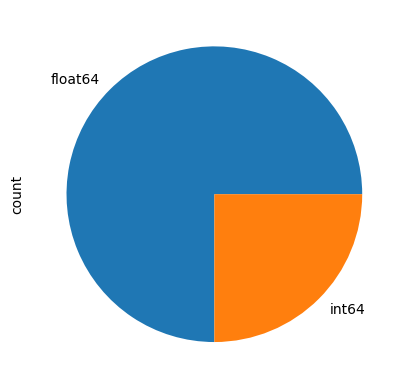

In [6]:
df.dtypes.value_counts().plot.pie()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     498 non-null    int64  
 1   biking         498 non-null    float64
 2   smoking        498 non-null    float64
 3   heart.disease  498 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 15.7 KB


 Vérifier les plages des variables

In [8]:
df.describe()

Unnamed: 0      biking     smoking  heart.disease
count  498.000000  498.000000  498.000000     498.000000
mean   249.500000   37.788411   15.435034      10.174538
std    143.904482   21.481519    8.289959       4.571874
min      1.000000    1.119154    0.525850       0.551898
25%    125.250000   20.204598    8.279776       6.513683
50%    249.500000   35.824459   15.814614      10.385255
75%    373.750000   57.852786   22.568925      13.724024
max    498.000000   74.907111   29.946743      20.453496

Unnamed: 0 : Plage entre 1 et 498 (index ou identifiant, probablement non pertinent pour l'analyse).

biking : Plage entre 1.12 et 74.91.

smoking : Plage entre 0.53 et 29.95.
heart.disease : Plage entre 0.55 et 20.45.


Observation :
Les variables biking, smoking, et heart.disease ont des échelles très différentes. Par exemple, biking est en dizaines alors que smoking et heart.disease ont des plages plus petites. Cela peut entraîner des problèmes pour certains modèles sensibles aux échelles.

Conclusion sur les plages :
Une normalisation (plage [0, 1]) serait utile pour mettre toutes les variables sur une même échelle

prétraitement des données 

In [9]:
print(df.isnull().sum())  # Nombre de valeurs manquantes par colonne


Unnamed: 0       0
biking           0
smoking          0
heart.disease    0
dtype: int64


Conclusion :
Après l'analyse du jeu de données, aucune valeur manquante n'a été détectée dans les colonnes. Par conséquent, aucune étape spécifique de prétraitement liée à la gestion des données manquantes n'est pas nécessaire.

<Axes: >

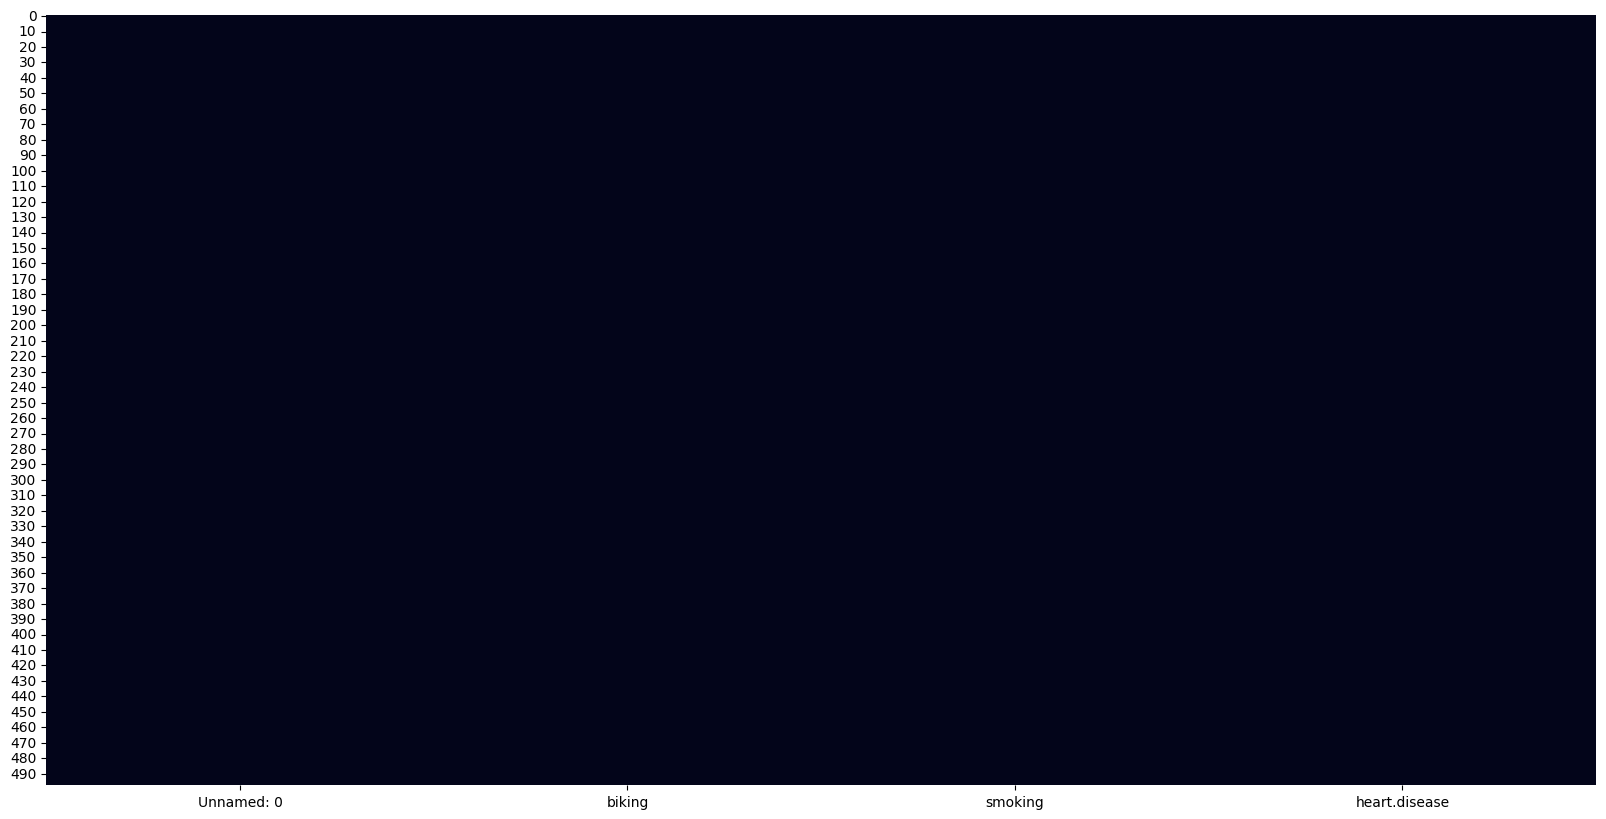

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)


La carte thermique confirme visuellement qu'il n'y a aucune valeur manquante dans le DataFrame. Cela valide que le jeu de données est complet, et aucune action n'est nécessaire pour traiter des valeurs manquantes.

In [11]:
print(df.select_dtypes(include=['object']).columns)  # Colonnes catégoriques


Index([], dtype='object')


In [12]:
print(df.duplicated().sum())  # Nombre de lignes dupliquées


0


In [13]:

# Supprimer la colonne Unnamed: 0 (non pertinente pour l'analyse)
df = df.drop(columns=['Unnamed: 0'])

Vérifier la distribution des variables :
Pour décider si la standardisation est nécessaire

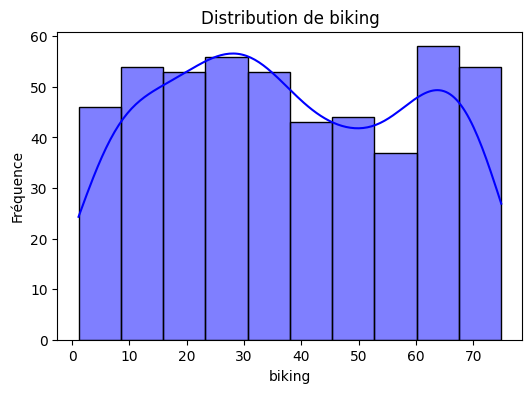

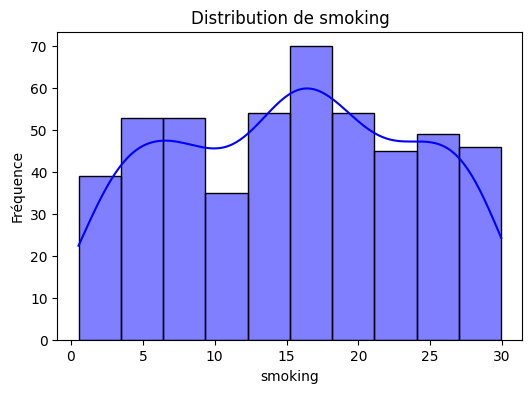

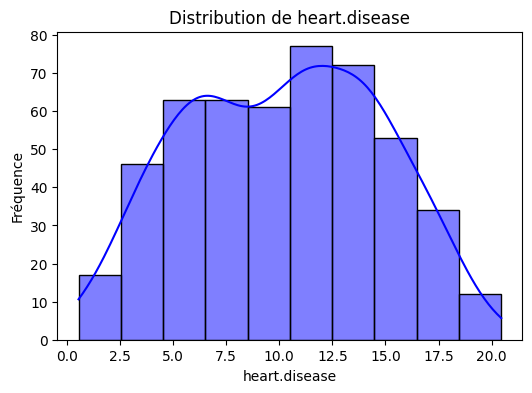

In [14]:
# Visualiser chaque variable
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=10, color='blue')
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()


Analyse des variables :
1. biking :
Plage : [1.12, 74.91] (large plage).
Distribution : La distribution n'est pas normale (histogramme irrégulier).
Recommandation : Utilisez une normalisation car la plage est large et la distribution n'est pas normale.
2. smoking :
Plage : [0.53, 29.95] (large plage).
Distribution : La distribution est uniforme (non normale).
Recommandation : Utilisez une normalisation pour uniformiser l'échelle avec les autres variables.
3. heart.disease :
Plage : [0.55, 20.45].
Distribution : La distribution est proche d'une distribution normale (forme en cloche).
Recommandation : Utilisez une standardisation car la distribution est normale et cela est adapté pour ce type de données.

Détection Visuelle des Outliers

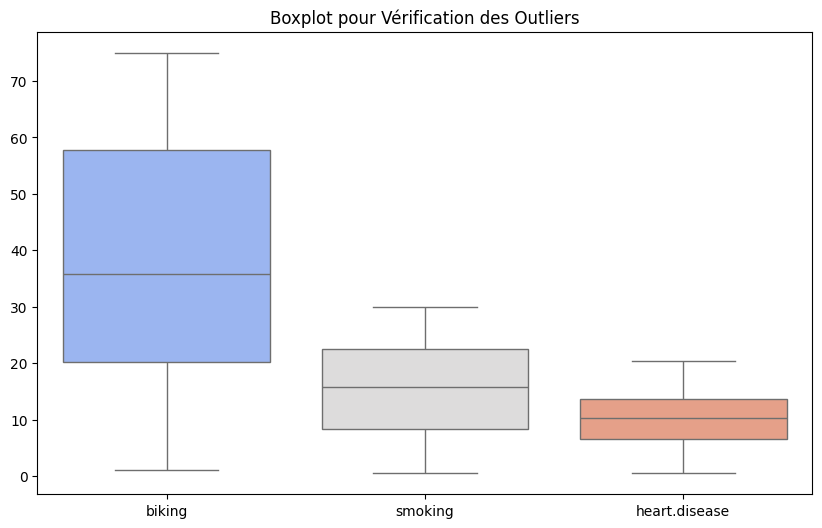

In [15]:

# Boxplot pour vérifier les outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['biking', 'smoking', 'heart.disease']], palette='coolwarm')
plt.title("Boxplot pour Vérification des Outliers")
plt.show()


Boxplot : "Le boxplot ne révèle aucun outlier, toutes les valeurs se trouvent dans les moustaches."

In [16]:
# methode 2 pour vérification des outliers 
# Calcul des z-scores pour chaque variable
z_scores = zscore(df[['biking', 'smoking', 'heart.disease']])

# Vérifier si des valeurs ont un z-score > 3 ou < -3
outliers = (abs(z_scores) > 3).all(axis=1)
df_outliers = df[outliers]

# Afficher les lignes contenant des outlier
df_outliers


Empty DataFrame
Columns: [biking, smoking, heart.disease]
Index: []

Z-scores : "Les z-scores montrent que toutes les valeurs sont proches de la moyenne, sans valeurs extrêmes.

######################

Exploration des données avant la normalisation et la division du dataset

Statistiques Bi-variées (Variable Quantitative - Variable Quantitative)

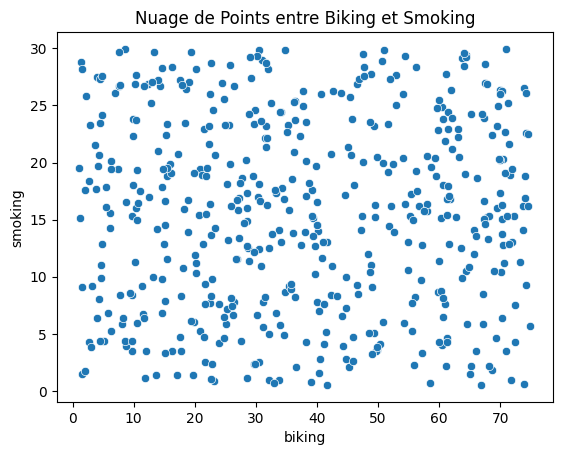

In [17]:

# Scatter plot entre biking et smoking
sns.scatterplot(data=df, x='biking', y='smoking')
plt.title("Nuage de Points entre Biking et Smoking")
plt.show()

Matrice de Corrélation

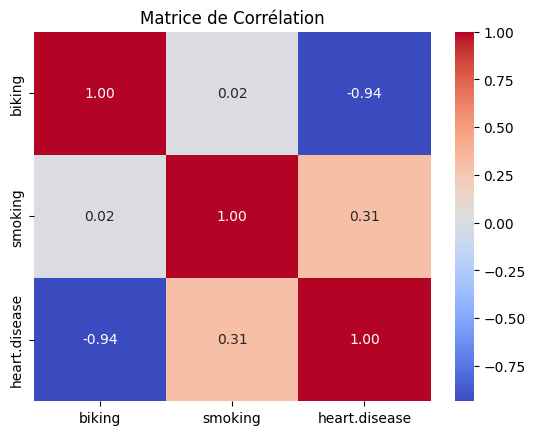

In [18]:
# Matrice de corrélation
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de Corrélation")
plt.show()


Corrélation de Pearson 

In [19]:
from scipy.stats import pearsonr

# Test de corrélation de Pearson entre biking et smoking
corr, _ = pearsonr(df['biking'], df['smoking'])
print(f"Corrélation de Pearson entre biking et smoking: {corr}")


Corrélation de Pearson entre biking et smoking: 0.015136184529564917


Interprétation :

Une corrélation de 0.0151 est proche de 0, ce qui suggère que biking et smoking ne sont pratiquement pas corrélés.

Cela signifie qu'il n'y a pas de relation linéaire significative entre le nombre de minutes passées à faire du vélo (biking) et le fait de fumer (smoking) dans ce dataset.

les variations dans biking n'ont presque aucune influence sur les variations dans smoking, et vice versa.

In [20]:


# Test de corrélation de Pearson entre biking et smoking
corr, _ = pearsonr(df['biking'], df['heart.disease'])
print(f"Corrélation de Pearson entre biking et heart.disease: {corr}")


Corrélation de Pearson entre biking et heart.disease: -0.9354554743738542


Interprétation :

Une valeur de corrélation proche de -1 suggère une relation inverse quasi-parfaite.

Cela signifie que lorsque le temps passé à faire du vélo (biking) augmente, les cas de maladies cardiaques (heart.disease) diminuent significativement.

Cette relation négative peut refléter l'effet bénéfique du vélo sur la santé cardiovasculaire, ce qui est cohérent avec les connaissances médicales.

Conclusion :

Le temps passé à faire du vélo semble avoir un impact important sur la réduction des maladies cardiaques. Cela pourrait être une indication précieuse pour des campagnes de santé publique encourageant l'exercice physique.

In [21]:

# Test de corrélation de Pearson entre biking et smoking
corr, _ = pearsonr(df['heart.disease'], df['smoking'])
print(f"Corrélation de Pearson entre heart.disease et smoking: {corr}")


Corrélation de Pearson entre heart.disease et smoking: 0.3091309790873179


Interprétation :

Une valeur de corrélation de 0.3091 montre qu'il existe une tendance pour laquelle une augmentation de la consommation de cigarettes (smoking) est associée à une augmentation des cas de maladies cardiaques (heart.disease), bien que cette relation ne soit pas très forte.

Cela reflète un lien potentiel entre le tabagisme et les problèmes cardiaques, mais avec une variabilité qui pourrait être influencée par d'autres facteurs (exercice, alimentation, génétique, etc.).

Matrice de Covariance:
 indique comment deux variables varient ensemble.

In [22]:
# Matrice de covariance
covariance_matrix = df.cov()
covariance_matrix


biking    smoking  heart.disease
biking         461.455650   2.695466     -91.871835
smoking          2.695466  68.723426      11.716266
heart.disease  -91.871835  11.716266      20.902035

Interprétation de la matrice de covariance :

Covariance(biking, biking) = 461.46 : Cela représente la variance de la variable biking, c'est-à-dire la dispersion de cette variable autour de sa moyenne.

Covariance(smoking, smoking) = 68.72 : Cela représente la variance de la variable smoking.

Covariance(heart.disease, heart.disease) = 20.90 : Cela représente la variance de la variable heart.disease.

Covariances croisées :

Covariance(biking, smoking) = 2.70 : Une faible covariance, ce qui indique qu'il y a peu de relation linéaire entre biking et smoking.

Covariance(biking, heart.disease) = -91.87 : Une covariance négative assez forte, ce qui pourrait indiquer que, généralement, des valeurs élevées de biking sont associées à de faibles valeurs de heart.disease.

Covariance(smoking, heart.disease) = 11.72 : Une covariance positive modérée, suggérant qu'il pourrait y avoir une légère tendance à ce que smoking et heart.disease varient dans la même direction.

Table de Fréquences

In [23]:
# Table de fréquences pour la variable 'smoking'
frequency_table = df['smoking'].value_counts()
frequency_table


smoking
10.896608    1
26.724273    1
18.052133    1
28.176962    1
15.297254    1
            ..
23.204642    1
2.525654     1
23.246140    1
24.792638    1
23.610175    1
Name: count, Length: 498, dtype: int64

La table de fréquences montre que chaque valeur de la variable smoking est unique et apparaît une seule fois dans le dataset.

In [24]:
# Table de fréquences pour la variable 'biking'
frequency_table = df['biking'].value_counts()
frequency_table


biking
30.801246    1
14.242695    1
46.020846    1
20.226774    1
9.727759     1
            ..
22.343450    1
30.460335    1
2.818204     1
59.575645    1
30.774254    1
Name: count, Length: 498, dtype: int64

In [25]:
# Table de fréquences pour la variable 'heart.disease'
frequency_table = df['heart.disease'].value_counts()
frequency_table


heart.disease
11.769423    1
17.370534    1
9.231971     1
16.517872    1
15.588543    1
            ..
15.908549    1
8.936583     1
18.482960    1
8.519928     1
11.843556    1
Name: count, Length: 498, dtype: int64

 Z-test / T-test

Le test T compare les moyennes de (variable-variable/variable-feature) pour déterminer s'il existe une différence significative.

Si p-valeur < 0.05 : Les moyennes sont significativement différentes.
Si p-valeur ≥ 0.05 : Aucune différence significative n'est détectée entre les moyennes.

In [26]:
from scipy.stats import ttest_ind

# T-test entre biking et smoking (si les données suivent une distribution normale)
t_stat, p_val = ttest_ind(df['biking'], df['smoking'])
print(f"T-test p-value : {p_val}")


T-test p-value : 1.4884102307907775e-85


La p-valeur obtenue (1.4884e-85) est extrêmement petite, bien en dessous du seuil classique de 0.05.
Donc il existe une différence significative entre les moyennes des variables biking et smoking. Cela suggère que ces deux variables sont très probablement issues de populations avec des moyennes différentes.

In [27]:

# T-test entre heart.disease et smoking (si les données suivent une distribution normale)
t_stat, p_val = ttest_ind(df['heart.disease'], df['smoking'])
print(f"T-test p-value : {p_val}")


T-test p-value : 6.185479333527246e-33


La p-valeur obtenue (6.1855e-33) est extrêmement faible, bien en dessous du seuil classique de 0.05.
Donc existe une différence hautement significative entre les moyennes des variables heart.disease et smoking. Cela indique que ces deux variables sont très probablement issues de populations ayant des moyennes différentes, suggérant une possible association ou relation entre elles.

In [28]:

# T-test entre heart.disease et biking (si les données suivent une distribution normale)
t_stat, p_val = ttest_ind(df['heart.disease'], df['biking'])
print(f"T-test p-value : {p_val}")


T-test p-value : 4.679492702693595e-128


La p-valeur (4.6795e-128) est très faible, indiquant une différence significative entre les moyennes de heart.disease et biking. Cela suggère qu'il existe une relation potentielle entre ces deux variables.

ANOVA

L'ANOVA (Analyse de la Variance) est une méthode statistique utilisée pour tester s'il existe des différences significatives entre les moyennes de plusieurs groupes ou échantillons

In [29]:
from scipy.stats import f_oneway

# ANOVA pour tester la différence entre plusieurs groupes
anova_stat, p_val = f_oneway(df['biking'], df['smoking'], df['heart.disease'])
print(f"ANOVA p-value : {p_val}")


ANOVA p-value : 9.74618256998859e-188


la p-valeur (9.7462e-188) indique des différences significatives entre les groupes biking, smoking et heart.disease.

 Représentation Visuelle des Données Uni-variées

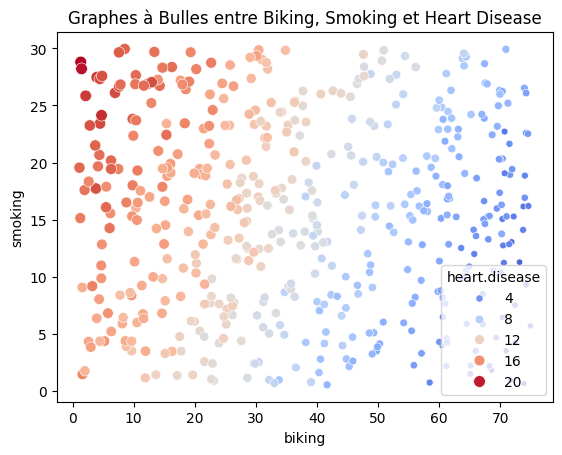

In [30]:
# Bubble chart entre biking, smoking, et heart.disease
sns.scatterplot(data=df, x='biking', y='smoking', size='heart.disease', hue='heart.disease', palette='coolwarm')
plt.title("Graphes à Bulles entre Biking, Smoking et Heart Disease")
plt.show()


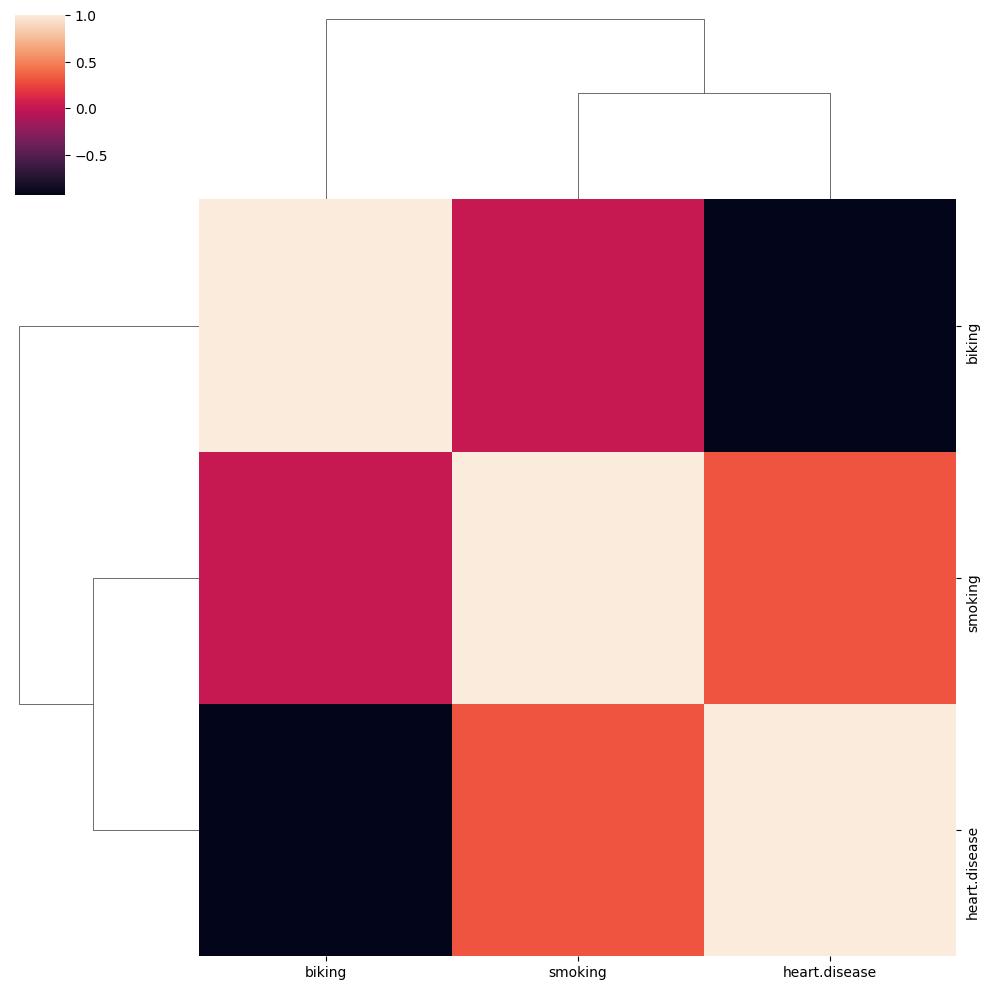

In [31]:
sns.clustermap(df.corr())

Les variables les plus similaires seront regroupées ensemble, et les couleurs indiqueront la force de la corrélation (rouge pour des corrélations élevées, bleu pour des corrélations faibles).

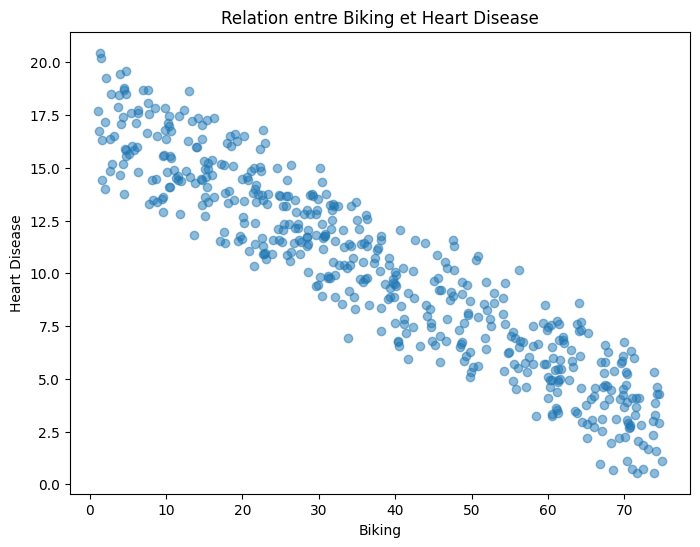

In [32]:

#Relation entre Biking et Heart Disease
plt.figure(figsize=(8, 6))
plt.scatter(df['biking'], df['heart.disease'], alpha=0.5)
plt.xlabel('Biking')
plt.ylabel('Heart Disease')
plt.title("Relation entre Biking et Heart Disease")
plt.show()




Relation entre Biking et Heart Disease : Le nuage de points montre une relation négative entre le nombre de kilomètres parcourus à vélo et la maladie cardiaque. Autrement dit, plus une personne fait de vélo, moins elle semble avoir de risques de maladie cardiaque.

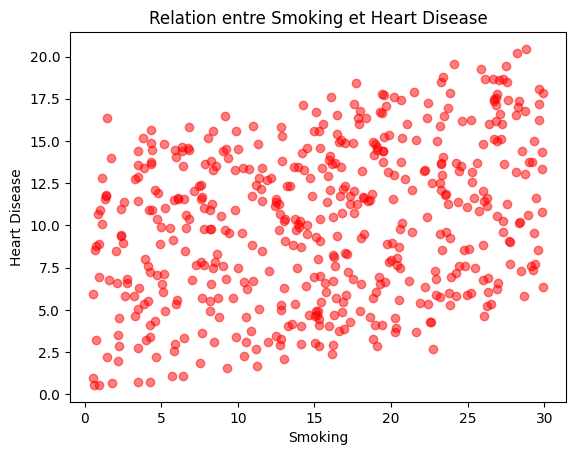

In [33]:
#Relation entre Smoking et Heart Disease
plt.scatter(df['smoking'], df['heart.disease'], alpha=0.5, color='red')
plt.xlabel('Smoking')
plt.ylabel('Heart Disease')
plt.title("Relation entre Smoking et Heart Disease")
plt.show()


Relation entre Smoking et Heart Disease : Le nuage de points montre une tendance à la hausse. Plus le nombre de cigarettes fumées est élevé, plus la maladie cardiaque semble être présente.

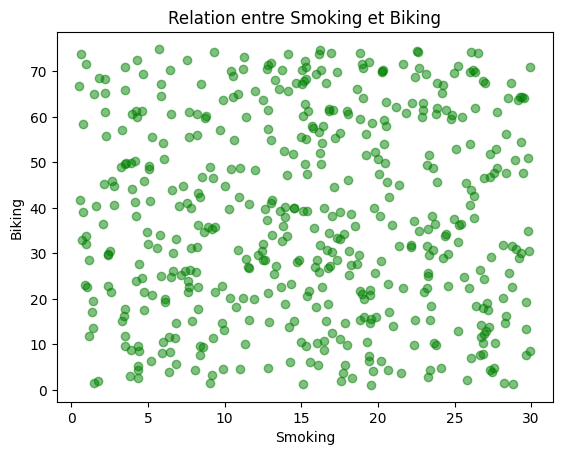

In [34]:
#Relation entre Smoking et Biking
plt.scatter(df['smoking'], df['biking'], alpha=0.5, color='green')
plt.xlabel('Smoking')
plt.ylabel('Biking')
plt.title("Relation entre Smoking et Biking")
plt.show()

Relation entre Smoking et Biking : Il n'y a pas de relation claire entre le nombre de cigarettes fumées et les kilomètres parcourus à vélo, comme l'indique la dispersion des points.

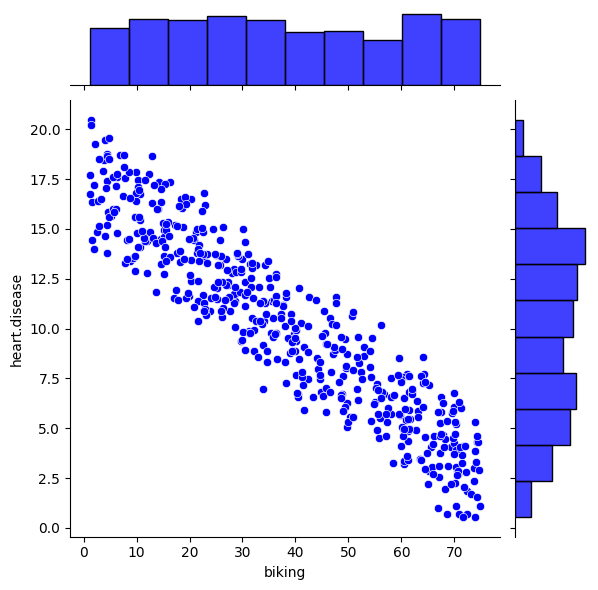

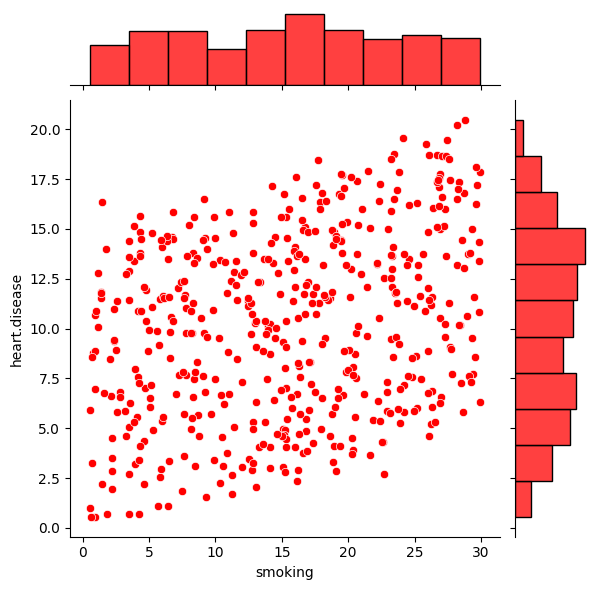

In [35]:
# Distribution jointe entre 'biking' et 'heart.disease'
sns.jointplot(x='biking', y='heart.disease', data=df, kind='scatter', color='blue')
plt.show()

# Distribution jointe entre 'smoking' et 'heart.disease'
sns.jointplot(x='smoking', y='heart.disease', data=df, kind='scatter', color='red')
plt.show()


pairplot est utile pour visualiser les relations entre plusieurs variables numériques et détecter des patterns, des corrélations ou des anomalies dans les données

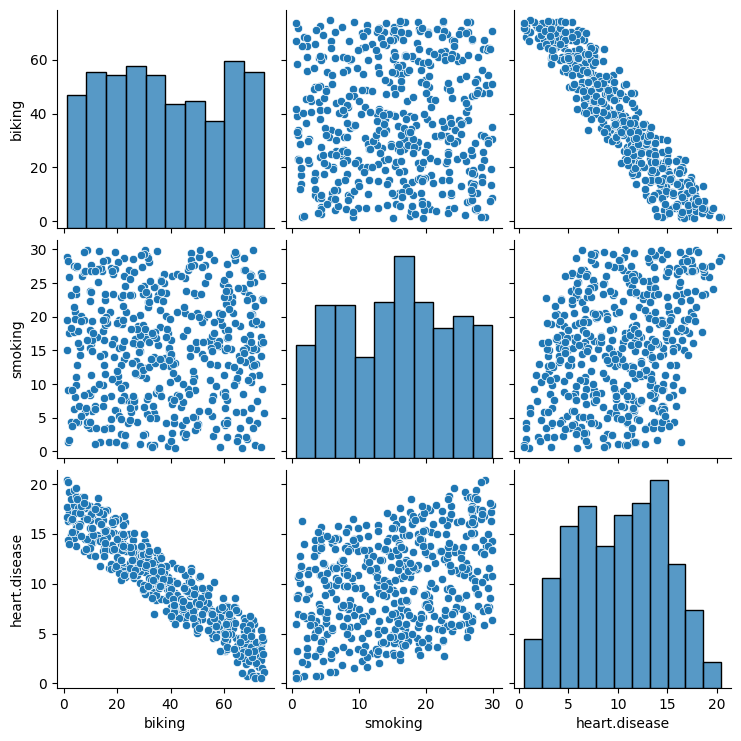

In [36]:
sns.pairplot(df)

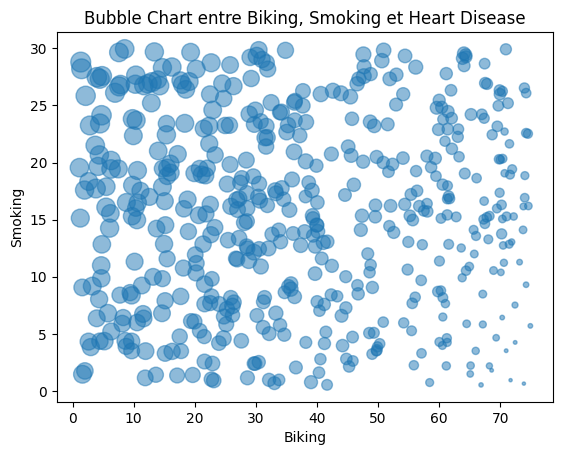

In [37]:
plt.scatter(df['biking'], df['smoking'], s=df['heart.disease']*10, alpha=0.5)
plt.xlabel('Biking')
plt.ylabel('Smoking')
plt.title('Bubble Chart entre Biking, Smoking et Heart Disease')
plt.show()


/var/folders/c2/w6tmsxjs7bddhb5_b4cjppg40000gp/T/ipykernel_9465/1223841742.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['biking'], shade=True, color="blue")


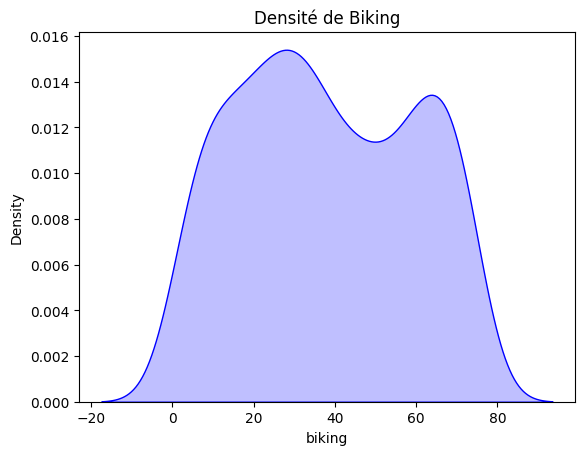

In [38]:
sns.kdeplot(df['biking'], shade=True, color="blue")
plt.title('Densité de Biking')
plt.show()


/var/folders/c2/w6tmsxjs7bddhb5_b4cjppg40000gp/T/ipykernel_9465/1058246885.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['smoking'], shade=True, color="blue")


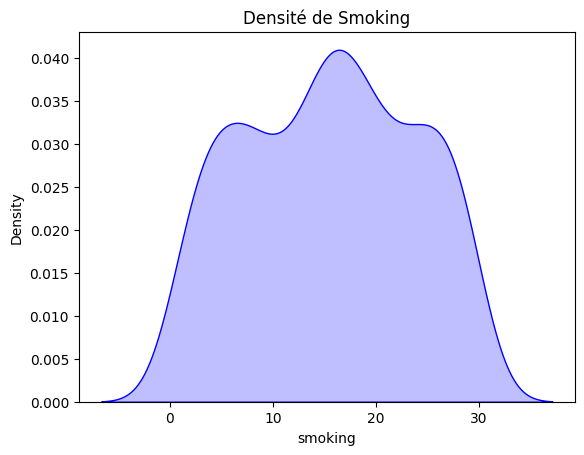

In [39]:
sns.kdeplot(df['smoking'], shade=True, color="blue")
plt.title('Densité de Smoking')
plt.show()

/var/folders/c2/w6tmsxjs7bddhb5_b4cjppg40000gp/T/ipykernel_9465/1600649178.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['heart.disease'], shade=True, color="blue")


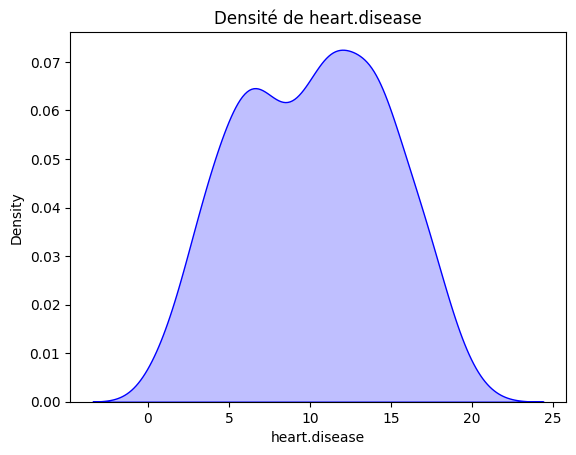

In [40]:
sns.kdeplot(df['heart.disease'], shade=True, color="blue")
plt.title('Densité de heart.disease')
plt.show()

Appliquer la normalisation et la standardisation

In [41]:
# Fonction de normalisation (Min-Max)
def normalisation(df, columns):
    for col in columns:
        min_val = df[col].min()
        max_val = df[col].max()
        df[col] = (df[col] - min_val) / (max_val - min_val)
    return df

In [42]:
# création du fonction mathématiquement
# Fonction de standardisation (Z-score)
def standardisation(df, columns):
    for col in columns:
        mean_val = df[col].mean()
        std_val = df[col].std()
        df[col] = (df[col] - mean_val) / std_val
    return df


In [43]:

# Appliquer la normalisation à 'biking' et 'smoking'
df = normalisation(df, ['biking', 'smoking'])

# Appliquer la standardisation à 'heart.disease'
df = standardisation(df, ['heart.disease'])

# Afficher les données transformées
print("Données transformées :")
df


Données transformées :


biking   smoking  heart.disease
0    0.402262  0.352496       0.348847
1    0.867487  0.057568      -1.601194
2    0.011391  0.579944       1.531815
3    0.591981  0.077384      -0.734467
4    0.925751  0.525091      -1.336938
..        ...       ...            ...
493  0.630744  0.918960       0.244944
494  0.596006  0.709012      -0.122002
495  0.097043  0.200465       0.726317
496  0.558719  0.687113      -0.012833
497  0.401896  0.784624       0.365062

[498 rows x 3 columns]

visualisation après la normalisation

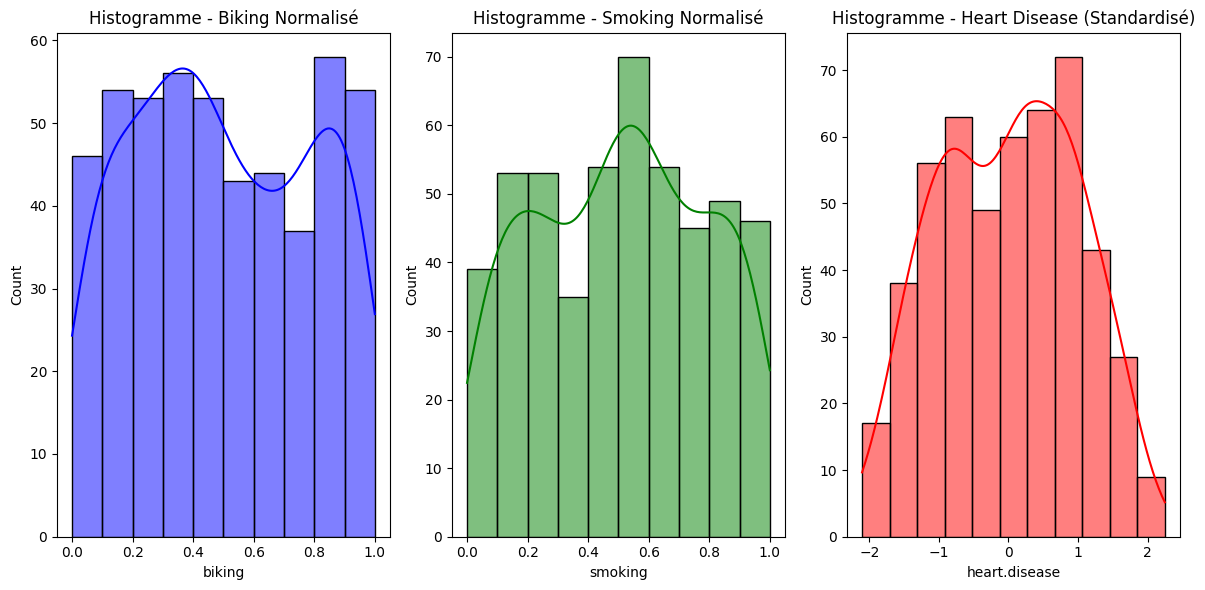

In [44]:

# 1. Histogrammes pour les variables normalisées
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['biking'], kde=True, color='blue')
plt.title('Histogramme - Biking Normalisé')

plt.subplot(1, 3, 2)
sns.histplot(df['smoking'], kde=True, color='green')
plt.title('Histogramme - Smoking Normalisé')

plt.subplot(1, 3, 3)
sns.histplot(df['heart.disease'], kde=True, color='red')
plt.title('Histogramme - Heart Disease (Standardisé)')

plt.tight_layout()
plt.show()

Les variables "biking" et "smoking" sont normalisées (entre 0 et 1), tandis que "heart.disease" est standardisée avec une moyenne proche de 0 et une distribution en cloche.
Les courbes kde ajoutées permettent de visualiser les tendances globales des données en complément des histogrammes.

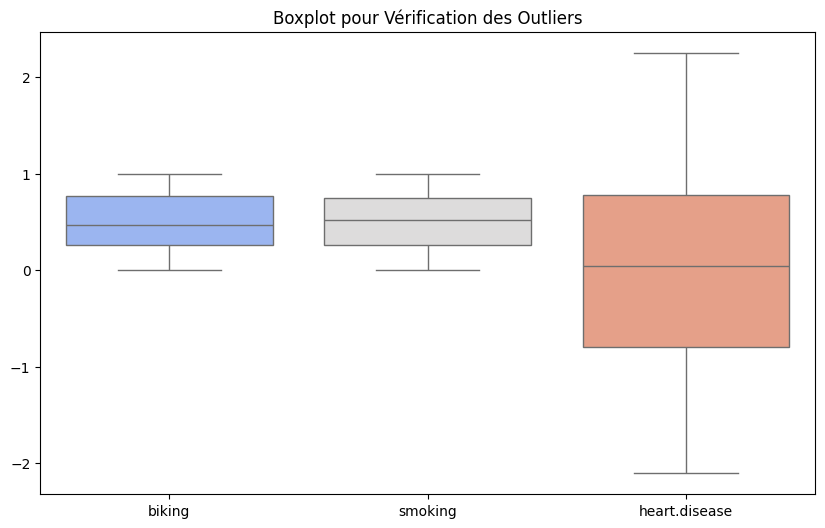

In [45]:

# Boxplot pour vérifier les outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['biking', 'smoking', 'heart.disease']], palette='coolwarm')
plt.title("Boxplot pour Vérification des Outliers")
plt.show()


Le boxplot montre qu'il n'y a pas d'outliers dans les variables biking, smoking, et heart.disease

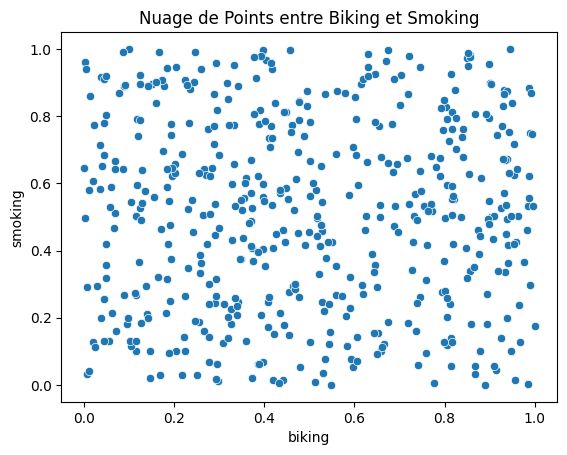

In [46]:

# Scatter plot entre biking et smoking
sns.scatterplot(data=df, x='biking', y='smoking')
plt.title("Nuage de Points entre Biking et Smoking")
plt.show()

Le scatter plot montre que les points sont dispersés de manière aléatoire, ce qui suggère qu'il n'y a pas de relation évidente ou de corrélation claire entre les variables biking et smoking

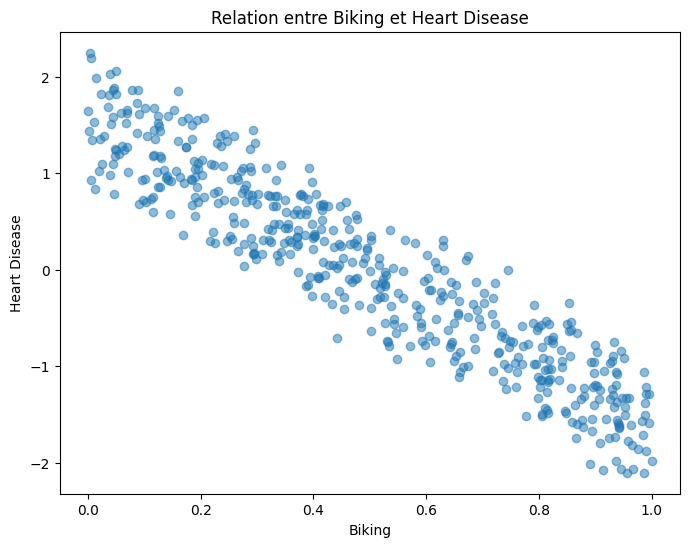

In [47]:

#Relation entre Biking et Heart Disease
plt.figure(figsize=(8, 6))
plt.scatter(df['biking'], df['heart.disease'], alpha=0.5)
plt.xlabel('Biking')
plt.ylabel('Heart Disease')
plt.title("Relation entre Biking et Heart Disease")
plt.show()




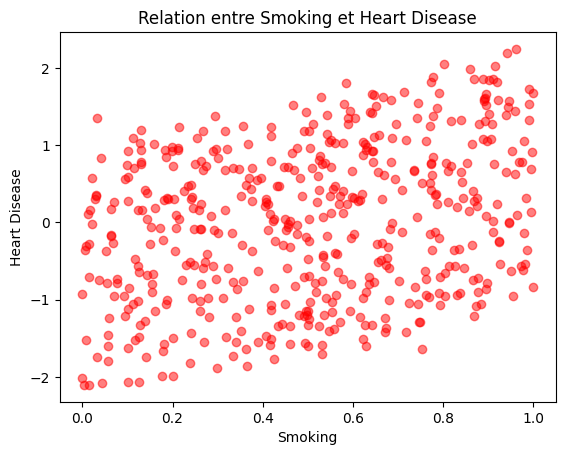

In [48]:
#Relation entre Smoking et Heart Disease
plt.scatter(df['smoking'], df['heart.disease'], alpha=0.5, color='red')
plt.xlabel('Smoking')
plt.ylabel('Heart Disease')
plt.title("Relation entre Smoking et Heart Disease")
plt.show()


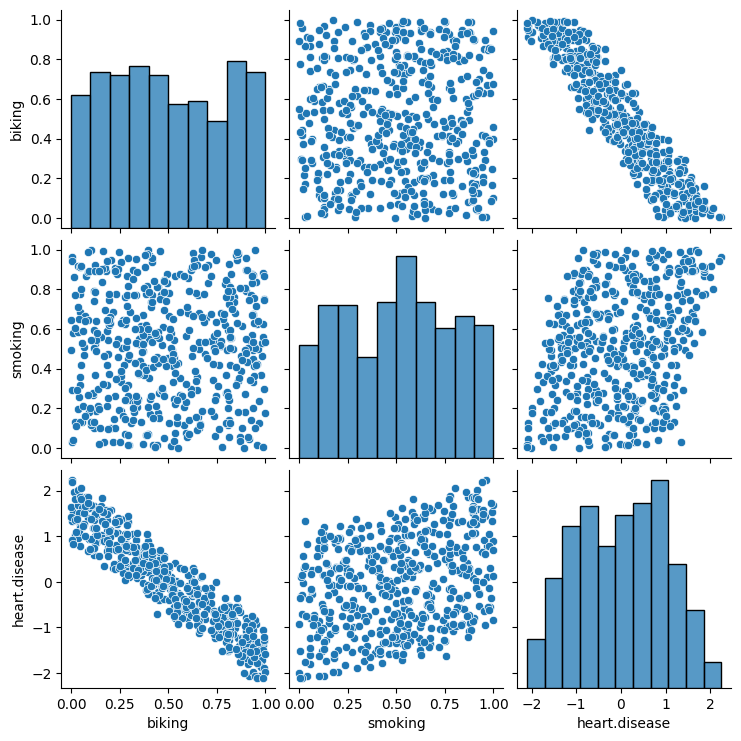

In [49]:
sns.pairplot(df)

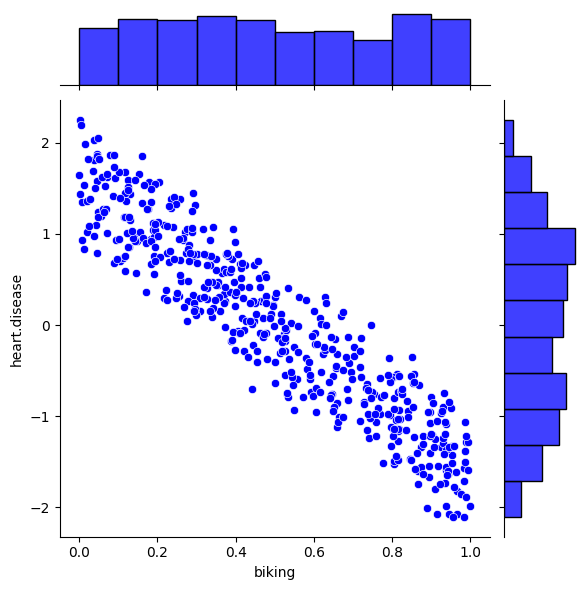

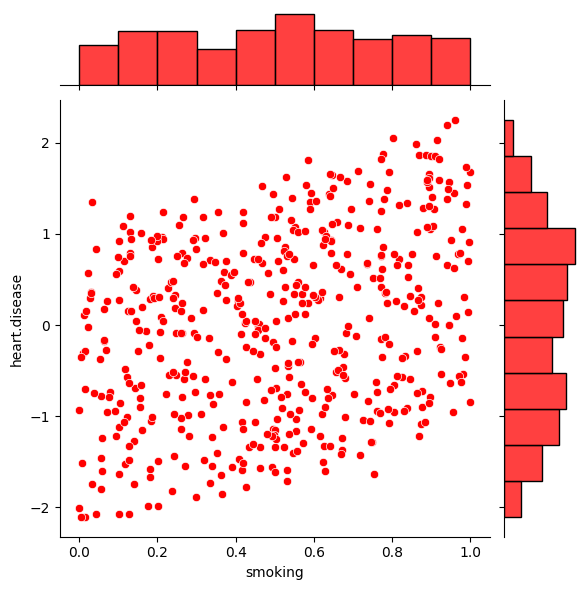

In [50]:
# Distribution jointe entre 'biking' et 'heart.disease'
sns.jointplot(x='biking', y='heart.disease', data=df, kind='scatter', color='blue')
plt.show()

# Distribution jointe entre 'smoking' et 'heart.disease'
sns.jointplot(x='smoking', y='heart.disease', data=df, kind='scatter', color='red')
plt.show()


/Users/sirine/Library/Python/3.12/lib/python/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


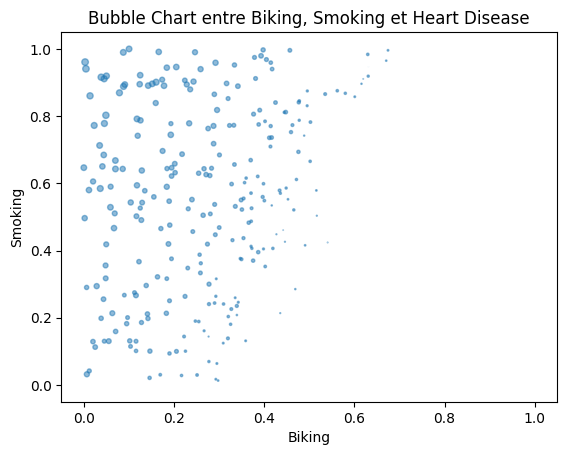

In [51]:
plt.scatter(df['biking'], df['smoking'], s=df['heart.disease']*10, alpha=0.5)
plt.xlabel('Biking')
plt.ylabel('Smoking')
plt.title('Bubble Chart entre Biking, Smoking et Heart Disease')
plt.show()


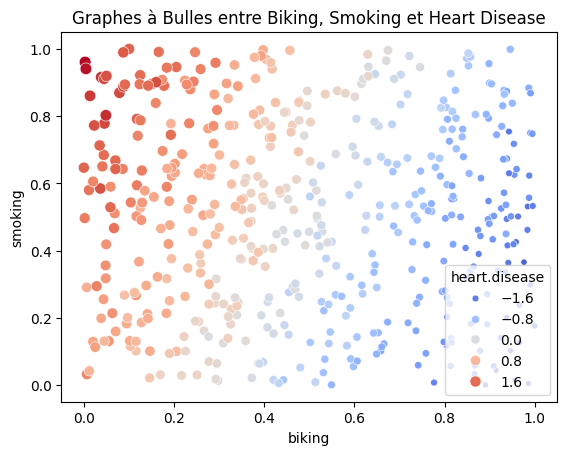

In [52]:
# Bubble chart entre biking, smoking, et heart.disease
sns.scatterplot(data=df, x='biking', y='smoking', size='heart.disease', hue='heart.disease', palette='coolwarm')
plt.title("Graphes à Bulles entre Biking, Smoking et Heart Disease")
plt.show()


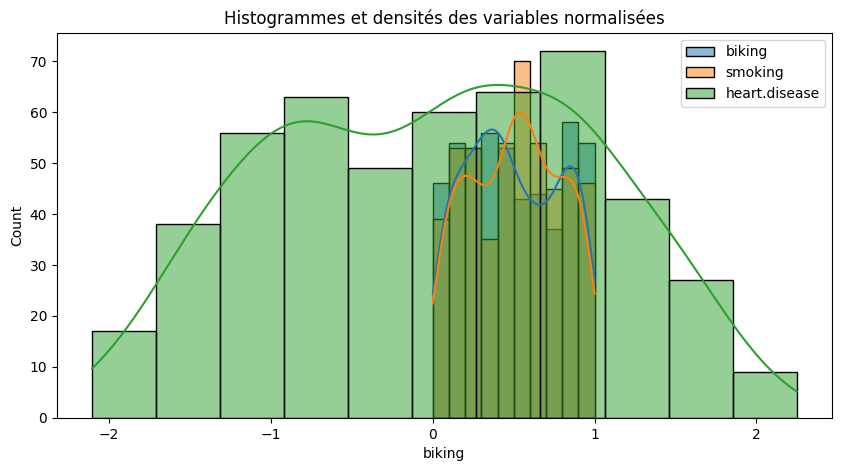

In [53]:
plt.figure(figsize=(10, 5))
for col in ['biking', 'smoking', 'heart.disease']:
    sns.histplot(df[col], kde=True, label=col)
plt.title("Histogrammes et densités des variables normalisées")
plt.legend()
plt.show()


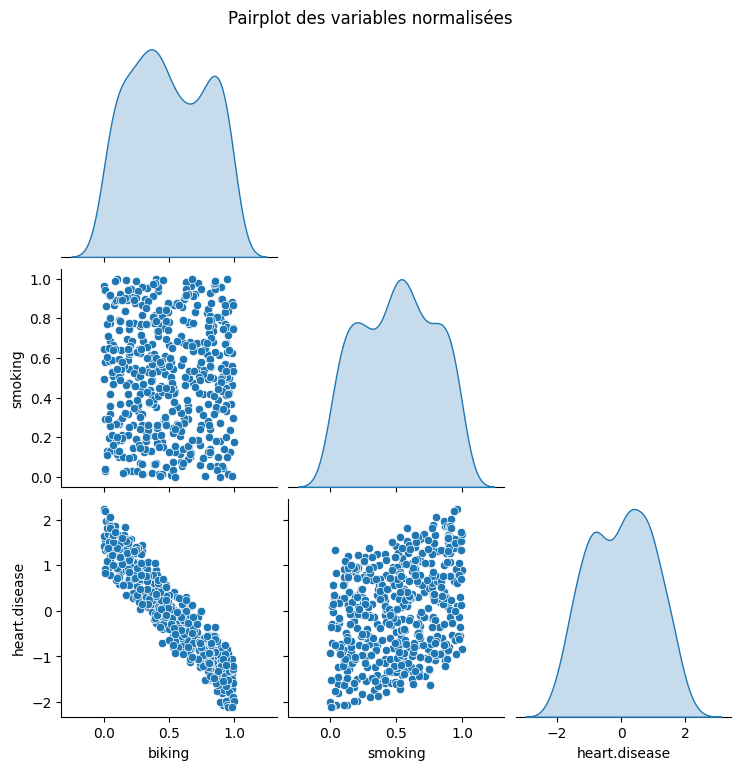

In [54]:
sns.pairplot(df, diag_kind='kde', corner=True)
plt.suptitle("Pairplot des variables normalisées", y=1.02)
plt.show()


Division du dataset

In [55]:
# Diviser les données
X = df[['biking', 'smoking']]  # Variables indépendantes
y = df['heart.disease']        # Variable cible


# Fonction pour calculer le MSE

In [56]:
def mean_squared_error_custom(y_true, y_pred):
    # La fonction doit retourner la moyenne des erreurs au carré
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

# Fonction pour calculer le R²

In [57]:

# Fonction pour calculer le R² (Coefficient de Détermination)
def r2_score_custom(y_true, y_pred):
    # Moyenne des valeurs réelles
    y_mean = np.mean(y_true)
    
    # Somme des carrés des erreurs (SSE)
    sse = np.sum((y_true - y_pred) ** 2)
    
    # Somme totale des carrés (SST)
    sst = np.sum((y_true - y_mean) ** 2)
    
    # Calcul de R²
    return 1 - (sse / sst)

# Erreur Absolue Moyenne (MAE - Mean Absolute Error)

In [58]:

def mean_absolute_error_custom(y_true, y_pred):
    return np.mean(np.abs(np.array(y_true) - np.array(y_pred)))


# Racine de l'Erreur Quadratique Moyenne (RMSE - Root Mean Squared Error)

In [59]:
def root_mean_squared_error_custom(y_true, y_pred):
    return np.sqrt(mean_squared_error_custom(y_true, y_pred))



# Fonction pour calculer les coefficients (beta) avec la méthode des moindres carrés

In [60]:

# Fonction pour calculer les coefficients (beta) avec la méthode des moindres carrés
def linear_regression(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Ajouter une colonne de 1 pour l'ordonnée à l'origine
    beta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  # Calcul des coefficients
    return beta




# Fonction pour prédire les valeurs avec un modèle linéaire

In [61]:
# Fonction pour prédire les valeurs avec un modèle linéaire
def predict(X, beta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Ajouter une colonne de 1 pour l'ordonnée à l'origine
    return X_b.dot(beta)

# entrainement du modèle avec linear regression (division avec train_test_split)

In [62]:
# Diviser le data test avec train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# vérifier la taille des datasets obtenus
split_shapes = {
    "Training Features": X_train.shape,
    "Training Labels": y_train.shape,
    "Testing Features": X_test.shape,
    "Testing Labels": y_test.shape
}
print(split_shapes)


{'Training Features': (398, 2), 'Training Labels': (398,), 'Testing Features': (100, 2), 'Testing Labels': (100,)}


In [63]:
# Entraîner le modèle en utilisant la fonction `linear_regression`
betaa = linear_regression(X_train, y_train)

# Faire des prédictions sur l'ensemble d'entraînement et de test avec la fonction `predict`
y_train_pred_split = predict(X_train, betaa)
y_test_pred_split = predict(X_test, betaa)



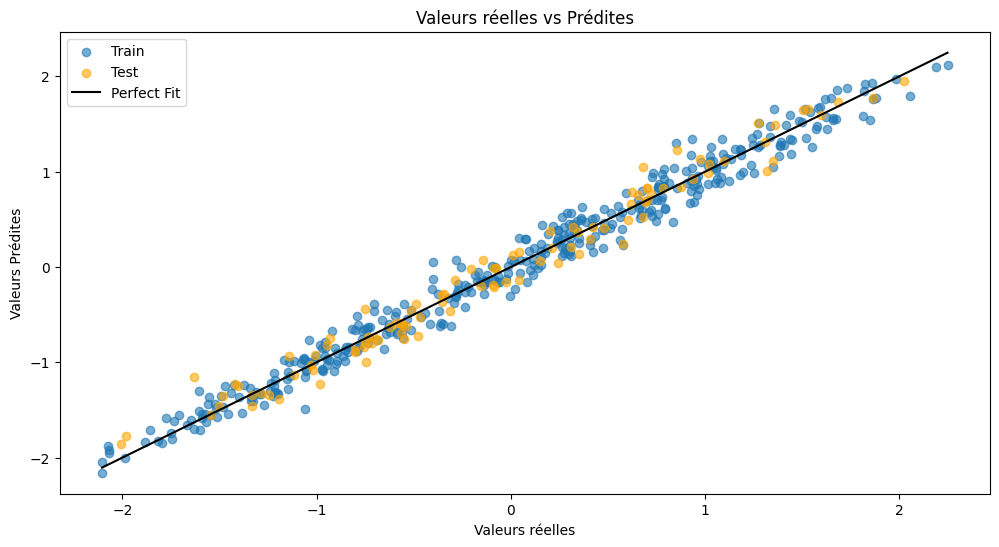

In [64]:
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_pred_split,  label='Train', alpha=0.6)
plt.scatter(y_test, y_test_pred_split, color='orange', label='Test', alpha=0.6)
plt.plot([min(y), max(y)], [min(y), max(y)], color='black',label='Perfect Fit')
plt.title('Valeurs réelles vs Prédites')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs Prédites')
plt.legend()
plt.show()


In [65]:
# Calculer les MSE, R², MAE et RMSE pour Train-Test Split
mse_train_split = mean_squared_error_custom(y_train, y_train_pred_split)
mse_test_split = mean_squared_error_custom(y_test, y_test_pred_split)
r2_train_split = r2_score_custom(y_train, y_train_pred_split)
r2_test_split = r2_score_custom(y_test, y_test_pred_split)

# Calcul MAE
mae_train_split = mean_absolute_error_custom(y_train, y_train_pred_split)
mae_test_split = mean_absolute_error_custom(y_test, y_test_pred_split)

# Calcul RMSE
rmse_train_split = np.sqrt(mse_train_split)
rmse_test_split = np.sqrt(mse_test_split)

print("\nTrain-Test Split :")
print(f"Train MSE: {mse_train_split}, Test MSE: {mse_test_split}")
print(f"Train R²: {r2_train_split}, Test R²: {r2_test_split}")
print(f"Train MAE: {mae_train_split}, Test MAE: {mae_test_split}")
print(f"Train RMSE: {rmse_train_split}, Test RMSE: {rmse_test_split}")



Train-Test Split :
Train MSE: 0.020030819671306387, Test MSE: 0.02163655281205155
Train R²: 0.9805244861700972, Test R²: 0.9751106638392245
Train MAE: 0.11248127928080955, Test MAE: 0.11397878609124273
Train RMSE: 0.1415302782845649, Test RMSE: 0.147093687193066


MSE La valeur est très faible, ce qui montre que le modèle prédit avec une bonne précision.


R²:Un score proche de 1 indique une forte proportion de la variance expliquée par le modèle. Cela signifie que le modèle est performant sur cet ensemble.

Le MAE montre que, en moyenne, les prédictions du modèle s'écartent très peu des valeurs réelles, indiquant une bonne précision.

Le RMSE, également faible, souligne que le modèle gère bien les grandes erreurs, confirmant sa robustesse.

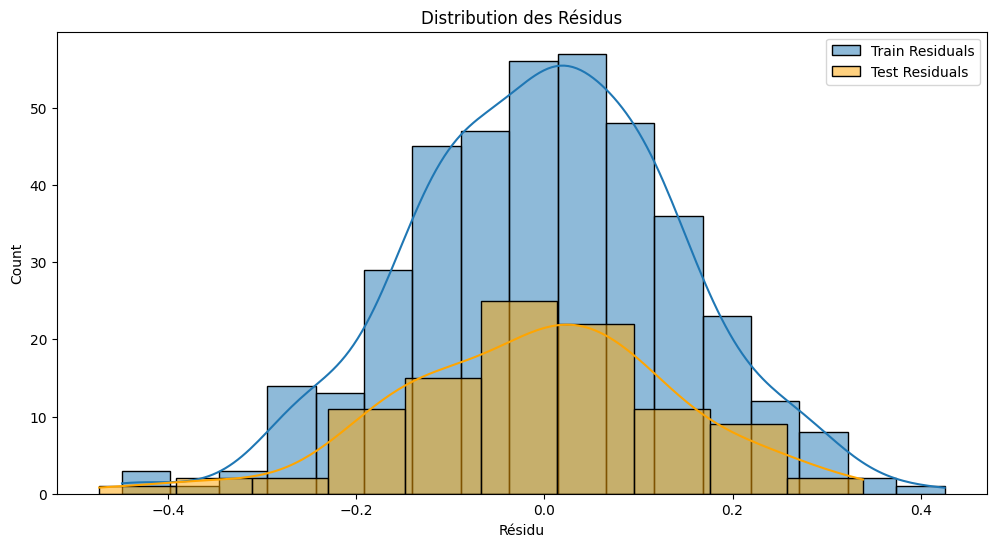

In [66]:


residuals_train = y_train - y_train_pred_split
residuals_test = y_test - y_test_pred_split

plt.figure(figsize=(12, 6))
sns.histplot(residuals_train, kde=True,  label='Train Residuals')
sns.histplot(residuals_test, kde=True, color='orange', label='Test Residuals')
plt.title('Distribution des Résidus')
plt.xlabel('Résidu')
plt.legend()
plt.show()


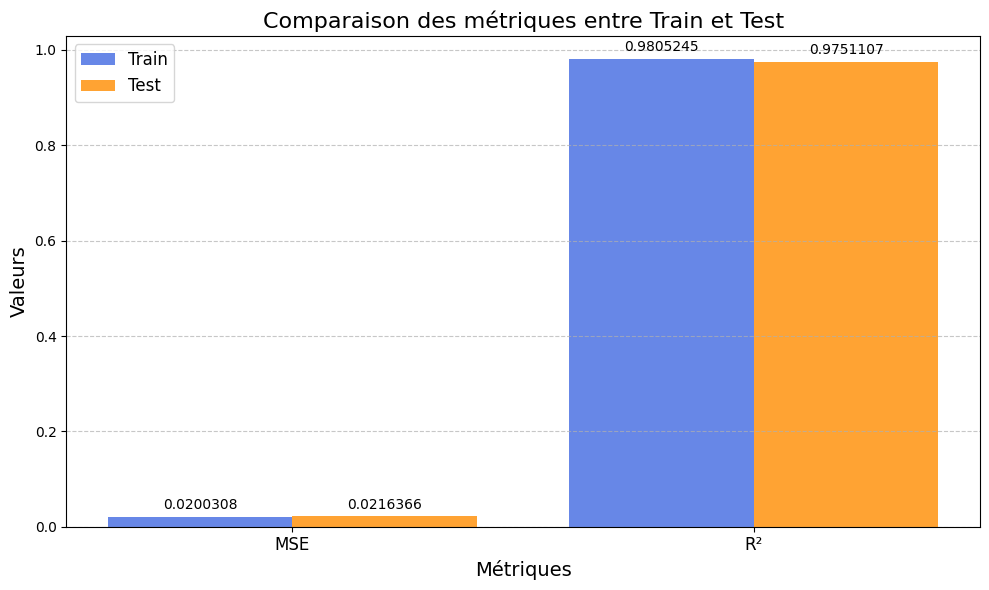

In [67]:
# Données
metrics = ['MSE', 'R²']  # Liste des métriques à comparer
train_metrics = [mse_train_split, r2_train_split]  # Valeurs des métriques pour l'ensemble d'entraînement
test_metrics = [mse_test_split, r2_test_split]  # Valeurs des métriques pour l'ensemble de test

# Configuration du graphique
plt.figure(figsize=(10, 6))  # Définir la taille de la figure
x = range(len(metrics))  # Positions des métriques sur l'axe x

# Barres côte à côte
plt.bar(x, train_metrics, width=0.4, label='Train', color='royalblue', alpha=0.8)  # Barres pour l'ensemble d'entraînement
plt.bar([p + 0.4 for p in x], test_metrics, width=0.4, label='Test', color='darkorange', alpha=0.8)  # Barres pour l'ensemble de test

# Ajouter les étiquettes des valeurs au-dessus des barres
for i, (train, test) in enumerate(zip(train_metrics, test_metrics)):
    # Afficher la valeur de la métrique pour l'entraînement
    plt.text(i, train + 0.01, f'{train:.7f}', ha='center', va='bottom', fontsize=10, color='black')  
    # Afficher la valeur de la métrique pour le test
    plt.text(i + 0.4, test + 0.01, f'{test:.7f}', ha='center', va='bottom', fontsize=10, color='black')

# Paramètres des axes
plt.xticks([p + 0.2 for p in x], metrics, fontsize=12)  # Centrer les étiquettes sous les groupes de barres
plt.xlabel('Métriques', fontsize=14)  # Étiquette de l'axe x
plt.ylabel('Valeurs', fontsize=14)  # Étiquette de l'axe y
plt.title('Comparaison des métriques entre Train et Test', fontsize=16)  # Titre du graphique
plt.legend(fontsize=12)  # Légende du graphique

# Ajouter une grille horizontale pour faciliter la lecture des valeurs
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.tight_layout()  # Ajuster le graphique pour éviter les chevauchements
plt.show()  # Afficher le graphique


Objectif :
Comparer MSE et R² entre l’ensemble train et test.
L’accent est mis sur un nombre limité de métriques (deux dans cet exemple).

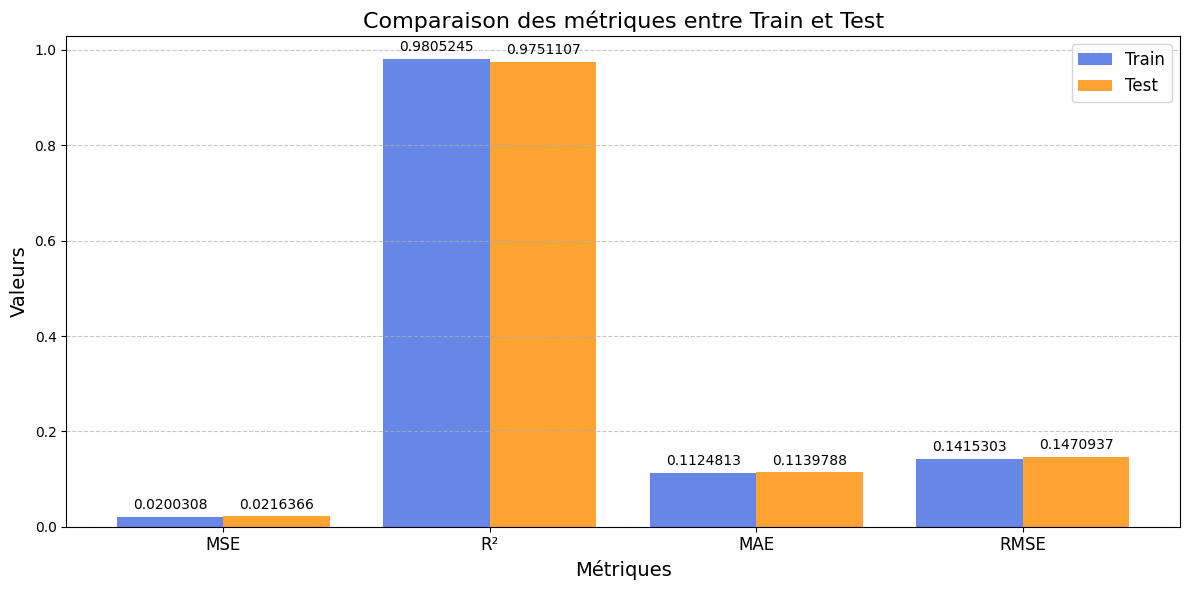

In [68]:
# Données
metrics = ['MSE', 'R²', 'MAE', 'RMSE']
train_metrics = [mse_train_split, r2_train_split, mae_train_split, rmse_train_split]
test_metrics = [mse_test_split, r2_test_split, mae_test_split, rmse_test_split]

# Configuration du graphique
plt.figure(figsize=(12, 6))
x = range(len(metrics))  # Positions des métriques sur l'axe x

# Barres côte à côte
plt.bar(x, train_metrics, width=0.4, label='Train', color='royalblue', alpha=0.8)
plt.bar([p + 0.4 for p in x], test_metrics, width=0.4, label='Test', color='darkorange', alpha=0.8)

# Ajouter les étiquettes des valeurs au-dessus des barres
for i, (train, test) in enumerate(zip(train_metrics, test_metrics)):
    plt.text(i, train + 0.01, f'{train:.7f}', ha='center', va='bottom', fontsize=10, color='black')
    plt.text(i + 0.4, test + 0.01, f'{test:.7f}', ha='center', va='bottom', fontsize=10, color='black')

# Paramètres des axes
plt.xticks([p + 0.2 for p in x], metrics, fontsize=12)  # Centrer les étiquettes sous les groupes de barres
plt.xlabel('Métriques', fontsize=14)
plt.ylabel('Valeurs', fontsize=14)
plt.title('Comparaison des métriques entre Train et Test', fontsize=16)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ligne de grille horizontale pour faciliter la lecture

# Afficher le graphique
plt.tight_layout()
plt.show()


Objectif :
Comparer un plus grand nombre de métriques entre train et test (MSE, R², MAE, RMSE).
Fournir une analyse plus complète des performances du modèle.

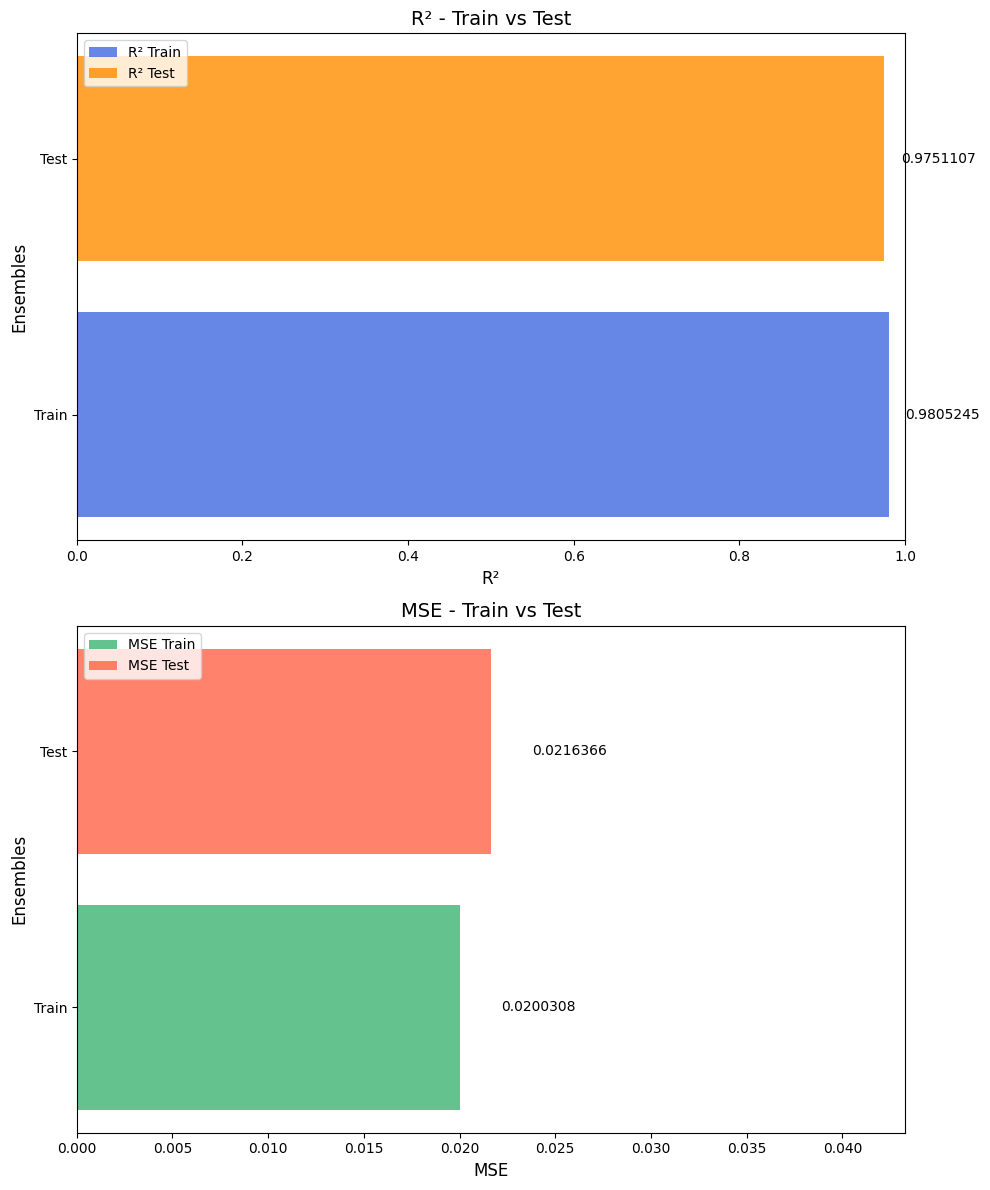

In [69]:


# Création de la figure avec 2 sous-graphes
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Tracé du score R² pour Train et Test avec nouvelles couleurs
axs[0].barh(['Train'], [r2_train_split], color='royalblue', alpha=0.8, label='R² Train')
axs[0].barh(['Test'], [r2_test_split], color='darkorange', alpha=0.8, label='R² Test')
axs[0].set_xlabel('R²', fontsize=12)
axs[0].set_ylabel('Ensembles', fontsize=12)
axs[0].set_xlim(0, 1)
axs[0].tick_params(axis='y', labelcolor='black')
axs[0].set_title('R² - Train vs Test', fontsize=14)
axs[0].legend(loc='upper left')

# Ajout des annotations pour R²
for i, value in enumerate([r2_train_split, r2_test_split]):
    axs[0].annotate(f'{value:.7f}', xy=(value, i), xytext=(value + 0.02, i), va='center', fontsize=10, color='black')

# Tracé du MSE pour Train et Test avec nouvelles couleurs
axs[1].barh(['Train'], [mse_train_split], color='mediumseagreen', alpha=0.8, label='MSE Train')
axs[1].barh(['Test'], [mse_test_split], color='tomato', alpha=0.8, label='MSE Test')
axs[1].set_xlabel('MSE', fontsize=12)
axs[1].set_ylabel('Ensembles', fontsize=12)
axs[1].set_xlim(0, max(mse_train_split, mse_test_split) * 2)  # Ajuster le maximum de MSE
axs[1].tick_params(axis='y', labelcolor='black')
axs[1].set_title('MSE - Train vs Test', fontsize=14)
axs[1].legend(loc='upper left')

# Ajout des annotations pour MSE
for i, value in enumerate([mse_train_split, mse_test_split]):
    axs[1].annotate(f'{value:.7f}', xy=(value, i), xytext=(value + max(mse_train_split, mse_test_split) * 0.1, i), va='center', fontsize=10, color='black')

# Ajuster les espacements entre les subplots pour éviter le chevauchement
plt.tight_layout()

# Afficher le graphique
plt.show()



Si le score R² est élevé et similaire entre l'ensemble Train et Test, cela indique que le modèle généralise bien.

En revanche :

Si le R² sur l'ensemble Train est beaucoup plus élevé que sur l'ensemble Test, cela peut indiquer un problème de surapprentissage (overfitting).

Si les deux R² sont faibles, cela peut indiquer un problème de sous-apprentissage (underfitting) ou que les variables explicatives ne suffisent pas pour prédire efficacement la variable cible.

Dans notre cas, le score R² est élevé et similaire entre le Train et le Test, ce qui confirme que le modèle généralise bien.

Un MSE faible signifie que les prédictions du modèle sont proches des valeurs réelles.

Si le MSE du Test est beaucoup plus élevé que celui du Train, cela peut indiquer un problème de surapprentissage (overfitting).

Si les deux MSE sont élevés, cela peut suggérer que le modèle est mal paramétré ou que les données ne sont pas bien adaptées à une régression linéaire.

Dans notre cas, le MSE du Train (0.02003) et celui du Test (0.02164) sont très proches et faibles, ce qui indique une erreur minimale et une bonne capacité de généralisation du modèle.

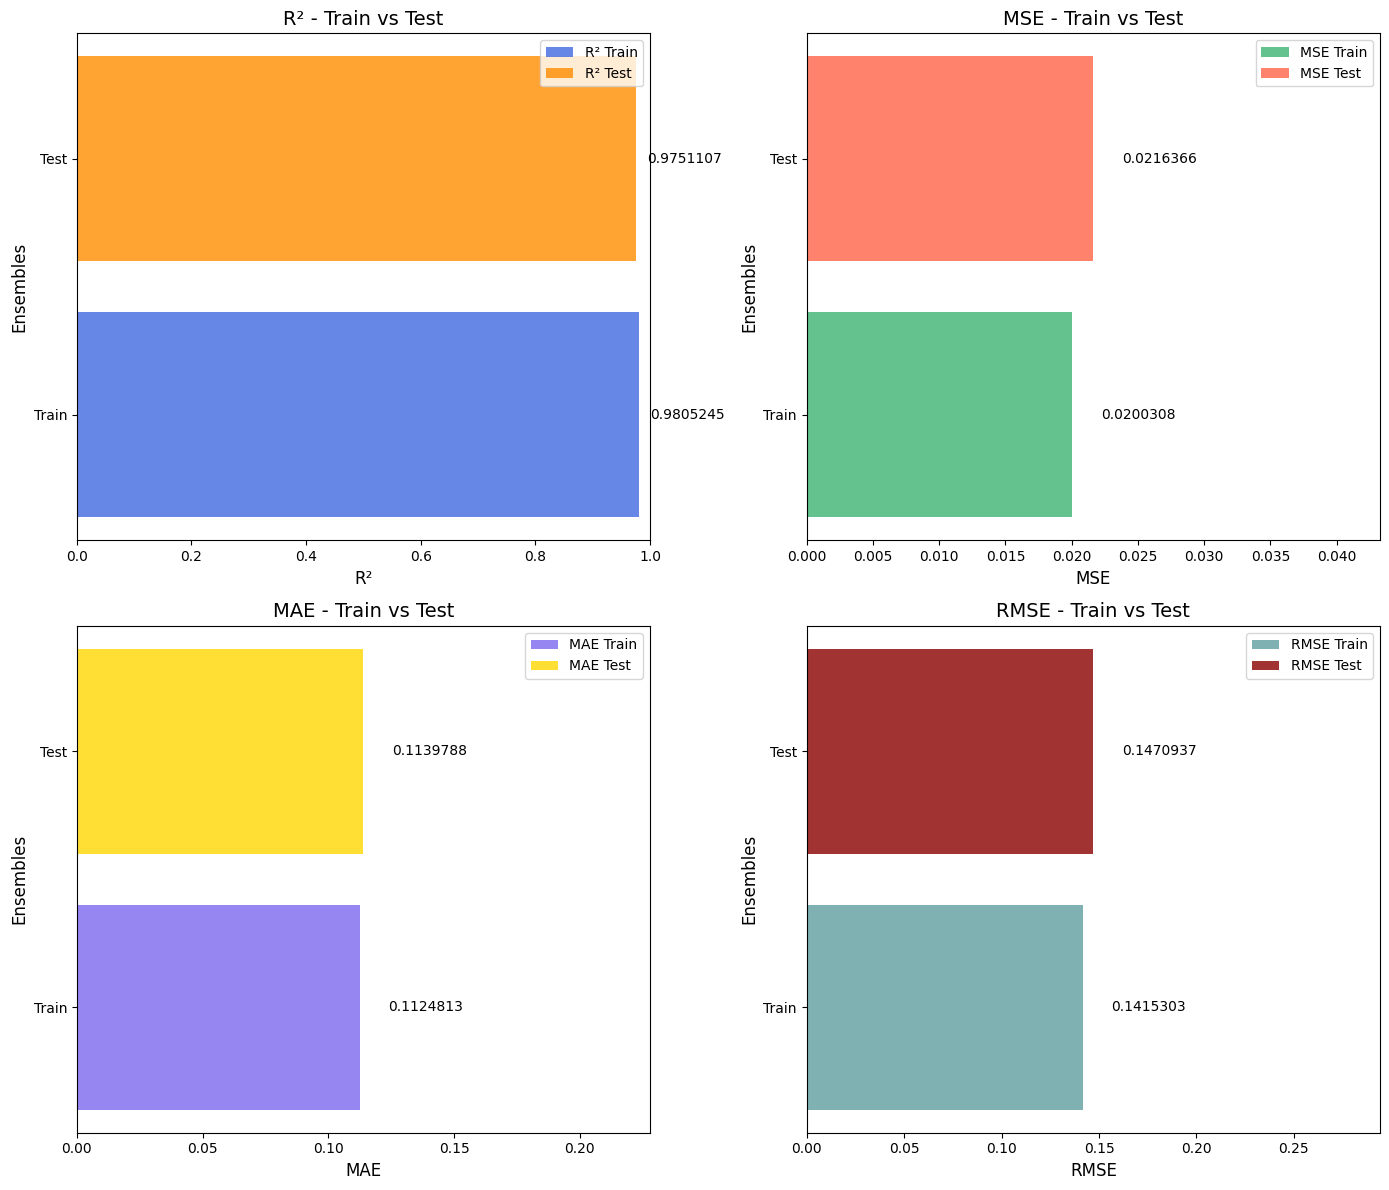

In [70]:
# Création de la figure avec 4 sous-graphes
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Tracé du score R² pour Train et Test avec nouvelles couleurs
axs[0, 0].barh(['Train'], [r2_train_split], color='royalblue', alpha=0.8, label='R² Train')
axs[0, 0].barh(['Test'], [r2_test_split], color='darkorange', alpha=0.8, label='R² Test')
axs[0, 0].set_xlabel('R²', fontsize=12)
axs[0, 0].set_ylabel('Ensembles', fontsize=12)
axs[0, 0].set_xlim(0, 1)
axs[0, 0].tick_params(axis='y', labelcolor='black')
axs[0, 0].set_title('R² - Train vs Test', fontsize=14)
axs[0, 0].legend(loc='upper right')

# Ajout des annotations pour R²
for i, value in enumerate([r2_train_split, r2_test_split]):
    axs[0, 0].annotate(f'{value:.7f}', xy=(value, i), xytext=(value + 0.02, i), va='center', fontsize=10, color='black')

# Tracé du MSE pour Train et Test avec nouvelles couleurs
axs[0, 1].barh(['Train'], [mse_train_split], color='mediumseagreen', alpha=0.8, label='MSE Train')
axs[0, 1].barh(['Test'], [mse_test_split], color='tomato', alpha=0.8, label='MSE Test')
axs[0, 1].set_xlabel('MSE', fontsize=12)
axs[0, 1].set_ylabel('Ensembles', fontsize=12)
axs[0, 1].set_xlim(0, max(mse_train_split, mse_test_split) * 2)  # Ajuster le maximum de MSE
axs[0, 1].tick_params(axis='y', labelcolor='black')
axs[0, 1].set_title('MSE - Train vs Test', fontsize=14)
axs[0, 1].legend(loc='upper right')

# Ajout des annotations pour MSE
for i, value in enumerate([mse_train_split, mse_test_split]):
    axs[0, 1].annotate(f'{value:.7f}', xy=(value, i), xytext=(value + max(mse_train_split, mse_test_split) * 0.1, i), va='center', fontsize=10, color='black')

# Tracé du MAE pour Train et Test avec nouvelles couleurs
axs[1, 0].barh(['Train'], [mae_train_split], color='mediumslateblue', alpha=0.8, label='MAE Train')
axs[1, 0].barh(['Test'], [mae_test_split], color='gold', alpha=0.8, label='MAE Test')
axs[1, 0].set_xlabel('MAE', fontsize=12)
axs[1, 0].set_ylabel('Ensembles', fontsize=12)
axs[1, 0].set_xlim(0, max(mae_train_split, mae_test_split) * 2)  # Ajuster le maximum de MAE
axs[1, 0].tick_params(axis='y', labelcolor='black')
axs[1, 0].set_title('MAE - Train vs Test', fontsize=14)
axs[1, 0].legend(loc='upper right')

# Ajout des annotations pour MAE
for i, value in enumerate([mae_train_split, mae_test_split]):
    axs[1, 0].annotate(f'{value:.7f}', xy=(value, i), xytext=(value + max(mae_train_split, mae_test_split) * 0.1, i), va='center', fontsize=10, color='black')

# Tracé du RMSE pour Train et Test avec nouvelles couleurs
axs[1, 1].barh(['Train'], [rmse_train_split], color='cadetblue', alpha=0.8, label='RMSE Train')
axs[1, 1].barh(['Test'], [rmse_test_split], color='darkred', alpha=0.8, label='RMSE Test')
axs[1, 1].set_xlabel('RMSE', fontsize=12)
axs[1, 1].set_ylabel('Ensembles', fontsize=12)
axs[1, 1].set_xlim(0, max(rmse_train_split, rmse_test_split) * 2)  # Ajuster le maximum de RMSE
axs[1, 1].tick_params(axis='y', labelcolor='black')
axs[1, 1].set_title('RMSE - Train vs Test', fontsize=14)
axs[1, 1].legend(loc='upper right')

# Ajout des annotations pour RMSE
for i, value in enumerate([rmse_train_split, rmse_test_split]):
    axs[1, 1].annotate(f'{value:.7f}', xy=(value, i), xytext=(value + max(rmse_train_split, rmse_test_split) * 0.1, i), va='center', fontsize=10, color='black')

# Ajuster les espacements entre les subplots pour éviter le chevauchement
plt.tight_layout()

# Afficher le graphique
plt.show()


𝑅2(en haut à gauche) :

Les scores R2 pour le Train (0.9805) et le Test (0.9751) sont tous deux élevés et proches.
Cela indique que le modèle explique bien la variance des données et généralise correctement.

MSE (en haut à droite) :

Le MSE pour le Train (0.0200) et le Test (0.0216) est faible et très similaire.
Cela reflète une erreur quadratique moyenne faible, indiquant que le modèle prédit avec une bonne précision et qu'il n'y a pas de surapprentissage notable.

MAE (en bas à gauche) :

Le MAE pour le Train (0.1125) et le Test (0.1140) est très proche, ce qui confirme que les erreurs moyennes absolues sont faibles et cohérentes entre les deux ensembles.
Cela montre que le modèle a une performance uniforme et des prédictions fiables.

RMSE (en bas à droite) :

Le RMSE pour le Train (0.1415) et le Test (0.1471) est également faible et proche, confirmant qu’il n’y a pas de grandes erreurs ou d'outliers significatifs.


/var/folders/c2/w6tmsxjs7bddhb5_b4cjppg40000gp/T/ipykernel_9465/2822094359.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef, y=features, palette='viridis')


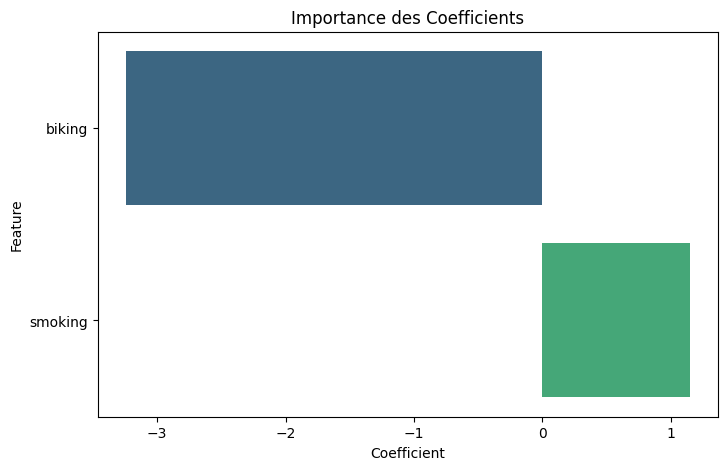

In [71]:
# Créer et entraîner un modèle de régression linéaire
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Obtenir les coefficients du modèle
coef = model.coef_
features = X.columns

# Tracer les coefficients
plt.figure(figsize=(8, 5))
sns.barplot(x=coef, y=features, palette='viridis')
plt.title('Importance des Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

Un coefficient négatif signifie que cette variable a une relation inverse avec la variable cible (heart.disease dans votre cas). Par exemple, si le coefficient pour biking est négatif, cela indique que plus on fait de vélo, moins on est susceptible de développer une maladie cardiaque.

Un coefficient positif signifie que la variable est positivement corrélée à la variable cible. Par exemple, un coefficient positif pour smoking indique que fumer augmente la probabilité de développer une maladie cardiaque.

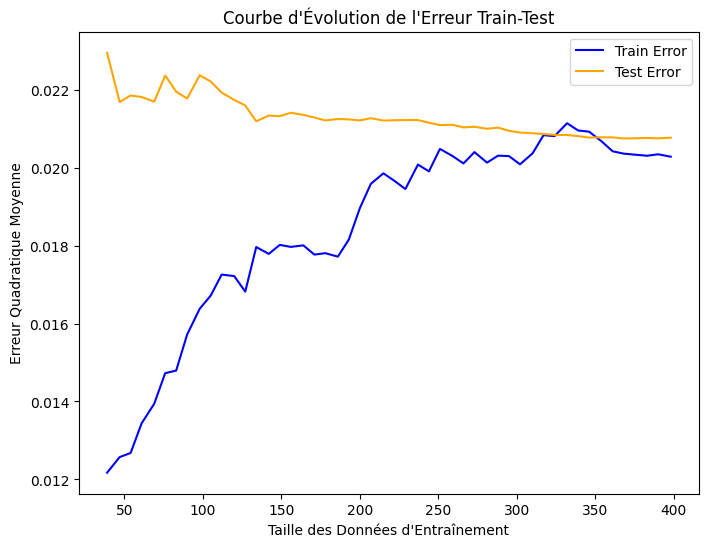

In [72]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 50)
)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Train Error', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Test Error', color='orange')
plt.title("Courbe d'Évolution de l'Erreur Train-Test")
plt.xlabel('Taille des Données d\'Entraînement')
plt.ylabel('Erreur Quadratique Moyenne')
plt.legend()
plt.show()


Ce graphique montre l'évolution de l'erreur quadratique moyenne (MSE) en fonction de la taille des données d'entraînement pour les ensembles Train et Test. 

#Courbe d'erreur sur l'ensemble Train (ligne bleue) :

L'erreur diminue rapidement lorsque la taille des données d'entraînement augmente.
Elle atteint un plateau aux alentours de 0.02, indiquant que le modèle apprend de manière efficace avec plus de données.

#Courbe d'erreur sur l'ensemble Test (ligne orange) :

L'erreur sur les données Test est initialement plus élevée avec de petites tailles d'entraînement, mais elle diminue progressivement et se stabilise à un niveau similaire à celui de l'erreur d'entraînement.
Cela indique une bonne généralisation du modèle à mesure que la quantité de données augmente.

#Comportement global des courbes :

Les deux courbes convergent vers des valeurs proches à mesure que la taille des données d'entraînement augmente.
Cela suggère que le modèle n'est ni surajusté (overfitting) ni sous-ajusté (underfitting).

#Conclusion :
Le modèle bénéficie d'un ensemble de données d'entraînement suffisant pour offrir des prédictions précises. L'écart faible entre les erreurs Train et Test démontre une bonne capacité de généralisation.

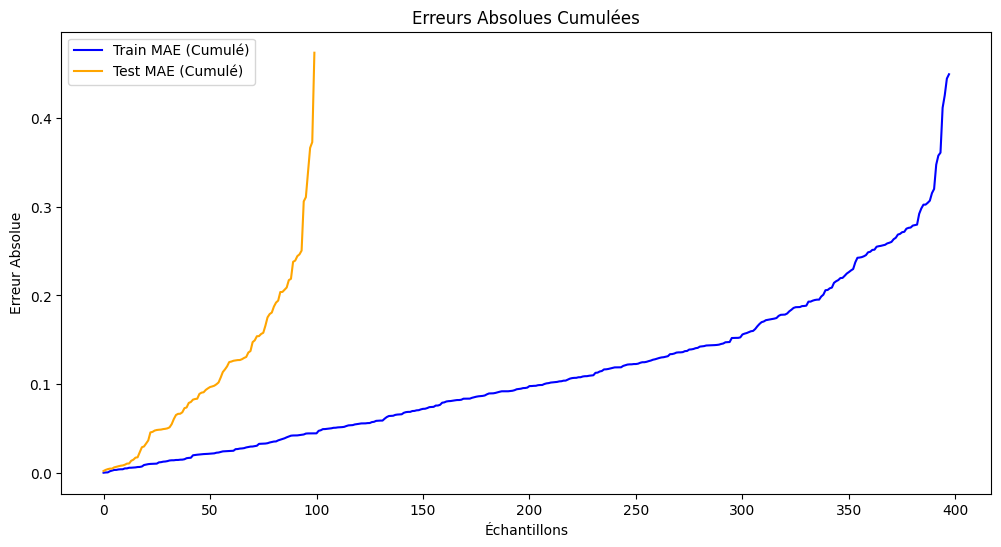

In [73]:


mae_train = abs(residuals_train).sort_values()
mae_test = abs(residuals_test).sort_values()

plt.figure(figsize=(12, 6))
plt.plot(mae_train.values, label='Train MAE (Cumulé)', color='blue')
plt.plot(mae_test.values, label='Test MAE (Cumulé)', color='orange')
plt.title('Erreurs Absolues Cumulées')
plt.xlabel('Échantillons')
plt.ylabel('Erreur Absolue')
plt.legend()
plt.show()


# cross validation

In [74]:
import time
import numpy as np
from sklearn.model_selection import KFold

# Fonction pour effectuer la validation croisée
def cross_val_score_custom(X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    # Listes pour stocker les scores et les coefficients
    mse_scores = []
    r2_scores = []
    mae_scores = []
    rmse_scores = []
    beta_all = []  # Liste pour stocker les coefficients
    y_pred_all = []  # Liste pour stocker toutes les prédictions
    train_times = []  # Liste pour stocker les temps d'entraînement
    test_times = []  # Liste pour stocker les temps de test

    # Mesurer le temps de début de l'exécution de la validation croisée
    start_time = time.time()

    for train_index, test_index in kf.split(X):
        # Diviser les données en ensembles d'entraînement et de test
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Mesurer le temps d'entraînement
        start_time_train = time.time()

        # Entraîner le modèle
        beta = linear_regression(X_train, y_train)
        beta_all.append(beta)  # Ajouter les coefficients du modèle
        
        # Mesurer le temps d'entraînement
        end_time_train = time.time()
        train_times.append(end_time_train - start_time_train)  # Temps d'entraînement
        
        # Mesurer le temps de test
        start_time_test = time.time()

        # Faire des prédictions
        y_pred = predict(X_test, beta)
        y_pred_all.append(y_pred)
        
        # Calculer les erreurs
        mse = mean_squared_error_custom(y_test, y_pred)
        mse_scores.append(mse)
        
        r2 = r2_score_custom(y_test, y_pred)
        r2_scores.append(r2)
        
        mae = mean_absolute_error_custom(y_test, y_pred)
        mae_scores.append(mae)
        
        rmse = root_mean_squared_error_custom(y_test, y_pred)
        rmse_scores.append(rmse)

        # Mesurer le temps de test
        end_time_test = time.time()
        test_times.append(end_time_test - start_time_test)  # Temps de test

    # Mesurer le temps de fin de l'exécution
    end_time = time.time()
    total_time = end_time - start_time  # Temps total d'exécution
    
    # Calculer les moyennes des scores
    return ( 
        mse_scores, np.mean(mse_scores), 
        r2_scores, np.mean(r2_scores),
        mae_scores, np.mean(mae_scores),
        rmse_scores, np.mean(rmse_scores),
        np.array(beta_all),  # Retours des coefficients pour chaque pli
        np.mean(train_times), np.mean(test_times), total_time  # Moyenne des temps d'entraînement et de test
    )


# Regression Lineaire multiple

In [75]:
# Diviser les données
X = df[['biking', 'smoking']].values  # Variables indépendantes
y = df['heart.disease'].values        # Variable cible

# Appliquer la validation croisée
mse_scores_lm, mse_mean_lm, r2_scores_lm, r2_mean_lm, mae_scores_lm, mae_mean_lm, rmse_scores_lm, rmse_mean_lm, beta_multiple ,time_train_lm,time_test_lm,time_lm= cross_val_score_custom(X, y, k=5)


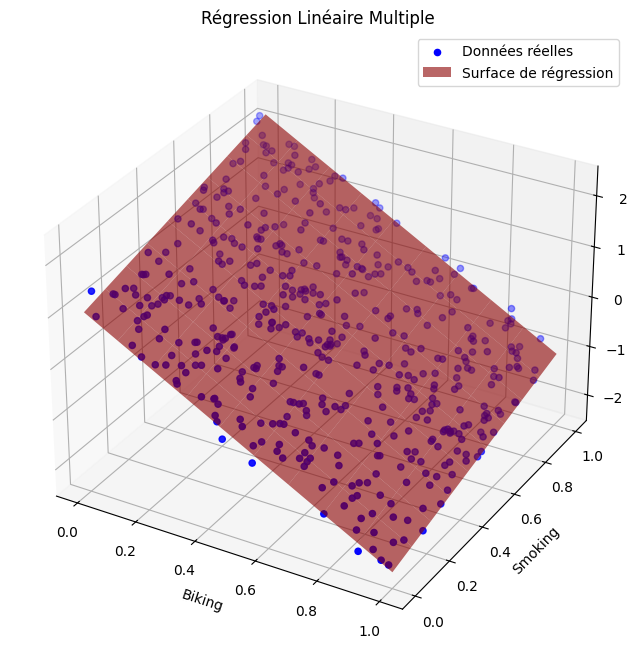

In [76]:

# Moyenne des coefficients
beta_mean_multi = np.mean(beta_multiple, axis=0)


# Tracer la surface de régression (uniquement si visualisation 3D est nécessaire)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Points de données réels
ax.scatter(df['biking'], df['smoking'], df['heart.disease'], color='blue', label='Données réelles')

# Générer des points pour la surface
biking_range = np.linspace(df['biking'].min(), df['biking'].max(), 10)
smoking_range = np.linspace(df['smoking'].min(), df['smoking'].max(), 10)
biking_grid, smoking_grid = np.meshgrid(biking_range, smoking_range)
X_grid = np.c_[biking_grid.ravel(), smoking_grid.ravel()]
y_pred_grid = predict(X_grid, beta_mean_multi).reshape(biking_grid.shape)

# Ajouter la surface de régression
ax.plot_surface(biking_grid, smoking_grid, y_pred_grid, color='red', alpha=0.6, label='Surface de régression')

# Labels
ax.set_xlabel('Biking')
ax.set_ylabel('Smoking')
ax.set_zlabel('Heart Disease')
ax.set_title('Régression Linéaire Multiple')
plt.legend()
plt.show()

a visualisation en 3D permet de comprendre l'interaction entre deux variables indépendantes (biking et smoking) et une variable dépendante (heart.disease), facilitant ainsi l'interprétation du modèle de régression linéaire multiple.

In [77]:
# Affichage des résultats pour chaque métrique avec un titre
print("### Résultats pour la Régression Linéaire Multiple ###")
print(f"Scores MSE pour chaque pli : {mse_scores_lm}")
print(f"MSE moyen : {mse_mean_lm}")
print(f"Scores R² pour chaque pli : {r2_scores_lm}")
print(f"R² moyen : {r2_mean_lm}")
print(f"Scores MAE pour chaque pli : {mae_scores_lm}")
print(f"MAE moyen : {mae_mean_lm}")
print(f"Scores RMSE pour chaque pli : {rmse_scores_lm}")
print(f"RMSE moyen : {rmse_mean_lm}")


### Résultats pour la Régression Linéaire Multiple ###
Scores MSE pour chaque pli : [0.021636552812051617, 0.01843765537989054, 0.025898795009118958, 0.01795585799959311, 0.018933938365131568]
MSE moyen : 0.020572559913157158
Scores R² pour chaque pli : [0.9751106638392244, 0.9817572970995281, 0.9755257658172453, 0.9827881602237148, 0.980971553175848]
R² moyen : 0.9792306880311121
Scores MAE pour chaque pli : [0.11397878609124296, 0.10447925843462258, 0.12910116983376071, 0.10457082512778439, 0.1144635026632306]
MAE moyen : 0.11331870843012823
Scores RMSE pour chaque pli : [0.14709368719306623, 0.13578532829393072, 0.1609310256262569, 0.13399947014668792, 0.13760064812758538]
RMSE moyen : 0.1430820318775054


Scores R²:Les scores sont très cohérents et proches de 1, indiquant que le modèle a une performance stable sur toutes les divisions.

Score moyen (R²) : ce score montre que le modèle est globalement très performant sur l'ensemble des folds.

MSE pour chaque fold : Les valeurs de MSE sont faibles et relativement proches les unes des autres, ce qui indique une erreur de prédiction cohérente sur les différentes divisions.

MSE moyen :La moyenne confirme une bonne performance globale.

Scores MAE (Erreur Absolue Moyenne) : Les valeurs de MAE pour chaque pli varient légèrement, mais elles restent faibles, ce qui indique que le modèle est globalement précis dans ses prédictions. L'écart entre les différents plis est minime, ce qui montre une bonne constance du modèle. Le score moyen de 0.1133 confirme que l'erreur moyenne absolue est faible, ce qui est un bon indicateur de la précision du modèle.

Scores RMSE (Erreur Quadratique Moyenne Racine) : Les valeurs de RMSE varient aussi, mais elles restent relativement faibles, ce qui est un bon signe, car cela indique que le modèle n'a pas de grandes erreurs d'estimation. Le score moyen de RMSE est de 0.143, ce qui suggère que l'erreur quadratique moyenne est également bien contrôlée et que le modèle est performant, sans erreurs majeures de prédiction.

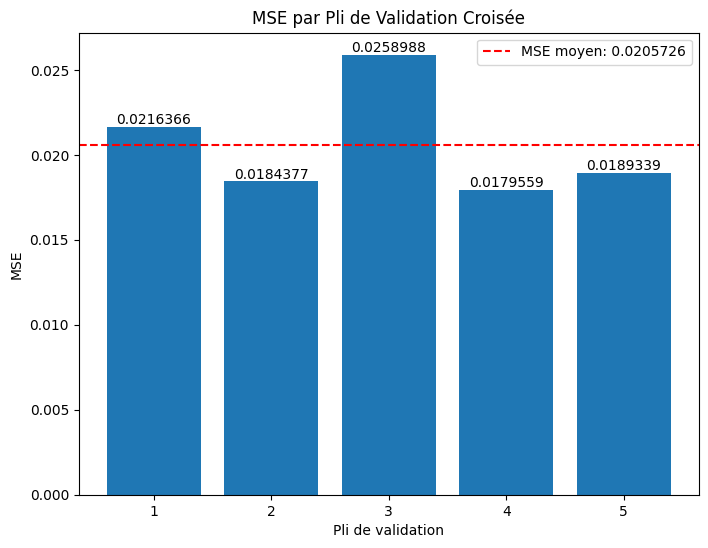

In [78]:
# Tracer les scores de MSE
plt.figure(figsize=(8, 6))
bars = plt.bar(range(1, len(mse_scores_lm) + 1), mse_scores_lm, )  
plt.axhline(y=np.mean(mse_scores_lm), color='red', linestyle='--', label=f"MSE moyen: {np.mean(mse_scores_lm):.7f}")
plt.xlabel('Pli de validation')
plt.ylabel('MSE')
plt.title('MSE par Pli de Validation Croisée')

# Ajouter les valeurs au-dessus de chaque barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.7f}', ha='center', va='bottom', fontsize=10)

plt.legend()
plt.show()


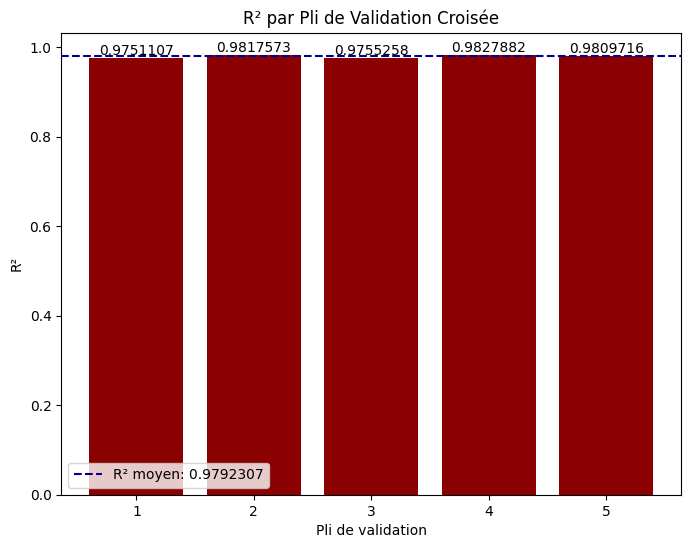

In [79]:
# Tracer les scores de R²
plt.figure(figsize=(8, 6))
bars = plt.bar(range(1, len(r2_scores_lm) + 1), r2_scores_lm, color='darkred')  
plt.axhline(y=np.mean(r2_scores_lm), color='darkblue', linestyle='--', label=f"R² moyen: {np.mean(r2_scores_lm):.7f}")
plt.xlabel('Pli de validation')
plt.ylabel('R²')
plt.title('R² par Pli de Validation Croisée')

# Ajouter les valeurs au-dessus de chaque barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.7f}', ha='center', va='bottom', fontsize=10)

plt.legend()
plt.show()


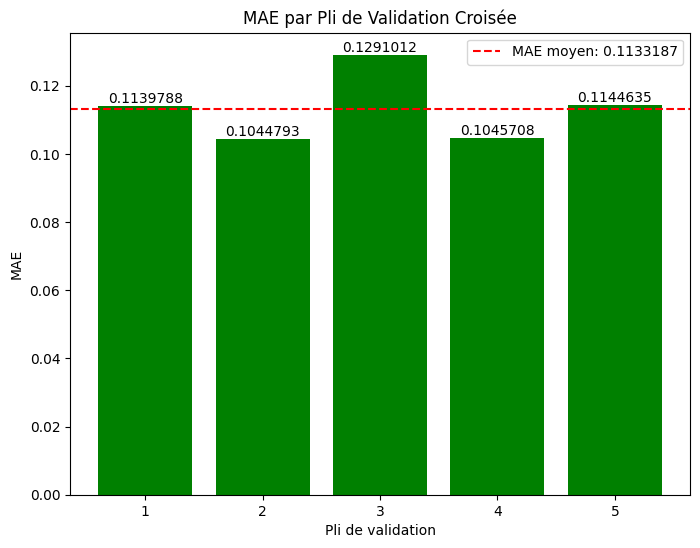

In [80]:
# Tracer les scores de MAE
plt.figure(figsize=(8, 6))
bars = plt.bar(range(1, len(mae_scores_lm) + 1), mae_scores_lm, color='green')  
plt.axhline(y=np.mean(mae_scores_lm), color='red', linestyle='--', label=f"MAE moyen: {np.mean(mae_scores_lm):.7f}")
plt.xlabel('Pli de validation')
plt.ylabel('MAE')
plt.title('MAE par Pli de Validation Croisée')

# Ajouter les valeurs au-dessus de chaque barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.7f}', ha='center', va='bottom', fontsize=10)

plt.legend()
plt.show()


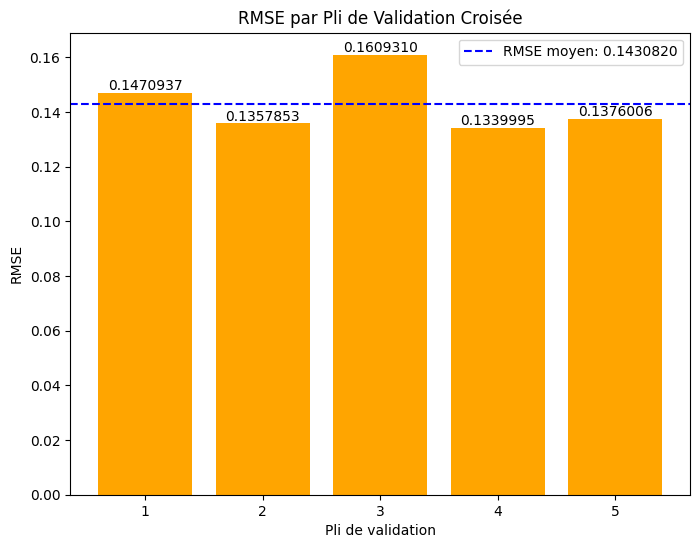

In [81]:
# Tracer les scores de RMSE
plt.figure(figsize=(8, 6))
bars = plt.bar(range(1, len(rmse_scores_lm) + 1), rmse_scores_lm, color='orange')  
plt.axhline(y=np.mean(rmse_scores_lm), color='blue', linestyle='--', label=f"RMSE moyen: {np.mean(rmse_scores_lm):.7f}")
plt.xlabel('Pli de validation')
plt.ylabel('RMSE')
plt.title('RMSE par Pli de Validation Croisée')

# Ajouter les valeurs au-dessus de chaque barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.7f}', ha='center', va='bottom', fontsize=10)

plt.legend()
plt.show()


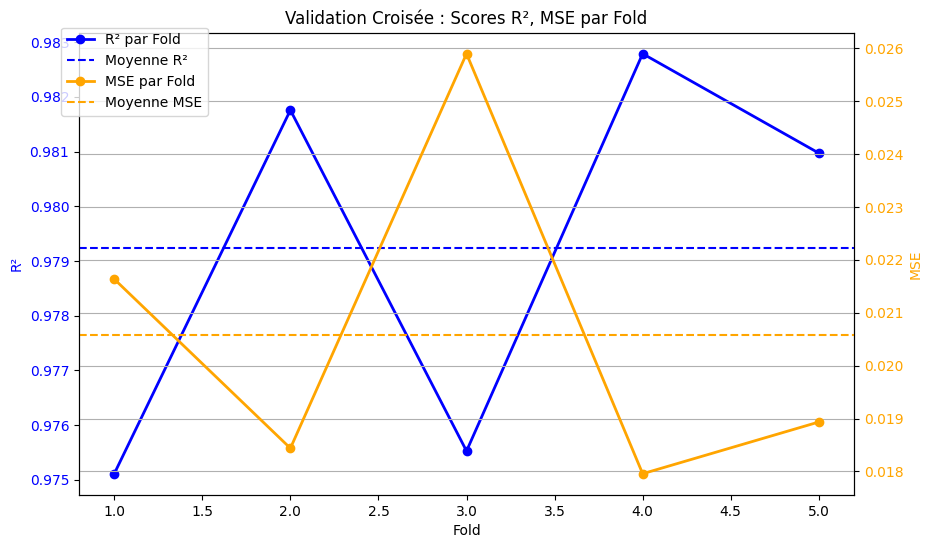

In [82]:
# Calcul des moyennes
mean_r2 = np.mean(r2_scores_lm)
mean_mse = np.mean(mse_scores_lm)

# Création du graphique avec deux axes y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Tracé des scores R² sur le premier axe y (ax1)
ax1.plot(range(1, len(r2_scores_lm) + 1), r2_scores_lm, marker='o', label='R² par Fold', color='blue', linewidth=2)
ax1.axhline(mean_r2, color='blue', linestyle='--', label='Moyenne R²')
ax1.set_xlabel('Fold')
ax1.set_ylabel('R²', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Création du deuxième axe y (ax2) pour les scores MSE
ax2 = ax1.twinx()
ax2.plot(range(1, len(mse_scores_lm) + 1), mse_scores_lm, marker='o', label='MSE par Fold', color='orange', linewidth=2)
ax2.axhline(mean_mse, color='orange', linestyle='--', label='Moyenne MSE')
ax2.set_ylabel('MSE', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Ajouter des légendes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Ajouter un titre et la grille
plt.title('Validation Croisée : Scores R², MSE par Fold')
plt.grid()

# Afficher le graphique
plt.show()

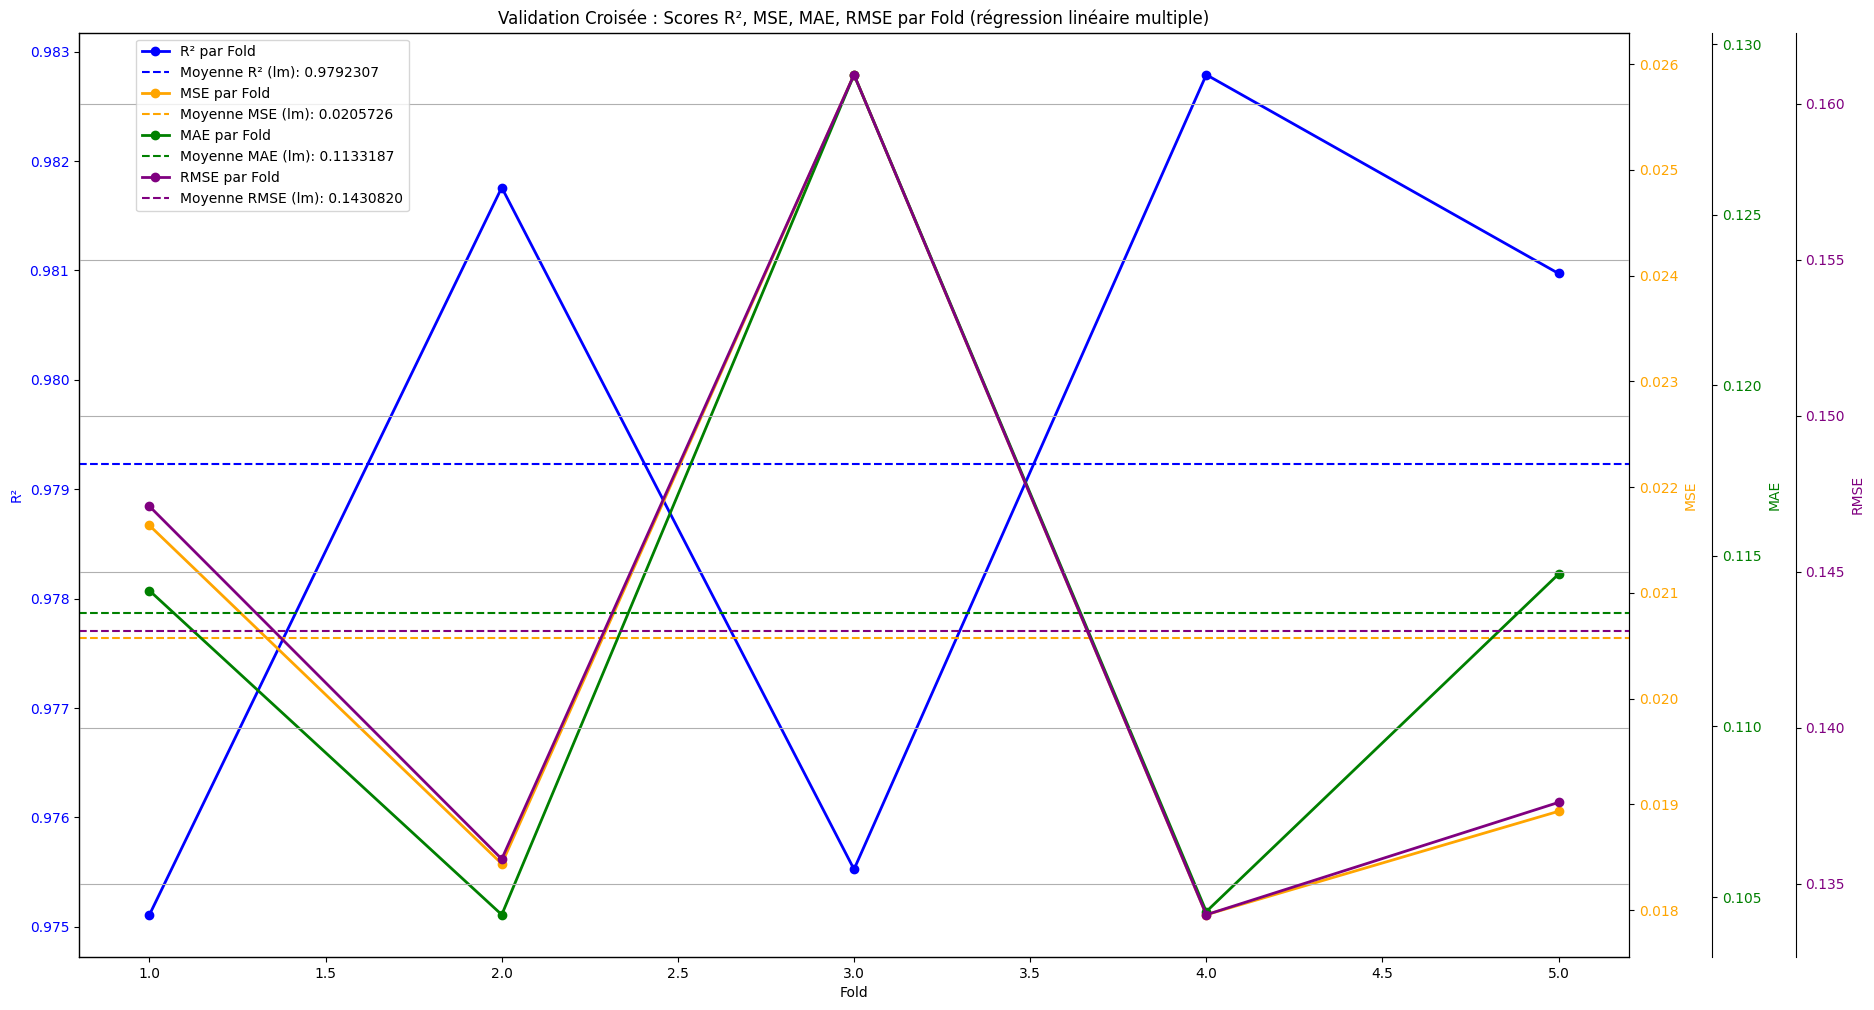

In [83]:
# Calcul des moyennes
mean_r2_lm = np.mean(r2_scores_lm)
mean_mse_lm = np.mean(mse_scores_lm)
mean_mae_lm = np.mean(mae_scores_lm)
mean_rmse_lm = np.mean(rmse_scores_lm)

# Création du graphique avec quatre axes y
fig, ax1 = plt.subplots(figsize=(20, 12))

# Tracé des scores R² sur le premier axe y (ax1)
ax1.plot(range(1, len(r2_scores_lm) + 1), r2_scores_lm, marker='o', label='R² par Fold', color='blue', linewidth=2)
ax1.axhline(mean_r2_lm, color='blue', linestyle='--', label=f'Moyenne R² (lm): {mean_r2_lm:.7f}')
ax1.set_xlabel('Fold')
ax1.set_ylabel('R²', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Création du deuxième axe y (ax2) pour les scores MSE
ax2 = ax1.twinx()
ax2.plot(range(1, len(mse_scores_lm) + 1), mse_scores_lm, marker='o', label='MSE par Fold', color='orange', linewidth=2)
ax2.axhline(mean_mse_lm, color='orange', linestyle='--', label=f'Moyenne MSE (lm): {mean_mse_lm:.7f}')
ax2.set_ylabel('MSE', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Création du troisième axe y (ax3) pour les scores MAE
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Décaler l'axe pour éviter les chevauchements
ax3.plot(range(1, len(mae_scores_lm) + 1), mae_scores_lm, marker='o', label='MAE par Fold', color='green', linewidth=2)
ax3.axhline(mean_mae_lm, color='green', linestyle='--', label=f'Moyenne MAE (lm): {mean_mae_lm:.7f}')
ax3.set_ylabel('MAE', color='green')
ax3.tick_params(axis='y', labelcolor='green')

# Création du quatrième axe y (ax4) pour les scores RMSE
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))  # Décaler l'axe pour éviter les chevauchements
ax4.plot(range(1, len(rmse_scores_lm) + 1), rmse_scores_lm, marker='o', label='RMSE par Fold', color='purple', linewidth=2)
ax4.axhline(mean_rmse_lm, color='purple', linestyle='--', label=f'Moyenne RMSE (lm): {mean_rmse_lm:.7f}')
ax4.set_ylabel('RMSE', color='purple')
ax4.tick_params(axis='y', labelcolor='purple')

# Ajouter des légendes
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.88))

# Ajouter un titre et la grille
plt.title('Validation Croisée : Scores R², MSE, MAE, RMSE par Fold (régression linéaire multiple)')
plt.grid()

# Afficher le graphique
plt.show()


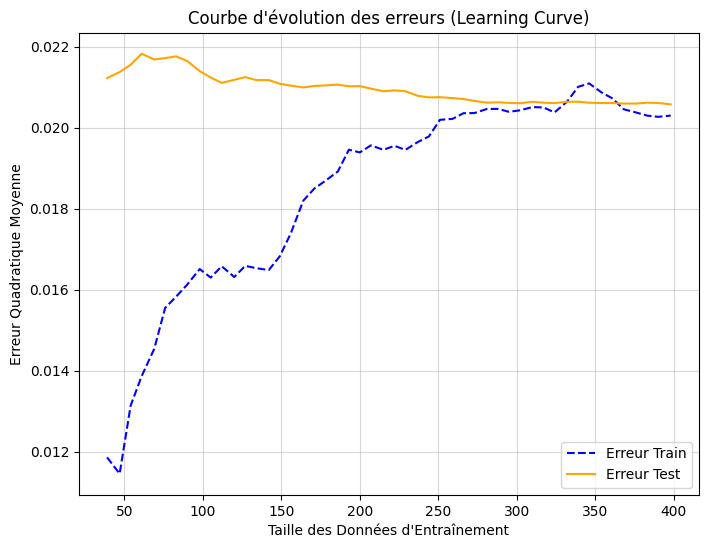

In [84]:
from sklearn.model_selection import learning_curve

from sklearn.metrics import make_scorer
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Créer un scorer personnalisé pour le MSE
mse_scorer = make_scorer(mean_squared_error_custom)

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=kf, scoring=mse_scorer, train_sizes=np.linspace(0.1, 1.0, 50)
)


train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Courbe d'évolution de l'erreur
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Erreur Train', color='blue', linestyle='--')
plt.plot(train_sizes, test_scores_mean, label='Erreur Test', color='orange', linestyle='-')
plt.title('Courbe d\'évolution des erreurs (Learning Curve)')
plt.xlabel('Taille des Données d\'Entraînement')
plt.ylabel('Erreur Quadratique Moyenne')
plt.legend()
plt.grid(alpha=0.5)
plt.show()


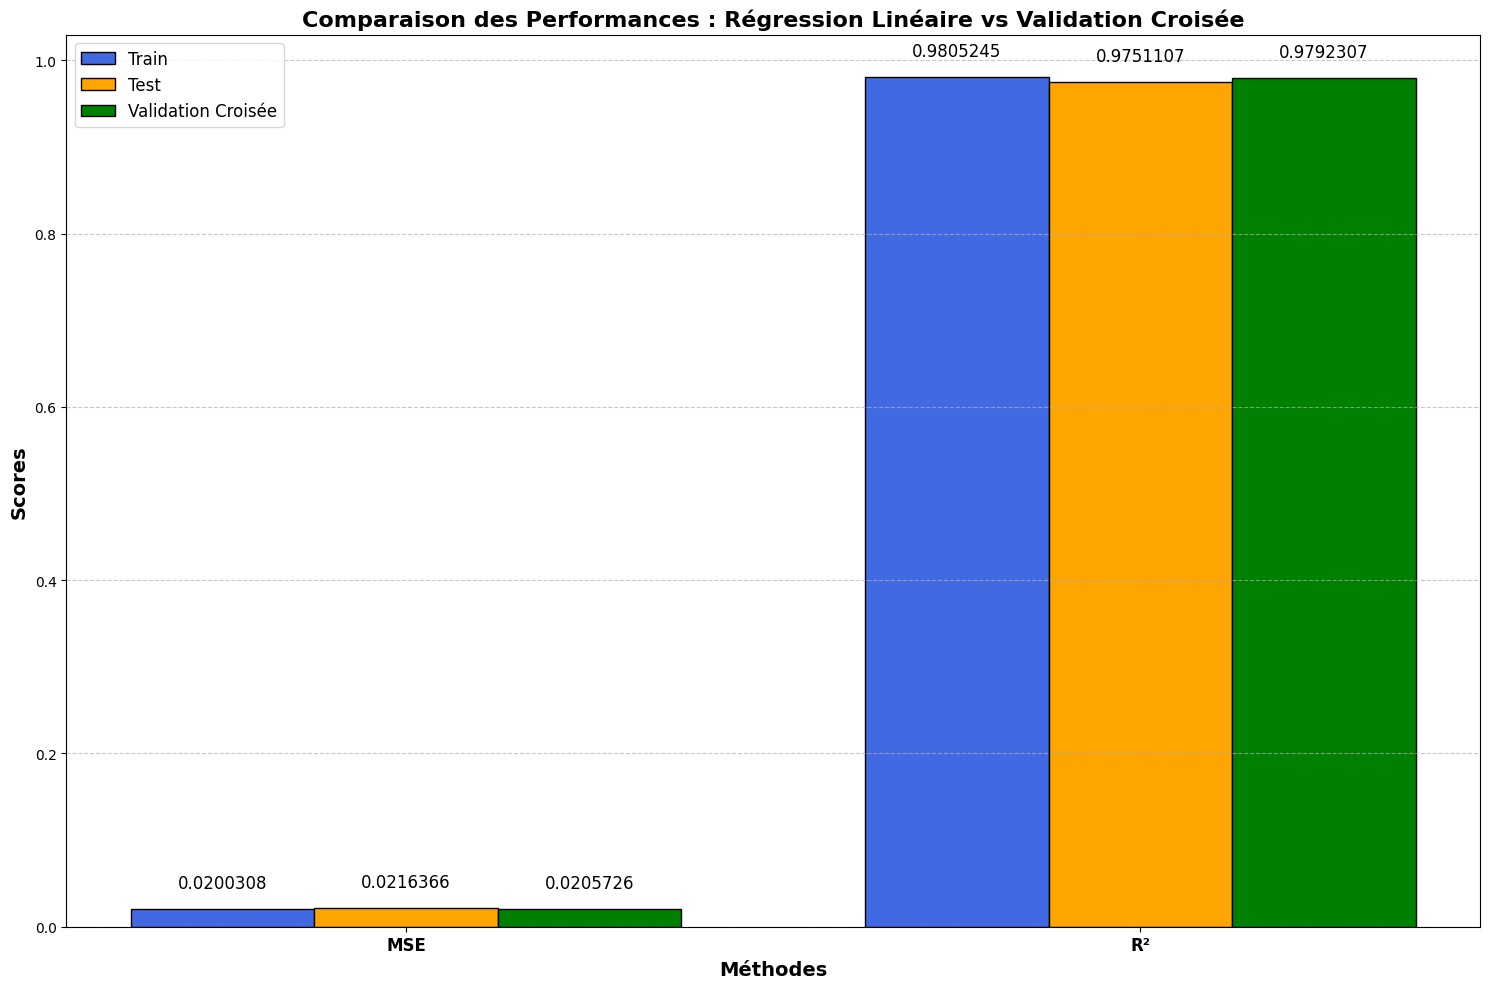

In [85]:
# Remplacer ces valeurs par celles que vous avez obtenues après calcul
metrics = ['MSE', 'R²']
train_values = [mse_train_split, r2_train_split]  # Résultats pour l'entraînement (Train)
test_values = [mse_test_split, r2_test_split]  # Résultats pour le test (Test)

# Assurez-vous que mse_scores et r2_scores contiennent des valeurs, pas des fonctions.
cv_values = [np.mean(mse_scores_lm), np.mean(r2_scores_lm)]  # Résultats pour la validation croisée

# Positionnement des barres
x = np.arange(len(metrics))
width = 0.25  # Largeur des barres

# Création du graphique
fig, ax = plt.subplots(figsize=(15, 10))

# Barres pour la régression linéaire
bar_train = ax.bar(x - width, train_values, width, label='Train', color='royalblue', edgecolor='black')
bar_test = ax.bar(x, test_values, width, label='Test', color='orange', edgecolor='black')
bar_cv = ax.bar(x + width, cv_values, width, label='Validation Croisée', color='green', edgecolor='black')

# Ajouter des labels et des titres
ax.set_xlabel('Méthodes', fontsize=14, fontweight='bold')
ax.set_ylabel('Scores', fontsize=14, fontweight='bold')
ax.set_title('Comparaison des Performances : Régression Linéaire vs Validation Croisée', fontsize=16, fontweight='bold')

# Configurer les ticks et les étiquettes de l'axe x
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12, fontweight='bold')

# Ajouter une légende
ax.legend(fontsize=12)

# Ajouter une grille pour une meilleure lisibilité
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Afficher les valeurs au-dessus de chaque barre
for i in range(len(metrics)):
    ax.text(bar_train[i].get_x() + bar_train[i].get_width() / 2, bar_train[i].get_height() + 0.02,
            f'{train_values[i]:.7f}', ha='center', va='bottom', fontsize=12 )
    
    ax.text(bar_test[i].get_x() + bar_test[i].get_width() / 2, bar_test[i].get_height() + 0.02,
            f'{test_values[i]:.7f}', ha='center', va='bottom', fontsize=12)
    
    ax.text(bar_cv[i].get_x() + bar_cv[i].get_width() / 2, bar_cv[i].get_height() + 0.02,
            f'{cv_values[i]:.7f}', ha='center', va='bottom', fontsize=12)

# Afficher le graphique
plt.tight_layout()
plt.show()


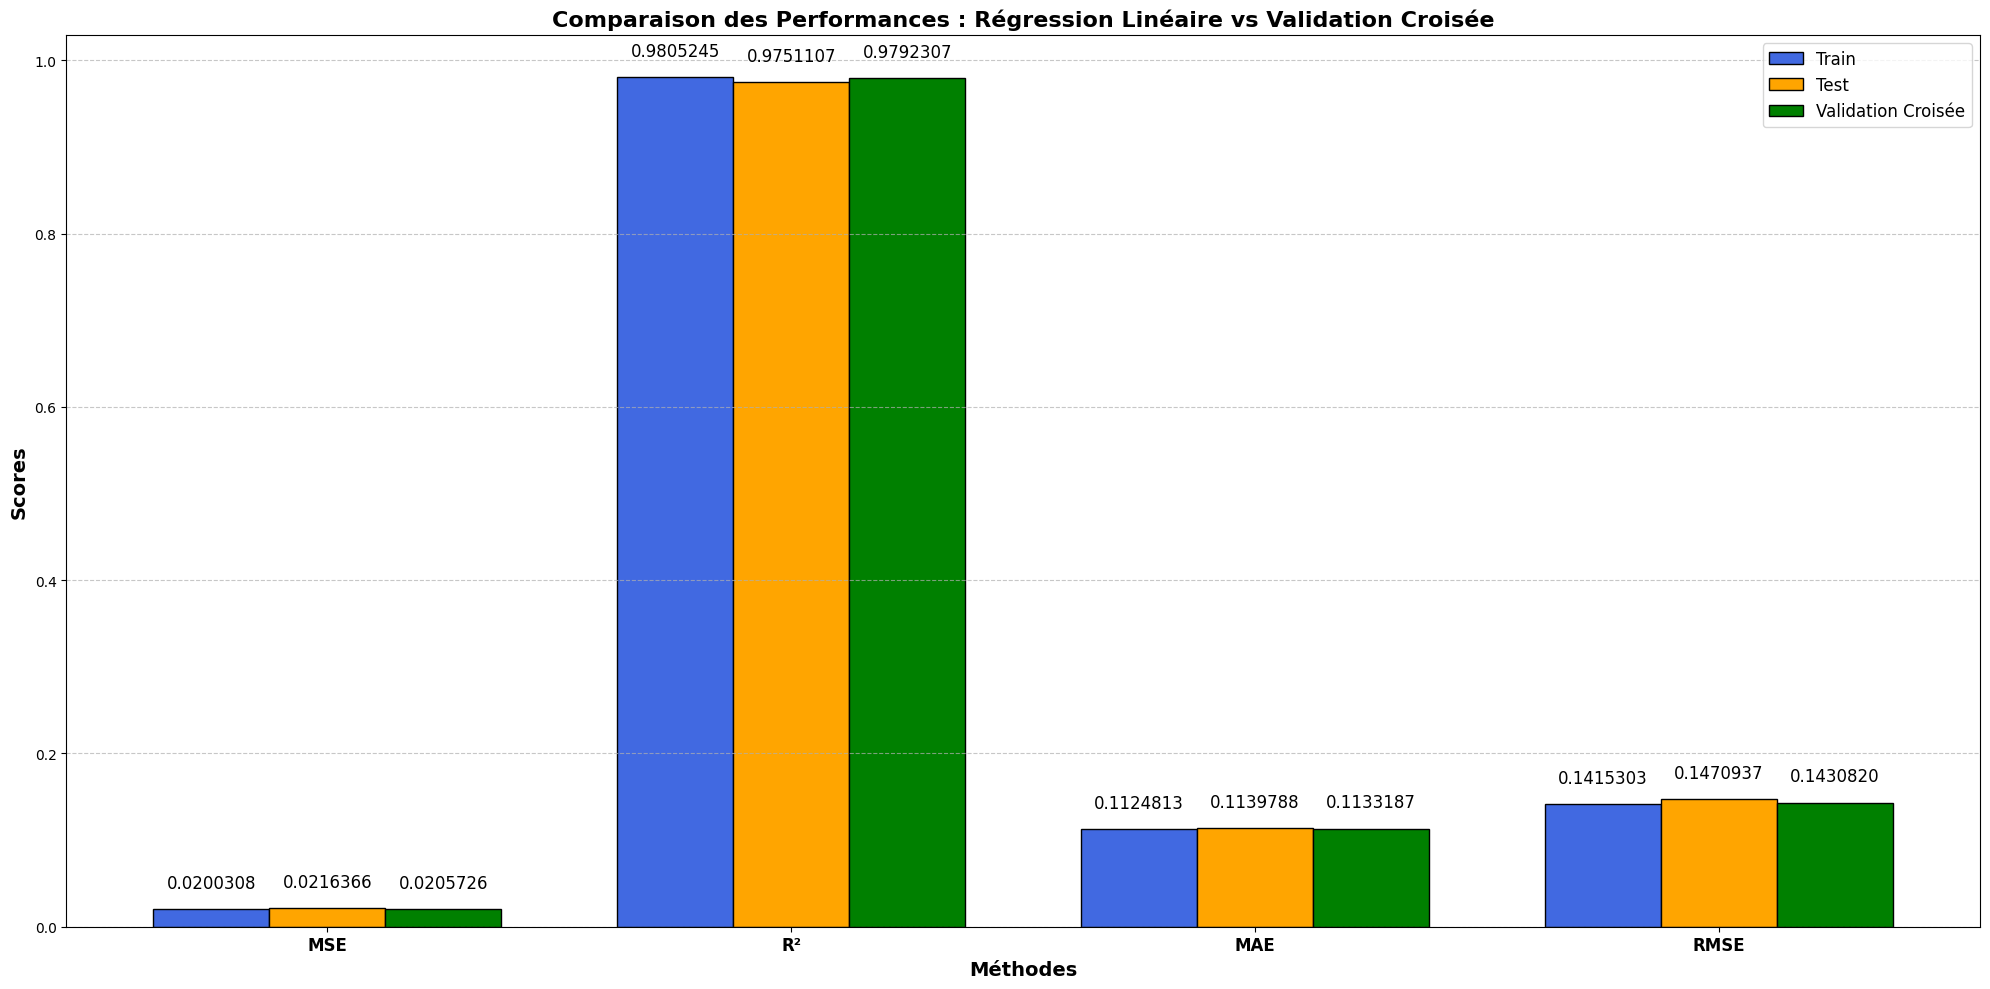

In [86]:
# Remplacer ces valeurs par celles que vous avez obtenues après calcul
metrics = ['MSE', 'R²', 'MAE', 'RMSE']
train_values = [mse_train_split, r2_train_split, mae_train_split, rmse_train_split]  # Résultats pour l'entraînement (Train)
test_values = [mse_test_split, r2_test_split, mae_test_split, rmse_test_split]  # Résultats pour le test (Test)

# Assurez-vous que mse_scores, r2_scores, mae_scores et rmse_scores contiennent des valeurs, pas des fonctions.
cv_values = [np.mean(mse_scores_lm), np.mean(r2_scores_lm), np.mean(mae_scores_lm), np.mean(rmse_scores_lm)]  # Résultats pour la validation croisée

# Positionnement des barres
x = np.arange(len(metrics))
width = 0.25  # Largeur des barres

# Création du graphique
fig, ax = plt.subplots(figsize=(20, 10))

# Barres pour la régression linéaire
bar_train = ax.bar(x - width, train_values, width, label='Train', color='royalblue', edgecolor='black')
bar_test = ax.bar(x, test_values, width, label='Test', color='orange', edgecolor='black')
bar_cv = ax.bar(x + width, cv_values, width, label='Validation Croisée', color='green', edgecolor='black')

# Ajouter des labels et des titres
ax.set_xlabel('Méthodes', fontsize=14, fontweight='bold')
ax.set_ylabel('Scores', fontsize=14, fontweight='bold')
ax.set_title('Comparaison des Performances : Régression Linéaire vs Validation Croisée', fontsize=16, fontweight='bold')

# Configurer les ticks et les étiquettes de l'axe x
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12, fontweight='bold')

# Ajouter une légende
ax.legend(fontsize=12)

# Ajouter une grille pour une meilleure lisibilité
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Afficher les valeurs au-dessus de chaque barre
for i in range(len(metrics)):
    ax.text(bar_train[i].get_x() + bar_train[i].get_width() / 2, bar_train[i].get_height() + 0.02,
            f'{train_values[i]:.7f}', ha='center', va='bottom', fontsize=12 )
    
    ax.text(bar_test[i].get_x() + bar_test[i].get_width() / 2, bar_test[i].get_height() + 0.02,
            f'{test_values[i]:.7f}', ha='center', va='bottom', fontsize=12)
    
    ax.text(bar_cv[i].get_x() + bar_cv[i].get_width() / 2, bar_cv[i].get_height() + 0.02,
            f'{cv_values[i]:.7f}', ha='center', va='bottom', fontsize=12)

# Afficher le graphique
plt.tight_layout()
plt.show()


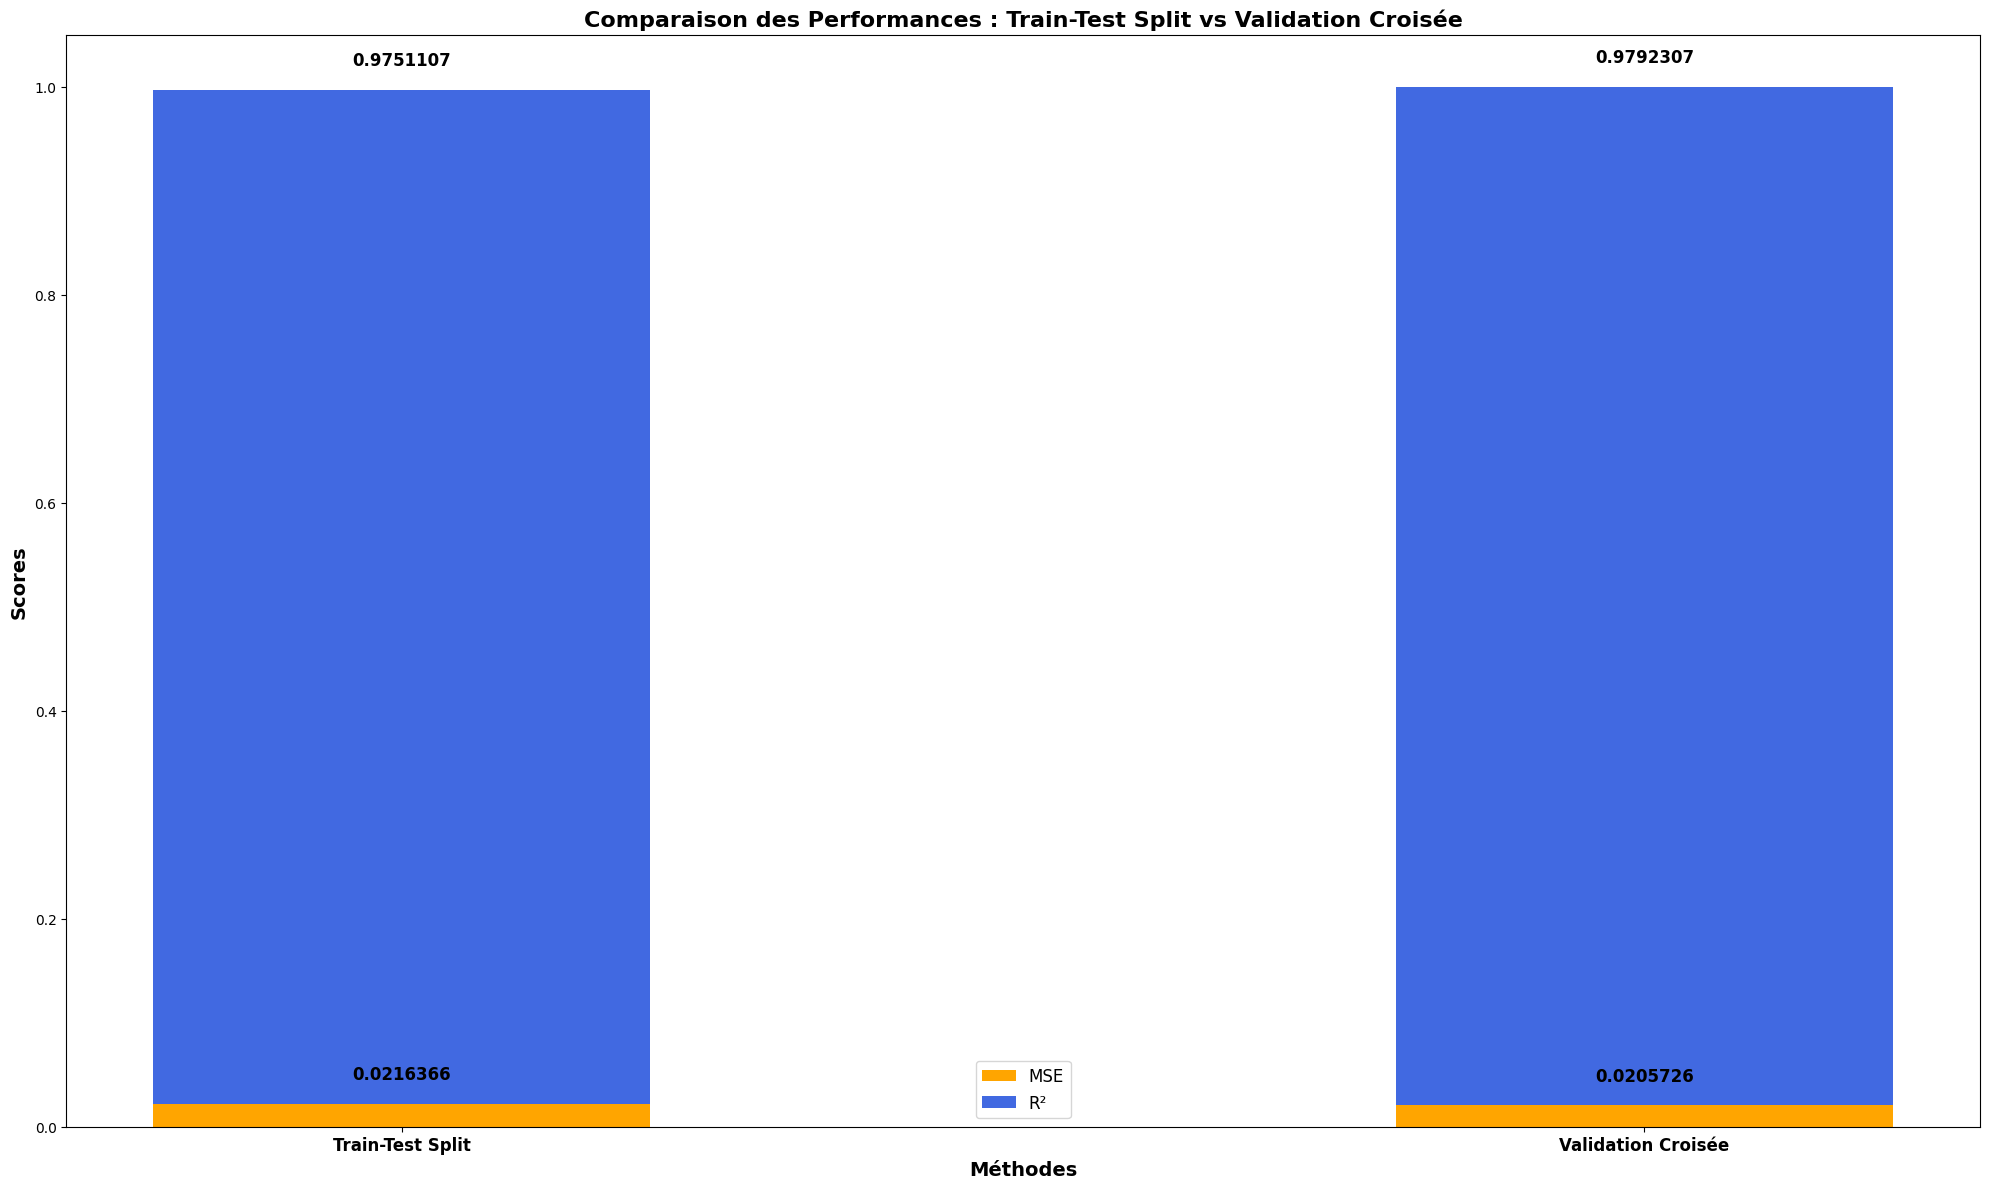

In [87]:


# Données pour chaque méthode
methods = ['Train-Test Split', 'Validation Croisée']
mse_values = [mse_test_split, np.mean(mse_scores_lm)]  # MSE moyen pour chaque méthode
r2_values = [r2_test_split, np.mean(r2_scores_lm)]  # R² moyen pour chaque méthode

# Création du graphique à barres empilées
fig, ax = plt.subplots(figsize=(20, 12))

bar_width = 0.4
index = np.arange(len(methods))

# Barres pour MSE et R²
bar_mse = ax.bar(index, mse_values, bar_width, label='MSE', color='orange')
bar_r2 = ax.bar(index, r2_values, bar_width, bottom=mse_values, label='R²', color='royalblue')

# Titres et labels
ax.set_xlabel('Méthodes', fontsize=14, fontweight='bold')
ax.set_ylabel('Scores', fontsize=14, fontweight='bold')
ax.set_title('Comparaison des Performances : Train-Test Split vs Validation Croisée', fontsize=16, fontweight='bold')
ax.set_xticks(index)
ax.set_xticklabels(methods, fontsize=12, fontweight='bold')

# Ajouter une légende
ax.legend(fontsize=12)

# Afficher les valeurs sur les barres
for i in range(len(mse_values)):
    ax.text(bar_mse[i].get_x() + bar_mse[i].get_width() / 2, bar_mse[i].get_height() + 0.02,
            f'{mse_values[i]:.7f}', ha='center', va='bottom', fontsize=12, fontweight='bold')
    ax.text(bar_r2[i].get_x() + bar_r2[i].get_width() / 2, bar_r2[i].get_height() + mse_values[i] + 0.02,
            f'{r2_values[i]:.7f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Afficher le graphique
plt.tight_layout()
plt.show()


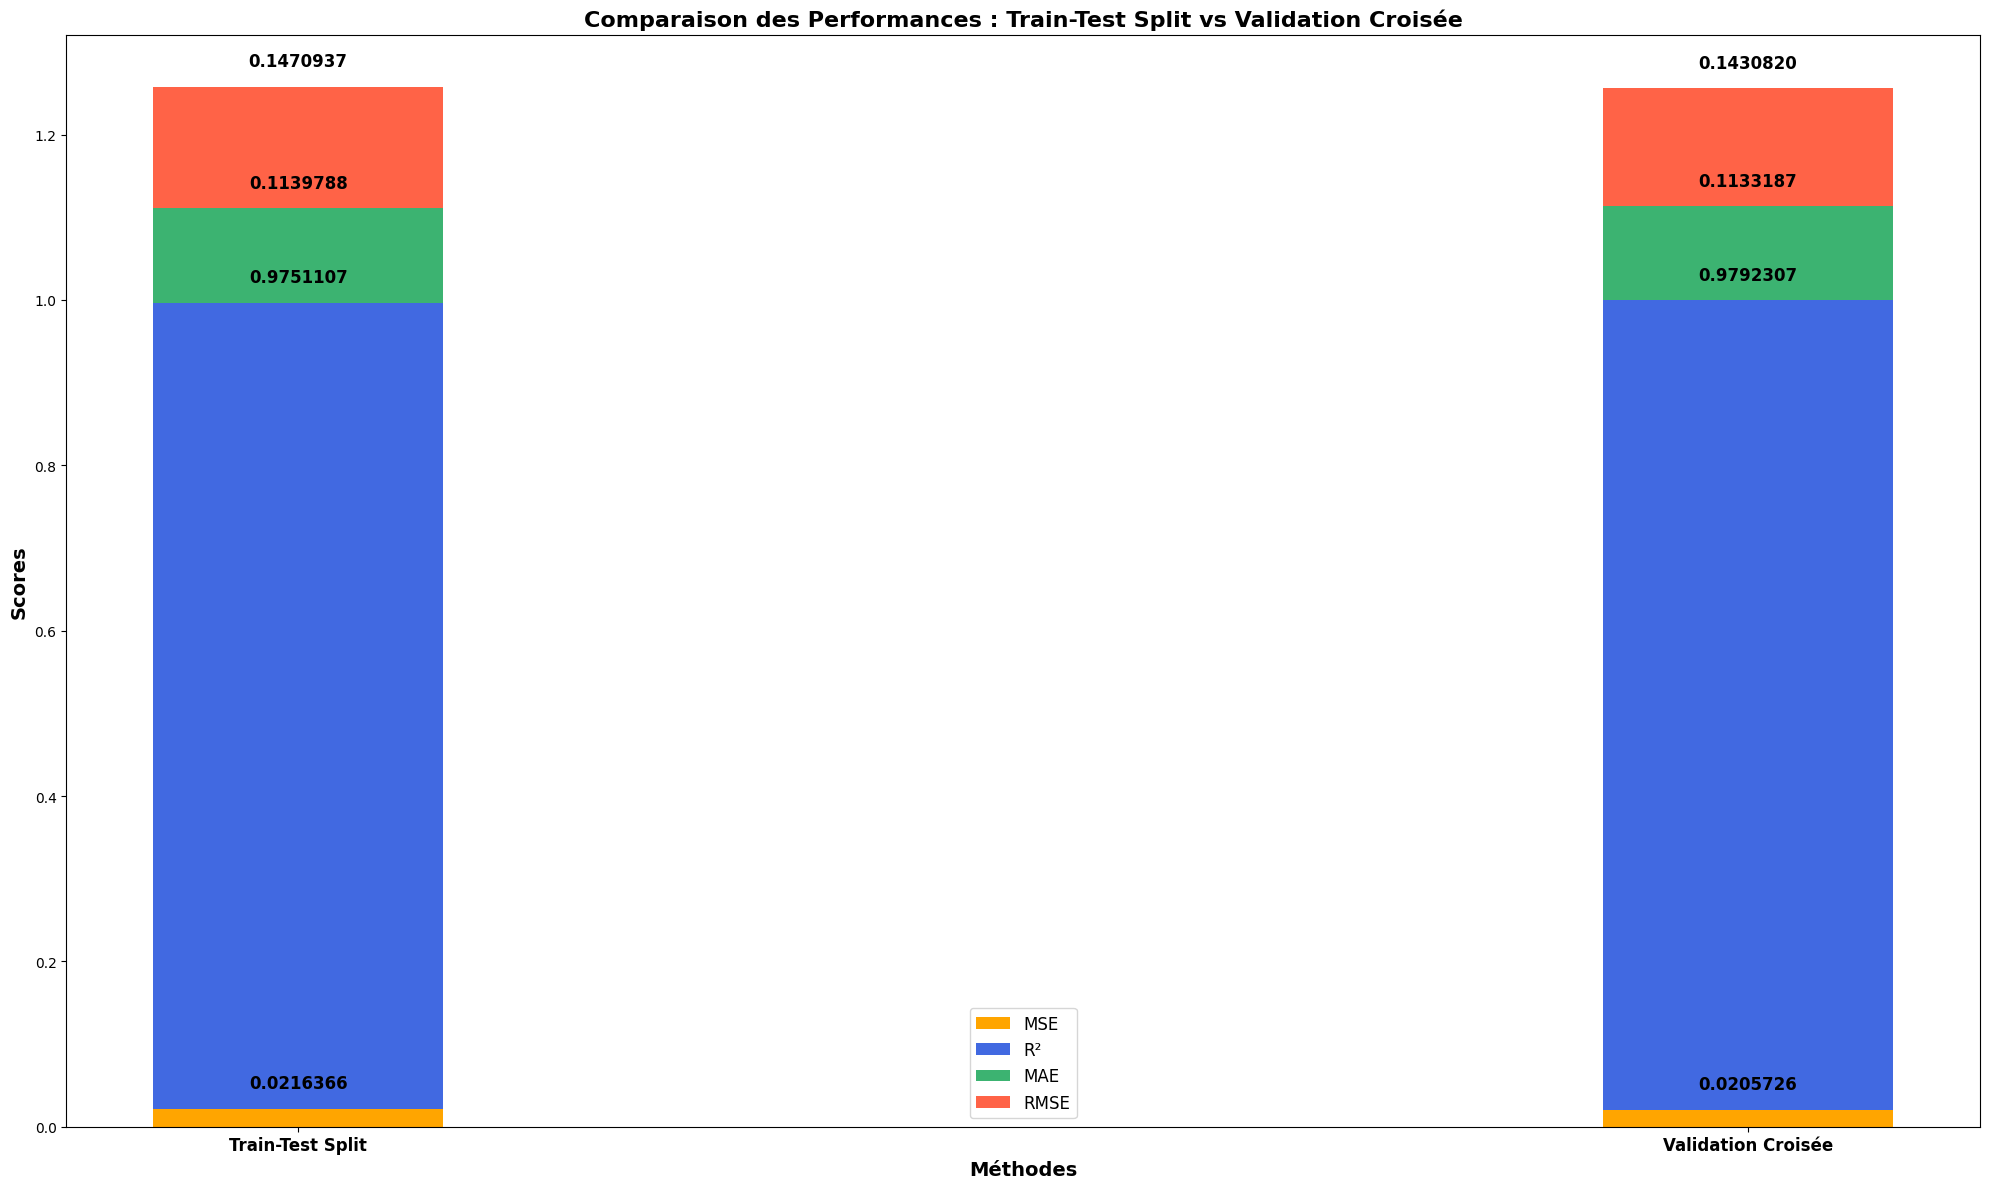

In [88]:
# Données pour chaque méthode
methods = ['Train-Test Split', 'Validation Croisée']
mse_values = [mse_test_split, np.mean(mse_scores_lm)]  # MSE moyen pour chaque méthode
r2_values = [r2_test_split, np.mean(r2_scores_lm)]  # R² moyen pour chaque méthode
mae_values = [mae_test_split, np.mean(mae_scores_lm)]  # MAE moyen pour chaque méthode
rmse_values = [rmse_test_split, np.mean(rmse_scores_lm)]  # RMSE moyen pour chaque méthode

# Création du graphique à barres empilées
fig, ax = plt.subplots(figsize=(20, 12))

bar_width = 0.2
index = np.arange(len(methods))

# Barres pour chaque métrique
bar_mse = ax.bar(index, mse_values, bar_width, label='MSE', color='orange')
bar_r2 = ax.bar(index, r2_values, bar_width, bottom=mse_values, label='R²', color='royalblue')
bar_mae = ax.bar(index, mae_values, bar_width, bottom=np.array(mse_values) + np.array(r2_values), label='MAE', color='mediumseagreen')
bar_rmse = ax.bar(index, rmse_values, bar_width, bottom=np.array(mse_values) + np.array(r2_values) + np.array(mae_values), label='RMSE', color='tomato')

# Titres et labels
ax.set_xlabel('Méthodes', fontsize=14, fontweight='bold')
ax.set_ylabel('Scores', fontsize=14, fontweight='bold')
ax.set_title('Comparaison des Performances : Train-Test Split vs Validation Croisée', fontsize=16, fontweight='bold')
ax.set_xticks(index)
ax.set_xticklabels(methods, fontsize=12, fontweight='bold')

# Ajouter une légende
ax.legend(fontsize=12)

# Afficher les valeurs sur les barres
for i in range(len(mse_values)):
    ax.text(bar_mse[i].get_x() + bar_mse[i].get_width() / 2, bar_mse[i].get_height() + 0.02,
            f'{mse_values[i]:.7f}', ha='center', va='bottom', fontsize=12, fontweight='bold')
    ax.text(bar_r2[i].get_x() + bar_r2[i].get_width() / 2, bar_r2[i].get_height() + mse_values[i] + 0.02,
            f'{r2_values[i]:.7f}', ha='center', va='bottom', fontsize=12, fontweight='bold')
    ax.text(bar_mae[i].get_x() + bar_mae[i].get_width() / 2, bar_mae[i].get_height() + np.array(mse_values)[i] + np.array(r2_values)[i] + 0.02,
            f'{mae_values[i]:.7f}', ha='center', va='bottom', fontsize=12, fontweight='bold')
    ax.text(bar_rmse[i].get_x() + bar_rmse[i].get_width() / 2, bar_rmse[i].get_height() + np.array(mse_values)[i] + np.array(r2_values)[i] + np.array(mae_values)[i] + 0.02,
            f'{rmse_values[i]:.7f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Afficher le graphique
plt.tight_layout()
plt.show()


après avoir comparé les performances de mes modèles à l'aide de la méthode traditionnelle de train-test split et de la validation croisée, j'ai observé que la validation croisée donnait de meilleurs résultats en termes de MSE, R², RMSE et MAE. 

Cette méthode étant plus robuste et offrant une estimation plus précise de la performance du modèle sur l'ensemble des données, j'ai donc choisi d'utiliser la validation croisée pour la suite de mon projet. Cette approche me permettra d'optimiser davantage mes modèles et d'améliorer la qualité des prédictions.

# Regression lineaire simple



In [89]:
# Diviser les données pour la régression linéaire simple
X_simple = df[['biking']].values  # Seule variable indépendante 'biking'
y = df['heart.disease'].values    # Variable cible

In [90]:
# Appliquer la validation croisée
mse_scores_simple, mse_mean_simple, r2_scores_simple, r2_mean_simple, \
mae_scores_simple, mae_mean_simple, rmse_scores_simple, rmse_mean_simple, \
beta_simple ,time_train_simple, time_test_simple, time_simple= cross_val_score_custom(X_simple, y, k=5)


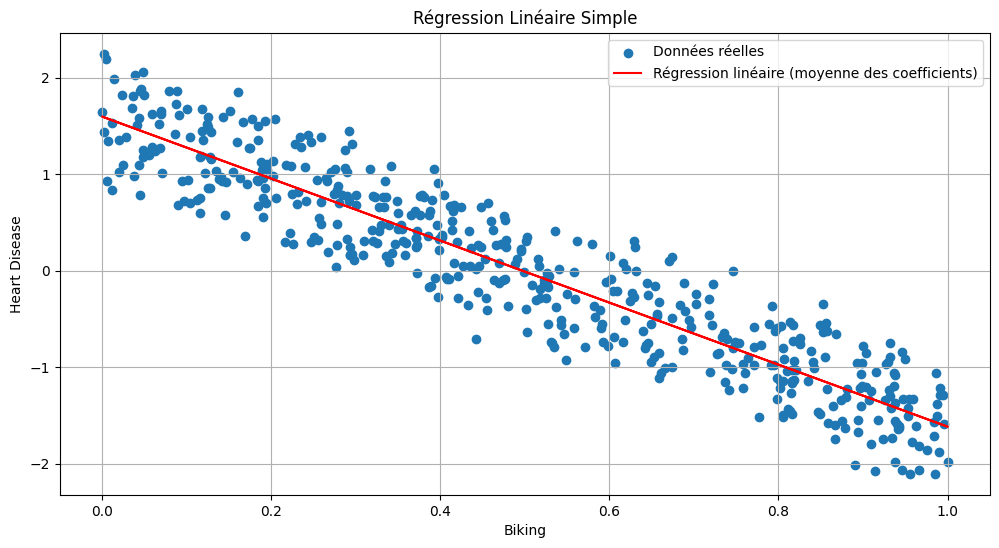

In [91]:
# Moyenne des coefficients
beta_mean = np.mean(beta_simple, axis=0)


# Tracer la droite de régression
plt.figure(figsize=(12, 6))
plt.scatter(df["biking"], df["heart.disease"], label="Données réelles")
plt.plot(df["biking"], predict(df["biking"].values.reshape(-1, 1), beta_mean), 
         color="red", label="Régression linéaire (moyenne des coefficients)")
plt.xlabel("Biking")
plt.ylabel("Heart Disease")
plt.title("Régression Linéaire Simple")
plt.legend()
plt.grid(True)
plt.show()


Ce graphique représente une régression linéaire simple. Voici une interprétation détaillée :

Axes du graphique :

L'axe des abscisses (x) est intitulé "Biking", probablement représentant une variable comme le temps ou l'intensité consacrés au vélo.
L'axe des ordonnées (y) est intitulé "Heart Disease", représentant une mesure liée à des maladies cardiaques (par exemple, un score de risque ou une fréquence).
Points bleus ("Données réelles") :

Les points bleus représentent des données réelles mesurées. Chaque point correspond à une observation reliant les valeurs de "Biking" et de "Heart Disease".
Une tendance décroissante est visible : plus les valeurs de "Biking" augmentent, plus les valeurs de "Heart Disease" diminuent.
Ligne rouge ("Régression linéaire") :

La ligne rouge correspond au modèle de régression linéaire, qui estime la relation entre les deux variables. Elle est calculée comme une moyenne des coefficients optimaux pour ajuster la ligne aux données.
La pente négative de la ligne montre une relation inverse : augmenter le temps ou l'intensité de l'activité de vélo est associé à une diminution du risque ou des symptômes liés à des maladies cardiaques.
Interprétation générale :

Le graphe illustre qu'il existe une corrélation négative entre le temps passé à faire du vélo et les maladies cardiaques, selon les données observées. Cela pourrait indiquer que le vélo a un effet bénéfique sur la santé cardiaque.

In [92]:

# Afficher les résultats
print("### Résultats pour la Régression Linéaire simple ###")
print("Scores MSE pour chaque pli : ", mse_scores_simple)
print("MSE moyen : ", mse_mean_simple)
print("Scores R² pour chaque pli : ", r2_scores_simple)
print("R² moyen : ", r2_mean_simple)
print("Scores MAE pour chaque pli : ", mae_scores_simple)
print("MAE moyen : ", mae_mean_simple)
print("Scores RMSE pour chaque pli : ", rmse_scores_simple)
print("RMSE moyen : ", rmse_mean_simple)


### Résultats pour la Régression Linéaire simple ###
Scores MSE pour chaque pli :  [0.120115368718652, 0.13581395895902865, 0.12285028418688933, 0.10942216340718822, 0.13826631670514683]
MSE moyen :  0.125293618395381
Scores R² pour chaque pli :  [0.8618267976380773, 0.8656220841545438, 0.883907084343142, 0.8951118490365824, 0.8610435291243775]
R² moyen :  0.8735022688593446
Scores MAE pour chaque pli :  [0.2873232778879068, 0.315315659415832, 0.28707829263633644, 0.28009399444110267, 0.3074418503883495]
MAE moyen :  0.2954506149539055
Scores RMSE pour chaque pli :  [0.34657664191149984, 0.3685294546695401, 0.3505000487687403, 0.33079021056734464, 0.37184178988535815]
RMSE moyen :  0.3536476291604966


Le modèle de régression linéaire simple a des performances satisfaisantes :

Le 
𝑅
2
moyen de 0.8735 montre que le modèle explique bien les variations dans les données.
Les faibles valeurs de MSE (0.1253), MAE (0.2955), et RMSE (0.3536) indiquent une erreur d'ajustement relativement faible.
Le modèle est donc efficace pour prédire les valeurs de "Heart Disease" en fonction de "Biking", confirmant la forte corrélation observée dans le graphe.

In [93]:
print('temps regression lineaire simple :')
print(f"Temps moyen d'entraînement : {time_train_simple:.4f} secondes")
print(f"Temps moyen de test : {time_test_simple:.4f} secondes")
print(f"Temps total de la validation croisée : {time_simple:.4f} secondes")

temps regression lineaire simple :
Temps moyen d'entraînement : 0.0002 secondes
Temps moyen de test : 0.0002 secondes
Temps total de la validation croisée : 0.0044 secondes


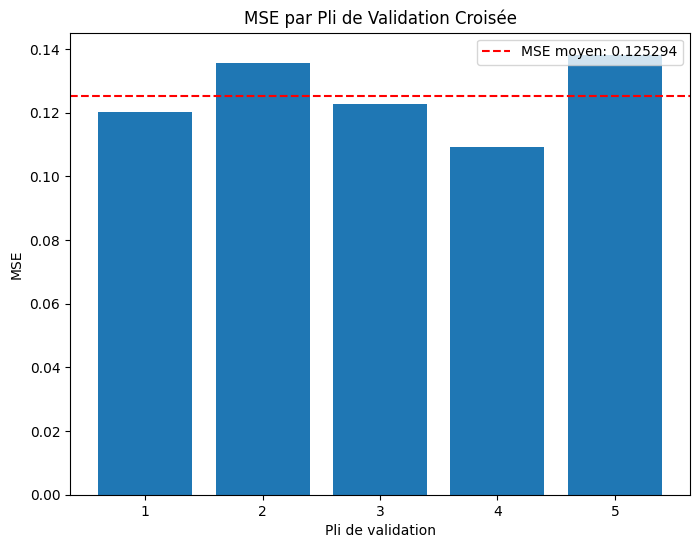

In [94]:
# Tracer les scores de MSE
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(mse_scores_simple) + 1), mse_scores_simple)  
plt.axhline(y=np.mean(mse_scores_simple), color='red', linestyle='--', label=f"MSE moyen: {np.mean(mse_scores_simple):.6f}")
plt.xlabel('Pli de validation')
plt.ylabel('MSE')
plt.title('MSE par Pli de Validation Croisée')
plt.legend()
plt.show()

Le graphique montre la MSE pour chaque pli de validation croisée, avec une MSE moyenne d'environ 0.1253 (ligne rouge pointillée). Les performances sont globalement cohérentes, bien que le pli 4 affiche la MSE la plus basse et les plis 2 et 5 les plus élevées.

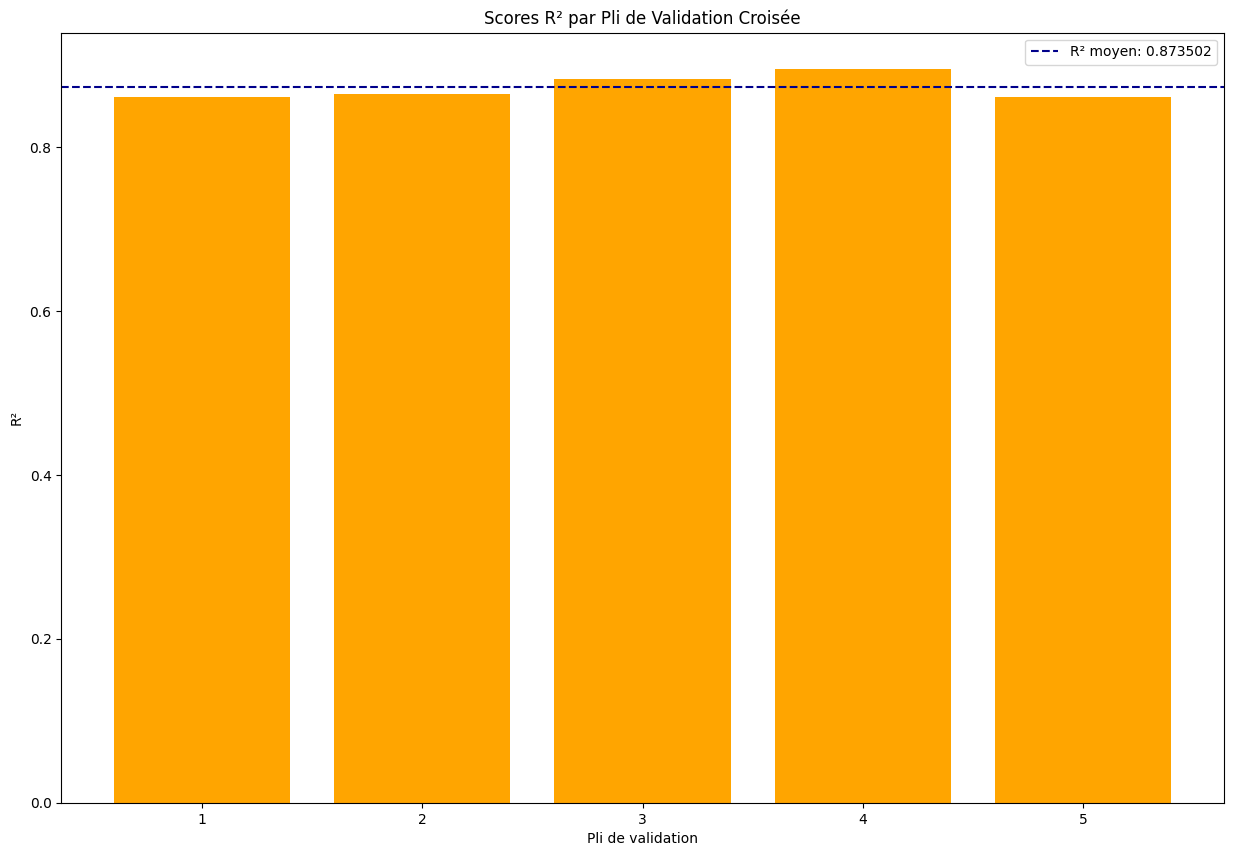

In [95]:
# Tracer les scores de R² pour chaque pli
plt.figure(figsize=(15, 10))
plt.bar(range(1, len(r2_scores_simple) + 1), r2_scores_simple,color='orange')  
plt.axhline(y=np.mean(r2_scores_simple), color='darkblue', linestyle='--', label=f"R² moyen: {np.mean(r2_scores_simple):.6f}")
plt.xlabel('Pli de validation')
plt.ylabel('R²')
plt.title('Scores R² par Pli de Validation Croisée')
plt.legend()
plt.show()


Le graphique montre des scores R² élevés et stables entre les plis, avec une moyenne de 0.8735, indiquant que le modèle explique bien la variance des données et offre des performances robustes.

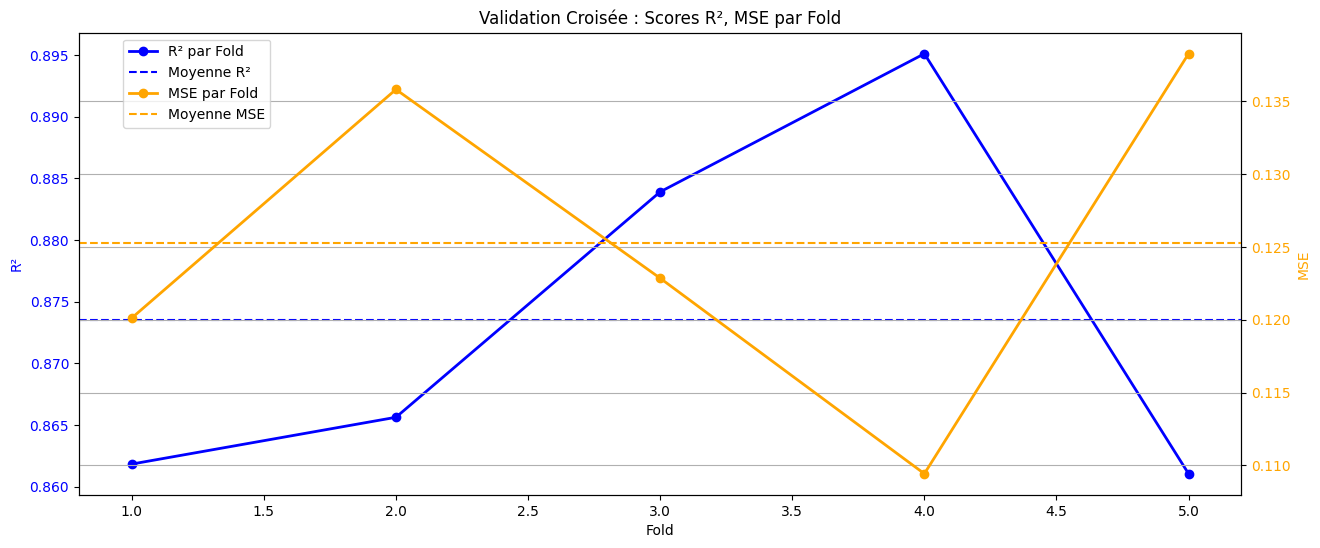

In [96]:
# Calcul des moyennes
mean_r2_simple = np.mean(r2_scores_simple)
mean_mse_simple = np.mean(mse_scores_simple)

# Création du graphique avec deux axes y
fig, ax1 = plt.subplots(figsize=(15, 6))

# Tracé des scores R² sur le premier axe y (ax1)
ax1.plot(range(1, len(r2_scores_simple) + 1), r2_scores_simple, marker='o', label='R² par Fold', color='blue', linewidth=2)
ax1.axhline(mean_r2_simple, color='blue', linestyle='--', label='Moyenne R²')
ax1.set_xlabel('Fold')
ax1.set_ylabel('R²', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Création du deuxième axe y (ax2) pour les scores MSE
ax2 = ax1.twinx()
ax2.plot(range(1, len(mse_scores_simple) + 1), mse_scores_simple, marker='o', label='MSE par Fold', color='orange', linewidth=2)
ax2.axhline(mean_mse_simple, color='orange', linestyle='--', label='Moyenne MSE')
ax2.set_ylabel('MSE', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Ajouter des légendes
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.88))

# Ajouter un titre et la grille
plt.title('Validation Croisée : Scores R², MSE par Fold')
plt.grid()

# Afficher le graphique
plt.show()

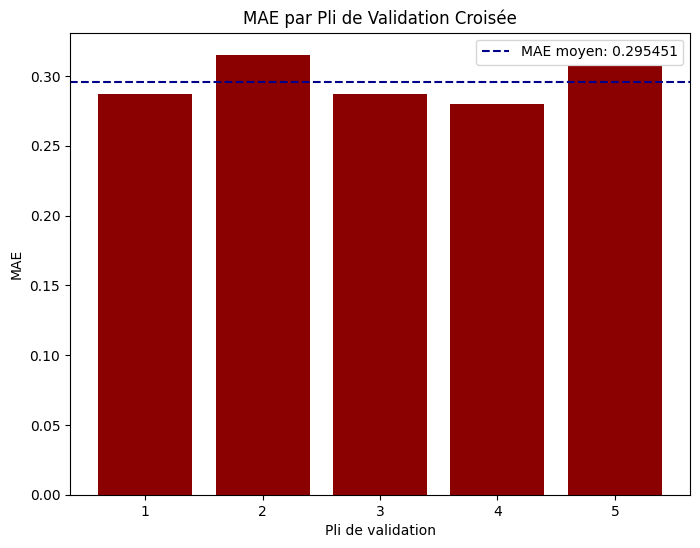

In [97]:
# Tracer les scores de MAE
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(mae_scores_simple) + 1), mae_scores_simple,color='darkred')  
plt.axhline(y=np.mean(mae_scores_simple), color='darkblue', linestyle='--', label=f"MAE moyen: {np.mean(mae_scores_simple):.6f}")
plt.xlabel('Pli de validation')
plt.ylabel('MAE')
plt.title('MAE par Pli de Validation Croisée')
plt.legend()
plt.show()


Le modèle montre des performances cohérentes avec un MAE moyen de 0.295, indiquant une bonne généralisation.

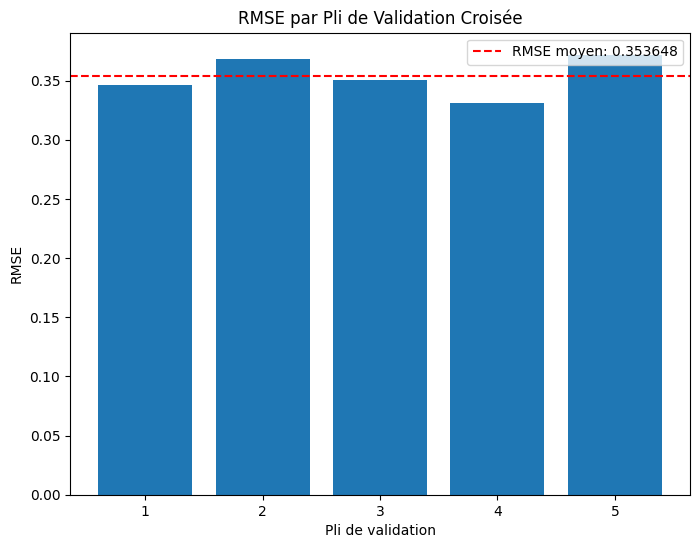

In [98]:
# Tracer les scores de RMSE
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(rmse_scores_simple) + 1), rmse_scores_simple)  
plt.axhline(y=np.mean(rmse_scores_simple), color='red', linestyle='--', label=f"RMSE moyen: {np.mean(rmse_scores_simple):.6f}")
plt.xlabel('Pli de validation')
plt.ylabel('RMSE')
plt.title('RMSE par Pli de Validation Croisée')
plt.legend()
plt.show()


Le modèle montre des performances cohérentes avec un RMSE moyen de 0.353648 indiquant une bonne généralisation.

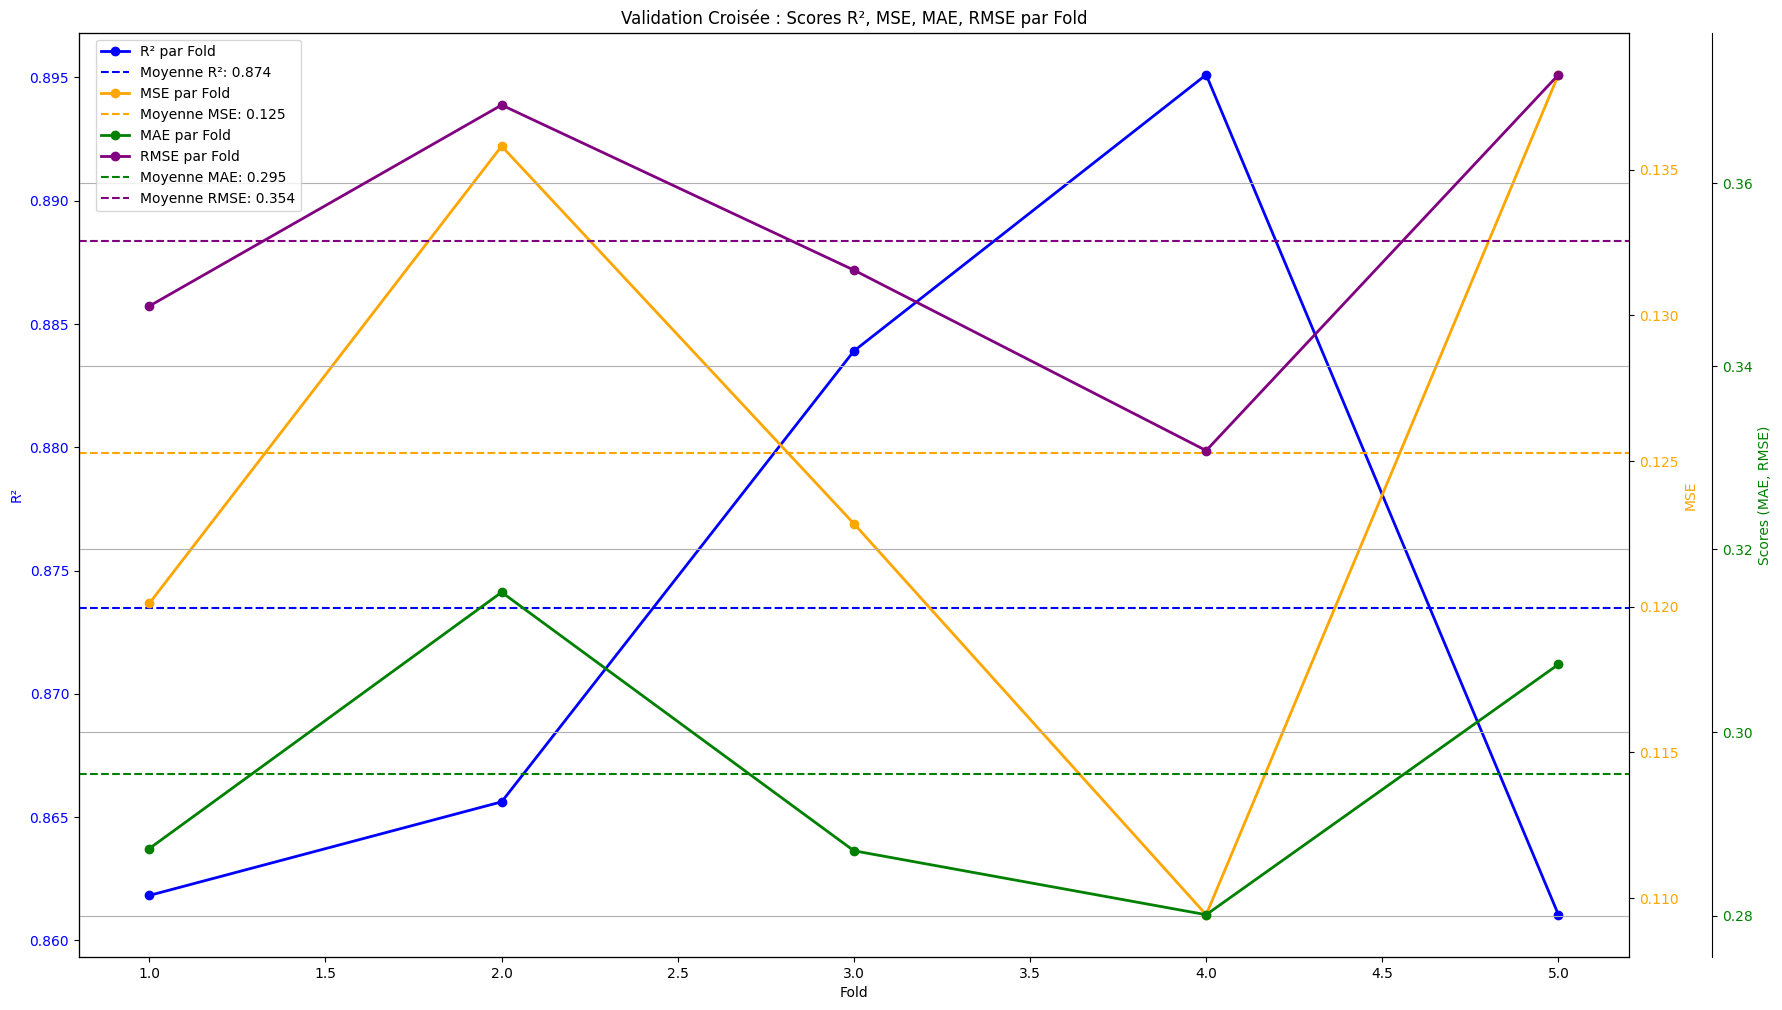

In [99]:
# Calcul des moyennes
mean_r2_simple = np.mean(r2_scores_simple)
mean_mse_simple = np.mean(mse_scores_simple)
mean_mae_simple = np.mean(mae_scores_simple)
mean_rmse_simple = np.mean(rmse_scores_simple)

# Création du graphique avec trois axes y
fig, ax1 = plt.subplots(figsize=(20, 12))

# Tracé des scores R² sur le premier axe y (ax1)
ax1.plot(range(1, len(r2_scores_simple) + 1), r2_scores_simple, marker='o', label='R² par Fold', color='blue', linewidth=2)
ax1.axhline(mean_r2_simple, color='blue', linestyle='--', label=f'Moyenne R²: {mean_r2_simple:.3f}')
ax1.set_xlabel('Fold')
ax1.set_ylabel('R²', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Création du deuxième axe y (ax2) pour les scores MSE
ax2 = ax1.twinx()
ax2.plot(range(1, len(mse_scores_simple) + 1), mse_scores_simple, marker='o', label='MSE par Fold', color='orange', linewidth=2)
ax2.axhline(mean_mse_simple, color='orange', linestyle='--', label=f'Moyenne MSE: {mean_mse_simple:.3f}')
ax2.set_ylabel('MSE', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Création du troisième axe y (ax3) pour les autres scores
ax3 = ax1.twinx()
# Décalage de l'axe pour éviter le chevauchement
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(range(1, len(mae_scores_simple) + 1), mae_scores_simple, marker='o', label='MAE par Fold', color='green', linewidth=2)
ax3.plot(range(1, len(rmse_scores_simple) + 1), rmse_scores_simple, marker='o', label='RMSE par Fold', color='purple', linewidth=2)

# Ajouter les lignes de moyenne
ax3.axhline(mean_mae_simple, color='green', linestyle='--', label=f'Moyenne MAE: {mean_mae_simple:.3f}')
ax3.axhline(mean_rmse_simple, color='purple', linestyle='--', label=f'Moyenne RMSE: {mean_rmse_simple:.3f}')

ax3.set_ylabel('Scores (MAE, RMSE)', color='green')
ax3.tick_params(axis='y', labelcolor='green')

# Ajouter des légendes
fig.legend(loc='upper left', bbox_to_anchor=(0.13, 0.88))

# Ajouter un titre et la grille
plt.title('Validation Croisée : Scores R², MSE, MAE, RMSE par Fold')
plt.grid()

# Afficher le graphique
plt.show()


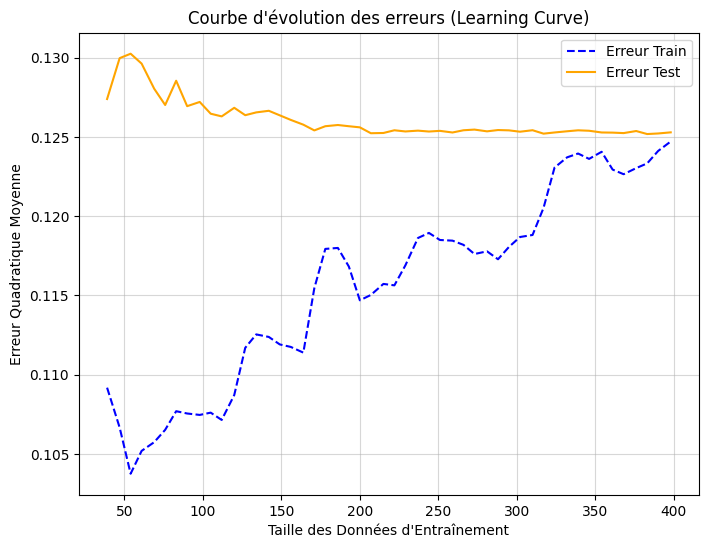

In [100]:
from sklearn.model_selection import learning_curve

from sklearn.metrics import make_scorer
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Créer un scorer personnalisé pour le MSE
mse_scorer = make_scorer(mean_squared_error_custom)

train_sizes, train_scores, test_scores = learning_curve(
    model, X_simple, y, cv=kf, scoring=mse_scorer, train_sizes=np.linspace(0.1, 1.0, 50)
)


train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Courbe d'évolution de l'erreur
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Erreur Train', color='blue', linestyle='--')
plt.plot(train_sizes, test_scores_mean, label='Erreur Test', color='orange', linestyle='-')
plt.title('Courbe d\'évolution des erreurs (Learning Curve)')
plt.xlabel('Taille des Données d\'Entraînement')
plt.ylabel('Erreur Quadratique Moyenne')
plt.legend()
plt.grid(alpha=0.5)
plt.show()


# entrainement du modèle avec  regression polynomiale

# Regression polynomiale simple 

Regression polynomiale degrée 2 

In [101]:

def regression_polynomiale_deg2(X, y):
    """
    Calcule les coefficients de la régression polynomiale de degré 2 et les valeurs prédites.
    
    Paramètres :
        X  : Variables indépendantes .
        y  : Variable dépendante .
        
    Retourne :
        coefficients  : Coefficients (a0, b0, c0) de l'équation y = a0*X^2 + b0*X + c0.
        y_pred : Valeurs prédites pour les données X.
    """
    # Calcul des sommes nécessaires
    Sx2 = np.sum(X**2)
    Sx = np.sum(X)
    Sx3 = np.sum(X**3)
    Sx4 = np.sum(X**4)
    Sxy = np.sum(X * y)
    Sx2y = np.sum(X**2 * y)
    
    # Construction de la matrice A et du vecteur B
    A = np.array([[Sx4, Sx3, Sx2],
                  [Sx3, Sx2, Sx],
                  [Sx2, Sx, len(X)]])
    
    B = np.array([Sx2y, Sxy, np.sum(y)])
    
    # Résolution du système d'équations pour obtenir les coefficients
    coefficients = np.linalg.solve(A, B)
    a0, b0, c0 = coefficients  # Décomposer les coefficients
    
    # Calcul des valeurs prédites
    y_pred = a0 * X**2 + b0 * X + c0
    
    return coefficients, y_pred




In [102]:

# Extraction des données
X_simple = df['biking'].values  # Variables indépendantes (vecteur 1D)
y = df['heart.disease'].values  # Variable dépendante (vecteur 1D)

# Application de la régression
coefficients, y_pred = regression_polynomiale_deg2(X_simple, y)
a0, b0, c0 = coefficients

# Affichage des résultats
print(f"Coefficients trouvés : a0 = {a0}, b0 = {b0}, c0 = {c0}")


Coefficients trouvés : a0 = 0.06489111622998944, b0 = -3.2791109502832625, c0 = 1.6080544532811558


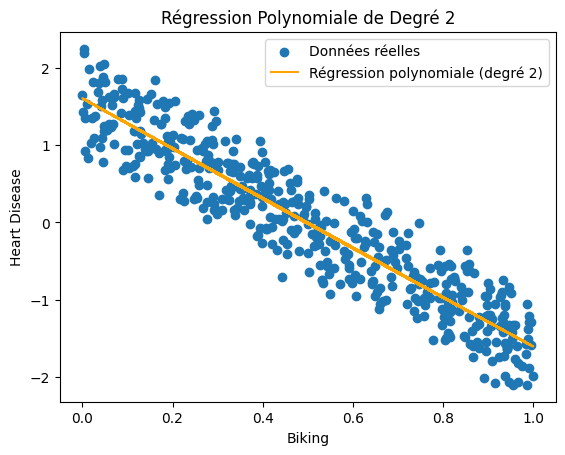

In [103]:

# Visualisation
plt.scatter(X_simple, y, label="Données réelles")
plt.plot(X_simple, y_pred, label="Régression polynomiale (degré 2)", color="orange")
plt.xlabel("Biking")
plt.ylabel("Heart Disease")
plt.legend()
plt.title("Régression Polynomiale de Degré 2")
plt.show()

In [104]:
# Calcul du MSE pour le degré 2
mse_degré2 = mean_squared_error_custom(y, y_pred)

# Calcul du R² pour le degré 2
r2_degré2 = r2_score_custom(y, y_pred)

# Calcul du MAE pour le degré 2
mae_degré2 = mean_absolute_error_custom(y, y_pred)

# Calcul du RMSE pour le degré 2
rmse_degré2 = np.sqrt(mse_degré2)

# Affichage des résultats
print("Régresion polynomiale simple degré 2")
print(f"Erreur quadratique moyenne (MSE) pour le degré 2 : {mse_degré2}")
print(f"Coefficient de détermination (R²) pour le degré 2 : {r2_degré2}")
print(f"Erreur absolue moyenne (MAE) pour le degré 2 : {mae_degré2}")
print(f"Erreur quadratique moyenne racine (RMSE) pour le degré 2 : {rmse_degré2}")


Régresion polynomiale simple degré 2
Erreur quadratique moyenne (MSE) pour le degré 2 : 0.12464857624428088
Coefficient de détermination (R²) pour le degré 2 : 0.8751006217914449
Erreur absolue moyenne (MAE) pour le degré 2 : 0.29448313188369046
Erreur quadratique moyenne racine (RMSE) pour le degré 2 : 0.35305605255296346


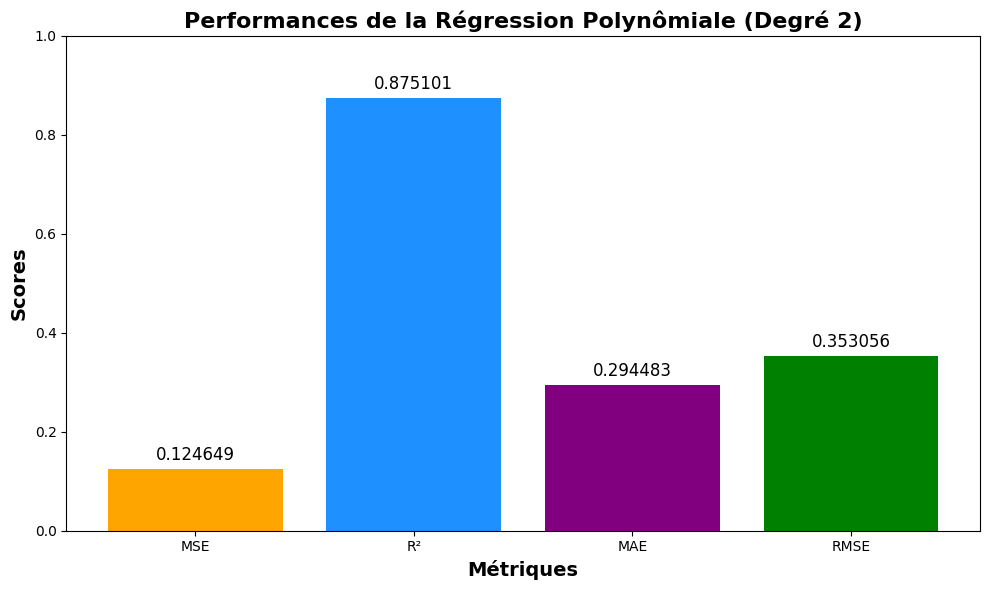

In [105]:


# Valeurs des métriques pour le degré 2
metrics = ['MSE', 'R²', 'MAE', 'RMSE']
values = [mse_degré2, r2_degré2, mae_degré2, rmse_degré2]

# Configuration du graphique
fig, ax = plt.subplots(figsize=(10, 6))

# Création du graphique à barres
ax.bar(metrics, values, color=['orange', 'dodgerblue', 'purple', 'green'])

# Titres et labels
ax.set_xlabel('Métriques', fontsize=14, fontweight='bold')
ax.set_ylabel('Scores', fontsize=14, fontweight='bold')
ax.set_title('Performances de la Régression Polynômiale (Degré 2)', fontsize=16, fontweight='bold')
plt.ylim(0, 1)
# Ajouter les valeurs sur les barres
for i, value in enumerate(values):
    ax.text(i, value + 0.01, f'{value:.6f}', ha='center', va='bottom', fontsize=12)

# Affichage du graphique
plt.tight_layout()
plt.show()


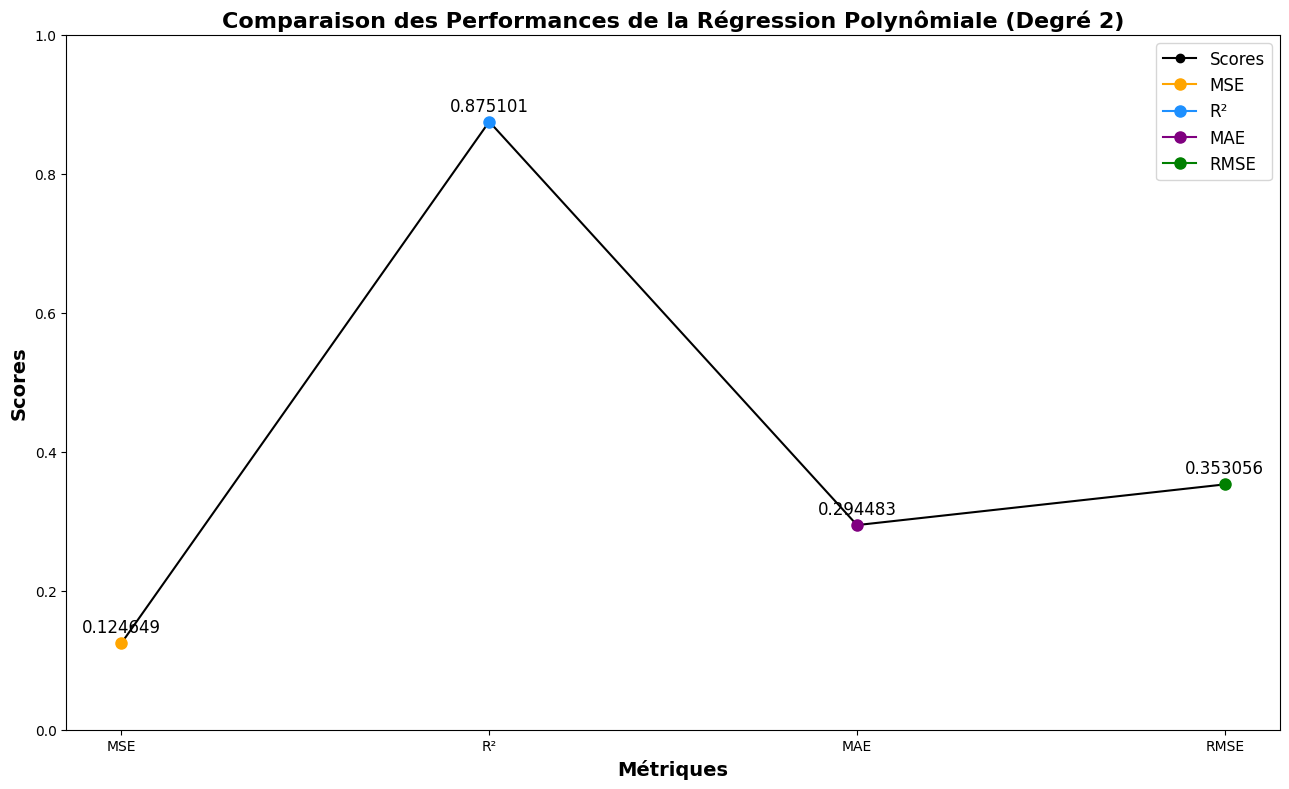

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Valeurs des métriques pour le degré 2
metrics = ['MSE', 'R²', 'MAE', 'RMSE']
values = [mse_degré2, r2_degré2, mae_degré2, rmse_degré2]

# Liste des couleurs pour chaque point
colors = ['orange', 'dodgerblue', 'purple', 'green']

# Configuration du graphique
fig, ax = plt.subplots(figsize=(13, 8))

# Tracer la ligne qui relie tous les points
ax.plot(metrics, values, marker='o', linestyle='-', color='black', label='Scores')

# Tracer chaque point avec des couleurs différentes
for i in range(len(metrics)):
    ax.plot(metrics[i], values[i], marker='o', markersize=8, color=colors[i], label=f'{metrics[i]}')

# Ajouter les valeurs sur le graphique
for i, value in enumerate(values):
    ax.text(i, value + 0.01, f'{value:.6f}', ha='center', va='bottom', fontsize=12)

# Titres et labels
ax.set_xlabel('Métriques', fontsize=14, fontweight='bold')
ax.set_ylabel('Scores', fontsize=14, fontweight='bold')
ax.set_title('Comparaison des Performances de la Régression Polynômiale (Degré 2)', fontsize=16, fontweight='bold')
plt.ylim(0, 1)

# Ajouter une légende
ax.legend(fontsize=12)

# Affichage du graphique
plt.tight_layout()
plt.show()


Régression polynomiale de tous les degrés 

La fonction polynomial_regression_simple applique la régression polynomiale en transformant 
𝑋 ,
X en puissances, calcule les coefficients via les moindres carrés, et génère les prédictions correspondantes.

In [107]:
def polynomial_regression_simple(X, y, degree):
    # Ajouter une colonne de 1 pour l'interception
    X_poly = np.vander(X.flatten(), degree + 1, increasing=True)
    
    # Résolution de l'équation normale pour obtenir les coefficients
    theta = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
    
    # Prédictions
    y_pred = X_poly @ theta
    
    return theta, y_pred

In [108]:
X_simple = df[['biking']].values  # Independent variable
y = df['heart.disease'].values  # Dependent variable

degrees = range(1, 16)
mse_polys, r2_polys, mae_polys, rmse_polys, theta_polys = [], [], [], [], []

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for degree in degrees:
    fold_mse, fold_r2, fold_mae, fold_rmse = [], [], [], []

    for train_idx, val_idx in kf.split(X_simple):
        X_train, X_val = X_simple[train_idx], X_simple[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        theta, y_pred_train = polynomial_regression_simple(X_train, y_train, degree)

        # Ensure prediction only for the validation set
        X_val_poly = np.vander(X_val.flatten(), degree + 1, increasing=True)
        y_pred_val = X_val_poly @ theta

        mse = mean_squared_error_custom(y_val, y_pred_val)
        r2 = r2_score_custom(y_val, y_pred_val)
        mae = mean_absolute_error_custom(y_val, y_pred_val)
        rmse = np.sqrt(mse)

       
        fold_mse.append(mse)
        fold_r2.append(r2)
        fold_mae.append(mae)
        fold_rmse.append(rmse)

 
    mse_polys.append(np.mean(fold_mse))
    r2_polys.append(np.mean(fold_r2))
    mae_polys.append(np.mean(fold_mae))
    rmse_polys.append(np.mean(fold_rmse))

results_df = pd.DataFrame({
    'Degree': degrees,
    'MSE': mse_polys,
    'R²': r2_polys,
    'MAE': mae_polys,
    'RMSE': rmse_polys
})


results_df


Degree       MSE        R²       MAE      RMSE
0        1  0.125294  0.873502  0.295451  0.353648
1        2  0.125340  0.873453  0.295628  0.353709
2        3  0.125603  0.873191  0.296034  0.354084
3        4  0.125578  0.873230  0.296775  0.354030
4        5  0.127181  0.871654  0.297961  0.356273
5        6  0.127509  0.871356  0.298691  0.356749
6        7  0.127820  0.871063  0.298871  0.357182
7        8  0.128371  0.870535  0.299475  0.357972
8        9  0.129083  0.869834  0.300473  0.358978
9       10  0.129024  0.869875  0.300571  0.358898
10      11  0.129920  0.869023  0.300262  0.360140
11      12  0.194463  0.803991  0.345219  0.427198
12      13  0.165366  0.832719  0.331397  0.402612
13      14  0.155309  0.843826  0.319194  0.391897
14      15  0.142869  0.856056  0.312745  0.377812

In [109]:
# Trouver les valeurs minimales de MSE, MAE et RMSE, ainsi que les valeurs maximales de R²
min_mse_simple = results_df['MSE'].min()
min_mse_degree = results_df['Degree'][results_df['MSE'] == min_mse_simple].iloc[0]

min_mae_simple = results_df['MAE'].min()
min_mae_degree = results_df['Degree'][results_df['MAE'] == min_mae_simple].iloc[0]

min_rmse_simple = results_df['RMSE'].min()
min_rmse_degree = results_df['Degree'][results_df['RMSE'] == min_rmse_simple].iloc[0]

max_r2_simple = results_df['R²'].max()
max_r2_degree = results_df['Degree'][results_df['R²'] == max_r2_simple].iloc[0]

# Afficher les lignes correspondantes aux valeurs minimales et maximales
print(f"Valeur minimale de MSE: {min_mse_simple} au Degré {min_mse_degree}")
print(f"Valeur minimale de MAE: {min_mae_simple} au Degré {min_mae_degree}")
print(f"Valeur minimale de RMSE: {min_rmse_simple} au Degré {min_rmse_degree}")
print(f"Valeur maximale de R²: {max_r2_simple} au Degré {max_r2_degree}")


Valeur minimale de MSE: 0.125293618395381 au Degré 1
Valeur minimale de MAE: 0.2954506149539055 au Degré 1
Valeur minimale de RMSE: 0.3536476291604966 au Degré 1
Valeur maximale de R²: 0.8735022688593446 au Degré 1


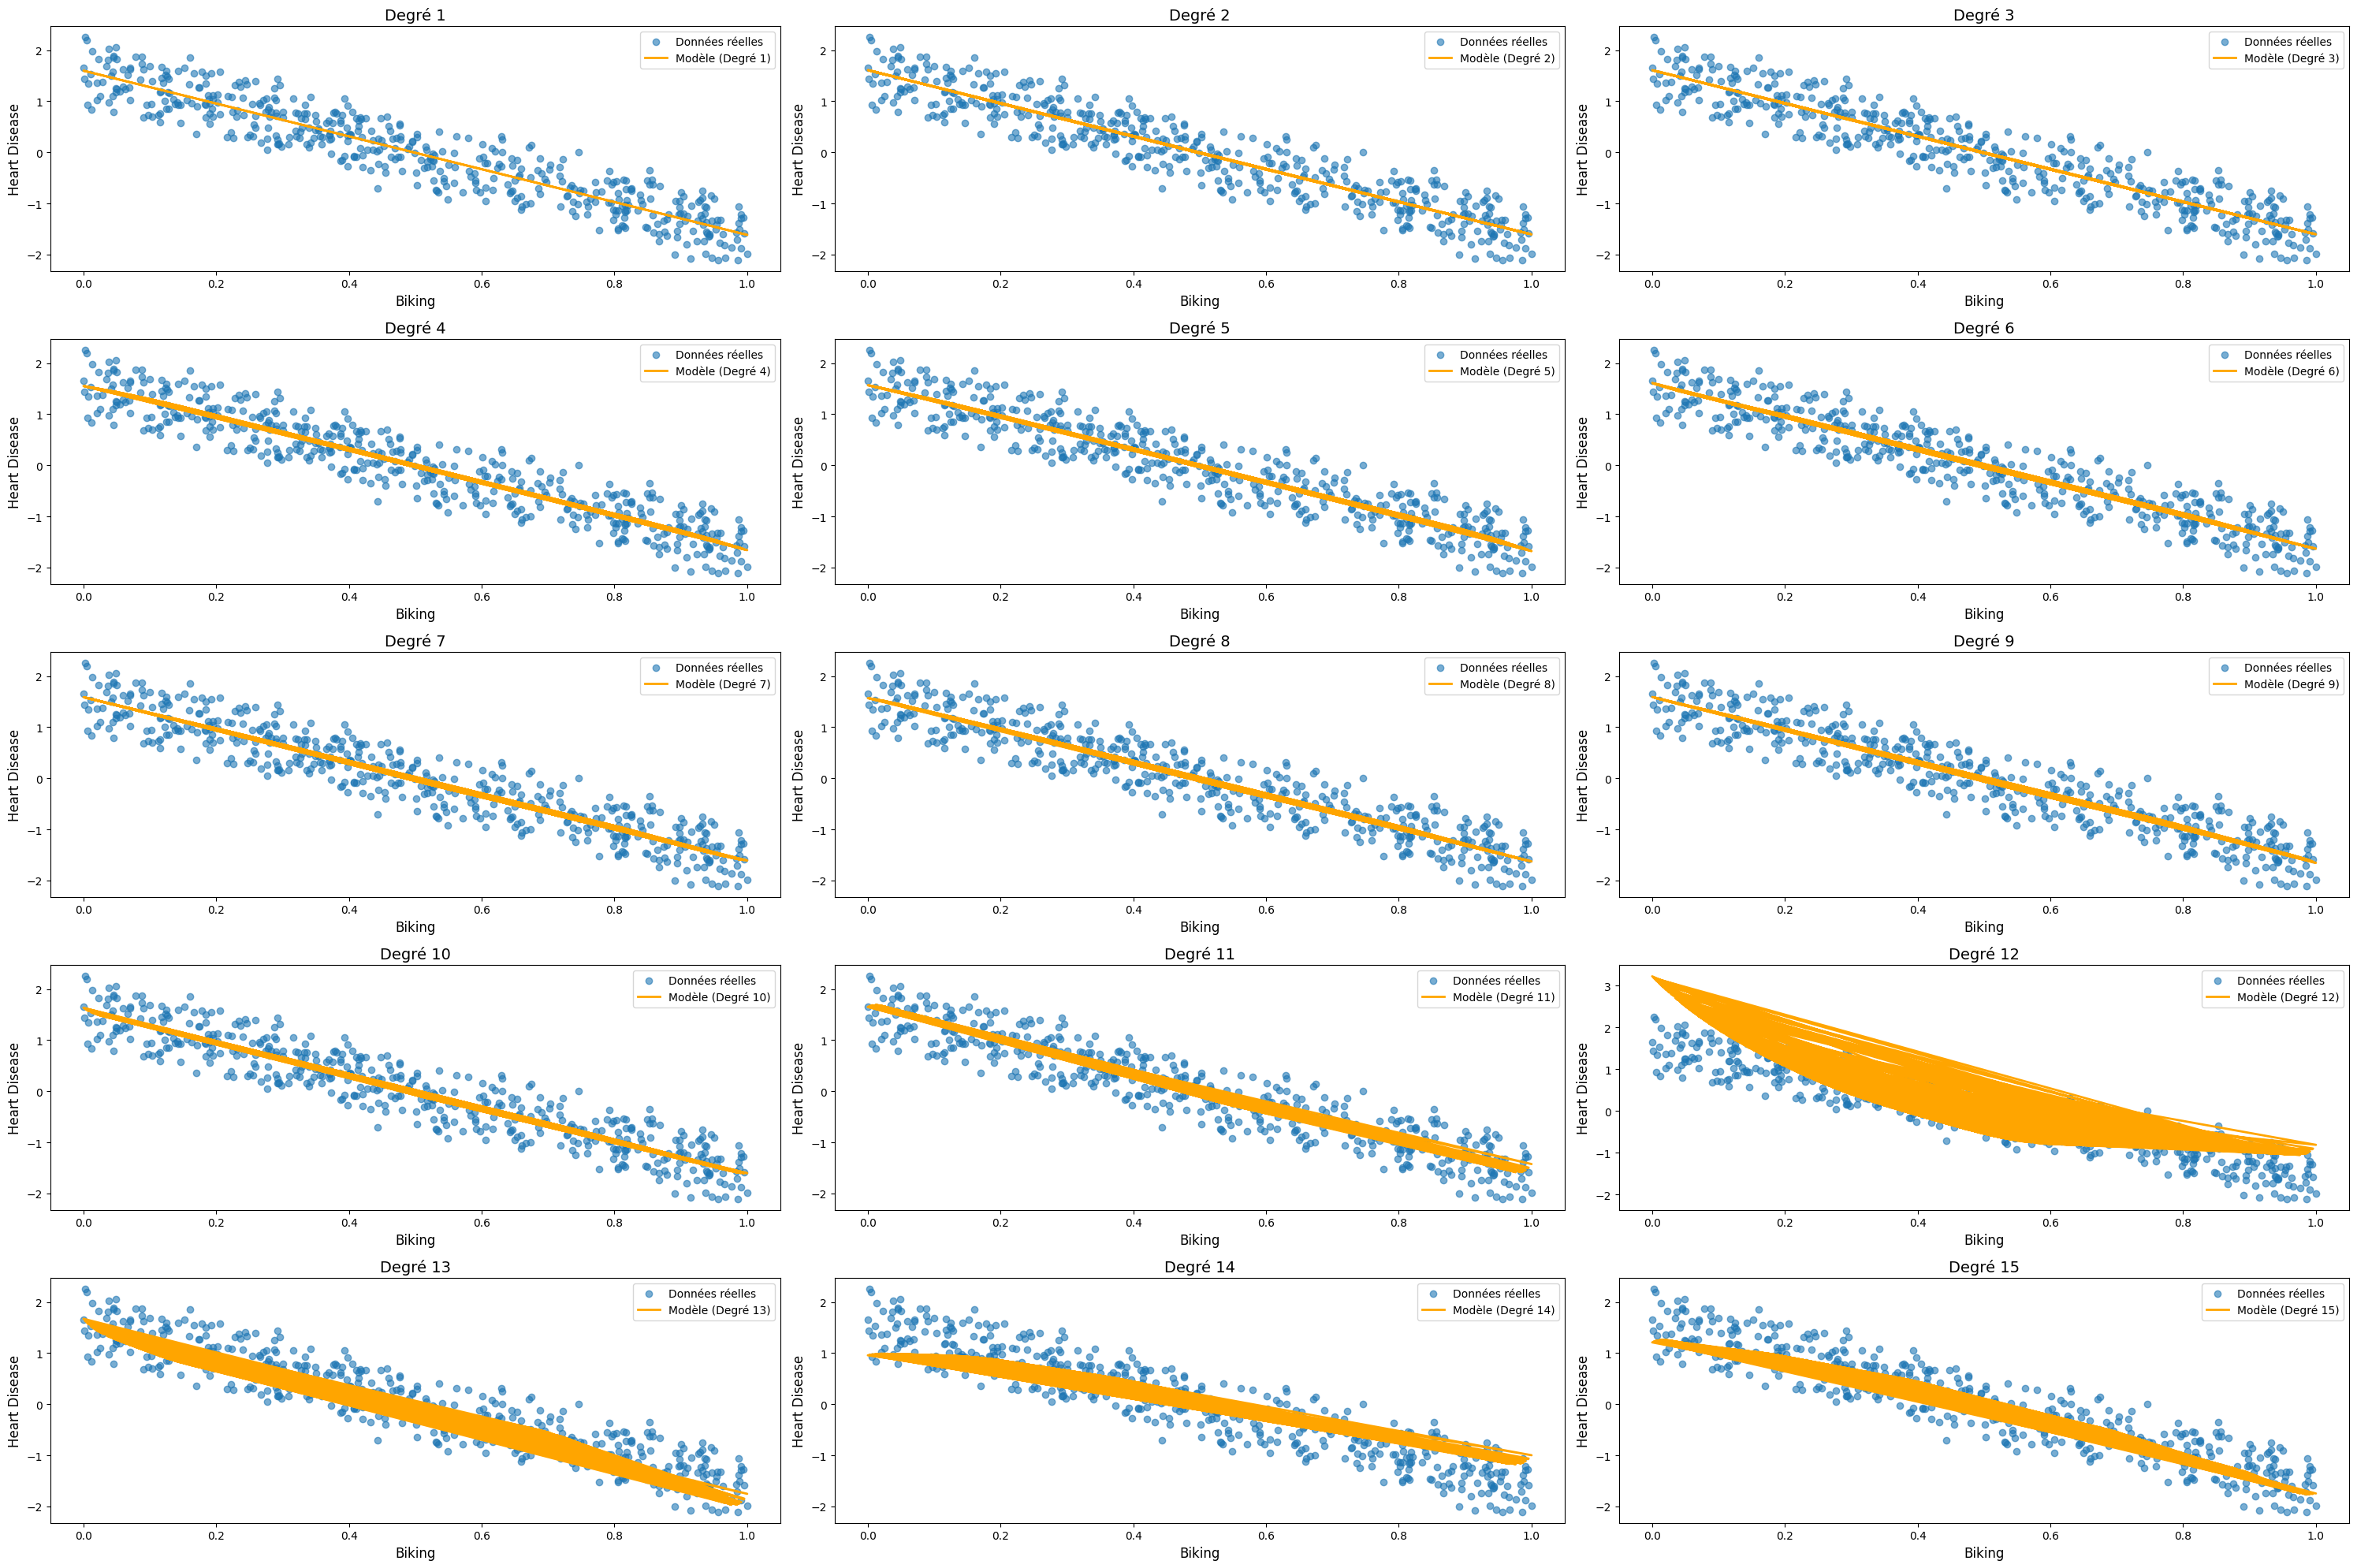

In [110]:
# Configuration des sous-graphes : 5 lignes, 3 colonnes
fig, axes = plt.subplots(5, 3, figsize=(30, 20))
axes = axes.ravel()  # Applatir les axes en une liste pour itérer plus facilement

# Régression pour les degrés de 1 à 15
for degree in range(1, 16):  # Début de la boucle à 1 pour les degrés 1 à 15
    # Calcul du modèle polynômial
    theta, y_pred = polynomial_regression_simple(X_simple, y, degree)
    
    # Affichage dans le subplot correspondant
    ax = axes[degree - 1]
    ax.scatter(X_simple, y, label='Données réelles', alpha=0.6)
    ax.plot(X_simple, y_pred, color='orange', label=f'Modèle (Degré {degree})', linewidth=2)
    ax.set_title(f"Degré {degree}", fontsize=14)
    ax.set_xlabel("Biking", fontsize=12)
    ax.set_ylabel("Heart Disease", fontsize=12)
    ax.legend()

# Ajustement des espaces entre les subplots
plt.tight_layout()

# Affichage du graphique
plt.show()


Les faibles degrés capturent bien la tendance, tandis que les degrés élevés surajustent les données. Un degré optimal est 1.

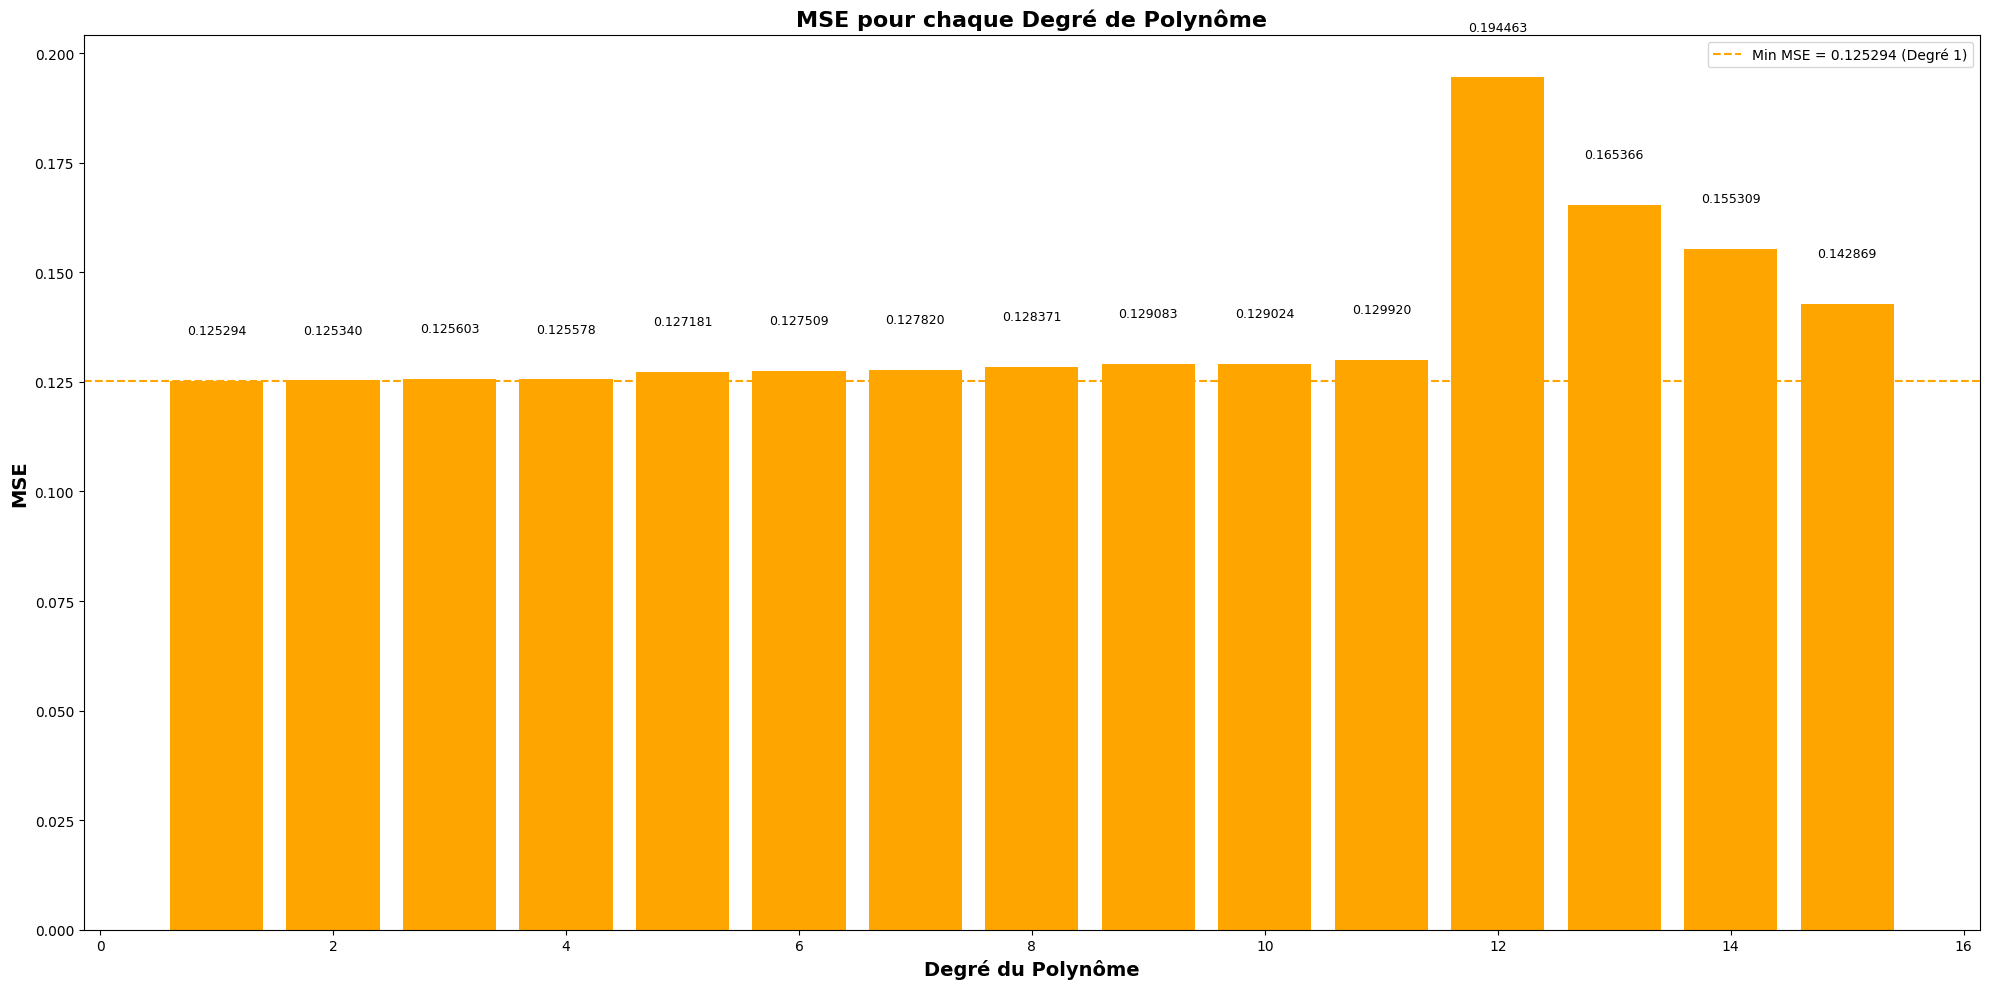

In [111]:


degrees = list(range(1, 16))
# Configuration du graphique pour MSE
fig, ax = plt.subplots(figsize=(20, 10))

# Barres pour MSE
ax.bar(degrees, mse_polys, color='orange')

# Titres et labels
ax.set_xlabel('Degré du Polynôme', fontsize=14, fontweight='bold')
ax.set_ylabel('MSE', fontsize=14, fontweight='bold')
ax.set_title('MSE pour chaque Degré de Polynôme', fontsize=16, fontweight='bold')

# Ajouter les valeurs sur les barres verticalement
for i in range(len(degrees)):
    ax.text(degrees[i], mse_polys[i] + 0.01, f'{mse_polys[i]:.6f}', ha='center', va='bottom', fontsize=9)

# Tracer la ligne pour la valeur minimale de MSE
min_mse = np.min(mse_polys)
min_mse_degree = degrees[np.argmin(mse_polys)]
ax.axhline(y=min_mse, color='orange', linestyle='--', label=f'Min MSE = {min_mse:.6f} (Degré {min_mse_degree})')

# Ajouter la légende
ax.legend(fontsize=10)

# Ajuster la mise en page pour éviter que le texte ne se chevauche
plt.tight_layout()

# Afficher le graphique
plt.show()


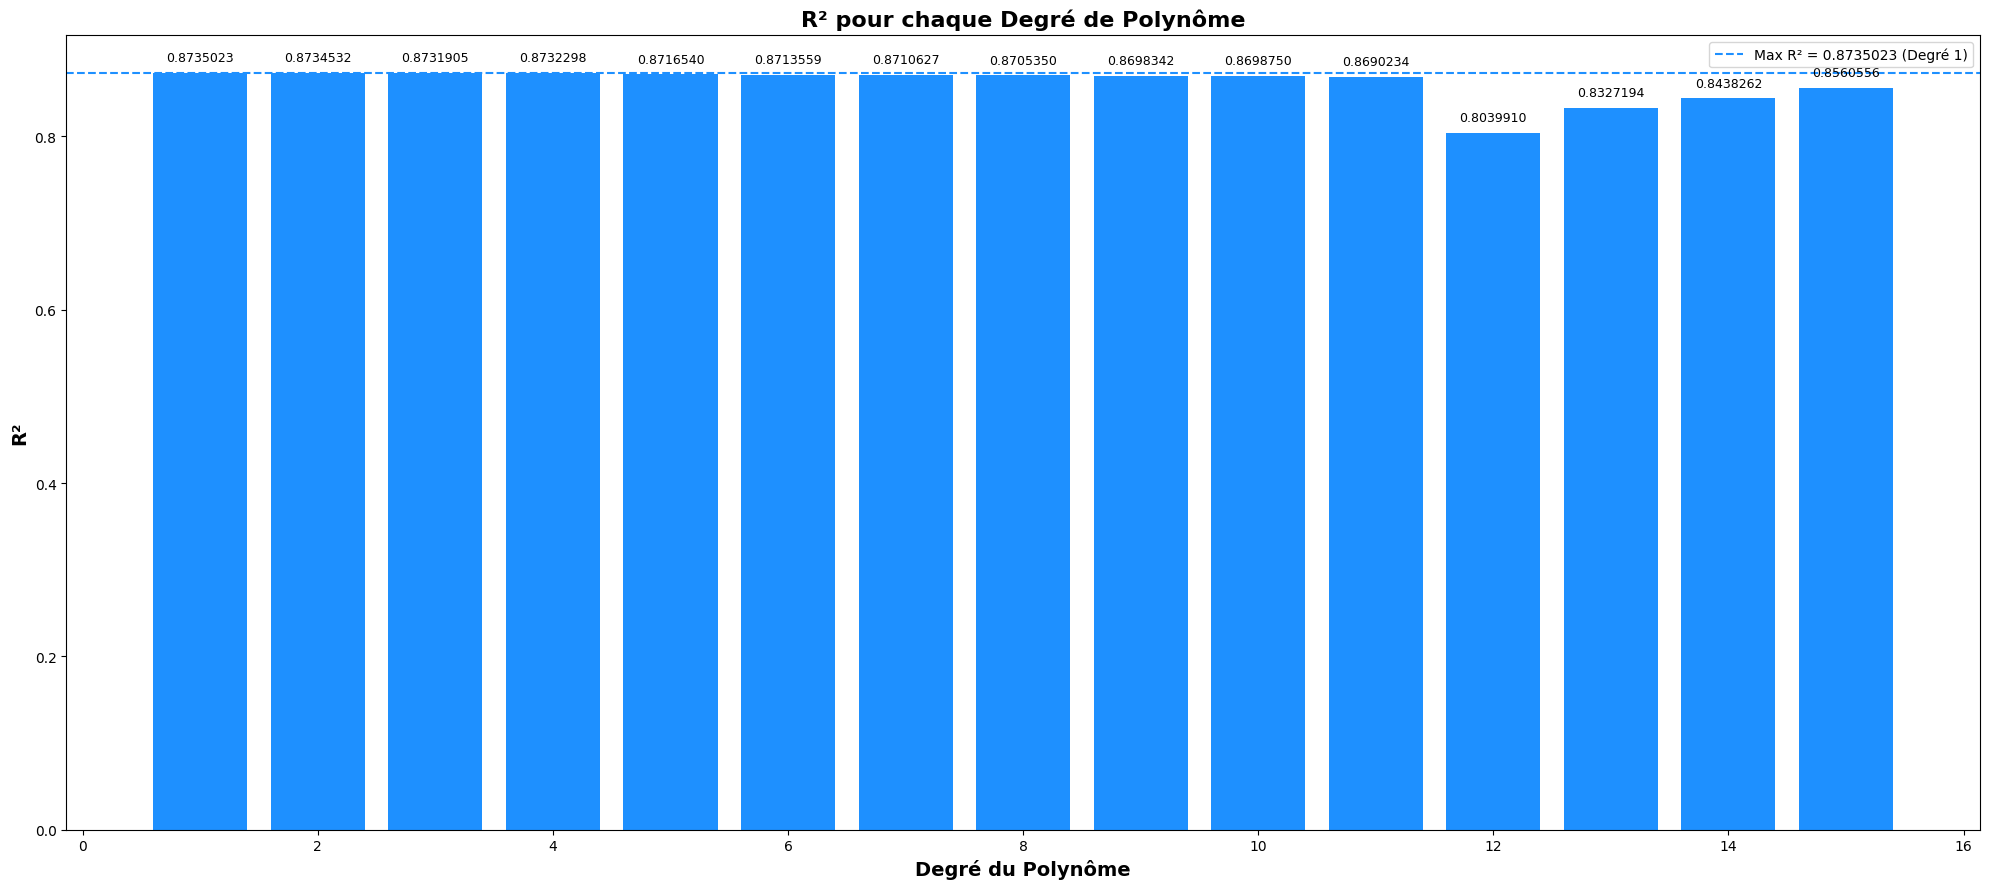

In [112]:

# Configuration du graphique pour R²
fig, ax = plt.subplots(figsize=(20, 9))

# Barres pour R²
ax.bar(degrees, r2_polys, color='dodgerblue')

# Titres et labels
ax.set_xlabel('Degré du Polynôme', fontsize=14, fontweight='bold')
ax.set_ylabel('R²', fontsize=14, fontweight='bold')
ax.set_title('R² pour chaque Degré de Polynôme', fontsize=16, fontweight='bold')

# Ajouter les valeurs sur les barres verticalement
for i in range(len(degrees)):
    ax.text(degrees[i], r2_polys[i] + 0.01, f'{r2_polys[i]:.7f}', ha='center', va='bottom', fontsize=9)

# Tracer la ligne pour la valeur maximale de R²
max_r2 = np.max(r2_polys)
max_r2_degree = degrees[np.argmax(r2_polys)]
ax.axhline(y=max_r2, color='dodgerblue', linestyle='--', label=f'Max R² = {max_r2:.7f} (Degré {max_r2_degree})')

# Ajouter la légende
ax.legend(fontsize=10)

# Ajuster la mise en page pour éviter que le texte ne se chevauche
plt.tight_layout()

# Afficher le graphique
plt.show()


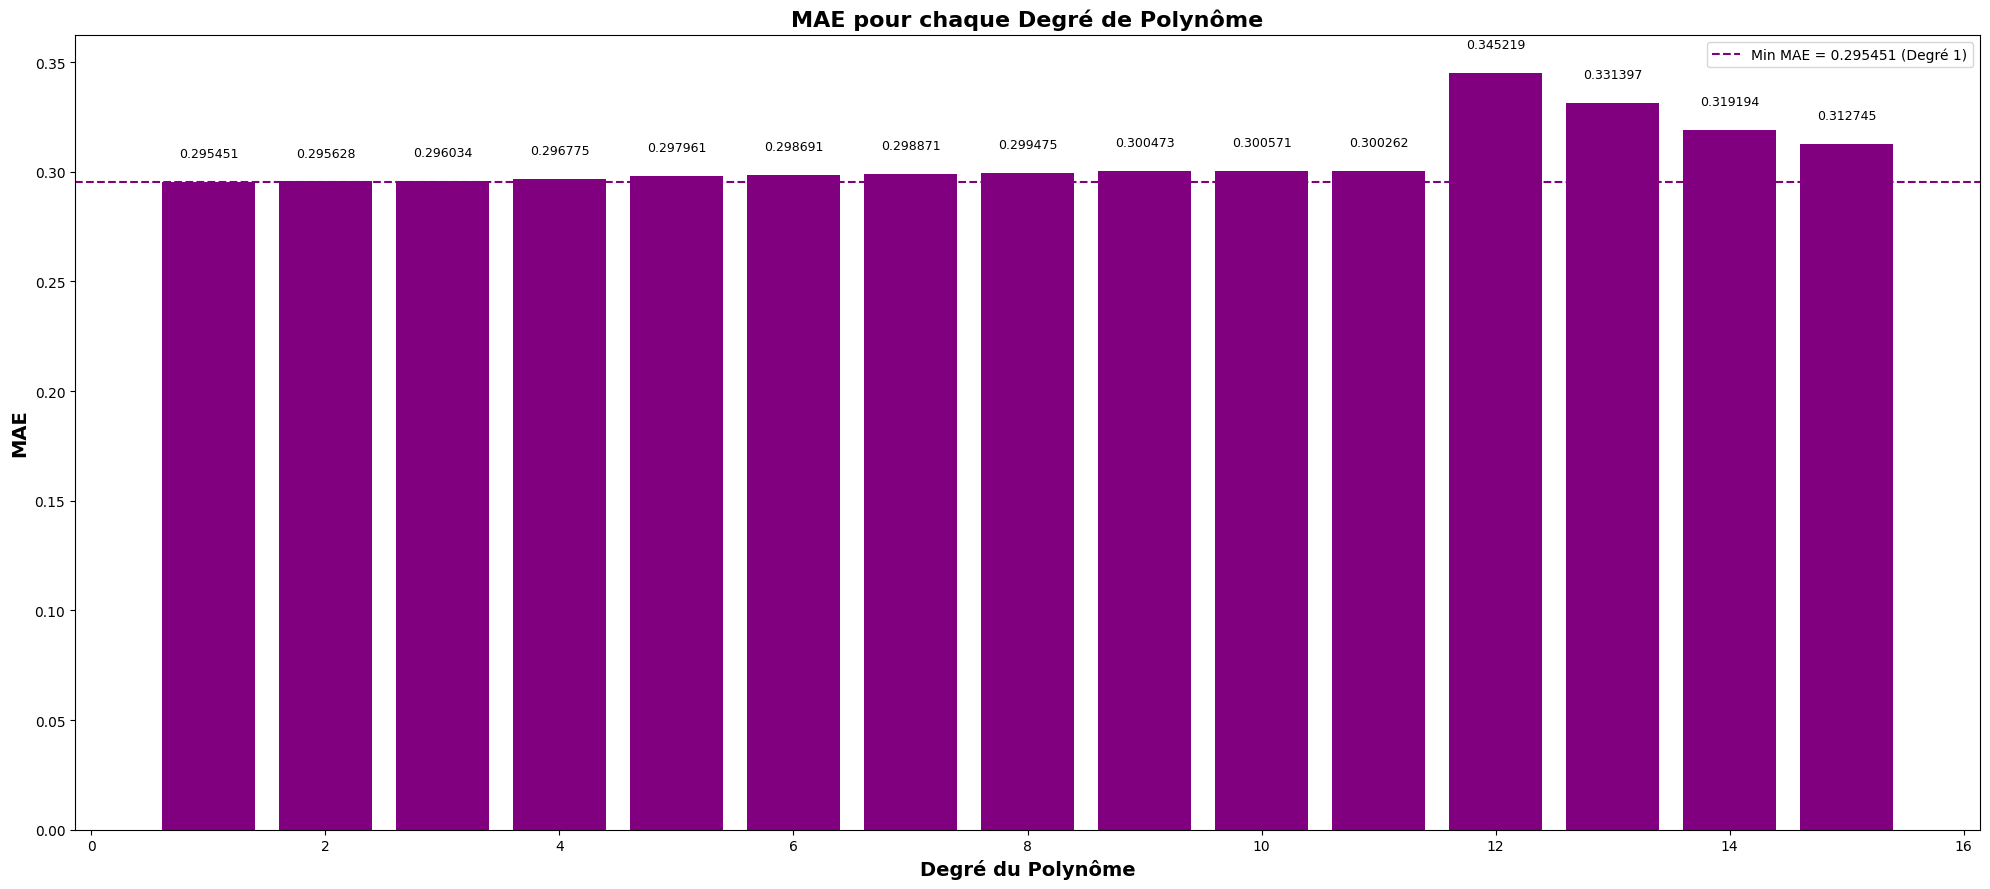

In [113]:

# Configuration du graphique pour MAE
fig, ax = plt.subplots(figsize=(20, 9))

# Barres pour MAE
ax.bar(degrees, mae_polys, color='purple')

# Titres et labels
ax.set_xlabel('Degré du Polynôme', fontsize=14, fontweight='bold')
ax.set_ylabel('MAE', fontsize=14, fontweight='bold')
ax.set_title('MAE pour chaque Degré de Polynôme', fontsize=16, fontweight='bold')

# Ajouter les valeurs sur les barres verticalement
for i in range(len(degrees)):
    ax.text(degrees[i], mae_polys[i] + 0.01, f'{mae_polys[i]:.6f}', ha='center', va='bottom', fontsize=9)

# Tracer la ligne pour la valeur minimale de MAE
min_mae = np.min(mae_polys)
min_mae_degree = degrees[np.argmin(mae_polys)]
ax.axhline(y=min_mae, color='purple', linestyle='--', label=f'Min MAE = {min_mae:.6f} (Degré {min_mae_degree})')

# Ajouter la légende
ax.legend(fontsize=10)

# Ajuster la mise en page pour éviter que le texte ne se chevauche
plt.tight_layout()

# Afficher le graphique
plt.show()


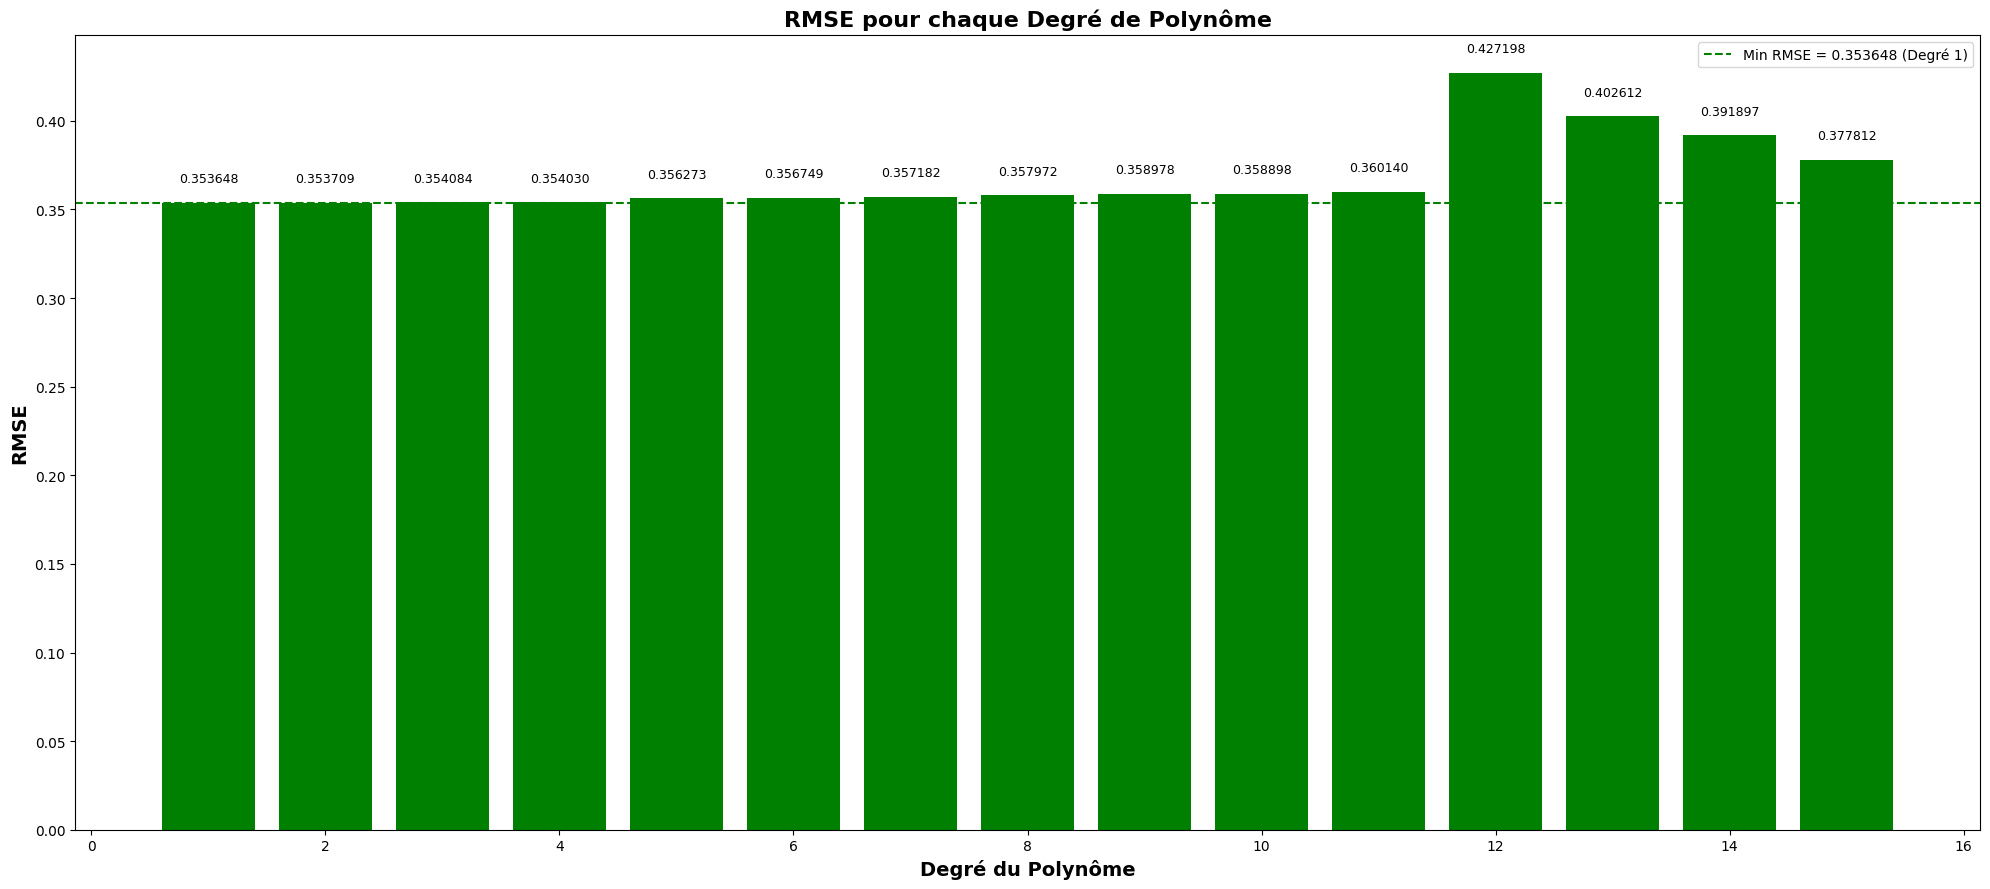

In [114]:

# Configuration du graphique pour RMSE
fig, ax = plt.subplots(figsize=(20, 9))

# Barres pour RMSE
ax.bar(degrees, rmse_polys, color='green')

# Titres et labels
ax.set_xlabel('Degré du Polynôme', fontsize=14, fontweight='bold')
ax.set_ylabel('RMSE', fontsize=14, fontweight='bold')
ax.set_title('RMSE pour chaque Degré de Polynôme', fontsize=16, fontweight='bold')

# Ajouter les valeurs sur les barres verticalement
for i in range(len(degrees)):
    ax.text(degrees[i], rmse_polys[i] + 0.01, f'{rmse_polys[i]:.6f}', ha='center', va='bottom', fontsize=9)

# Tracer la ligne pour la valeur minimale de RMSE
min_rmse = np.min(rmse_polys)
min_rmse_degree = degrees[np.argmin(rmse_polys)]
ax.axhline(y=min_rmse, color='green', linestyle='--', label=f'Min RMSE = {min_rmse:.6f} (Degré {min_rmse_degree})')

# Ajouter la légende
ax.legend(fontsize=10)

# Ajuster la mise en page pour éviter que le texte ne se chevauche
plt.tight_layout()

# Afficher le graphique
plt.show()


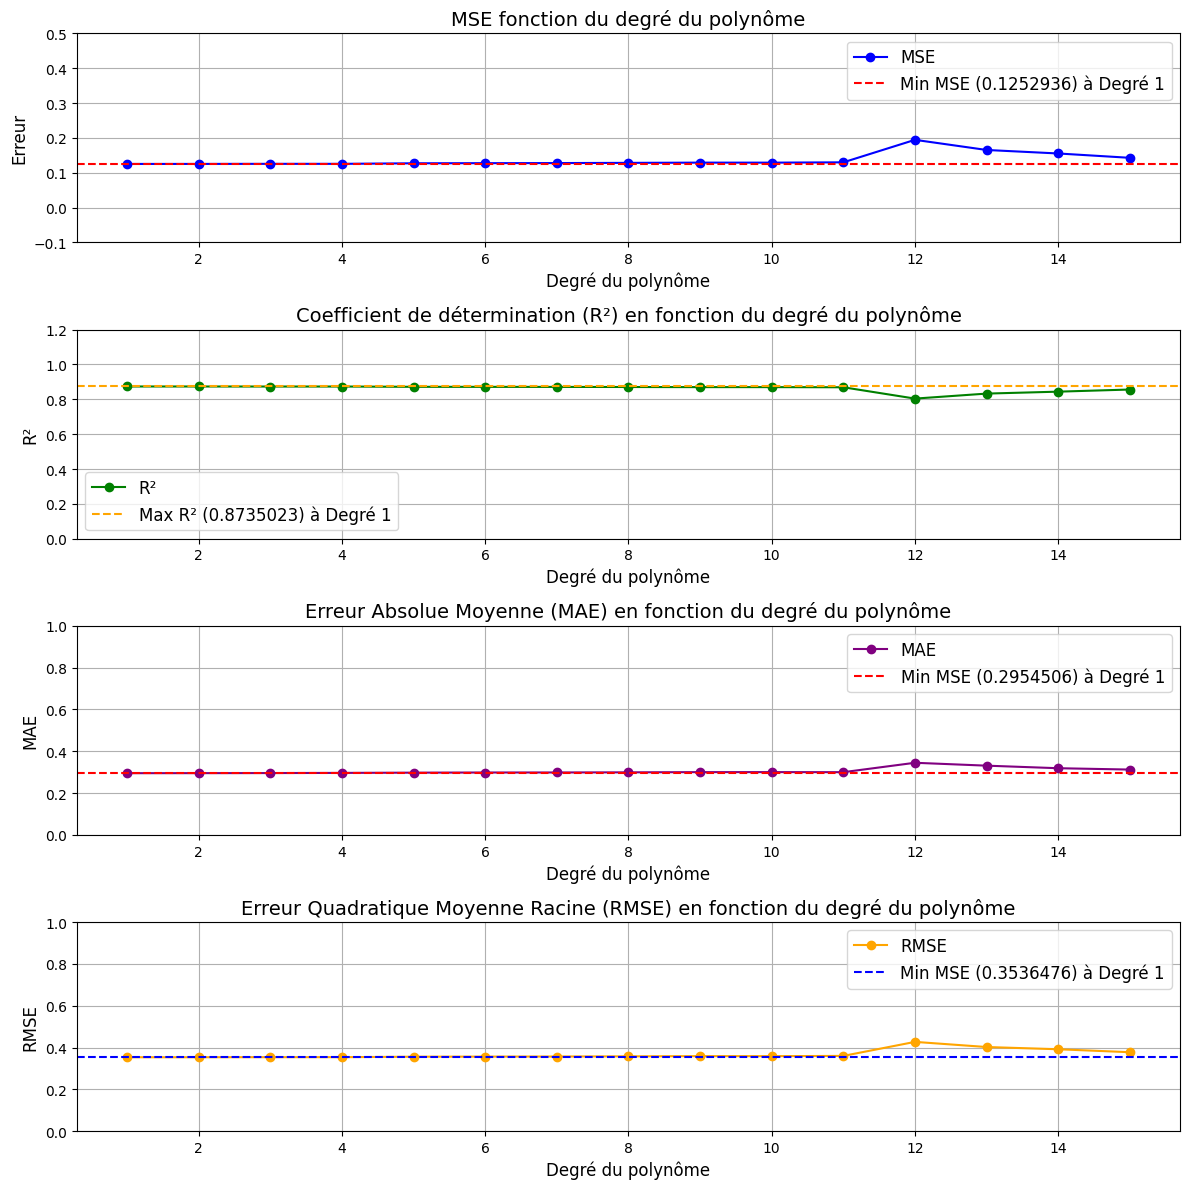

In [115]:

degrees = list(range(1, 16))


# Tracer MSE, R², MAE et RMSE en fonction du degré du polynôme
plt.figure(figsize=(12, 12))  # Taille ajustée pour plus d'espace

# Tracé du MSE, MAE et RMSE
plt.subplot(4, 1, 1)
plt.plot(degrees, mse_polys, marker='o', linestyle='-', color='b', label='MSE')
plt.title('MSE fonction du degré du polynôme', fontsize=14)
plt.xlabel('Degré du polynôme', fontsize=12)
plt.ylabel('Erreur', fontsize=12)
plt.ylim(-0.1, 0.5)  
plt.grid(True)
plt.legend(fontsize=12)

# Ajouter une ligne horizontale à la valeur minimale de MSE
min_mse = np.min(mse_polys)
min_mse_degree = degrees[np.argmin(mse_polys)]  # Degré correspondant à la valeur minimale
plt.axhline(y=min_mse, color='r', linestyle='--', label=f'Min MSE ({min_mse:.7f}) à Degré {min_mse_degree}')
plt.legend(fontsize=12)

# Tracé du R²
plt.subplot(4, 1, 2)
plt.plot(degrees, r2_polys, marker='o', linestyle='-', color='g', label='R²')
plt.title('Coefficient de détermination (R²) en fonction du degré du polynôme', fontsize=14)
plt.xlabel('Degré du polynôme', fontsize=12)
plt.ylabel('R²', fontsize=12)
plt.ylim(0, 1.2)  # Modification de l'échelle de l'axe y pour le R²
plt.grid(True)
plt.legend(fontsize=12)

# Ajouter une ligne horizontale à la valeur maximale de R²
max_r2 = np.max(r2_polys)
max_r2_degree = degrees[np.argmax(r2_polys)]  # Degré correspondant à la valeur maximale
plt.axhline(y=max_r2, color='orange', linestyle='--', label=f'Max R² ({max_r2:.7f}) à Degré {max_r2_degree}')
plt.legend(fontsize=12)

# Tracé du MAE
plt.subplot(4, 1, 3)
plt.plot(degrees, mae_polys, marker='o', linestyle='-', color='purple', label='MAE')
plt.title('Erreur Absolue Moyenne (MAE) en fonction du degré du polynôme', fontsize=14)
plt.xlabel('Degré du polynôme', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.ylim(0, 1)
plt.grid(True)
plt.legend(fontsize=12)

# Ajouter une ligne horizontale à la valeur minimale de MaE
min_mae = np.min(mae_polys)
min_mae_degree = degrees[np.argmin(mae_polys)]  # Degré correspondant à la valeur minimale
plt.axhline(y=min_mae, color='r', linestyle='--', label=f'Min MSE ({min_mae:.7f}) à Degré {min_mae_degree}')
plt.legend(fontsize=12)

# Tracé du RMSE
plt.subplot(4, 1, 4)
plt.plot(degrees, rmse_polys, marker='o', linestyle='-', color='orange', label='RMSE')
plt.title('Erreur Quadratique Moyenne Racine (RMSE) en fonction du degré du polynôme', fontsize=14)
plt.xlabel('Degré du polynôme', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.ylim(0, 1)
plt.grid(True)
plt.legend(fontsize=12)

# Ajouter une ligne horizontale à la valeur minimale de RMSE
min_rmse = np.min(rmse_polys)
min_rmse_degree = degrees[np.argmin(rmse_polys)]  # Degré correspondant à la valeur minimale
plt.axhline(y=min_rmse, color='blue', linestyle='--', label=f'Min MSE ({min_rmse:.7f}) à Degré {min_rmse_degree}')
plt.legend(fontsize=12)


# Ajustement automatique de la disposition pour éviter le chevauchement
plt.tight_layout()

# Affichage du graphique
plt.show()


Le degré 1 offre les meilleures performances, mais les degrés élevés (14-15) montrent un surajustement.

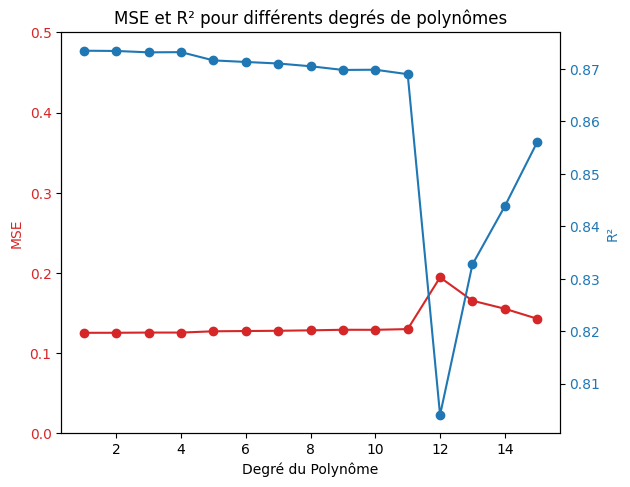

In [116]:

# Visualisation des résultats
fig, ax1 = plt.subplots()

# Configuration de l'axe 1 pour le MSE
color = 'tab:red'
ax1.set_xlabel('Degré du Polynôme')
ax1.set_ylabel('MSE', color=color)
ax1.plot(degrees, mse_polys, label="MSE", color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(0, 0.5)  

# Configuration de l'axe 2 pour le R²
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('R²', color=color)
ax2.plot(degrees, r2_polys, label="R²", color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Ajuster la mise en page pour éviter que le texte ne se chevauche
fig.tight_layout()

# Ajouter un titre
plt.title('MSE et R² pour différents degrés de polynômes')

# Afficher le graphique
plt.show()


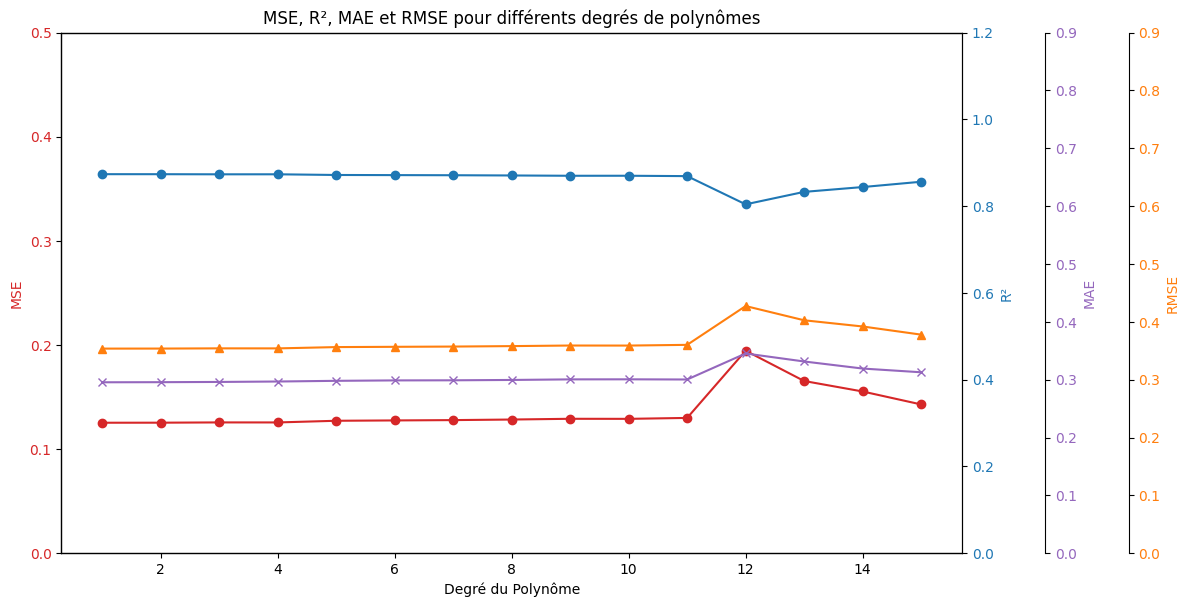

In [117]:


# Visualisation des résultats
fig, ax1 = plt.subplots(figsize=(12, 6))

# Configuration de l'axe 1 pour le MSE
color = 'tab:red'
ax1.set_xlabel('Degré du Polynôme')
ax1.set_ylabel('MSE', color=color)
ax1.plot(degrees, mse_polys, label="MSE", color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 0.5)  

# Configuration de l'axe 2 pour le R²
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('R²', color=color)
ax2.plot(degrees, r2_polys, label="R²", color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 1.2)

# Configuration de l'axe 3 pour le MAE
ax3 = ax1.twinx()
color = 'tab:purple'
ax3.spines['right'].set_position(('outward', 60))  # Décalage de l'axe pour éviter le chevauchement
ax3.set_ylabel('MAE', color=color)
ax3.plot(degrees, mae_polys, label="MAE", color=color, marker='x')
ax3.tick_params(axis='y', labelcolor=color)
ax3.set_ylim(0, 0.9)

# Configuration de l'axe 4 pour le RMSE
ax4 = ax1.twinx()
color = 'tab:orange'
ax4.spines['right'].set_position(('outward', 120))  # Décalage supplémentaire pour éviter le chevauchement
ax4.set_ylabel('RMSE', color=color)
ax4.plot(degrees, rmse_polys, label="RMSE", color=color, marker='^')
ax4.tick_params(axis='y', labelcolor=color)
ax4.set_ylim(0, 0.9)

# Ajuster la mise en page pour éviter que le texte ne se chevauche
fig.tight_layout()

# Ajouter un titre
plt.title('MSE, R², MAE et RMSE pour différents degrés de polynômes')

# Afficher le graphique
plt.show()


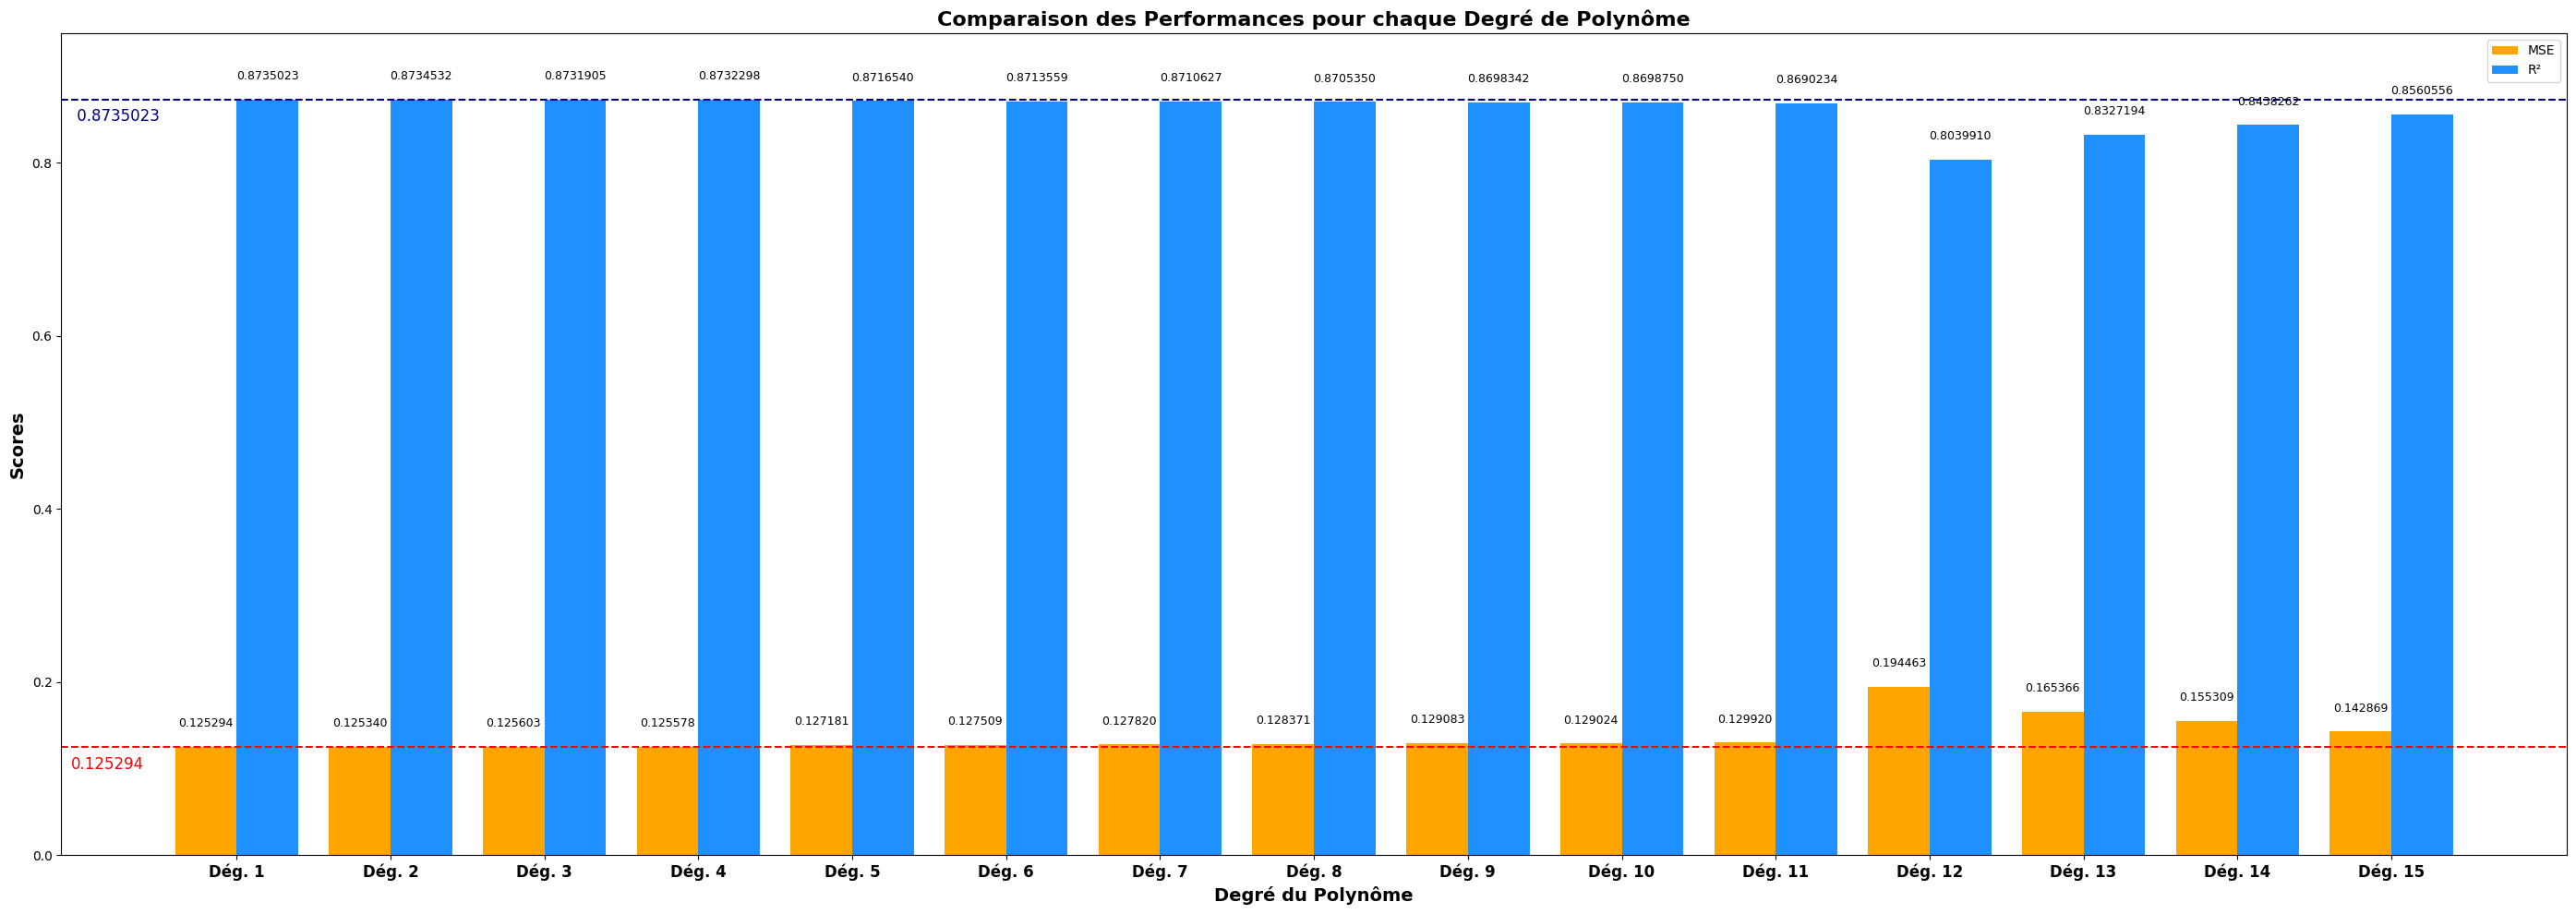

In [118]:


# Configuration du graphique
fig, ax = plt.subplots(figsize=(28, 10))

bar_width = 0.4  # Largeur des barres
index = np.arange(len(degrees))  # Positions des barres sur l'axe x

# Barres pour MSE et R² pour la validation croisée
bar_mse_cv = ax.bar(index - bar_width/2, mse_polys, bar_width, label='MSE', color='orange')
bar_r2_cv = ax.bar(index + bar_width/2, r2_polys, bar_width, label='R²', color='dodgerblue')

# Titres et labels
ax.set_xlabel('Degré du Polynôme', fontsize=14, fontweight='bold')
ax.set_ylabel('Scores', fontsize=14, fontweight='bold')
ax.set_title('Comparaison des Performances pour chaque Degré de Polynôme', fontsize=16, fontweight='bold')
ax.set_xticks(index)
ax.set_xticklabels([f'Dég. {degree}' for degree in degrees], fontsize=12, fontweight='bold')

# Ajouter une légende
ax.legend(fontsize=10)

# Ajouter les valeurs sur les barres
for i in range(len(degrees)):
    ax.text(bar_mse_cv[i].get_x() + bar_mse_cv[i].get_width() / 2, bar_mse_cv[i].get_height() + 0.02,
            f'{mse_polys[i]:.6f}', ha='center', va='bottom', fontsize=9)
    ax.text(bar_r2_cv[i].get_x() + bar_r2_cv[i].get_width() / 2, bar_r2_cv[i].get_height() + 0.02,
            f'{r2_polys[i]:.7f}', ha='center', va='bottom', fontsize=9)

# Tracer la ligne pour la valeur minimale de MSE
min_mse = np.min(mse_polys)
min_mse_degree = degrees[np.argmin(mse_polys)]
ax.axhline(y=min_mse, color='red', linestyle='--', label=f'Min MSE = {min_mse:.6f} (Degré {min_mse_degree})')

# Ajouter une annotation pour la ligne MSE à gauche (déplacée)
ax.annotate(f'{min_mse:.6f}', xy=(-0.6, min_mse -0.02), xycoords='data', 
            ha='right', va='center', fontsize=12, color='red')

# Tracer la ligne pour la valeur maximale de R²
max_r2 = np.max(r2_polys)
max_r2_degree = degrees[np.argmax(r2_polys)]
ax.axhline(y=max_r2, color='darkblue', linestyle='--', label=f'Max R² = {max_r2:.7f} (Degré {max_r2_degree})')

# Ajouter une annotation pour la ligne R² à gauche (déplacée vers le haut)
ax.annotate(f' {max_r2:.7f}', xy=(-0.5, max_r2 - 0.02), xycoords='data', 
            ha='right', va='center', fontsize=12, color='darkblue')  # Décalage vertical de 0.05 vers le haut

# Modifier l'échelle de l'axe y
ax.set_ylim(0, 0.95)

# Ajuster la mise en page pour éviter que le texte ne se chevauche
plt.tight_layout()

# Afficher le graphique
plt.show()


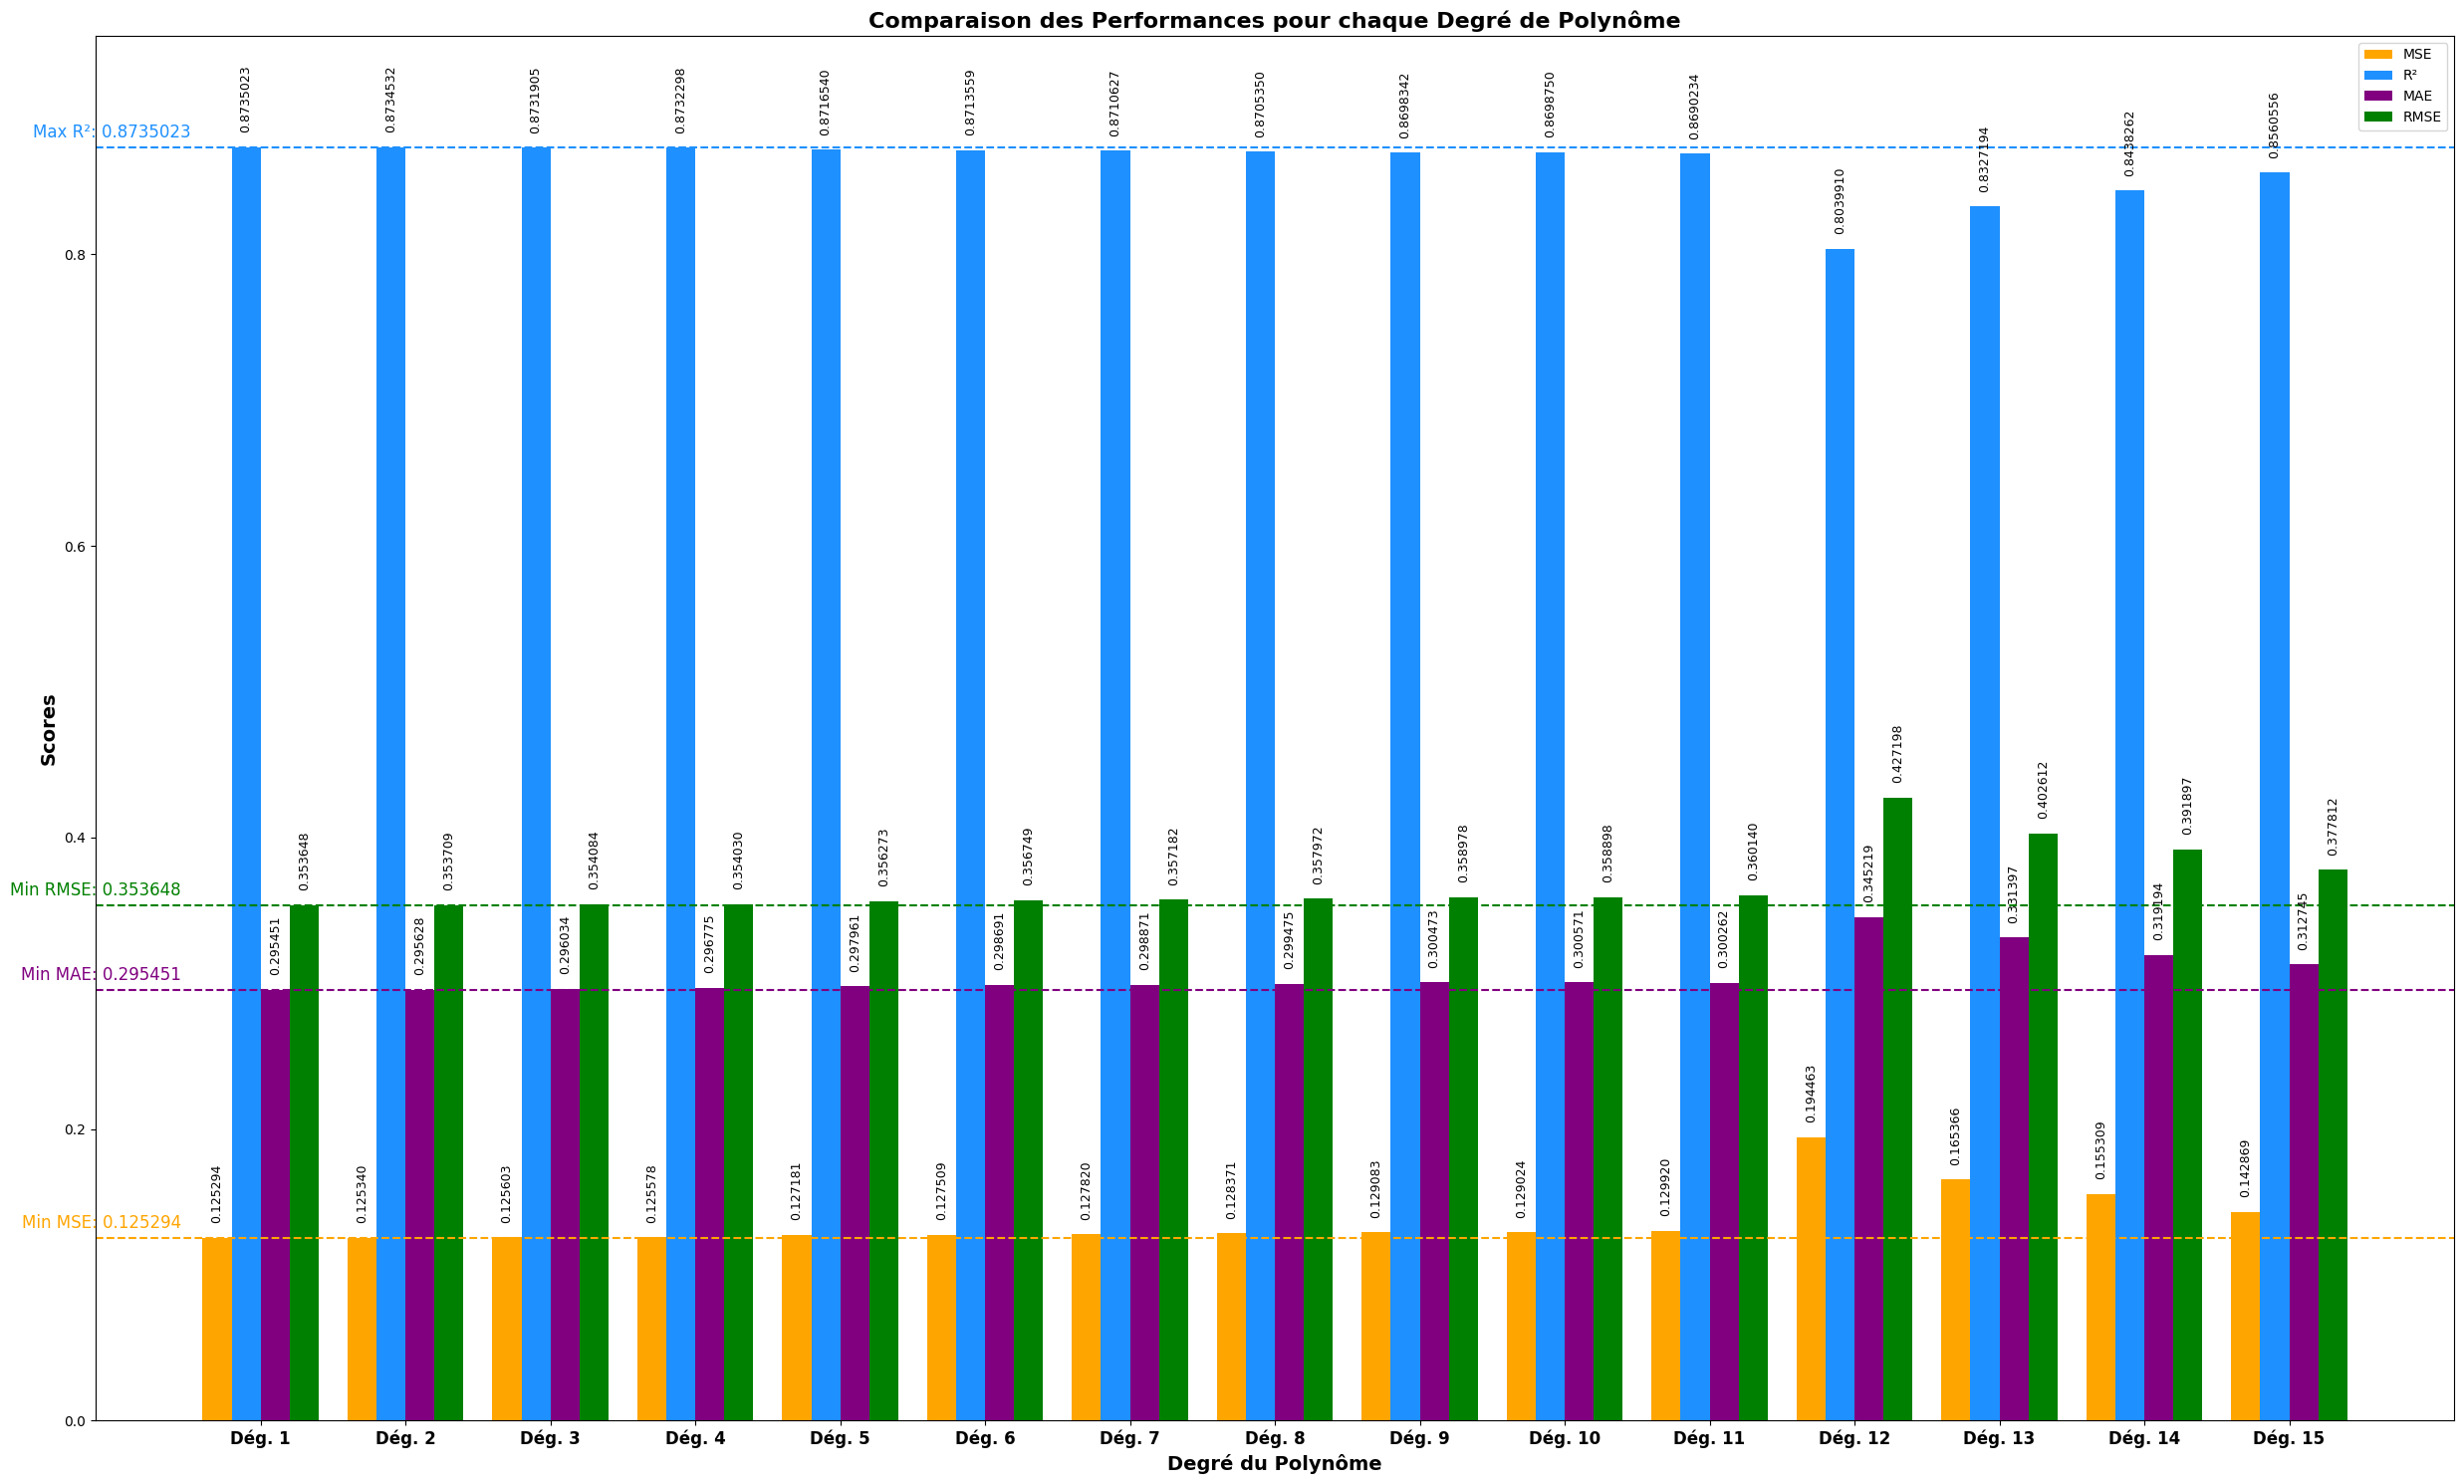

In [119]:

# Configuration du graphique
fig, ax = plt.subplots(figsize=(25, 15))

bar_width = 0.2  # Largeur des barres pour ajuster l'espacement
index = np.arange(len(degrees))  # Positions des barres sur l'axe x

# Barres pour MSE, R², MAE et RMSE
bar_mse = ax.bar(index - 1.5 * bar_width, mse_polys, bar_width, label='MSE', color='orange')
bar_r2 = ax.bar(index - 0.5 * bar_width, r2_polys, bar_width, label='R²', color='dodgerblue')
bar_mae = ax.bar(index + 0.5 * bar_width, mae_polys, bar_width, label='MAE', color='purple')
bar_rmse = ax.bar(index + 1.5 * bar_width, rmse_polys, bar_width, label='RMSE', color='green')

# Titres et labels
ax.set_xlabel('Degré du Polynôme', fontsize=14, fontweight='bold')
ax.set_ylabel('Scores', fontsize=14, fontweight='bold')
ax.set_title('Comparaison des Performances pour chaque Degré de Polynôme', fontsize=16, fontweight='bold')
ax.set_xticks(index)
ax.set_xticklabels([f'Dég. {degree}' for degree in degrees], fontsize=12, fontweight='bold')

# Ajouter une légende
ax.legend(fontsize=10)

# Ajouter les valeurs sur les barres verticalement
for i in range(len(degrees)):
    # MSE
    ax.text(bar_mse[i].get_x() + bar_mse[i].get_width() / 2, bar_mse[i].get_height() + 0.01,
            f'{mse_polys[i]:.6f}', ha='center', va='bottom', fontsize=9, rotation=90)
    # R²
    ax.text(bar_r2[i].get_x() + bar_r2[i].get_width() / 2, bar_r2[i].get_height() + 0.01,
            f'{r2_polys[i]:.7f}', ha='center', va='bottom', fontsize=9, rotation=90)
    # MAE
    ax.text(bar_mae[i].get_x() + bar_mae[i].get_width() / 2, bar_mae[i].get_height() + 0.01,
            f'{mae_polys[i]:.6f}', ha='center', va='bottom', fontsize=9, rotation=90)
    # RMSE
    ax.text(bar_rmse[i].get_x() + bar_rmse[i].get_width() / 2, bar_rmse[i].get_height() + 0.01,
            f'{rmse_polys[i]:.6f}', ha='center', va='bottom', fontsize=9, rotation=90)

# Tracer la ligne pour la valeur minimale de MSE
min_mse = np.min(mse_polys)
min_mse_degree = degrees[np.argmin(mse_polys)]
ax.axhline(y=min_mse, color='orange', linestyle='--', label=f'Min MSE = {min_mse:.6f} (Degré {min_mse_degree})')

# Tracer la ligne pour la valeur minimale de MAE
min_mae = np.min(mae_polys)
min_mae_degree = degrees[np.argmin(mae_polys)]
ax.axhline(y=min_mae, color='purple', linestyle='--', label=f'Min MAE = {min_mae:.6f} (Degré {min_mae_degree})')

# Tracer la ligne pour la valeur minimale de RMSE
min_rmse = np.min(rmse_polys)
min_rmse_degree = degrees[np.argmin(rmse_polys)]
ax.axhline(y=min_rmse, color='green', linestyle='--', label=f'Min RMSE = {min_rmse:.6f} (Degré {min_rmse_degree})')

# Tracer la ligne pour la valeur maximale de R²
max_r2 = np.max(r2_polys)
max_r2_degree = degrees[np.argmax(r2_polys)]
ax.axhline(y=max_r2, color='dodgerblue', linestyle='--', label=f'Max R² = {max_r2:.7f} (Degré {max_r2_degree})')

# Ajouter les annotations pour les lignes horizontales avec un décalage vertical
ax.annotate(f'Min MSE: {min_mse:.6f}', xy=(-0.55, min_mse + 0.01), xycoords='data',
            ha='right', va='center', fontsize=12, color='orange')
ax.annotate(f'Min MAE: {min_mae:.6f}', xy=(-0.55, min_mae + 0.01), xycoords='data',
            ha='right', va='center', fontsize=12, color='purple')
ax.annotate(f'Min RMSE: {min_rmse:.6f}', xy=(-0.55, min_rmse + 0.01), xycoords='data',
            ha='right', va='center', fontsize=12, color='green')
ax.annotate(f'Max R²: {max_r2:.7f}', xy=(-0.48, max_r2 + 0.01), xycoords='data',
            ha='right', va='center', fontsize=12, color='dodgerblue')

# Modifier l'échelle de l'axe y
ax.set_ylim(0, 0.95)

# Ajuster la mise en page pour éviter que le texte ne se chevauche
plt.tight_layout()

# Afficher le graphique
plt.show()


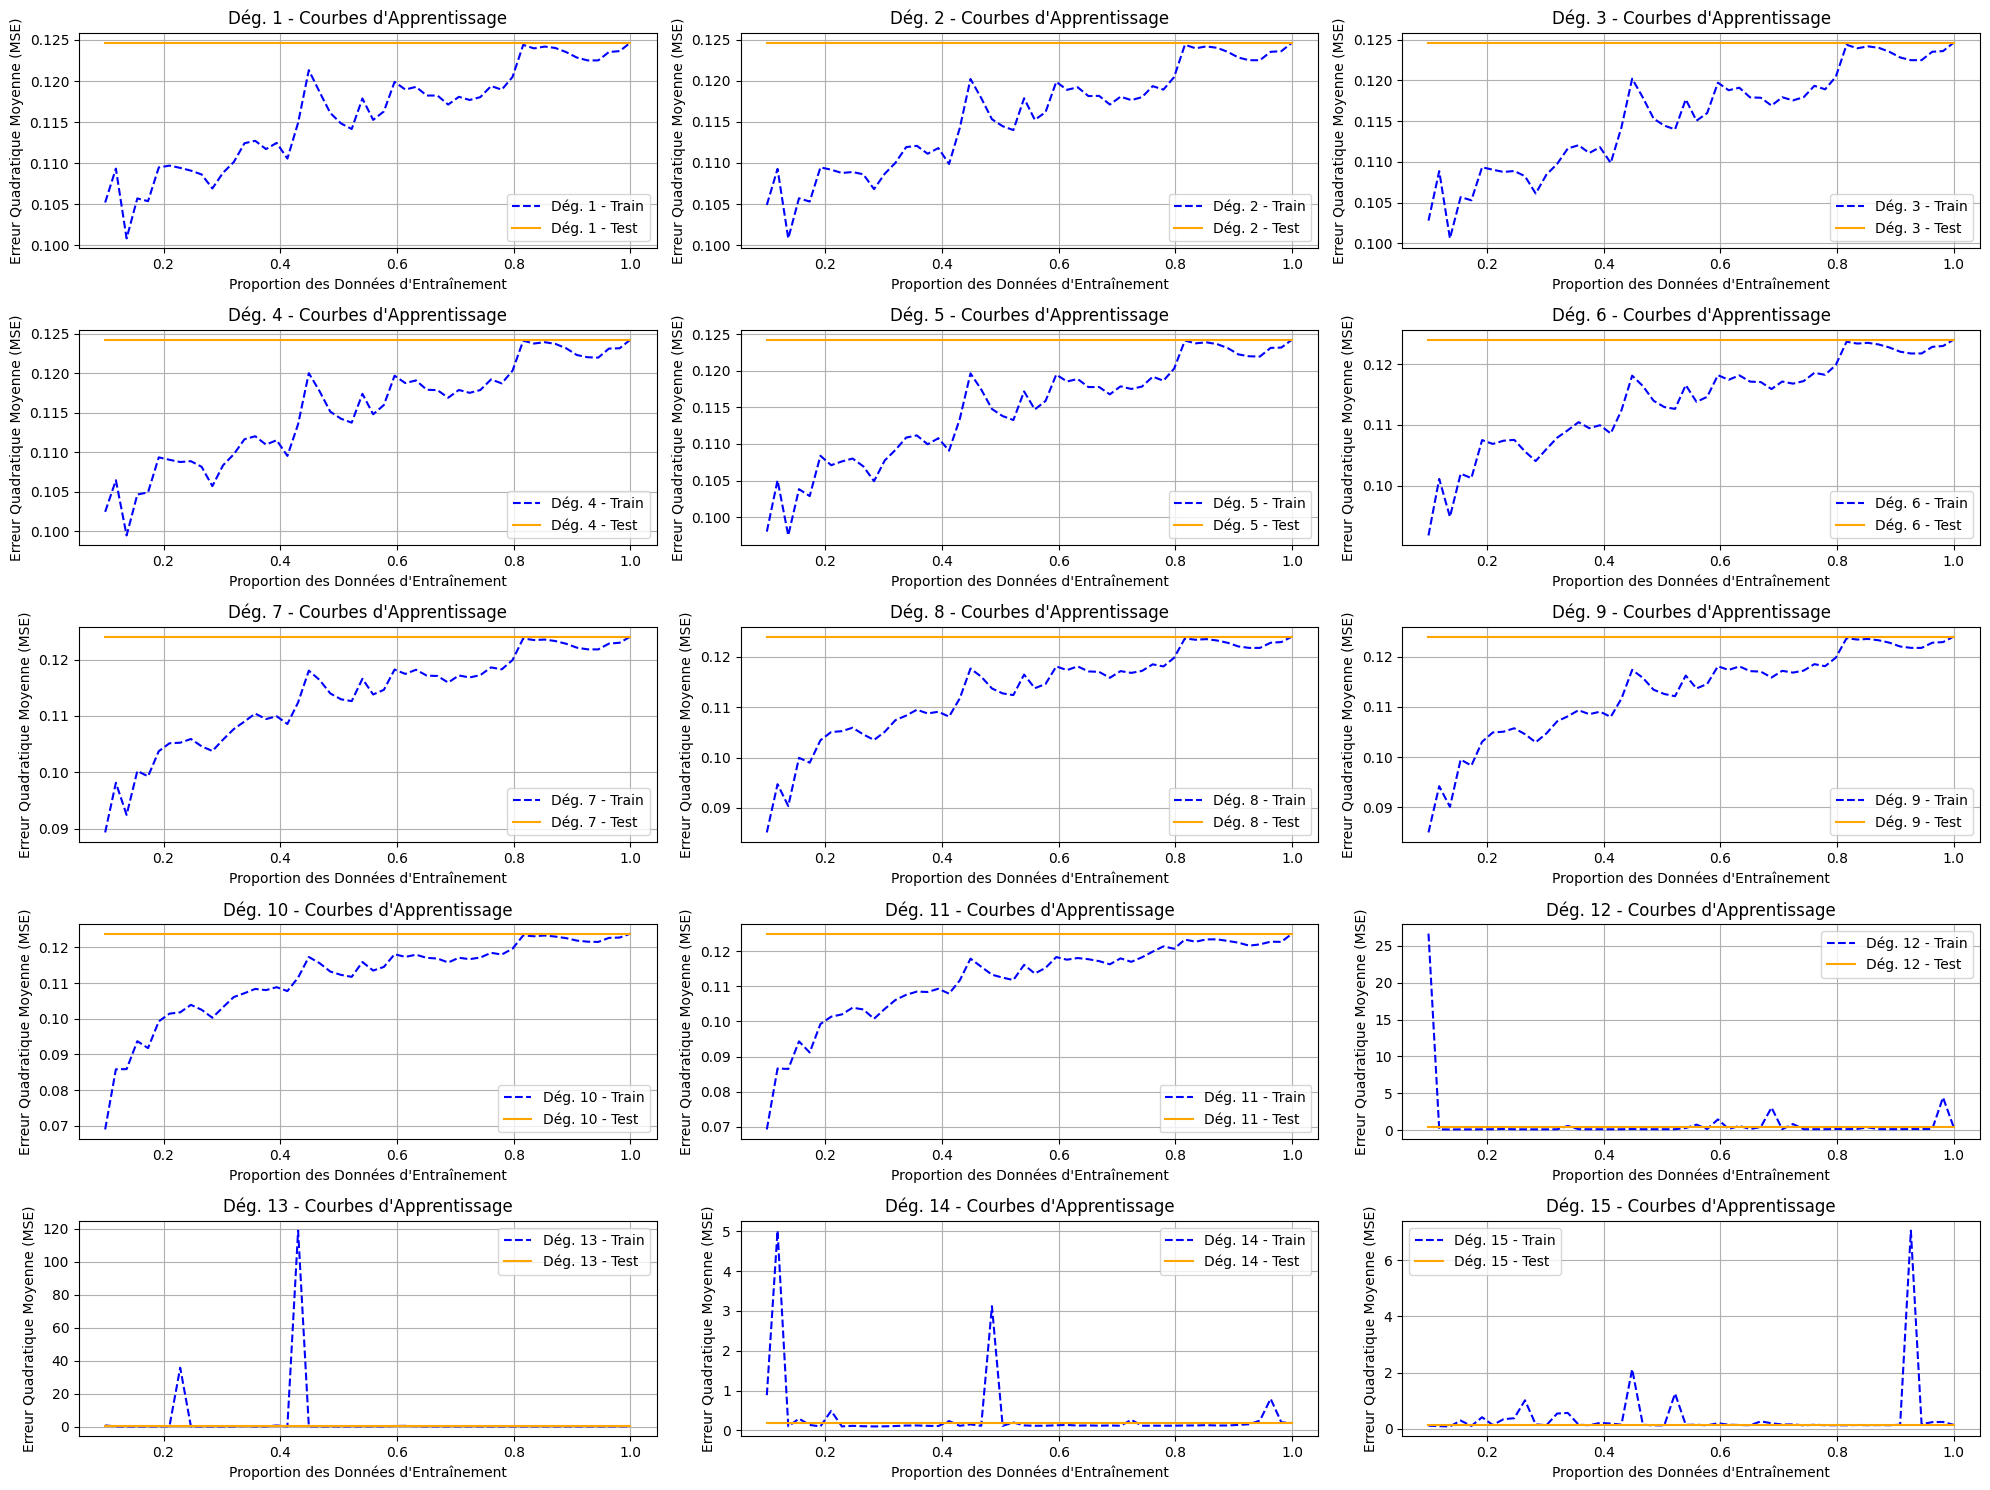

In [120]:

# Configuration des degrés de polynômes
degrees = range(1, 16)

# Configuration des sous-graphes
fig, axes = plt.subplots(5, 3, figsize=(20, 15))
axes = axes.flatten()  # Aplatir pour parcourir les axes

# Boucle sur chaque degré
for i, degree in enumerate(degrees):
    # Transformation polynomiale et régression
    theta, y_pred = polynomial_regression_simple(X_simple, y, degree)
    
    # Initialisation des tailles de données pour la courbe d'apprentissage
    train_sizes = np.linspace(0.1, 1.0, 50)
    mse_train = []
    mse_test = []
    
    for size in train_sizes:
        # Extraction des données d'entraînement partielles
        size = int(size * len(X))
        X_train = X_simple[:size]
        y_train = y[:size]
        
        # Régression sur le sous-échantillon
        theta_partial, y_pred_train = polynomial_regression_simple(X_train, y_train, degree)
        
        # Calcul du MSE pour train
        mse_train.append(mean_squared_error_custom(y_train, y_pred_train))
        
        # Calcul du MSE pour test (en utilisant le modèle sur l'ensemble complet)
        # Utiliser y_pred du modèle entraîné avec X complet pour la prédiction sur le test
        y_pred_test = polynomial_regression_simple(X_simple, y, degree)[1]
        mse_test.append(mean_squared_error_custom(y, y_pred_test))
    
    # Moyennes des MSE pour le sous-graphique correspondant
    ax = axes[i]
    ax.plot(train_sizes, mse_train, label=f'Dég. {degree} - Train', linestyle='--', color='blue')
    ax.plot(train_sizes, mse_test, label=f'Dég. {degree} - Test', linestyle='-', color='orange')
    
    # Configurer les détails du graphique
    ax.set_title(f'Dég. {degree} - Courbes d\'Apprentissage')
    ax.set_xlabel('Proportion des Données d\'Entraînement')
    ax.set_ylabel('Erreur Quadratique Moyenne (MSE)')
    ax.legend()
    ax.grid(True)

# Ajuster la mise en page
fig.tight_layout()
plt.show()

# Ridge

In [121]:
# Extraction des données
X = df[['biking', 'smoking']].values  # Variables indépendantes (matrice 2D)
y = df['heart.disease'].values        # Variable dépendante (vecteur 1D)


In [122]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Extraction des données
X = df[['biking', 'smoking']].values  # Variables indépendantes
y = df['heart.disease'].values        # Variable dépendante

# Liste des valeurs d'alpha à tester
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

# Définir le modèle Ridge
ridge = Ridge()

# Définir les paramètres à tester
param_grid = {'alpha': alphas}

# GridSearchCV pour trouver le meilleur alpha
ridge_cv = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X, y)

# Meilleur alpha trouvé
best_alpha = ridge_cv.best_params_['alpha']
print("Meilleur alpha :", best_alpha)

# MSE (Erreur quadratique moyenne) associé au meilleur modèle
best_score = -ridge_cv.best_score_
print("Erreur quadratique moyenne (MSE) :", best_score)

# Réentraînement du modèle avec le meilleur alpha sur toutes les données
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X, y)

# Prédictions et calcul des métriques finales
y_pred = best_ridge.predict(X)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Métriques finales avec le meilleur modèle :")
print("MSE :", mse)
print("MAE :", mae)
print("RMSE :", rmse)
print("R² :", r2)


Meilleur alpha : 0.01
Erreur quadratique moyenne (MSE) : 0.02076024160187464
Métriques finales avec le meilleur modèle :
MSE : 0.020341675828532094
MAE : 0.11267366928542227
RMSE : 0.14262424698673115
R² : 0.9796173952462596


In [123]:
import numpy as np
from sklearn.model_selection import KFold

# Fonctions de calcul des métriques
def mean_squared_error_custom(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mean_absolute_error_custom(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def root_mean_squared_error_custom(y_true, y_pred):
    return np.sqrt(mean_squared_error_custom(y_true, y_pred))

def r2_score_custom(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Fonction Ridge avec validation croisée
def ridge_regression_cv(X, y, alphas=[0.01, 0.1, 1.0, 10.0, 100.0], n_splits=5):
    """
    Effectue la régression Ridge avec validation croisée et renvoie les résultats.
    
    Paramètres :
    - X : Les caractéristiques (features) des données (numpy array)
    - y : La variable cible (numpy array)
    - alphas : Liste des valeurs d'alpha (paramètre de régularisation)
    - n_splits : Le nombre de splits pour la validation croisée
    
    Retourne :
    - Un dictionnaire contenant les résultats des métriques pour chaque alpha
    """
    
    # Ajout de la colonne de biais (intercept) à X
    X_bias = np.hstack((np.ones((X.shape[0], 1)), X))  # Ajout d'une colonne de 1
    
    # Initialisation de la validation croisée K-Fold
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)  # n_splits-fold CV

    # Dictionnaires pour stocker les résultats pour chaque alpha
    ridge_mse = {}
    ridge_mae = {}
    ridge_rmse = {}
    ridge_r2 = {}

    # Boucle sur les différentes valeurs d'alpha
    for alpha in alphas:
        mse_ridgee = []
        mae_ridgee = []
        rmse_ridgee = []
        r2_ridgee = []
        
        # Boucle sur les folds
        for train_index, test_index in kf.split(X_bias):
            # Division des données en train et test
            X_train, X_test = X_bias[train_index], X_bias[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            # Ridge regression - solution analytique
            I = np.eye(X_train.shape[1])  # Matrice identité
            I[0, 0] = 0  # Pas de régularisation sur le biais
            lambda_I = alpha * I
            
            # Calcul des coefficients (theta) - closed-form solution
            theta = np.linalg.inv(X_train.T @ X_train + lambda_I) @ (X_train.T @ y_train)
            
            # Prédictions sur l'ensemble de test
            y_test_pred = X_test @ theta
            
            # Calcul des métriques
            mse_ridgee.append(mean_squared_error_custom(y_test, y_test_pred))
            mae_ridgee.append(mean_absolute_error_custom(y_test, y_test_pred))
            rmse_ridgee.append(np.sqrt(root_mean_squared_error_custom(y_test, y_test_pred)))
            r2_ridgee.append(r2_score_custom(y_test, y_test_pred))
        
        # Stockage des résultats pour chaque alpha
        ridge_mse[alpha] = np.mean(mse_ridgee)
        ridge_mae[alpha] = np.mean(mae_ridgee)
        ridge_rmse[alpha] = np.mean(rmse_ridgee)
        ridge_r2[alpha] = np.mean(r2_ridgee)

    return ridge_mse,ridge_mae, ridge_rmse, ridge_r2


In [124]:
ridge_mse, ridge_mae, ridge_rmse, ridge_r2 = ridge_regression_cv(X, y)

In [125]:
# Création d'un DataFrame pour afficher les résultats sous forme de tableau
results_ridge = pd.DataFrame({
    'Alpha': alphas,
    'MSE moyen': [ridge_mse[alpha] for alpha in alphas],
    'MAE moyen': [ridge_mae[alpha] for alpha in alphas],
    'RMSE moyen': [ridge_rmse[alpha] for alpha in alphas],
    'R² moyen': [ridge_r2[alpha] for alpha in alphas]
})

# Affichage du tableau des résultats
print("Régression Ridge avec validation croisée :")
print("Résultats pour différents alpha :")
results_ridge

Régression Ridge avec validation croisée :
Résultats pour différents alpha :


Alpha  MSE moyen  MAE moyen  RMSE moyen  R² moyen
0    0.01   0.020573   0.113307    0.378035  0.979231
1    0.10   0.020583   0.113212    0.378057  0.979225
2    1.00   0.021433   0.114893    0.381662  0.978412
3   10.00   0.073587   0.222705    0.519765  0.926311
4  100.00   0.573689   0.641370    0.869787  0.423997

In [126]:
def grid_search_best_alpha(X, y, alphas=[0.01, 0.1, 1.0, 10.0, 100.0], n_splits=5):
  
    # Appel de la fonction de régression Ridge avec validation croisée
    ridge_mse, ridge_mae, ridge_rmse, ridge_r2 = ridge_regression_cv(X, y, alphas, n_splits)
    
    # Trouver l'alpha qui minimise le MSE
    best_alpha = min(ridge_mse, key=ridge_mse.get)
    
    print(f"Le meilleur alpha en fonction du MSE est : {best_alpha}")
    
    return best_alpha


best_alpha = grid_search_best_alpha(X, y)

Le meilleur alpha en fonction du MSE est : 0.01


In [127]:
# Trouver les minimums et maximums des métriques
mse_Ridge = min(ridge_mse, key=ridge_mse.get)
mae_Ridge = min(ridge_mae, key=ridge_mae.get)
rmse_Ridge = min(ridge_rmse, key=ridge_rmse.get)
r2_Ridge = max(ridge_r2, key=ridge_r2.get)

# Affichage des résultats
print(f"Alpha avec le minimum MSE : {mse_Ridge} avec MSE = {ridge_mse[mse_Ridge]:.7f}")
print(f"Alpha avec le minimum MAE : {mae_Ridge} avec MAE = {ridge_mae[mae_Ridge]:.7f}")
print(f"Alpha avec le minimum RMSE : {rmse_Ridge} avec RMSE = {ridge_rmse[rmse_Ridge]:.3f}")
print(f"Alpha avec le maximum R² : {r2_Ridge} avec R² = {ridge_r2[r2_Ridge]:.6f}")

Alpha avec le minimum MSE : 0.01 avec MSE = 0.0205728
Alpha avec le minimum MAE : 0.1 avec MAE = 0.1132124
Alpha avec le minimum RMSE : 0.01 avec RMSE = 0.378
Alpha avec le maximum R² : 0.01 avec R² = 0.979231


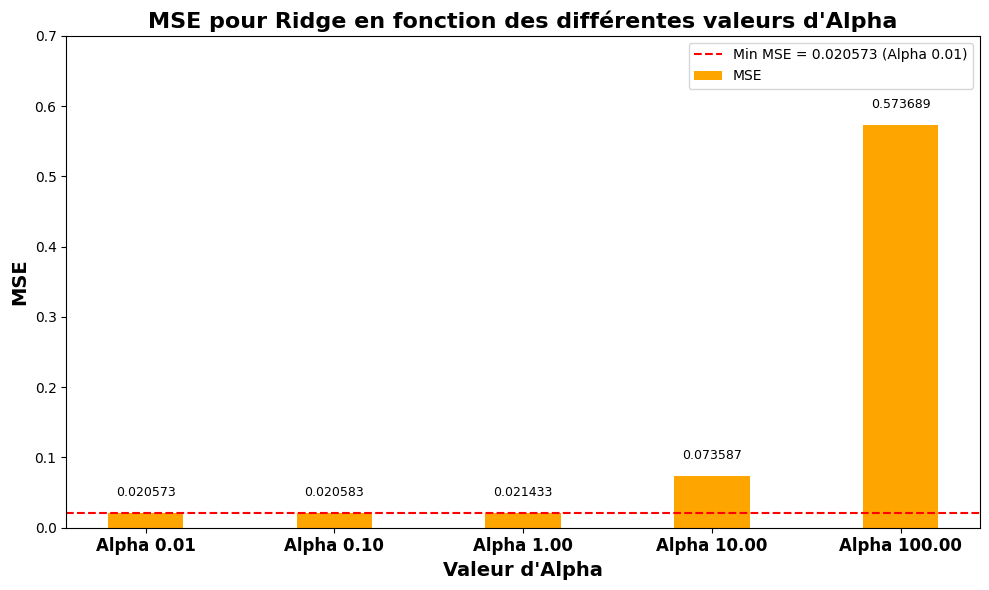

In [128]:
alphas_ridge = list(ridge_mse.keys())  # Valeurs d'alpha pour Ridge
mse_ridge = list(ridge_mse.values())  # MSE pour Ridge
mae_ridge = list(ridge_mae.values())  # MAE pour Ridge
rmse_ridge = list(ridge_rmse.values()) # RMSE pour Ridge
r2_ridge = list(ridge_r2.values())    # R² pour Ridge

# MSE pour Ridge
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(alphas_ridge))

bar_mse = ax.bar(index, mse_ridge, bar_width, label='MSE', color='orange')

ax.set_xlabel('Valeur d\'Alpha', fontsize=14, fontweight='bold')
ax.set_ylabel('MSE', fontsize=14, fontweight='bold')
ax.set_title("MSE pour Ridge en fonction des différentes valeurs d'Alpha", fontsize=16, fontweight='bold')
ax.set_xticks(index)
ax.set_xticklabels([f'Alpha {alpha:.2f}' for alpha in alphas_ridge], fontsize=12, fontweight='bold')

# Ajouter les valeurs sur les barres
for i in range(len(alphas_ridge)):
    ax.text(bar_mse[i].get_x() + bar_mse[i].get_width() / 2, bar_mse[i].get_height() + 0.02,
            f'{mse_ridge[i]:.6f}', ha='center', va='bottom', fontsize=9)

# Ajouter une ligne pour le minimum de MSE
min_mse = np.min(mse_ridge)
min_mse_alpha = alphas_ridge[np.argmin(mse_ridge)]
ax.axhline(y=min_mse, color='red', linestyle='--', label=f'Min MSE = {min_mse:.6f} (Alpha {min_mse_alpha:.2f})')
plt.ylim(0, 0.7)
# Ajouter la légende
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()

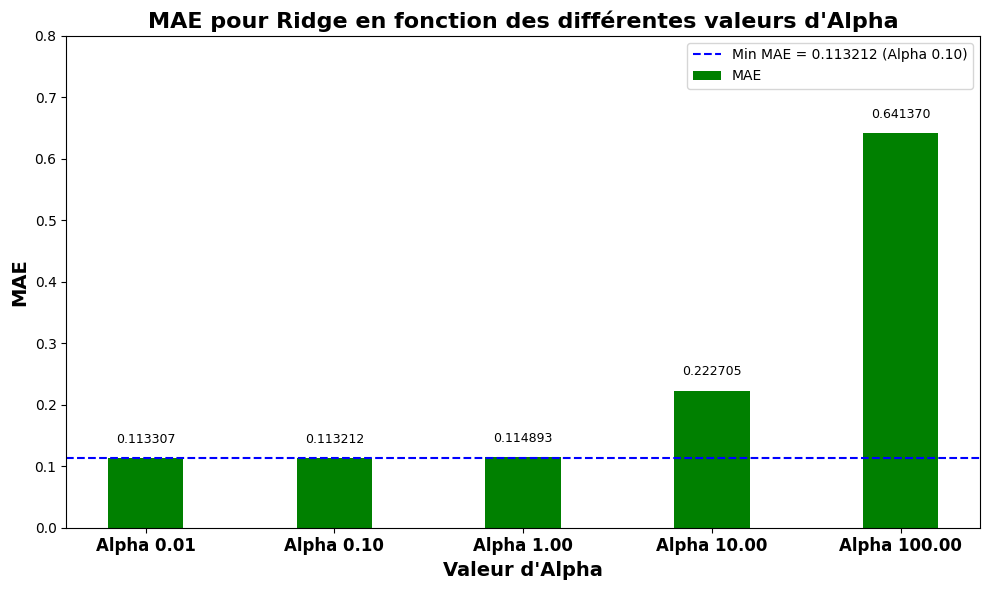

In [129]:

# MAE pour Ridge
fig, ax = plt.subplots(figsize=(10, 6))

bar_mae = ax.bar(index, mae_ridge, bar_width, label='MAE', color='green')

ax.set_xlabel('Valeur d\'Alpha', fontsize=14, fontweight='bold')
ax.set_ylabel('MAE', fontsize=14, fontweight='bold')
ax.set_title("MAE pour Ridge en fonction des différentes valeurs d'Alpha", fontsize=16, fontweight='bold')
ax.set_xticks(index)
ax.set_xticklabels([f'Alpha {alpha:.2f}' for alpha in alphas_ridge], fontsize=12, fontweight='bold')

# Ajouter les valeurs sur les barres
for i in range(len(alphas_ridge)):
    ax.text(bar_mae[i].get_x() + bar_mae[i].get_width() / 2, bar_mae[i].get_height() + 0.02,
            f'{mae_ridge[i]:.6f}', ha='center', va='bottom', fontsize=9)

# Ajouter une ligne pour le minimum de MAE
min_mae = np.min(mae_ridge)
min_mae_alpha = alphas_ridge[np.argmin(mae_ridge)]
ax.axhline(y=min_mae, color='blue', linestyle='--', label=f'Min MAE = {min_mae:.6f} (Alpha {min_mae_alpha:.2f})')
plt.ylim(0, 0.8)
# Ajouter la légende
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()

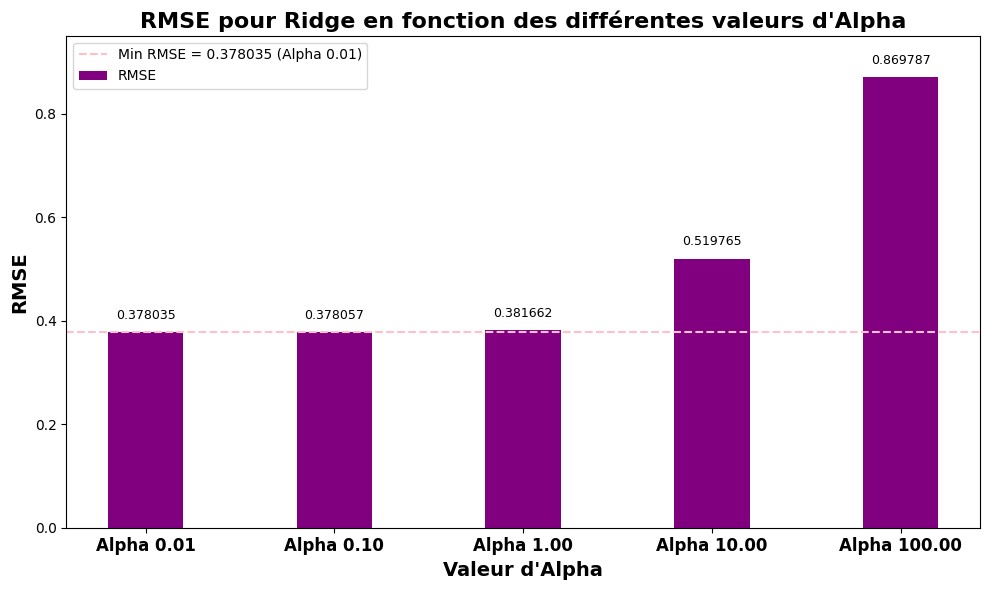

In [130]:
# RMSE pour Ridge
fig, ax = plt.subplots(figsize=(10, 6))

bar_rmse = ax.bar(index, rmse_ridge, bar_width, label='RMSE', color='purple')

ax.set_xlabel('Valeur d\'Alpha', fontsize=14, fontweight='bold')
ax.set_ylabel('RMSE', fontsize=14, fontweight='bold')
ax.set_title("RMSE pour Ridge en fonction des différentes valeurs d'Alpha", fontsize=16, fontweight='bold')
ax.set_xticks(index)
ax.set_xticklabels([f'Alpha {alpha:.2f}' for alpha in alphas_ridge], fontsize=12, fontweight='bold')

# Ajouter les valeurs sur les barres
for i in range(len(alphas_ridge)):
    ax.text(bar_rmse[i].get_x() + bar_rmse[i].get_width() / 2, bar_rmse[i].get_height() + 0.02,
            f'{rmse_ridge[i]:.6f}', ha='center', va='bottom', fontsize=9)

# Ajouter une ligne pour le minimum de RMSE
min_rmse = np.min(rmse_ridge)
min_rmse_alpha = alphas_ridge[np.argmin(rmse_ridge)]
ax.axhline(y=min_rmse, color='pink', linestyle='--', label=f'Min RMSE = {min_rmse:.6f} (Alpha {min_rmse_alpha:.2f})')
plt.ylim(0, 0.95)
# Ajouter la légende
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()

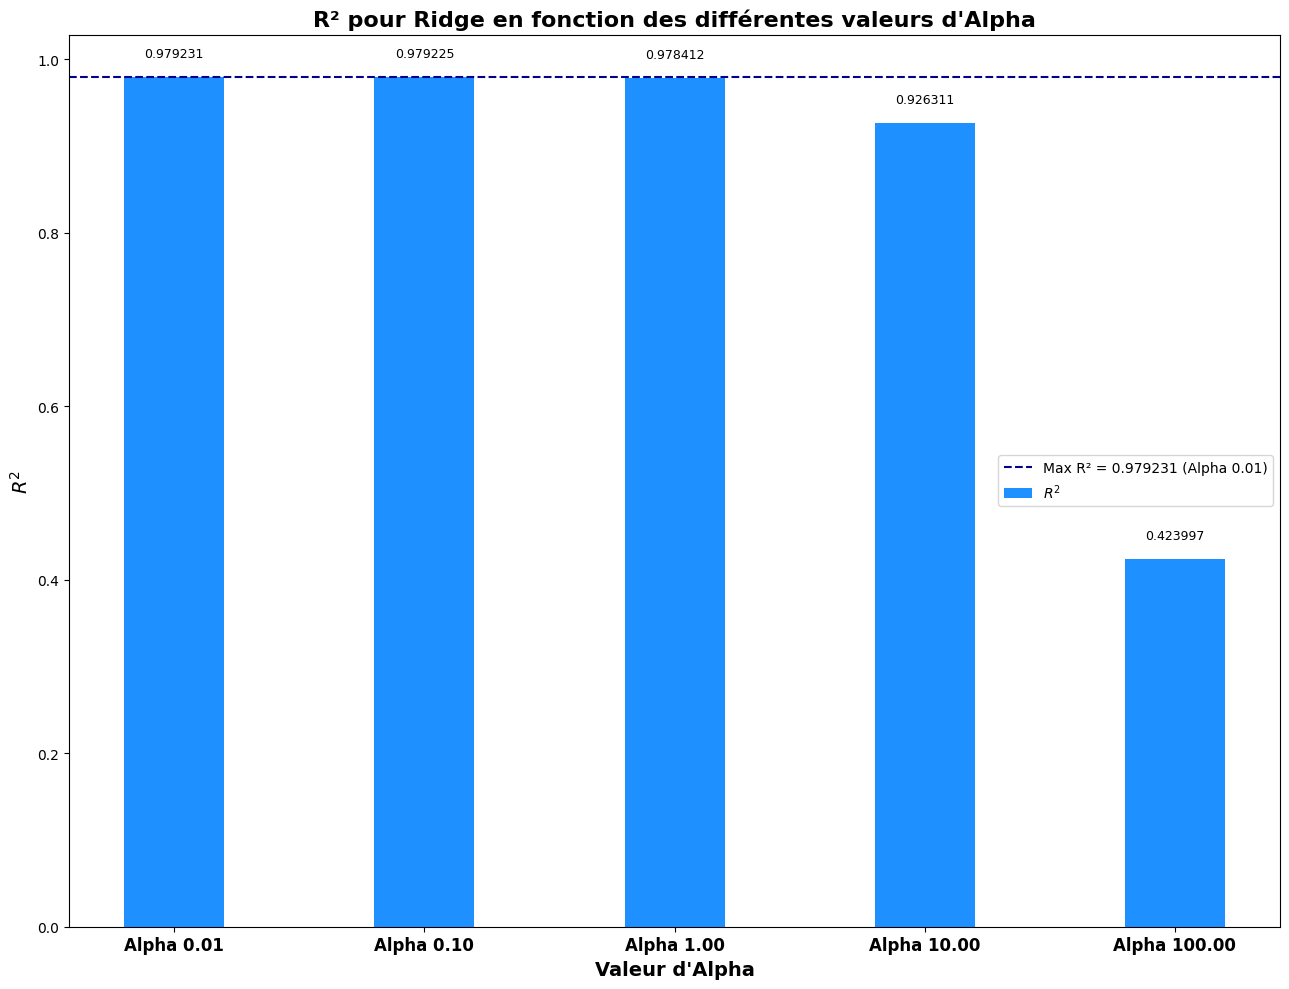

In [131]:
# R² pour Ridge
fig, ax = plt.subplots(figsize=(13, 10))

bar_r2 = ax.bar(index, r2_ridge, bar_width, label='$R^2$', color='dodgerblue')

ax.set_xlabel('Valeur d\'Alpha', fontsize=14, fontweight='bold')
ax.set_ylabel('$R^2$', fontsize=14, fontweight='bold')
ax.set_title("R² pour Ridge en fonction des différentes valeurs d'Alpha", fontsize=16, fontweight='bold')
ax.set_xticks(index)
ax.set_xticklabels([f'Alpha {alpha:.2f}' for alpha in alphas_ridge], fontsize=12, fontweight='bold')

# Ajouter les valeurs sur les barres
for i in range(len(alphas_ridge)):
    ax.text(bar_r2[i].get_x() + bar_r2[i].get_width() / 2, bar_r2[i].get_height() + 0.02,
            f'{r2_ridge[i]:.6f}', ha='center', va='bottom', fontsize=9)

# Ajouter une ligne pour la valeur maximale de R²
max_r2 = np.max(r2_ridge)
max_r2_alpha = alphas_ridge[np.argmax(r2_ridge)]
ax.axhline(y=max_r2, color='darkblue', linestyle='--', label=f'Max R² = {max_r2:.6f} (Alpha {max_r2_alpha:.2f})')

# Ajouter la légende
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()

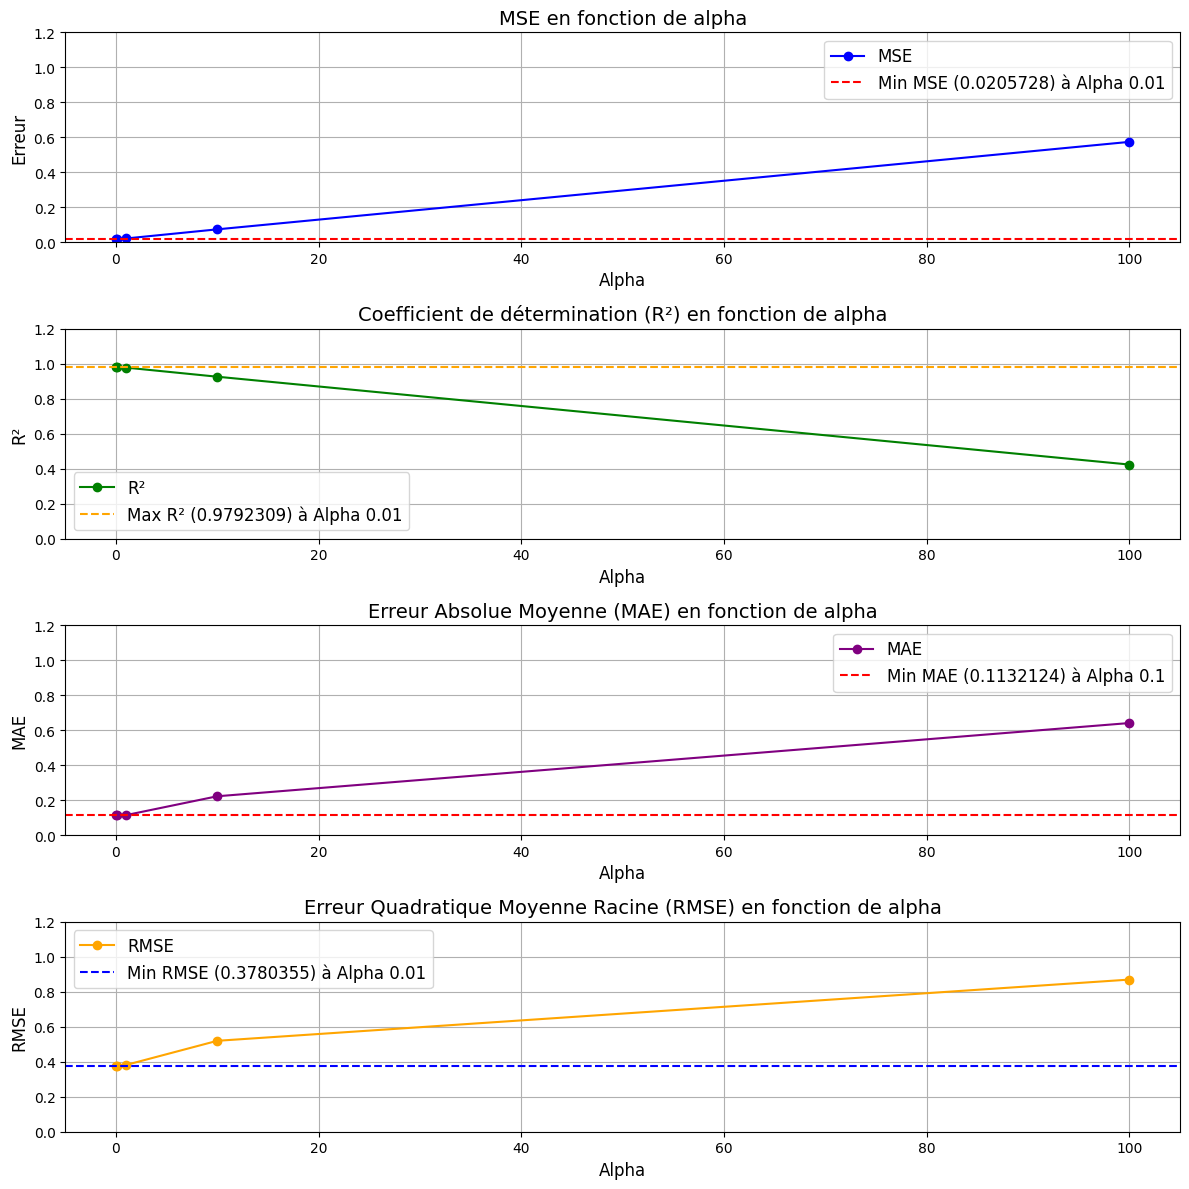

In [132]:

# Liste des valeurs d'alpha à tester
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

# Dictionnaires pour stocker les résultats
ridge_mse = {alpha: np.mean(mse_ridgee) for alpha, mse_ridgee in ridge_mse.items()}
ridge_mae = {alpha: np.mean(mae_ridgee) for alpha, mae_ridgee in ridge_mae.items()}
ridge_rmse = {alpha: np.mean(rmse_ridgee) for alpha, rmse_ridgee in ridge_rmse.items()}
ridge_r2 = {alpha: np.mean(r2_ridgee) for alpha, r2_ridgee in ridge_r2.items()}

# Tracer MSE, R², MAE et RMSE en fonction d'alpha
plt.figure(figsize=(12, 12))  # Taille ajustée pour plus d'espace

# Tracé du MSE
plt.subplot(4, 1, 1)
plt.plot(alphas, list(ridge_mse.values()), marker='o', linestyle='-', color='b', label='MSE')
plt.title('MSE en fonction de alpha', fontsize=14)
plt.xlabel('Alpha', fontsize=12)
plt.ylabel('Erreur', fontsize=12)
plt.ylim(0, 1.2)  
plt.grid(True)
plt.legend(fontsize=12)

# Ajouter une ligne horizontale à la valeur minimale de MSE
min_mse = np.min(list(ridge_mse.values()))
min_mse_alpha = alphas[np.argmin(list(ridge_mse.values()))]
plt.axhline(y=min_mse, color='r', linestyle='--', label=f'Min MSE ({min_mse:.7f}) à Alpha {min_mse_alpha}')
plt.legend(fontsize=12)

# Tracé du R²
plt.subplot(4, 1, 2)
plt.plot(alphas, list(ridge_r2.values()), marker='o', linestyle='-', color='g', label='R²')
plt.title('Coefficient de détermination (R²) en fonction de alpha', fontsize=14)
plt.xlabel('Alpha', fontsize=12)
plt.ylabel('R²', fontsize=12)
plt.ylim(0, 1.2)
plt.grid(True)
plt.legend(fontsize=12)

# Ajouter une ligne horizontale à la valeur maximale de R²
max_r2 = np.max(list(ridge_r2.values()))
max_r2_alpha = alphas[np.argmax(list(ridge_r2.values()))]
plt.axhline(y=max_r2, color='orange', linestyle='--', label=f'Max R² ({max_r2:.7f}) à Alpha {max_r2_alpha}')
plt.legend(fontsize=12)

# Tracé du MAE
plt.subplot(4, 1, 3)
plt.plot(alphas, list(ridge_mae.values()), marker='o', linestyle='-', color='purple', label='MAE')
plt.title('Erreur Absolue Moyenne (MAE) en fonction de alpha', fontsize=14)
plt.xlabel('Alpha', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.ylim(0, 1.2)
plt.grid(True)
plt.legend(fontsize=12)

# Ajouter une ligne horizontale à la valeur minimale de MAE
min_mae = np.min(list(ridge_mae.values()))
min_mae_alpha = alphas[np.argmin(list(ridge_mae.values()))]
plt.axhline(y=min_mae, color='r', linestyle='--', label=f'Min MAE ({min_mae:.7f}) à Alpha {min_mae_alpha}')
plt.legend(fontsize=12)

# Tracé du RMSE
plt.subplot(4, 1, 4)
plt.plot(alphas, list(ridge_rmse.values()), marker='o', linestyle='-', color='orange', label='RMSE')
plt.title('Erreur Quadratique Moyenne Racine (RMSE) en fonction de alpha', fontsize=14)
plt.xlabel('Alpha', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.ylim(0, 1.2)
plt.grid(True)
plt.legend(fontsize=12)

# Ajouter une ligne horizontale à la valeur minimale de RMSE
min_rmse = np.min(list(ridge_rmse.values()))
min_rmse_alpha = alphas[np.argmin(list(ridge_rmse.values()))]
plt.axhline(y=min_rmse, color='blue', linestyle='--', label=f'Min RMSE ({min_rmse:.7f}) à Alpha {min_rmse_alpha}')
plt.legend(fontsize=12)

# Ajustement automatique de la disposition pour éviter le chevauchement
plt.tight_layout()

# Affichage du graphique
plt.show()


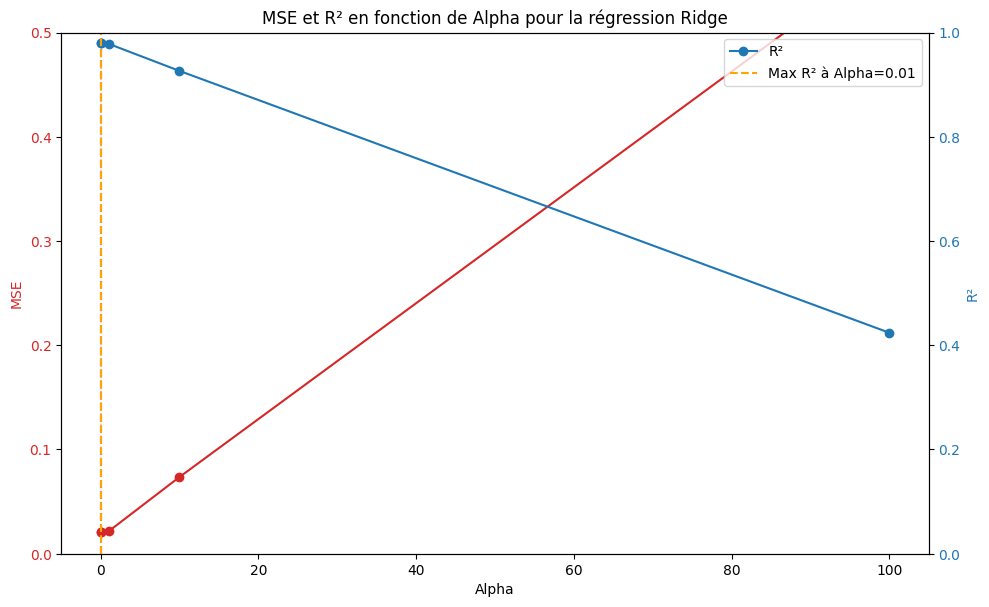

In [133]:
import matplotlib.pyplot as plt

# Liste des valeurs d'alpha
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

# Visualisation des résultats pour chaque alpha
fig, ax1 = plt.subplots(figsize=(10, 6))

# Configuration de l'axe 1 pour le MSE
color = 'tab:red'
ax1.set_xlabel('Alpha')
ax1.set_ylabel('MSE', color=color)
ax1.plot(alphas, list(ridge_mse.values()), label="MSE", color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(0, 0.5)  # Ajustez la plage selon les valeurs MSE

# Configuration de l'axe 2 pour le R²
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('R²', color=color)
ax2.plot(alphas, list(ridge_r2.values()), label="R²", color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(0, 1)  # Ajustez la plage selon les valeurs R²

# Ajouter des lignes pour les valeurs minimales de MSE et maximales de R²
min_mse = min(ridge_mse, key=ridge_mse.get)
max_r2 = max(ridge_r2, key=ridge_r2.get)

# Lignes de min MSE et max R²
ax1.axvline(x=min_mse, color='r', linestyle='--', label=f'Min MSE à Alpha={min_mse}')
ax2.axvline(x=max_r2, color='orange', linestyle='--', label=f'Max R² à Alpha={max_r2}')

# Ajuster la mise en page pour éviter que le texte ne se chevauche
fig.tight_layout()

# Ajouter un titre
plt.title('MSE et R² en fonction de Alpha pour la régression Ridge')

# Afficher le graphique
plt.legend()
plt.show()


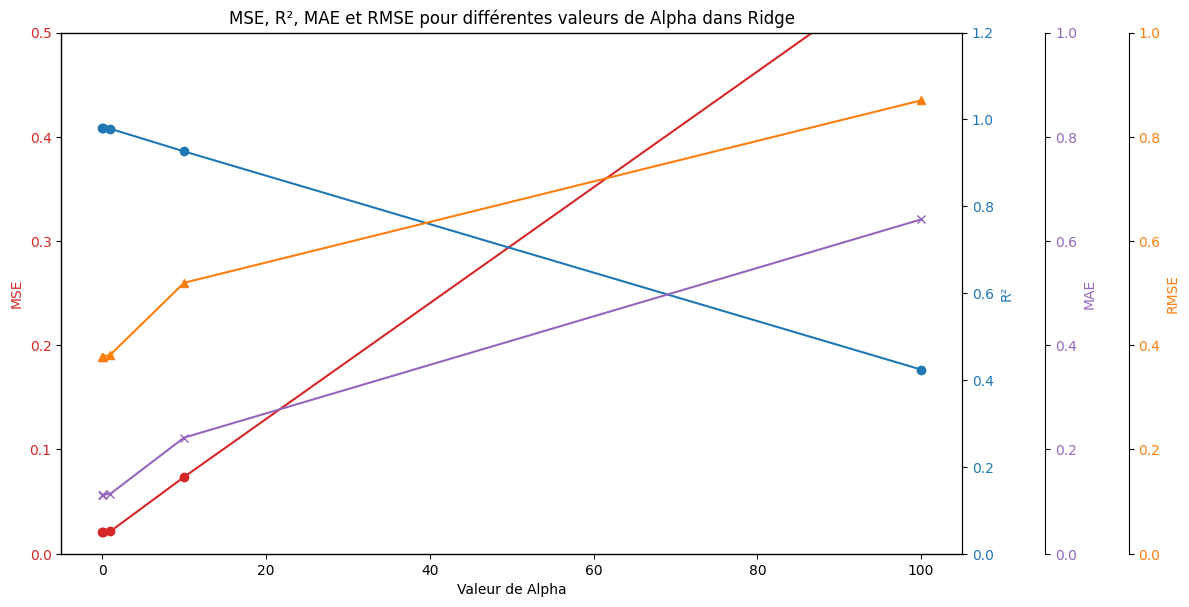

In [134]:

# Visualisation des résultats pour Ridge
fig, ax1 = plt.subplots(figsize=(12, 6))

# Configuration de l'axe 1 pour le MSE
color = 'tab:red'
ax1.set_xlabel('Valeur de Alpha')
ax1.set_ylabel('MSE', color=color)
ax1.plot(alphas, list(ridge_mse.values()), label="MSE", color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 0.5)  # Ajuste en fonction de tes données

# Configuration de l'axe 2 pour le R²
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('R²', color=color)
ax2.plot(alphas, list(ridge_r2.values()), label="R²", color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 1.2)  # Ajuste en fonction de tes données

# Configuration de l'axe 3 pour le MAE
ax3 = ax1.twinx()
color = 'tab:purple'
ax3.spines['right'].set_position(('outward', 60))  # Décalage de l'axe pour éviter le chevauchement
ax3.set_ylabel('MAE', color=color)
ax3.plot(alphas, list(ridge_mae.values()), label="MAE", color=color, marker='x')
ax3.tick_params(axis='y', labelcolor=color)
ax3.set_ylim(0, 1)  # Ajuste en fonction de tes données

# Configuration de l'axe 4 pour le RMSE
ax4 = ax1.twinx()
color = 'tab:orange'
ax4.spines['right'].set_position(('outward', 120))  # Décalage supplémentaire pour éviter le chevauchement
ax4.set_ylabel('RMSE', color=color)
ax4.plot(alphas, list(ridge_rmse.values()), label="RMSE", color=color, marker='^')
ax4.tick_params(axis='y', labelcolor=color)
ax4.set_ylim(0, 1)  # Ajuste en fonction de tes données

# Ajuster la mise en page pour éviter que le texte ne se chevauche
fig.tight_layout()

# Ajouter un titre
plt.title('MSE, R², MAE et RMSE pour différentes valeurs de Alpha dans Ridge')

# Afficher le graphique
plt.show()


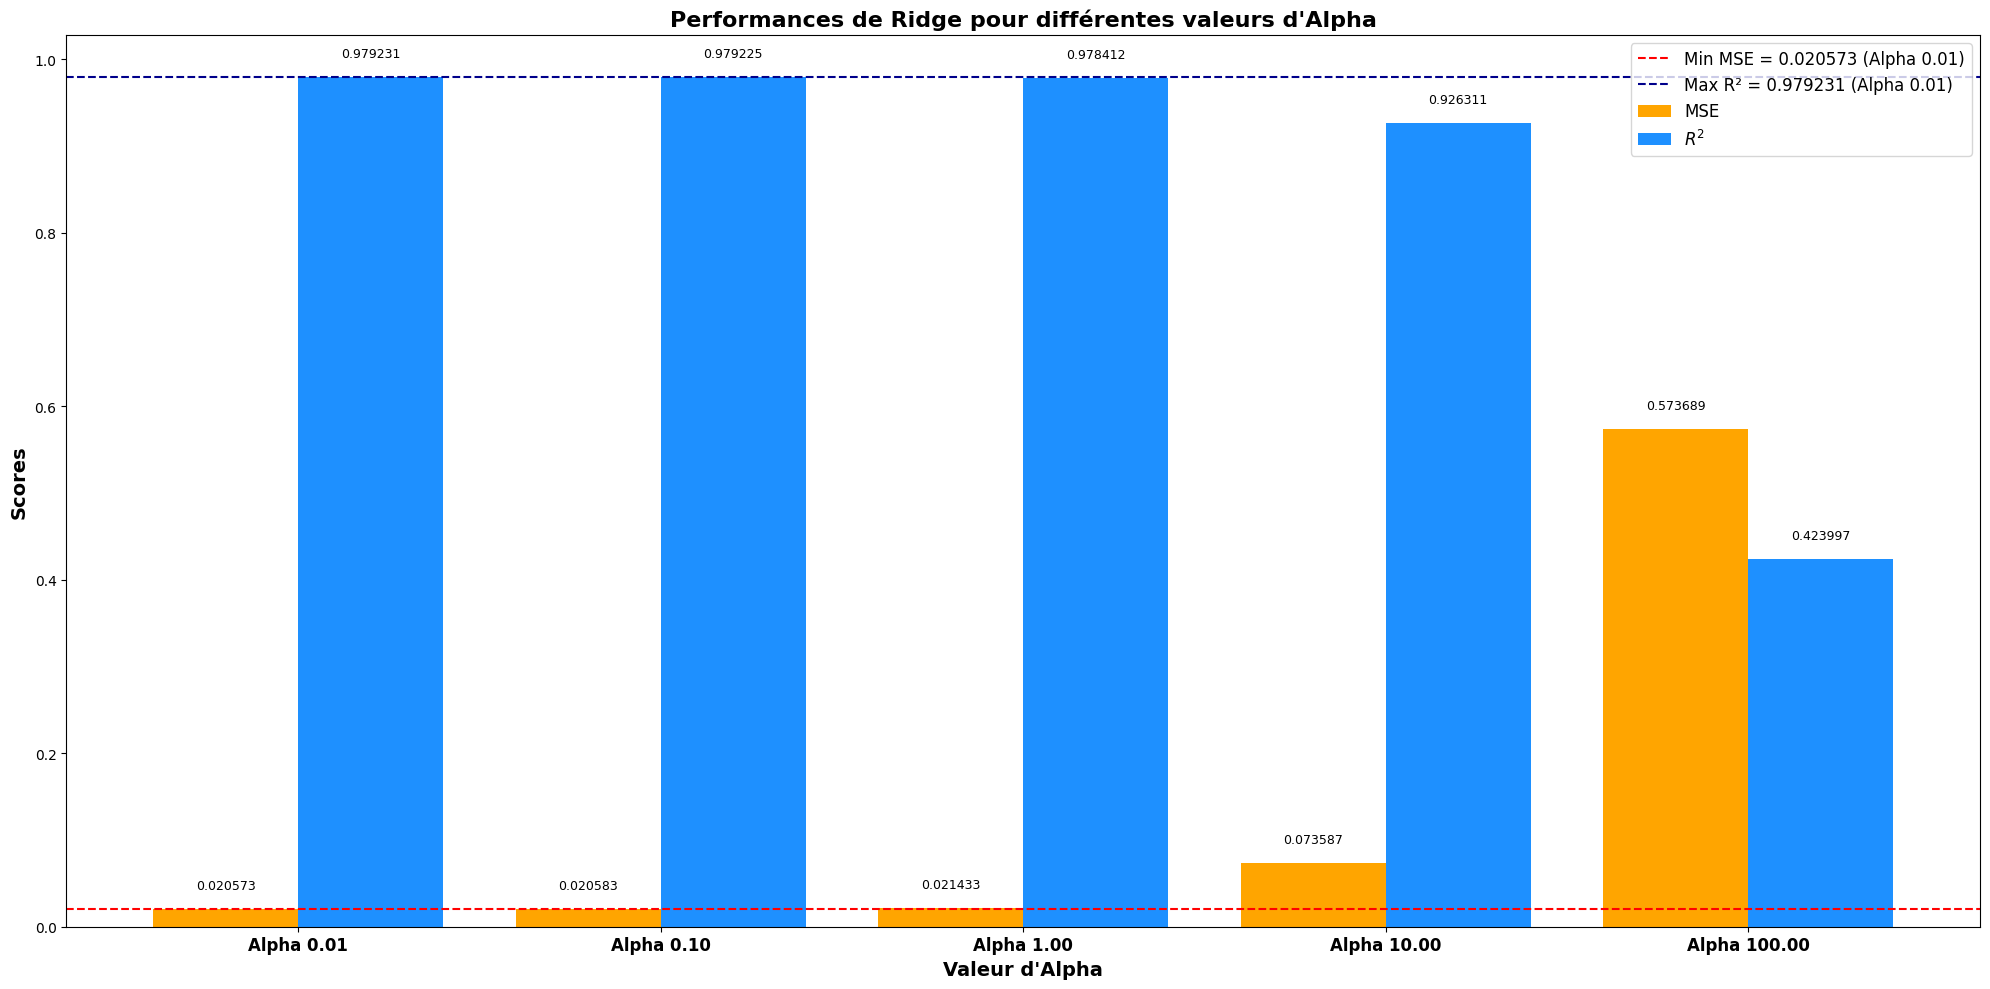

In [135]:

# Données pour Ridge
alphas_ridge = list(ridge_mse.keys())  # Valeurs d'alpha pour Ridge
mse_ridge = list(ridge_mse.values())  # MSE pour Ridge
r2_ridge = list(ridge_r2.values())    # R² pour Ridge

# Configuration du graphique Ridge
fig, ax = plt.subplots(figsize=(20, 10))
bar_width = 0.4
index = np.arange(len(alphas_ridge))  # Positions des barres

# Barres pour MSE et R²
bar_mse = ax.bar(index - bar_width / 2, mse_ridge, bar_width, label='MSE', color='orange')
bar_r2 = ax.bar(index + bar_width / 2, r2_ridge, bar_width, label='$R^2$', color='dodgerblue')

# Titres et labels
ax.set_xlabel('Valeur d\'Alpha', fontsize=14, fontweight='bold')
ax.set_ylabel('Scores', fontsize=14, fontweight='bold')
ax.set_title("Performances de Ridge pour différentes valeurs d'Alpha", fontsize=16, fontweight='bold')
ax.set_xticks(index)
ax.set_xticklabels([f'Alpha {alpha:.2f}' for alpha in alphas_ridge], fontsize=12, fontweight='bold')

# Ajouter une légende
ax.legend(fontsize=10)

# Ajouter les valeurs sur les barres
for i in range(len(alphas_ridge)):
    ax.text(bar_mse[i].get_x() + bar_mse[i].get_width() / 2, bar_mse[i].get_height() + 0.02,
            f'{mse_ridge[i]:.6f}', ha='center', va='bottom', fontsize=9)
    ax.text(bar_r2[i].get_x() + bar_r2[i].get_width() / 2, bar_r2[i].get_height() + 0.02,
            f'{r2_ridge[i]:.6f}', ha='center', va='bottom', fontsize=9)

# Tracer la ligne pour la valeur minimale de MSE
min_mse = np.min(mse_ridge)
min_mse_alpha = alphas_ridge[np.argmin(mse_ridge)]
ax.axhline(y=min_mse, color='red', linestyle='--', label=f'Min MSE = {min_mse:.6f} (Alpha {min_mse_alpha:.2f})')

# Tracer la ligne pour la valeur maximale de R²
max_r2 = np.max(r2_ridge)
max_r2_alpha = alphas_ridge[np.argmax(r2_ridge)]
ax.axhline(y=max_r2, color='darkblue', linestyle='--', label=f'Max R² = {max_r2:.6f} (Alpha {max_r2_alpha:.2f})')

# Ajuster la mise en page
plt.tight_layout()
plt.legend(fontsize=12)
plt.show()


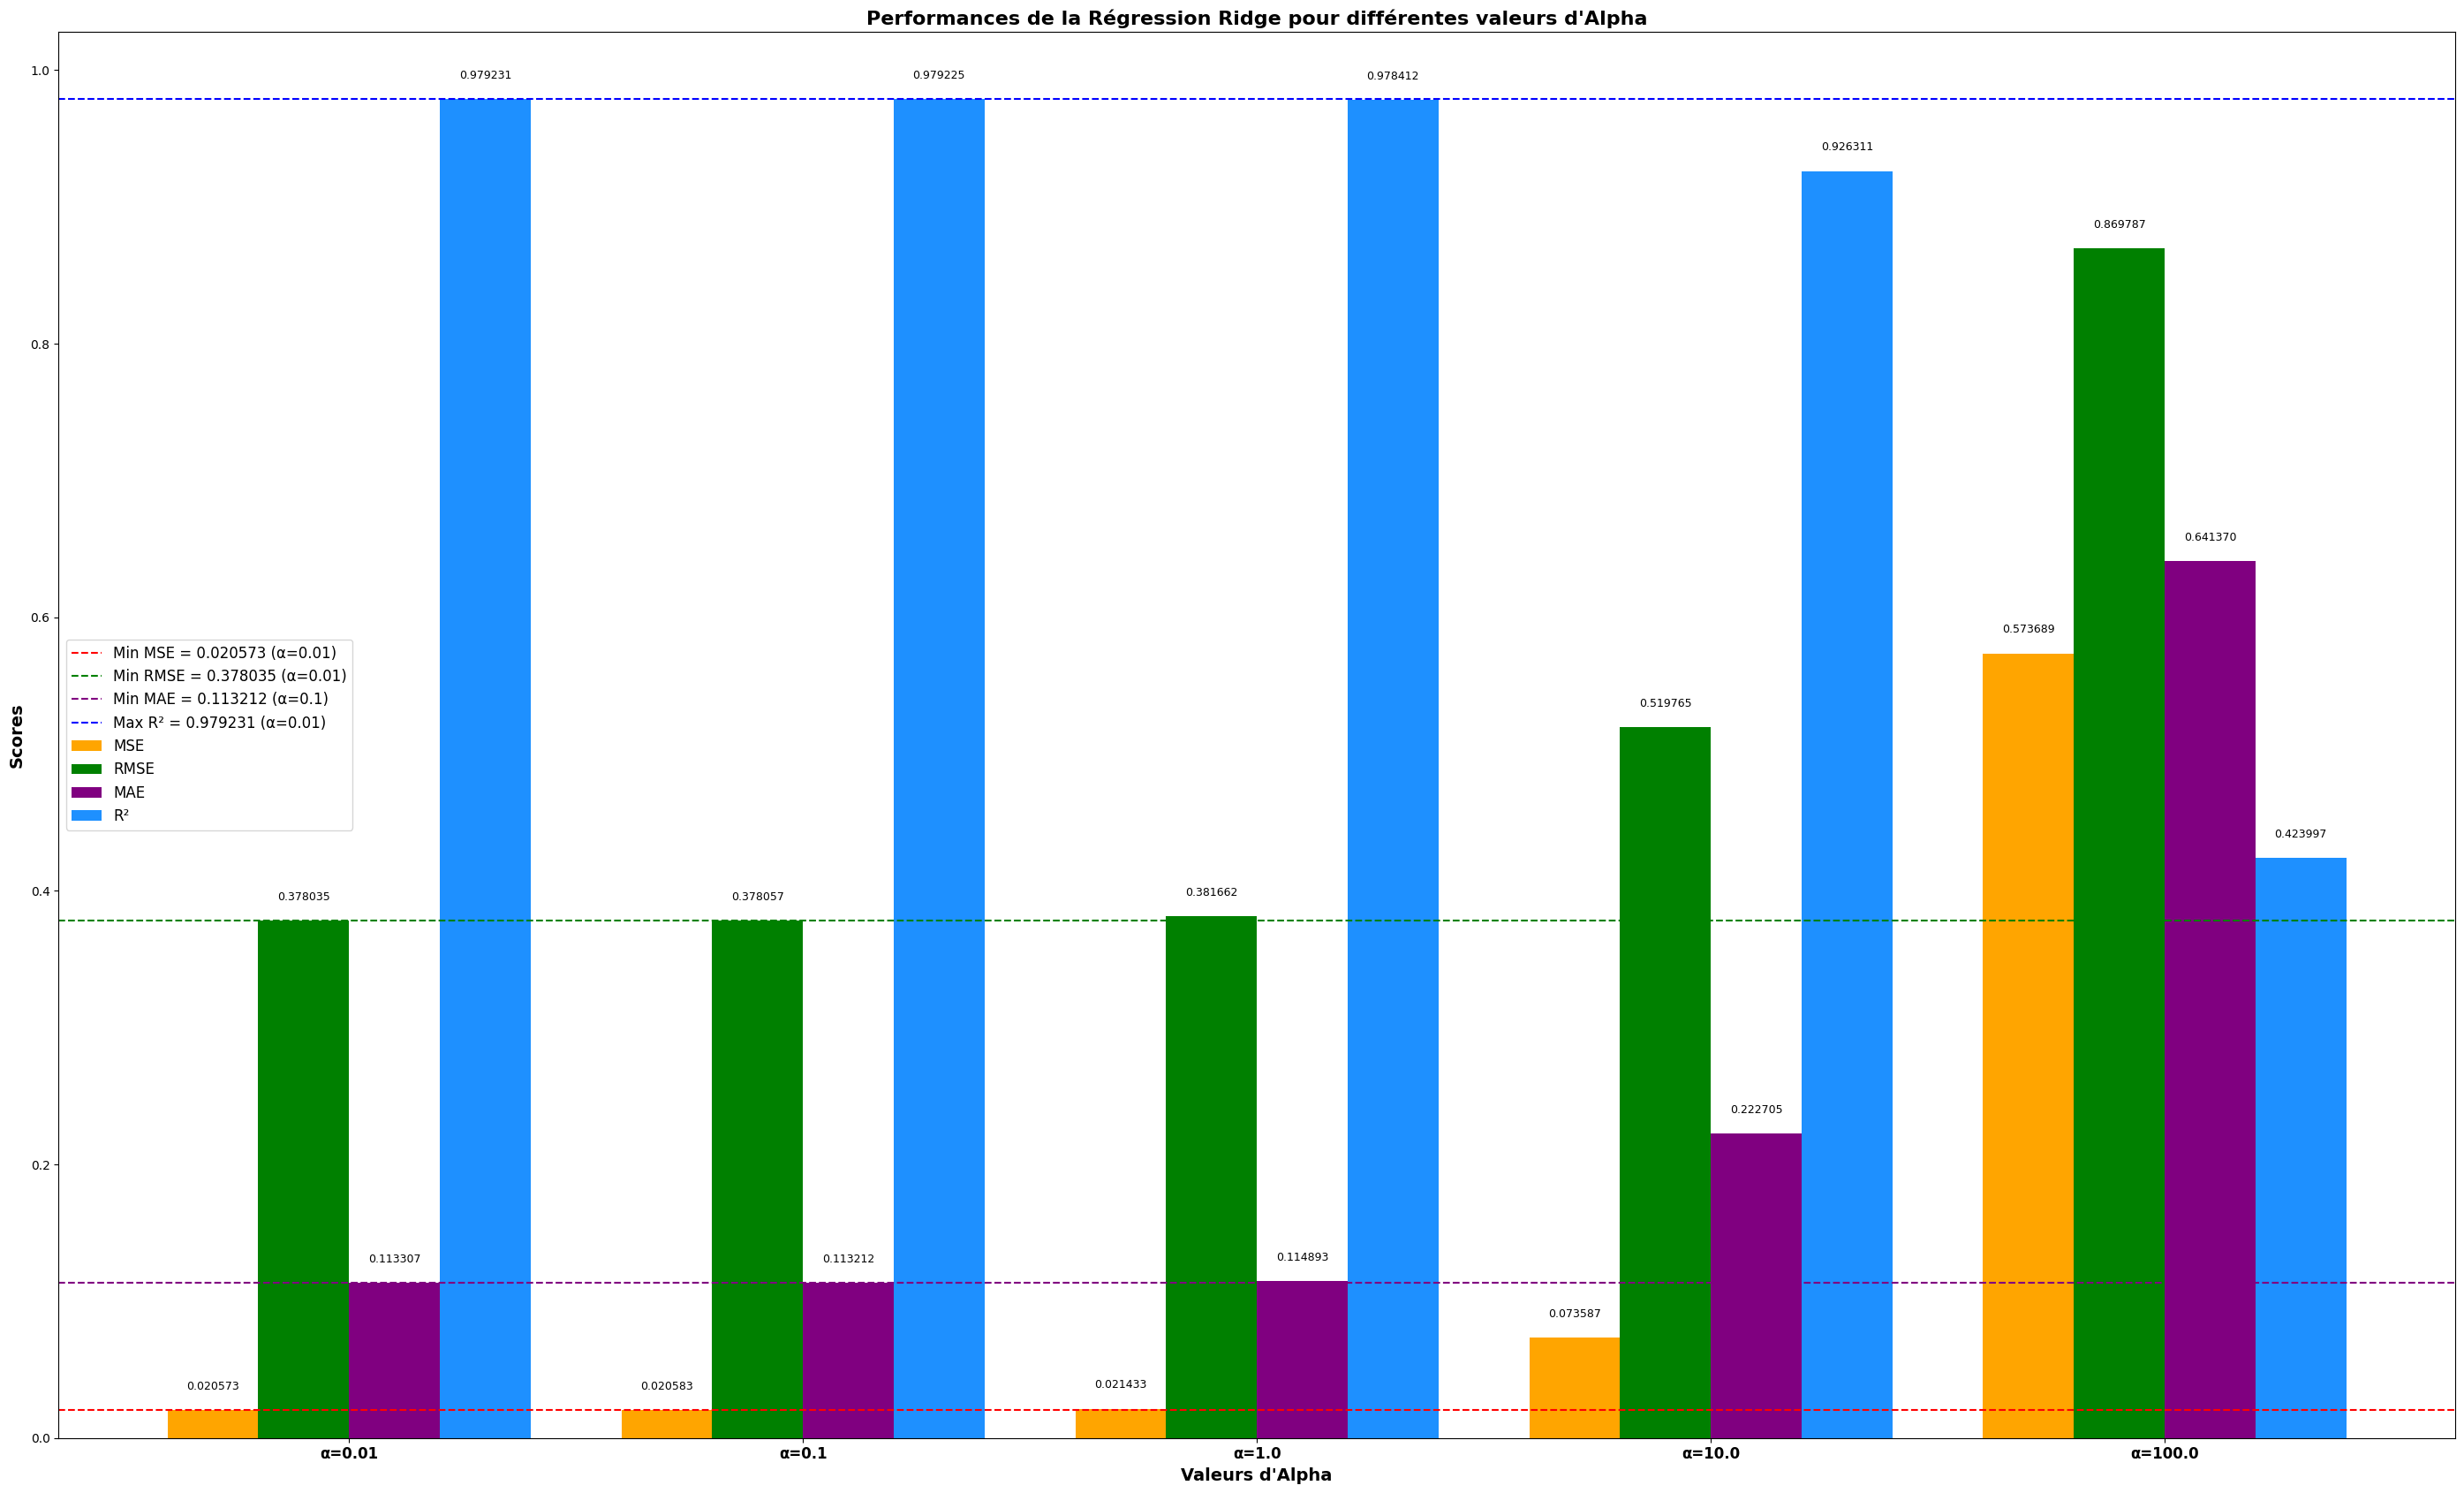

In [136]:


# Extraction des données (alphas et métriques)
alphas = list(ridge_mse.keys())  # Les valeurs d'alpha
mse_values = list(ridge_mse.values())  # MSE pour chaque alpha
rmse_values = list(ridge_rmse.values())  # RMSE pour chaque alpha
mae_values = list(ridge_mae.values())  # MAE pour chaque alpha
r2_values = list(ridge_r2.values())  # R² pour chaque alpha

# Configuration du graphique
fig, ax = plt.subplots(figsize=(28, 17))
bar_width = 0.2  # Largeur des barres
index = np.arange(len(alphas))  # Positions des barres sur l'axe x

# Barres pour les métriques
bar_mse = ax.bar(index - 3*bar_width/2, mse_values, bar_width, label='MSE', color='orange')
bar_rmse = ax.bar(index - bar_width/2, rmse_values, bar_width, label='RMSE', color='green')
bar_mae = ax.bar(index + bar_width/2, mae_values, bar_width, label='MAE', color='purple')
bar_r2 = ax.bar(index + 3*bar_width/2, r2_values, bar_width, label='R²', color='dodgerblue')

# Titres et labels
ax.set_xlabel("Valeurs d'Alpha", fontsize=14, fontweight='bold')
ax.set_ylabel('Scores', fontsize=14, fontweight='bold')
ax.set_title("Performances de la Régression Ridge pour différentes valeurs d'Alpha", fontsize=16, fontweight='bold')
ax.set_xticks(index)
ax.set_xticklabels([f'α={alpha}' for alpha in alphas], fontsize=12, fontweight='bold')

# Ajouter une légende
ax.legend(fontsize=12)

# Ajouter les valeurs sur les barres
for i in range(len(alphas)):
    # MSE
    ax.text(bar_mse[i].get_x() + bar_mse[i].get_width() / 2, bar_mse[i].get_height() + 0.013,
            f'{mse_values[i]:.6f}', ha='center', va='bottom', fontsize=9)
    # RMSE
    ax.text(bar_rmse[i].get_x() + bar_rmse[i].get_width() / 2, bar_rmse[i].get_height() + 0.013,
            f'{rmse_values[i]:.6f}', ha='center', va='bottom', fontsize=9)
    # MAE
    ax.text(bar_mae[i].get_x() + bar_mae[i].get_width() / 2, bar_mae[i].get_height() + 0.013,
            f'{mae_values[i]:.6f}', ha='center', va='bottom', fontsize=9)
    # R²
    ax.text(bar_r2[i].get_x() + bar_r2[i].get_width() / 2, bar_r2[i].get_height() + 0.013,
            f'{r2_values[i]:.6f}', ha='center', va='bottom', fontsize=9)

# Tracer des lignes pour les valeurs optimales avec les détails d'alpha dans la légende
ax.axhline(y=min(mse_values), color='red', linestyle='--', label=f"Min MSE = {min(mse_values):.6f} (α={min_mse_alpha})")
ax.axhline(y=min(rmse_values), color='green', linestyle='--', label=f"Min RMSE = {min(rmse_values):.6f} (α={min_rmse_alpha})")
ax.axhline(y=min(mae_values), color='purple', linestyle='--', label=f"Min MAE = {min(mae_values):.6f} (α={min_mae_alpha})")
ax.axhline(y=max(r2_values), color='blue', linestyle='--', label=f"Max R² = {max(r2_values):.6f} (α={max_r2_alpha})")

# Ajuster la mise en page pour éviter que le texte ne se chevauche
plt.tight_layout()

# Ajouter une légende pour les lignes
ax.legend(fontsize=12)

# Afficher le graphique
plt.show()


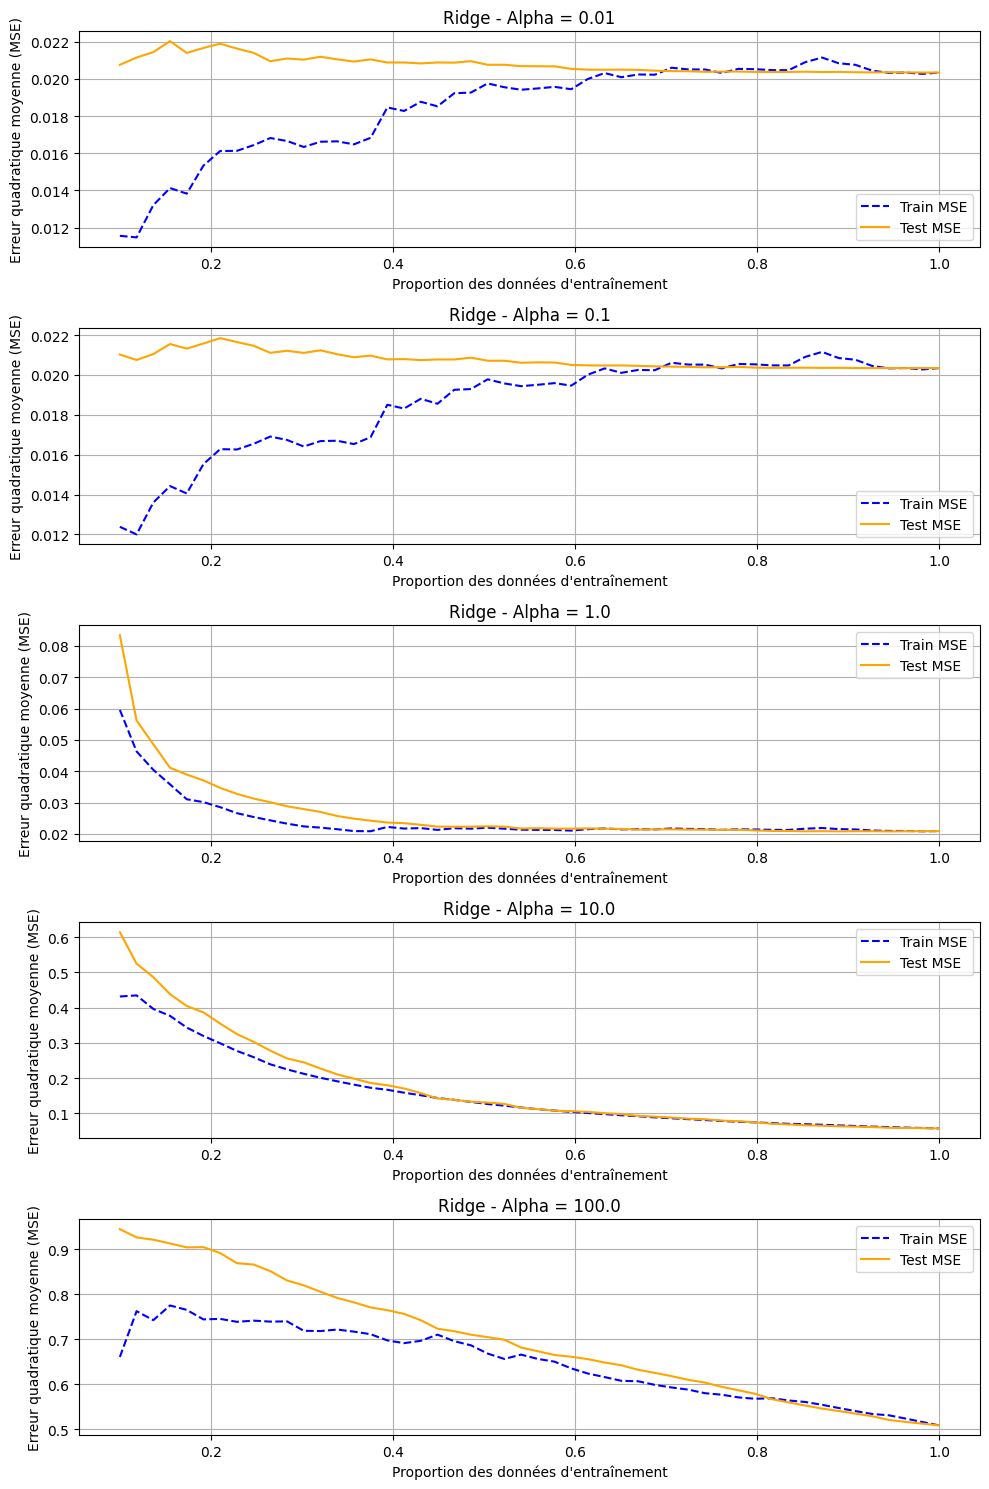

In [137]:

# Configuration des tailles d'échantillons d'entraînement
train_sizes = np.linspace(0.1, 1.0, 50)
alphas_ridge = [0.01, 0.1, 1.0, 10.0, 100.0]  # Valeurs d'alpha à tester

# Configuration des sous-graphes pour Ridge
fig, axes = plt.subplots(len(alphas_ridge), figsize=(10, 15))
axes = axes.flatten()

# Boucle sur chaque valeur d'alpha pour Ridge
for i, alpha in enumerate(alphas_ridge):
    mse_train = []
    mse_test = []
    
    for size in train_sizes:
        # Création d'un sous-ensemble des données d'entraînement
        size = int(size * len(X))  # Taille de l'échantillon d'entraînement
        X_train, y_train = X[:size], y[:size]
        
        # Initialisation et entraînement du modèle Ridge
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_train, y_train)
        
        # Calcul du MSE pour l'échantillon d'entraînement
        y_pred_train = ridge.predict(X_train)
        mse_train.append(mean_squared_error_custom(y_train, y_pred_train))
        
        # Calcul du MSE pour l'échantillon de test
        y_pred_test = ridge.predict(X)
        mse_test.append(mean_squared_error_custom(y, y_pred_test))
    
    # Tracer les courbes d'apprentissage
    ax = axes[i]
    ax.plot(train_sizes, mse_train, label='Train MSE', linestyle='--', color='blue')
    ax.plot(train_sizes, mse_test, label='Test MSE', linestyle='-', color='orange')
    
    ax.set_title(f'Ridge - Alpha = {alpha}')
    ax.set_xlabel('Proportion des données d\'entraînement')
    ax.set_ylabel('Erreur quadratique moyenne (MSE)')
    ax.legend()
    ax.grid(True)

# Ajuster la mise en page
fig.tight_layout()
plt.show()


Alpha = 0.01 (MSE, RMSE et R² optimaux) :

Le modèle atteint un MSE minimal de 0.0205728, un RMSE minimal de 0.378, et un R² maximal de 0.979231, indiquant une performance globale optimale.
Le MSE sur les données d'entraînement est proche de celui des données de test, ce qui suggère que le modèle est bien équilibré et ne souffre ni de sous-apprentissage ni de sur-apprentissage.
L'évolution de l'erreur montre une stabilisation lorsque la proportion des données d'entraînement augmente.

Alpha = 0.1 (MAE optimal) :

Avec un MAE minimal de 0.1132124, ce paramètre montre que le modèle est performant en termes d'erreur absolue moyenne, indiquant une précision élevée pour les prédictions individuelles.
Cependant, la courbe du MSE (surtout pour les données de test) semble légèrement plus élevée comparée à Alpha = 0.01, ce qui pourrait indiquer un compromis entre différentes métriques.

Alpha plus élevé (10.0 et 100.0) :

Pour ces valeurs, les courbes MSE (train et test) augmentent de manière significative. Cela indique une régularisation excessive, où le modèle devient trop biaisé et perd en précision.
L'écart entre le MSE d'entraînement et de test se réduit, ce qui est un signe que le modèle est moins complexe, mais au prix d'une performance moindre.

Analyse globale :

Les valeurs faibles d'Alpha (0.01 et 0.1) offrent les meilleures performances sur l'ensemble des métriques.
Alpha = 0.01 semble optimal pour la majorité des critères (MSE, RMSE, R²), ce qui en fait le choix le plus approprié pour ce modèle Ridge.
La régularisation (via Alpha) contrôle bien la complexité du modèle, mais des valeurs trop élevées d'Alpha nuisent à sa capacité prédictive.

# Lasso

In [138]:

# Fonction de régression Lasso avec descente de coordonnées
def lasso_coordinate_descent(X, y, alpha, max_iter=1000, tol=1e-4):
    m, n = X.shape
    theta = np.zeros(n)
    for iteration in range(max_iter):
        theta_old = theta.copy()
        for j in range(n):
            # Résidu partiel
            y_pred = X @ theta
            residual = y - y_pred + theta[j] * X[:, j]
            # Calcul de rho_j
            rho_j = np.dot(X[:, j], residual)
            # Mise à jour de theta[j] avec seuil doux
            if j == 0:  # Pas de régularisation pour le biais
                theta[j] = rho_j / m
            else:
                if rho_j < -alpha * m:
                    theta[j] = (rho_j + alpha * m) / np.sum(X[:, j] ** 2)
                elif rho_j > alpha * m:
                    theta[j] = (rho_j - alpha * m) / np.sum(X[:, j] ** 2)
                else:
                    theta[j] = 0
        # Vérification de la convergence
        if np.max(np.abs(theta - theta_old)) < tol:
            break
    return theta

In [139]:


# Extraction des données
X = df[['biking', 'smoking']].values  # Variables indépendantes
y = df['heart.disease'].values        # Variable dépendante

# Ajout de la colonne de biais (intercept) à X
X_bias = np.hstack((np.ones((X.shape[0], 1)), X))

# Initialisation de la validation croisée K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold CV

# Liste des valeurs d'alpha à tester
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

# Dictionnaires pour stocker les résultats pour chaque alpha
lasso_mse = {}
lasso_mae = {}
lasso_rmse = {}
lasso_r2 = {}


# Boucle sur les différentes valeurs d'alpha
for alpha in alphas:
    mse_lasso = []
    mae_lasso = []
    rmse_lasso = []
    r2_lasso = []
    
    # Boucle sur les folds
    for train_index, test_index in kf.split(X_bias):
        # Division des données en train et test
        X_train, X_test = X_bias[train_index], X_bias[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Entraînement du modèle Lasso
        theta = lasso_coordinate_descent(X_train, y_train, alpha)
        
        # Prédictions sur l'ensemble de test
        y_test_pred = X_test @ theta
        
        # Calcul des métriques
        mse_lasso.append(mean_squared_error_custom(y_test, y_test_pred))
        mae_lasso.append(mean_absolute_error_custom(y_test, y_test_pred))
        rmse_lasso.append(np.sqrt(mean_squared_error_custom(y_test, y_test_pred)))
        r2_lasso.append(r2_score_custom(y_test, y_test_pred))
    
    # Stockage des résultats pour chaque alpha
    lasso_mse[alpha] = np.mean(mse_lasso)
    lasso_mae[alpha] = np.mean(mae_lasso)
    lasso_rmse[alpha] = np.mean(rmse_lasso)
    lasso_r2[alpha] = np.mean(r2_lasso)


In [140]:
# Création d'un DataFrame pour afficher les résultats sous forme de tableau
results_lasso = pd.DataFrame({
    'Alpha': alphas,
    'MSE moyen': [lasso_mse[alpha] for alpha in alphas],
    'MAE moyen': [lasso_mae[alpha] for alpha in alphas],
    'RMSE moyen': [lasso_rmse[alpha] for alpha in alphas],
    'R² moyen': [lasso_r2[alpha] for alpha in alphas]
})

# Affichage du tableau des résultats
print("Régression Lasso avec validation croisée :")
print("Résultats pour différents alpha :")
results_lasso


Régression Lasso avec validation croisée :
Résultats pour différents alpha :


Alpha  MSE moyen  MAE moyen  RMSE moyen  R² moyen
0    0.01   0.023077   0.119585    0.151448  0.976765
1    0.10   0.243706   0.401871    0.493019  0.755479
2    1.00   0.999661   0.849437    0.999278 -0.004543
3   10.00   0.999661   0.849437    0.999278 -0.004543
4  100.00   0.999661   0.849437    0.999278 -0.004543

In [141]:

# Trouver les alpha correspondants aux minimums et maximums des métriques
mse_lasso_min_alpha = min(lasso_mse, key=lasso_mse.get)
mae_lasso_min_alpha = min(lasso_mae, key=lasso_mae.get)
rmse_lasso_min_alpha = min(lasso_rmse, key=lasso_rmse.get)
r2_lasso_max_alpha = max(lasso_r2, key=lasso_r2.get)

# Affichage des résultats optimaux
print(f"Alpha avec le minimum MSE : {mse_lasso_min_alpha} avec MSE = {lasso_mse[mse_lasso_min_alpha]:.7f}")
print(f"Alpha avec le minimum MAE : {mae_lasso_min_alpha} avec MAE = {lasso_mae[mae_lasso_min_alpha]:.7f}")
print(f"Alpha avec le minimum RMSE : {rmse_lasso_min_alpha} avec RMSE = {lasso_rmse[rmse_lasso_min_alpha]:.3f}")
print(f"Alpha avec le maximum R² : {r2_lasso_max_alpha} avec R² = {lasso_r2[r2_lasso_max_alpha]:.6f}")


Alpha avec le minimum MSE : 0.01 avec MSE = 0.0230772
Alpha avec le minimum MAE : 0.01 avec MAE = 0.1195848
Alpha avec le minimum RMSE : 0.01 avec RMSE = 0.151
Alpha avec le maximum R² : 0.01 avec R² = 0.976765


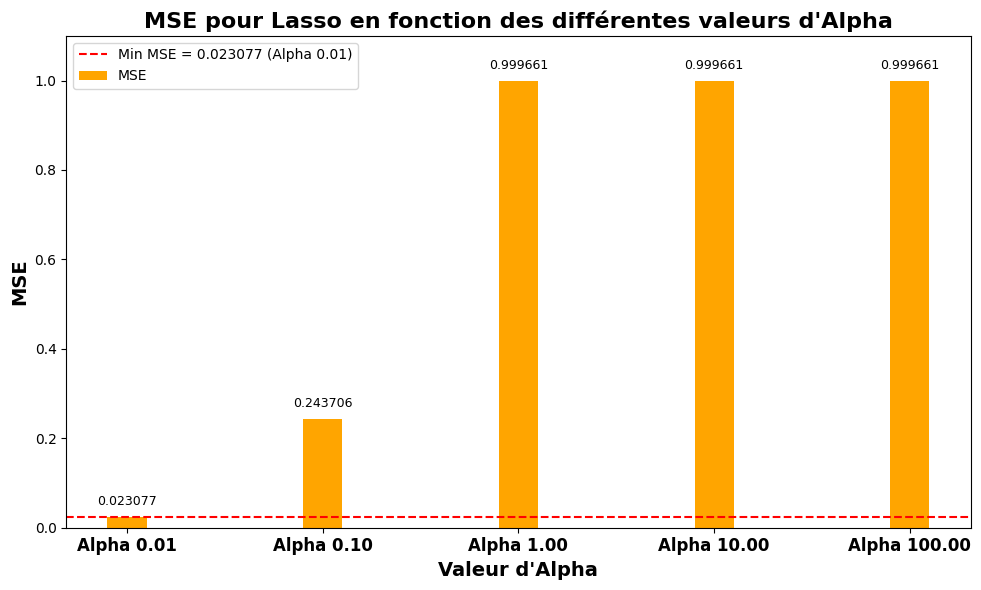

In [142]:
# Données pour Lasso
alphas_lasso = list(lasso_mse.keys())  # Valeurs d'alpha pour Lasso
mse_lasso = list(lasso_mse.values())  # MSE pour Lasso
mae_lasso = list(lasso_mae.values())  # MAE pour Lasso
rmse_lasso = list(lasso_rmse.values()) # RMSE pour Lasso
r2_lasso = list(lasso_r2.values())    # R² pour Lasso

# MSE pour Lasso
fig, ax = plt.subplots(figsize=(10, 6))

bar_mse = ax.bar(index, mse_lasso, bar_width, label='MSE', color='orange')

ax.set_xlabel('Valeur d\'Alpha', fontsize=14, fontweight='bold')
ax.set_ylabel('MSE', fontsize=14, fontweight='bold')
ax.set_title("MSE pour Lasso en fonction des différentes valeurs d'Alpha", fontsize=16, fontweight='bold')
ax.set_xticks(index)
ax.set_xticklabels([f'Alpha {alpha:.2f}' for alpha in alphas_lasso], fontsize=12, fontweight='bold')
plt.ylim(0, 1.1)
# Ajouter les valeurs sur les barres
for i in range(len(alphas_lasso)):
    ax.text(bar_mse[i].get_x() + bar_mse[i].get_width() / 2, bar_mse[i].get_height() + 0.02,
            f'{mse_lasso[i]:.6f}', ha='center', va='bottom', fontsize=9)

# Ajouter une ligne pour le minimum de MSE
min_mse = np.min(mse_lasso)
min_mse_alpha = alphas_lasso[np.argmin(mse_lasso)]
ax.axhline(y=min_mse, color='red', linestyle='--', label=f'Min MSE = {min_mse:.6f} (Alpha {min_mse_alpha:.2f})')

# Ajouter la légende
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()



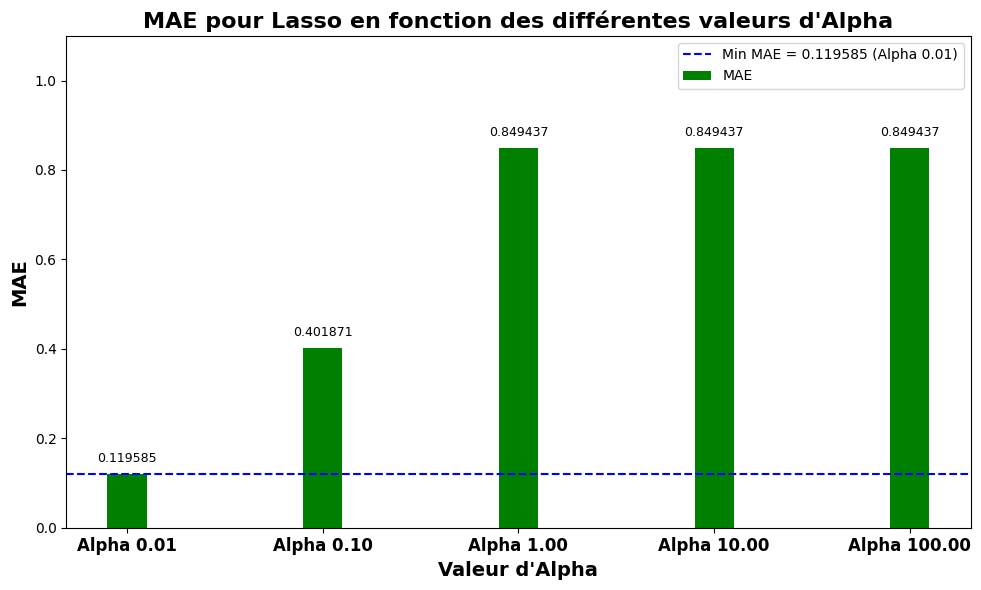

In [143]:

# MAE pour Lasso
fig, ax = plt.subplots(figsize=(10, 6))

bar_mae = ax.bar(index, mae_lasso, bar_width, label='MAE', color='green')

ax.set_xlabel('Valeur d\'Alpha', fontsize=14, fontweight='bold')
ax.set_ylabel('MAE', fontsize=14, fontweight='bold')
ax.set_title("MAE pour Lasso en fonction des différentes valeurs d'Alpha", fontsize=16, fontweight='bold')
ax.set_xticks(index)
ax.set_xticklabels([f'Alpha {alpha:.2f}' for alpha in alphas_lasso], fontsize=12, fontweight='bold')

# Ajouter les valeurs sur les barres
for i in range(len(alphas_lasso)):
    ax.text(bar_mae[i].get_x() + bar_mae[i].get_width() / 2, bar_mae[i].get_height() + 0.02,
            f'{mae_lasso[i]:.6f}', ha='center', va='bottom', fontsize=9)
plt.ylim(0, 1.1)
# Ajouter une ligne pour le minimum de MAE
min_mae = np.min(mae_lasso)
min_mae_alpha = alphas_lasso[np.argmin(mae_lasso)]
ax.axhline(y=min_mae, color='blue', linestyle='--', label=f'Min MAE = {min_mae:.6f} (Alpha {min_mae_alpha:.2f})')

# Ajouter la légende
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()


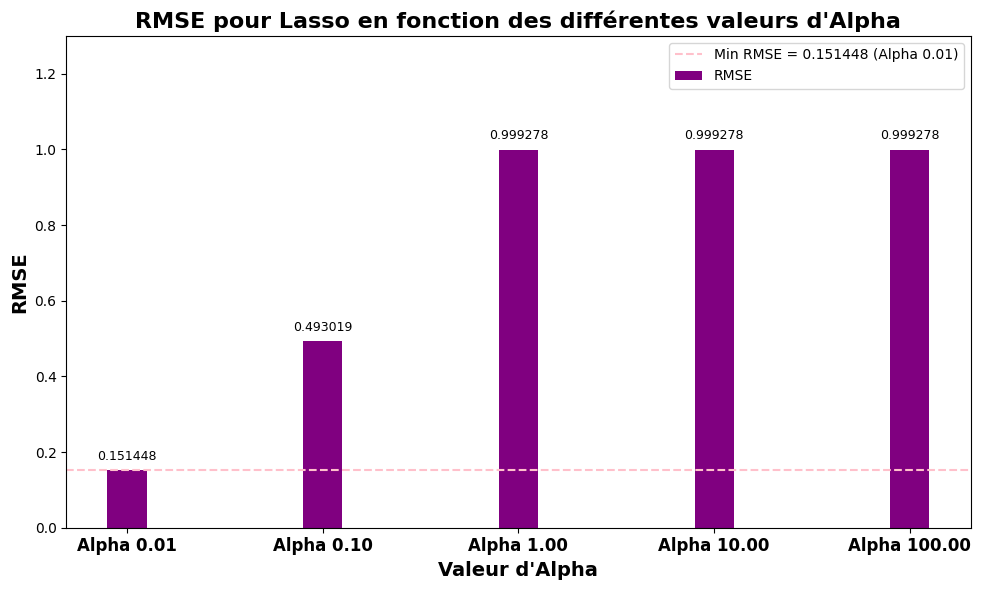

In [144]:
# RMSE pour Lasso
fig, ax = plt.subplots(figsize=(10, 6))
bar_rmse = ax.bar(index, rmse_lasso, bar_width, label='RMSE', color='purple')
ax.set_xlabel('Valeur d\'Alpha', fontsize=14, fontweight='bold')
ax.set_ylabel('RMSE', fontsize=14, fontweight='bold')
ax.set_title("RMSE pour Lasso en fonction des différentes valeurs d'Alpha", fontsize=16, fontweight='bold')
ax.set_xticks(index)
ax.set_xticklabels([f'Alpha {alpha:.2f}' for alpha in alphas_lasso], fontsize=12, fontweight='bold')
plt.ylim(0, 1.3)

# Ajouter les valeurs sur les barres
for i in range(len(alphas_lasso)):
    ax.text(bar_rmse[i].get_x() + bar_rmse[i].get_width() / 2, bar_rmse[i].get_height() + 0.02,
            f'{rmse_lasso[i]:.6f}', ha='center', va='bottom', fontsize=9)

# Ajouter une ligne pour le minimum de RMSE
min_rmse = np.min(rmse_lasso)
min_rmse_alpha = alphas_lasso[np.argmin(rmse_lasso)]
ax.axhline(y=min_rmse, color='pink', linestyle='--', label=f'Min RMSE = {min_rmse:.6f} (Alpha {min_rmse_alpha:.2f})')

# Ajouter la légende
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()


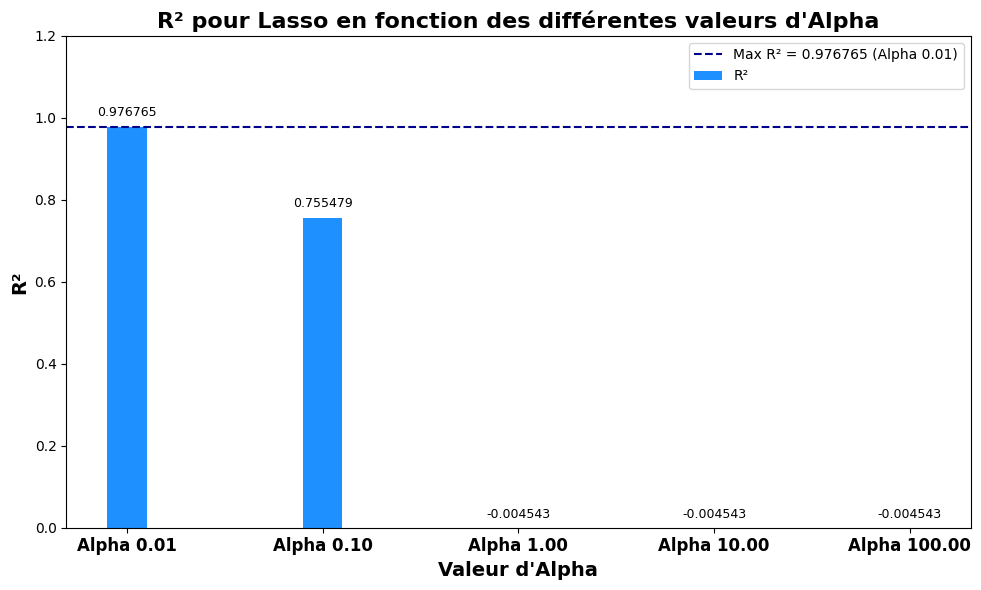

In [145]:
# R² pour Lasso
fig, ax = plt.subplots(figsize=(10, 6))
bar_r2 = ax.bar(index, r2_lasso, bar_width, label='R²', color='dodgerblue')
ax.set_xlabel('Valeur d\'Alpha', fontsize=14, fontweight='bold')
ax.set_ylabel('R²', fontsize=14, fontweight='bold')
ax.set_title("R² pour Lasso en fonction des différentes valeurs d'Alpha", fontsize=16, fontweight='bold')
ax.set_xticks(index)
ax.set_xticklabels([f'Alpha {alpha:.2f}' for alpha in alphas_lasso], fontsize=12, fontweight='bold')

# Ajouter les valeurs sur les barres
for i in range(len(alphas_lasso)):
    ax.text(bar_r2[i].get_x() + bar_r2[i].get_width() / 2, bar_r2[i].get_height() + 0.02,
            f'{r2_lasso[i]:.6f}', ha='center', va='bottom', fontsize=9)

# Ajouter une ligne pour le maximum de R²
max_r2 = np.max(r2_lasso)
max_r2_alpha = alphas_lasso[np.argmax(r2_lasso)]
ax.axhline(y=max_r2, color='darkblue', linestyle='--', label=f'Max R² = {max_r2:.6f} (Alpha {max_r2_alpha:.2f})')
plt.ylim(0, 1.2)

# Ajouter la légende
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()


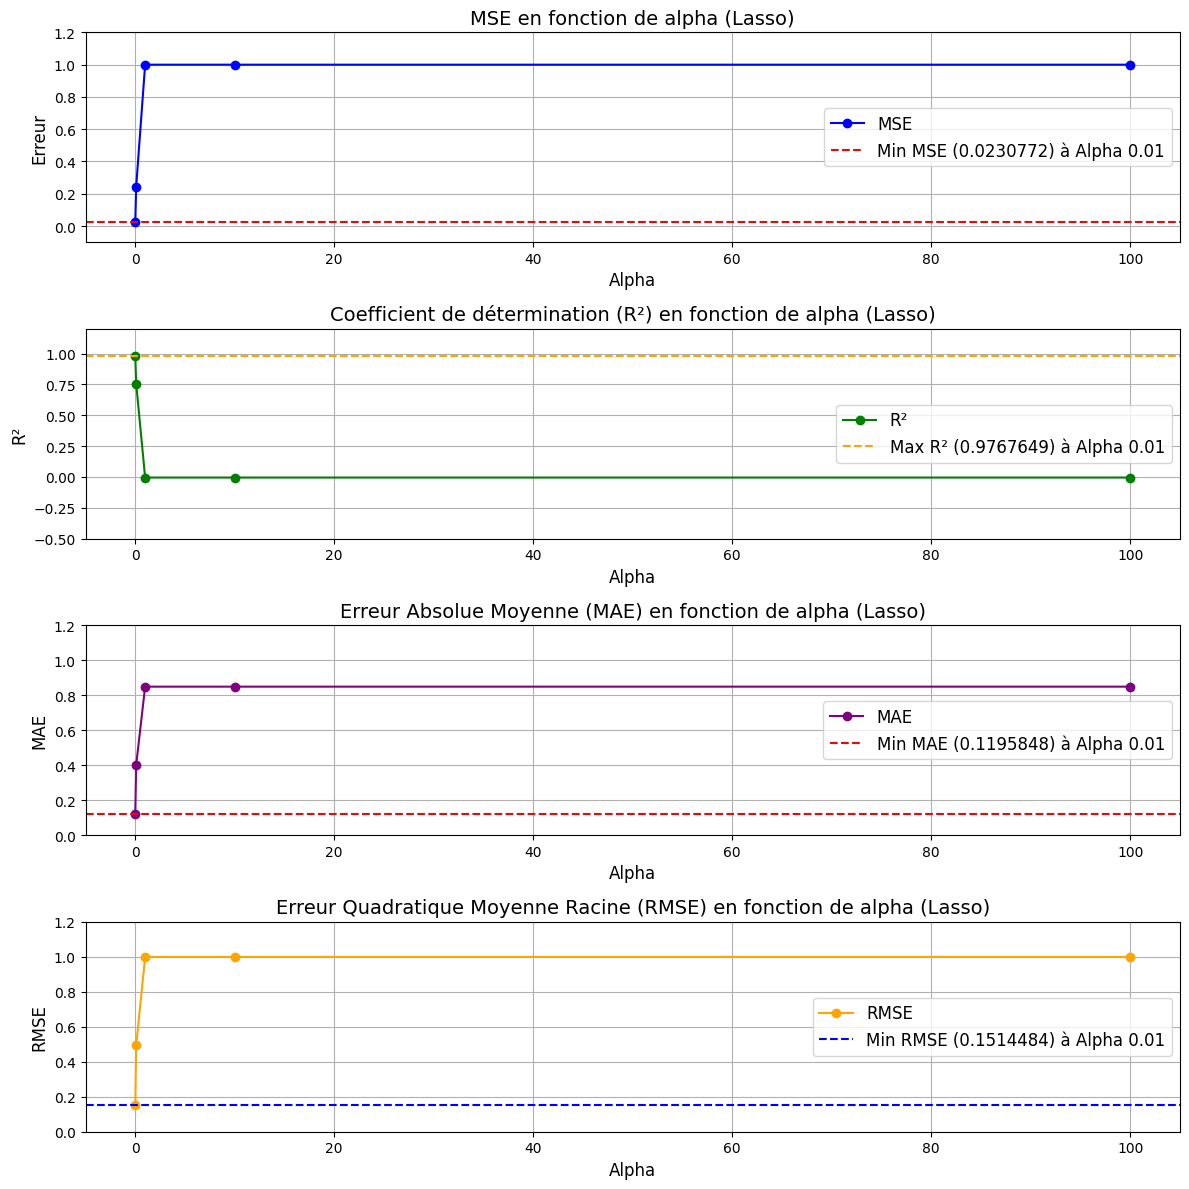

In [146]:

# Dictionnaires pour stocker les résultats de Lasso
lasso_mse = {alpha: np.mean(mse_lasso_e) for alpha, mse_lasso_e in lasso_mse.items()}
lasso_mae = {alpha: np.mean(mae_lasso_e) for alpha, mae_lasso_e in lasso_mae.items()}
lasso_rmse = {alpha: np.mean(rmse_lasso_e) for alpha, rmse_lasso_e in lasso_rmse.items()}
lasso_r2 = {alpha: np.mean(r2_lasso_e) for alpha, r2_lasso_e in lasso_r2.items()}

# Tracer MSE, R², MAE et RMSE en fonction d'alpha
plt.figure(figsize=(12, 12))  # Taille ajustée pour plus d'espace

# Tracé du MSE
plt.subplot(4, 1, 1)
plt.plot(alphas, list(lasso_mse.values()), marker='o', linestyle='-', color='b', label='MSE')
plt.title('MSE en fonction de alpha (Lasso)', fontsize=14)
plt.xlabel('Alpha', fontsize=12)
plt.ylabel('Erreur', fontsize=12)
plt.ylim(-0.1, 1.2) 
plt.grid(True)
plt.legend(fontsize=12)

# Ajouter une ligne horizontale à la valeur minimale de MSE
min_mse = np.min(list(lasso_mse.values()))
min_mse_alpha = alphas[np.argmin(list(lasso_mse.values()))]
plt.axhline(y=min_mse, color='r', linestyle='--', label=f'Min MSE ({min_mse:.7f}) à Alpha {min_mse_alpha}')
plt.legend(fontsize=12)

# Tracé du R²
plt.subplot(4, 1, 2)
plt.plot(alphas, list(lasso_r2.values()), marker='o', linestyle='-', color='g', label='R²')
plt.title('Coefficient de détermination (R²) en fonction de alpha (Lasso)', fontsize=14)
plt.xlabel('Alpha', fontsize=12)
plt.ylabel('R²', fontsize=12)
plt.ylim(-0.5, 1.2)  # Limite de l'axe y pour R² (entre 0 et 1)
plt.grid(True)
plt.legend(fontsize=12)

# Ajouter une ligne horizontale à la valeur maximale de R²
max_r2 = np.max(list(lasso_r2.values()))
max_r2_alpha = alphas[np.argmax(list(lasso_r2.values()))]
plt.axhline(y=max_r2, color='orange', linestyle='--', label=f'Max R² ({max_r2:.7f}) à Alpha {max_r2_alpha}')
plt.legend(fontsize=12)

# Tracé du MAE
plt.subplot(4, 1, 3)
plt.plot(alphas, list(lasso_mae.values()), marker='o', linestyle='-', color='purple', label='MAE')
plt.title('Erreur Absolue Moyenne (MAE) en fonction de alpha (Lasso)', fontsize=14)
plt.xlabel('Alpha', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.ylim(0, 1.2)
plt.grid(True)
plt.legend(fontsize=12)

# Ajouter une ligne horizontale à la valeur minimale de MAE
min_mae = np.min(list(lasso_mae.values()))
min_mae_alpha = alphas[np.argmin(list(lasso_mae.values()))]
plt.axhline(y=min_mae, color='r', linestyle='--', label=f'Min MAE ({min_mae:.7f}) à Alpha {min_mae_alpha}')
plt.legend(fontsize=12)

# Tracé du RMSE
plt.subplot(4, 1, 4)
plt.plot(alphas, list(lasso_rmse.values()), marker='o', linestyle='-', color='orange', label='RMSE')
plt.title('Erreur Quadratique Moyenne Racine (RMSE) en fonction de alpha (Lasso)', fontsize=14)
plt.xlabel('Alpha', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.ylim(0, 1.2)
plt.grid(True)
plt.legend(fontsize=12)

# Ajouter une ligne horizontale à la valeur minimale de RMSE
min_rmse = np.min(list(lasso_rmse.values()))
min_rmse_alpha = alphas[np.argmin(list(lasso_rmse.values()))]
plt.axhline(y=min_rmse, color='blue', linestyle='--', label=f'Min RMSE ({min_rmse:.7f}) à Alpha {min_rmse_alpha}')
plt.legend(fontsize=12)

# Ajustement automatique de la disposition pour éviter le chevauchement
plt.tight_layout()

# Affichage du graphique
plt.show()


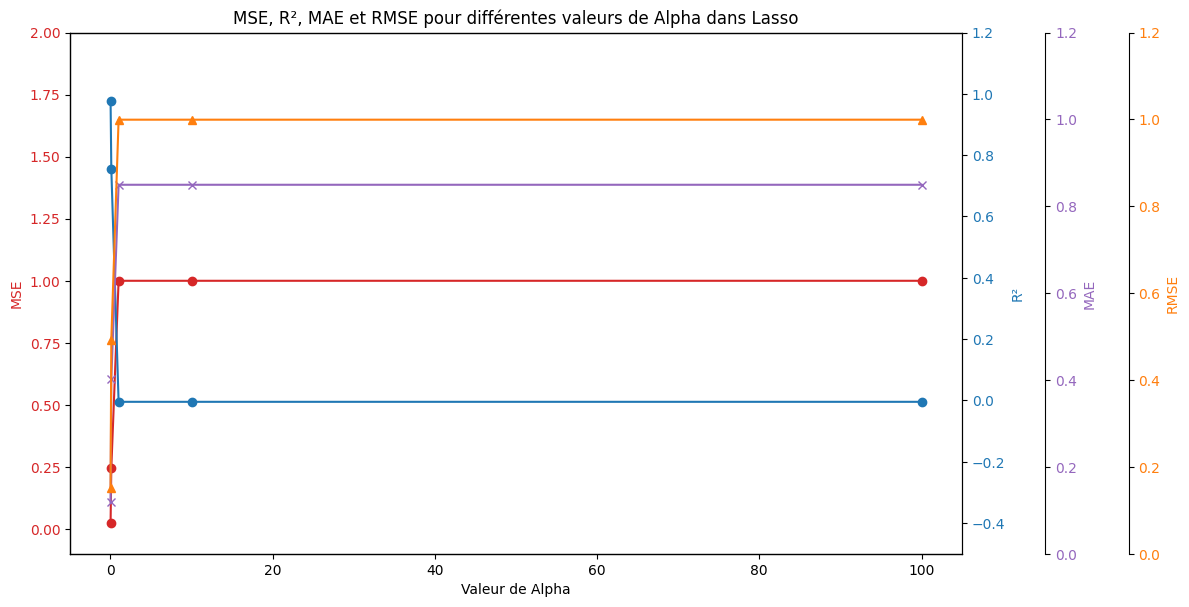

In [147]:

# Visualisation des résultats pour Lasso
fig, ax1 = plt.subplots(figsize=(12, 6))

# Configuration de l'axe 1 pour le MSE
color = 'tab:red'
ax1.set_xlabel('Valeur de Alpha')
ax1.set_ylabel('MSE', color=color)
ax1.plot(alphas_lasso, list(lasso_mse.values()), label="MSE", color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-0.1, 2)  # Ajuste en fonction de tes données

# Configuration de l'axe 2 pour le R²
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('R²', color=color)
ax2.plot(alphas_lasso, list(lasso_r2.values()), label="R²", color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-0.5, 1.2)  # Ajuste en fonction de tes données

# Configuration de l'axe 3 pour le MAE
ax3 = ax1.twinx()
color = 'tab:purple'
ax3.spines['right'].set_position(('outward', 60))  # Décalage de l'axe pour éviter le chevauchement
ax3.set_ylabel('MAE', color=color)
ax3.plot(alphas_lasso, list(lasso_mae.values()), label="MAE", color=color, marker='x')
ax3.tick_params(axis='y', labelcolor=color)
ax3.set_ylim(0, 1.2)  # Ajuste en fonction de tes données

# Configuration de l'axe 4 pour le RMSE
ax4 = ax1.twinx()
color = 'tab:orange'
ax4.spines['right'].set_position(('outward', 120))  # Décalage supplémentaire pour éviter le chevauchement
ax4.set_ylabel('RMSE', color=color)
ax4.plot(alphas_lasso, list(lasso_rmse.values()), label="RMSE", color=color, marker='^')
ax4.tick_params(axis='y', labelcolor=color)
ax4.set_ylim(0, 1.2)  # Ajuste en fonction de tes données

# Ajuster la mise en page pour éviter que le texte ne se chevauche
fig.tight_layout()

# Ajouter un titre
plt.title('MSE, R², MAE et RMSE pour différentes valeurs de Alpha dans Lasso')

# Afficher le graphique
plt.show()


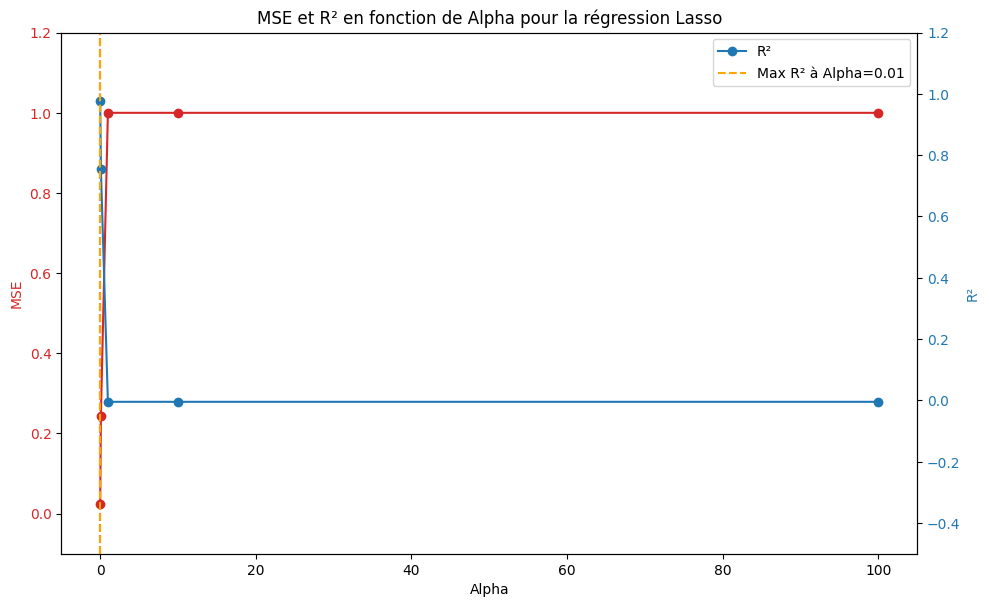

In [148]:

# Liste des valeurs d'alpha
alphas_lasso = [0.01, 0.1, 1.0, 10.0, 100.0]

# Visualisation des résultats pour chaque alpha
fig, ax1 = plt.subplots(figsize=(10, 6))

# Configuration de l'axe 1 pour le MSE
color = 'tab:red'
ax1.set_xlabel('Alpha')
ax1.set_ylabel('MSE', color=color)
ax1.plot(alphas_lasso, list(lasso_mse.values()), label="MSE", color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(-0.1, 1.2)  # Ajustez la plage selon les valeurs MSE

# Configuration de l'axe 2 pour le R²
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('R²', color=color)
ax2.plot(alphas_lasso, list(lasso_r2.values()), label="R²", color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(-0.5, 1.2)  # Ajustez la plage selon les valeurs R²

# Ajouter des lignes pour les valeurs minimales de MSE et maximales de R²
min_mse_lasso = min(lasso_mse, key=lasso_mse.get)
max_r2_lasso = max(lasso_r2, key=lasso_r2.get)

# Lignes de min MSE et max R²
ax1.axvline(x=min_mse_lasso, color='r', linestyle='--', label=f'Min MSE à Alpha={min_mse_lasso}')
ax2.axvline(x=max_r2_lasso, color='orange', linestyle='--', label=f'Max R² à Alpha={max_r2_lasso}')

# Ajuster la mise en page pour éviter que le texte ne se chevauche
fig.tight_layout()

# Ajouter un titre
plt.title('MSE et R² en fonction de Alpha pour la régression Lasso')

# Afficher le graphique
plt.legend()
plt.show()


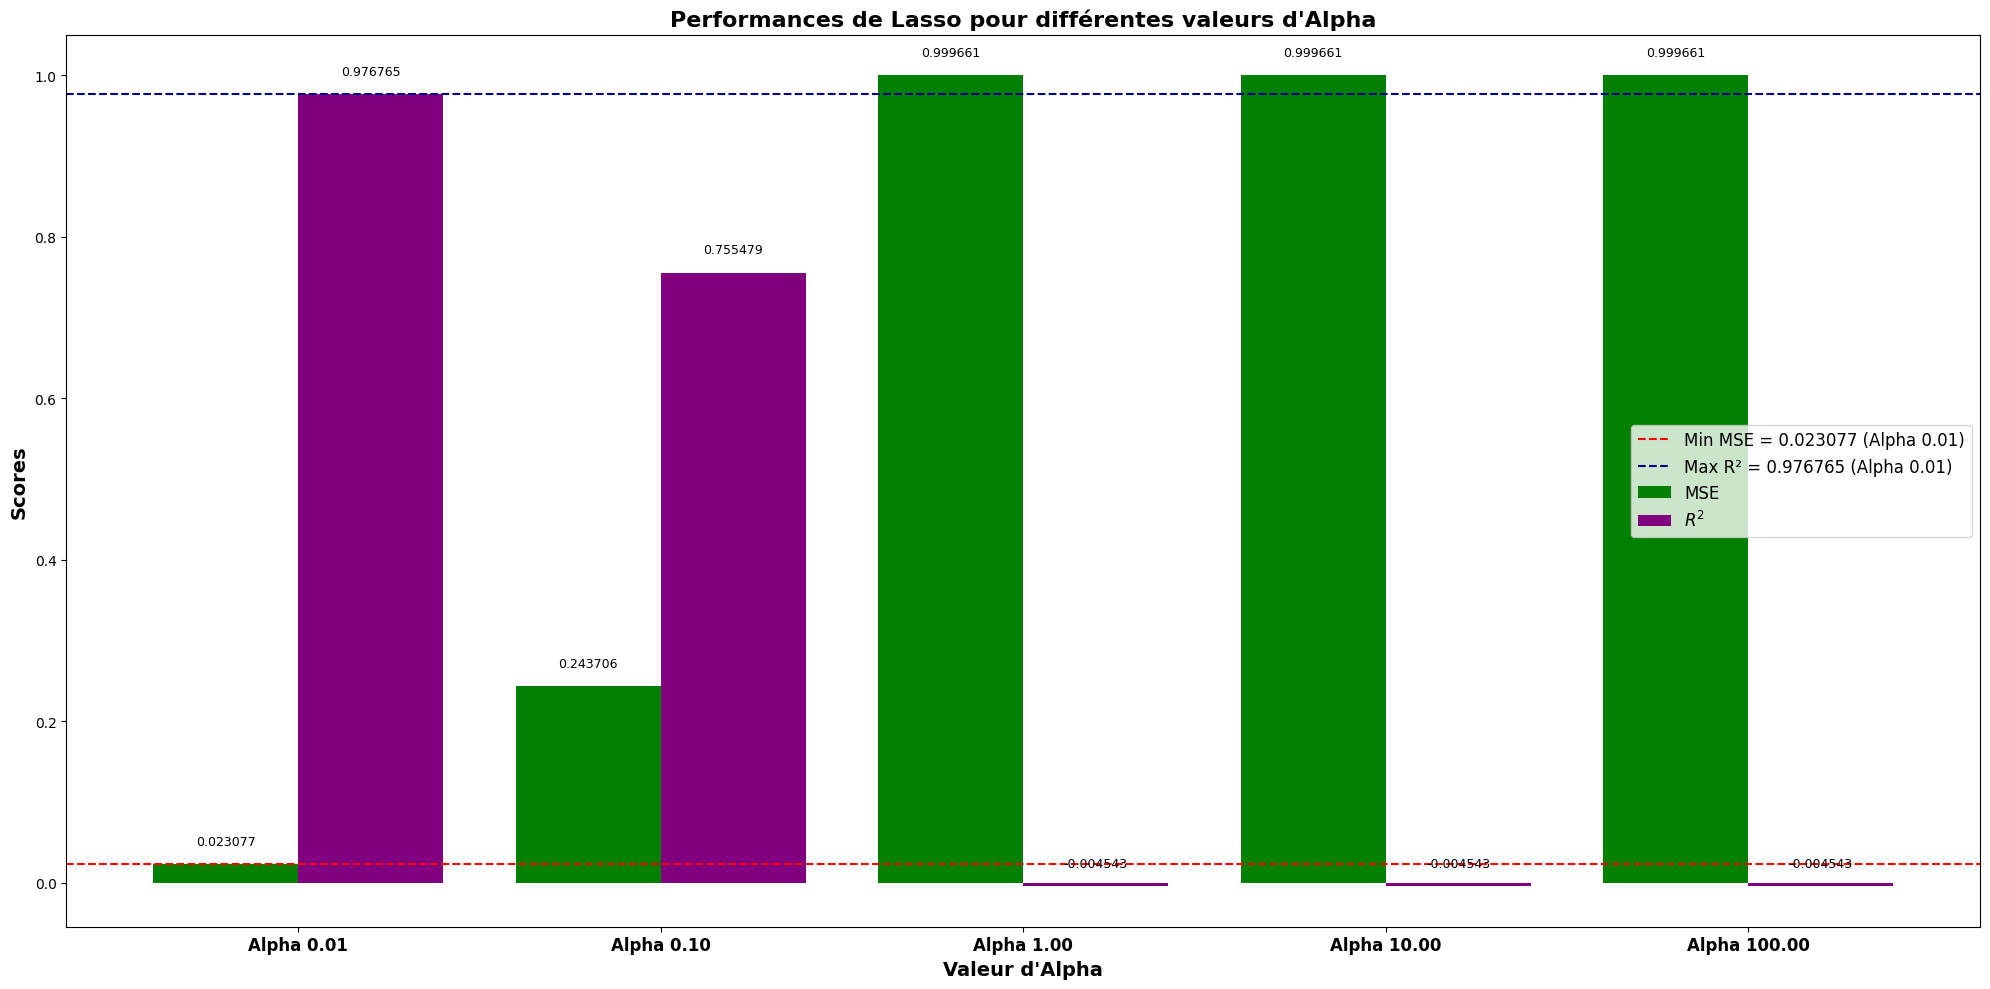

In [149]:
# Données pour Lasso
alphas_lasso = list(lasso_mse.keys())  # Valeurs d'alpha pour Lasso
mse_lasso = list(lasso_mse.values())  # MSE pour Lasso
r2_lasso = list(lasso_r2.values())    # R² pour Lasso

# Configuration du graphique Lasso
fig, ax = plt.subplots(figsize=(20, 10))
bar_width = 0.4
index = np.arange(len(alphas_lasso))  # Positions des barres

# Barres pour MSE et R²
bar_mse = ax.bar(index - bar_width / 2, mse_lasso, bar_width, label='MSE', color='green')
bar_r2 = ax.bar(index + bar_width / 2, r2_lasso, bar_width, label='$R^2$', color='purple')

# Titres et labels
ax.set_xlabel('Valeur d\'Alpha', fontsize=14, fontweight='bold')
ax.set_ylabel('Scores', fontsize=14, fontweight='bold')
ax.set_title("Performances de Lasso pour différentes valeurs d'Alpha", fontsize=16, fontweight='bold')
ax.set_xticks(index)
ax.set_xticklabels([f'Alpha {alpha:.2f}' for alpha in alphas_lasso], fontsize=12, fontweight='bold')

# Ajouter une légende
ax.legend(fontsize=10)

# Ajouter les valeurs sur les barres
for i in range(len(alphas_lasso)):
    ax.text(bar_mse[i].get_x() + bar_mse[i].get_width() / 2, bar_mse[i].get_height() + 0.02,
            f'{mse_lasso[i]:.6f}', ha='center', va='bottom', fontsize=9)
    ax.text(bar_r2[i].get_x() + bar_r2[i].get_width() / 2, bar_r2[i].get_height() + 0.02,
            f'{r2_lasso[i]:.6f}', ha='center', va='bottom', fontsize=9)

# Tracer la ligne pour la valeur minimale de MSE
min_mse = np.min(mse_lasso)
min_mse_alpha = alphas_lasso[np.argmin(mse_lasso)]
ax.axhline(y=min_mse, color='red', linestyle='--', label=f'Min MSE = {min_mse:.6f} (Alpha {min_mse_alpha:.2f})')

# Tracer la ligne pour la valeur maximale de R²
max_r2 = np.max(r2_lasso)
max_r2_alpha = alphas_lasso[np.argmax(r2_lasso)]
ax.axhline(y=max_r2, color='darkblue', linestyle='--', label=f'Max R² = {max_r2:.6f} (Alpha {max_r2_alpha:.2f})')

# Ajuster la mise en page
plt.tight_layout()
plt.legend(fontsize=12)
plt.show()


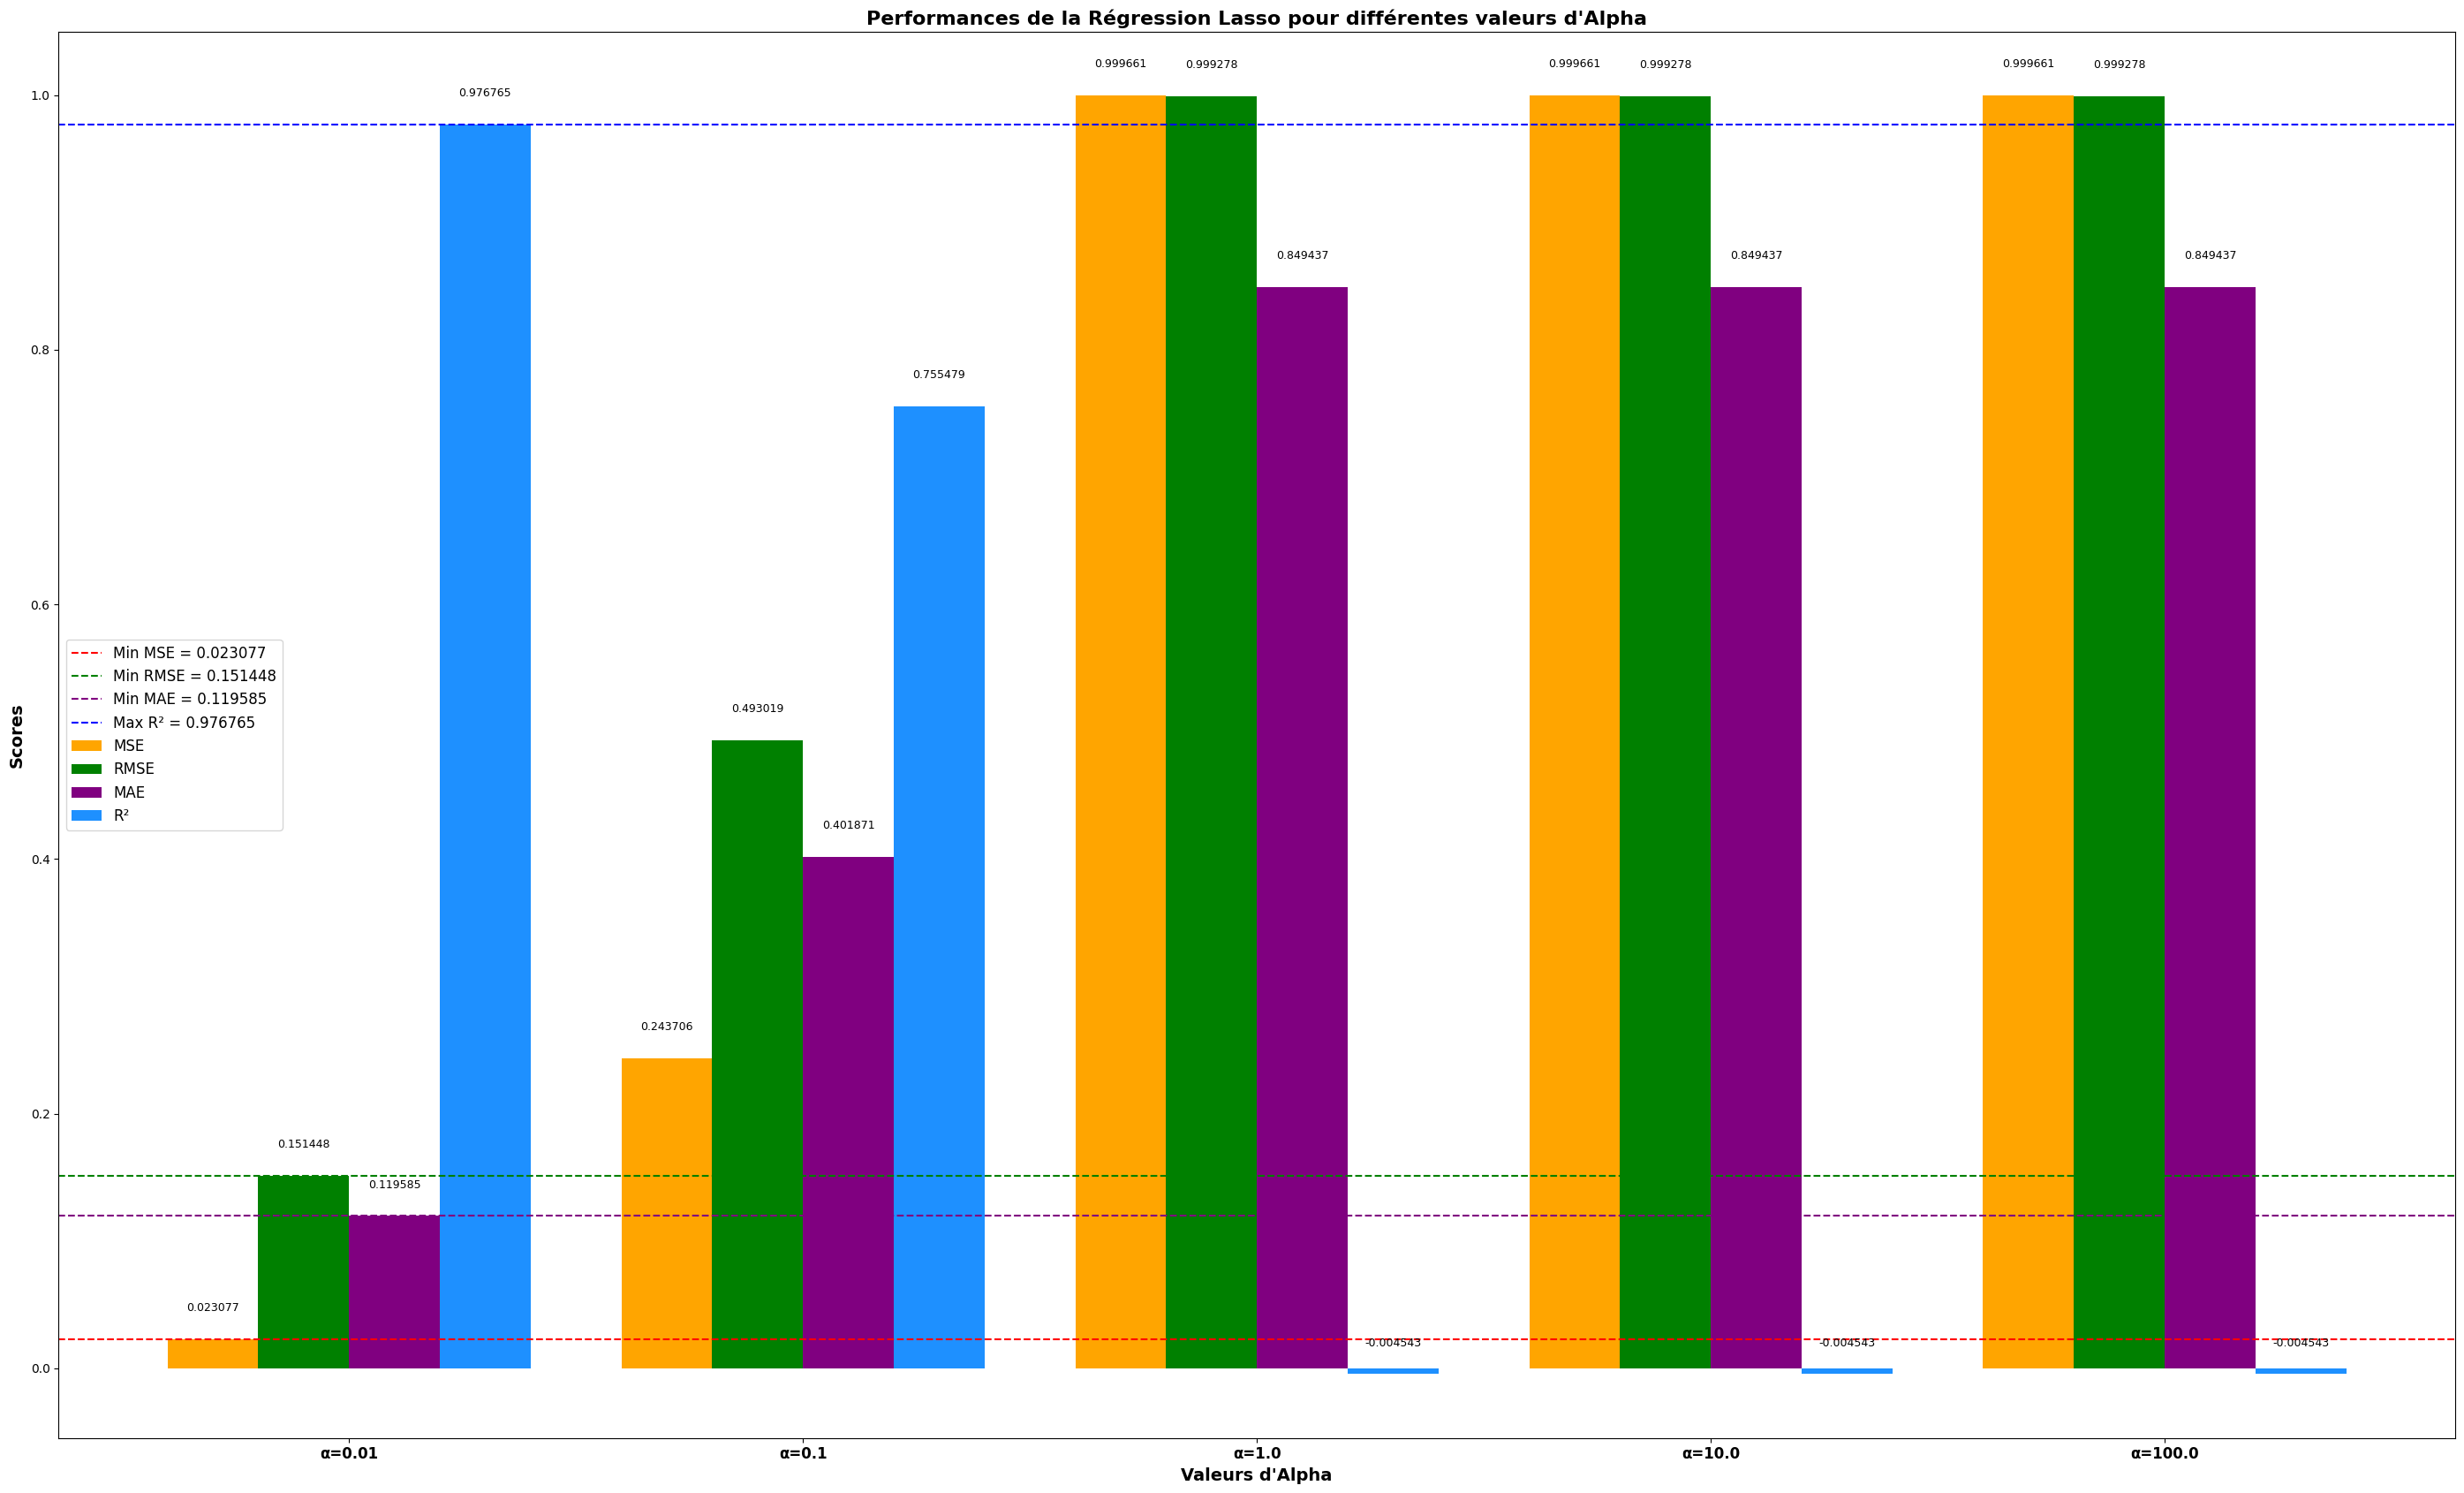

In [150]:


# Extraction des données (alphas et métriques)
alphas = list(lasso_mse.keys())  # Les valeurs d'alpha
mse_values = list(lasso_mse.values())  # MSE pour chaque alpha
rmse_values = list(lasso_rmse.values())  # RMSE pour chaque alpha
mae_values = list(lasso_mae.values())  # MAE pour chaque alpha
r2_values = list(lasso_r2.values())  # R² pour chaque alpha

# Configuration du graphique
fig, ax = plt.subplots(figsize=(28, 17))
bar_width = 0.2  # Largeur des barres
index = np.arange(len(alphas))  # Positions des barres sur l'axe x

# Barres pour les métriques
bar_mse = ax.bar(index - 3*bar_width/2, mse_values, bar_width, label='MSE', color='orange')
bar_rmse = ax.bar(index - bar_width/2, rmse_values, bar_width, label='RMSE', color='green')
bar_mae = ax.bar(index + bar_width/2, mae_values, bar_width, label='MAE', color='purple')
bar_r2 = ax.bar(index + 3*bar_width/2, r2_values, bar_width, label='R²', color='dodgerblue')

# Titres et labels
ax.set_xlabel("Valeurs d'Alpha", fontsize=14, fontweight='bold')
ax.set_ylabel('Scores', fontsize=14, fontweight='bold')
ax.set_title("Performances de la Régression Lasso pour différentes valeurs d'Alpha", fontsize=16, fontweight='bold')
ax.set_xticks(index)
ax.set_xticklabels([f'α={alpha}' for alpha in alphas], fontsize=12, fontweight='bold')

# Ajouter une légende
ax.legend(fontsize=12)

# Ajouter les valeurs sur les barres
for i in range(len(alphas)):
    # MSE
    ax.text(bar_mse[i].get_x() + bar_mse[i].get_width() / 2, bar_mse[i].get_height() + 0.02,
            f'{mse_values[i]:.6f}', ha='center', va='bottom', fontsize=9)
    # RMSE
    ax.text(bar_rmse[i].get_x() + bar_rmse[i].get_width() / 2, bar_rmse[i].get_height() + 0.02,
            f'{rmse_values[i]:.6f}', ha='center', va='bottom', fontsize=9)
    # MAE
    ax.text(bar_mae[i].get_x() + bar_mae[i].get_width() / 2, bar_mae[i].get_height() + 0.02,
            f'{mae_values[i]:.6f}', ha='center', va='bottom', fontsize=9)
    # R²
    ax.text(bar_r2[i].get_x() + bar_r2[i].get_width() / 2, bar_r2[i].get_height() + 0.02,
            f'{r2_values[i]:.6f}', ha='center', va='bottom', fontsize=9)

# Tracer des lignes pour les valeurs optimales
ax.axhline(y=min(mse_values), color='red', linestyle='--', label=f"Min MSE = {min(mse_values):.6f}")
ax.axhline(y=min(rmse_values), color='green', linestyle='--', label=f"Min RMSE = {min(rmse_values):.6f}")
ax.axhline(y=min(mae_values), color='purple', linestyle='--', label=f"Min MAE = {min(mae_values):.6f}")
ax.axhline(y=max(r2_values), color='blue', linestyle='--', label=f"Max R² = {max(r2_values):.6f}")

# Ajuster la mise en page pour éviter que le texte ne se chevauche
plt.tight_layout()

# Ajouter une légende pour les lignes
ax.legend(fontsize=12)

# Afficher le graphique
plt.show()


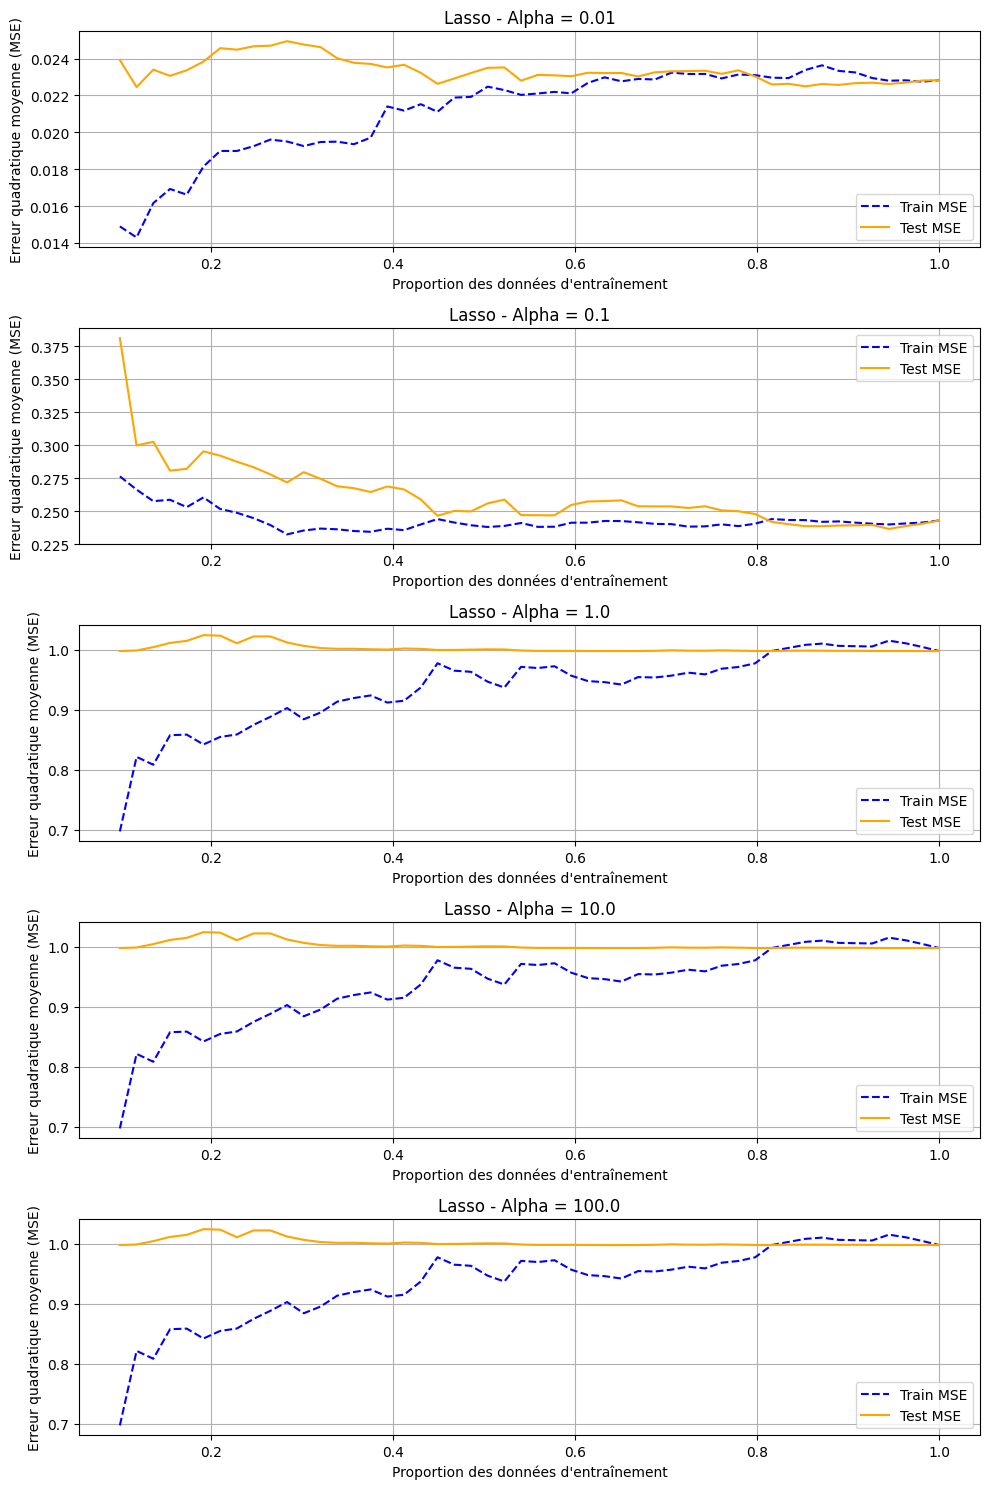

In [151]:
from sklearn.linear_model import Lasso

# Configuration des tailles d'échantillons d'entraînement
train_sizes = np.linspace(0.1, 1.0, 50)
alphas_lasso = [0.01, 0.1, 1.0, 10.0, 100.0]  # Valeurs d'alpha à tester

# Configuration des sous-graphes pour Lasso
fig, axes = plt.subplots(len(alphas_lasso), figsize=(10, 15))
axes = axes.flatten()

# Boucle sur chaque valeur d'alpha pour Lasso
for i, alpha in enumerate(alphas_lasso):
    mse_train = []
    mse_test = []
    
    for size in train_sizes:
        # Création d'un sous-ensemble des données d'entraînement
        size = int(size * len(X))  # Taille de l'échantillon d'entraînement
        X_train, y_train = X[:size], y[:size]
        
        # Initialisation et entraînement du modèle Lasso
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, y_train)
        
        # Calcul du MSE pour l'échantillon d'entraînement
        y_pred_train = lasso.predict(X_train)
        mse_train.append(mean_squared_error_custom(y_train, y_pred_train))
        
        # Calcul du MSE pour l'échantillon de test
        y_pred_test = lasso.predict(X)
        mse_test.append(mean_squared_error_custom(y, y_pred_test))
    
    # Tracer les courbes d'apprentissage
    ax = axes[i]
    ax.plot(train_sizes, mse_train, label='Train MSE', linestyle='--', color='blue')
    ax.plot(train_sizes, mse_test, label='Test MSE', linestyle='-', color='orange')
    
    ax.set_title(f'Lasso - Alpha = {alpha}')
    ax.set_xlabel('Proportion des données d\'entraînement')
    ax.set_ylabel('Erreur quadratique moyenne (MSE)')
    ax.legend()
    ax.grid(True)

# Ajuster la mise en page
fig.tight_layout()
plt.show()


1. Alpha = 0.01
Le MSE (Erreur Quadratique Moyenne) est relativement faible pour les ensembles d'entraînement et de test.
Les courbes d'erreurs d'entraînement et de test sont proches, indiquant un bon équilibre entre biais et variance.
Ce faible niveau de régularisation permet au modèle de conserver des performances élevées tout en limitant légèrement la complexité.

2. Alpha = 0.1
Les courbes montrent une augmentation notable du MSE, en particulier pour les données de test, ce qui indique une régularisation plus importante.
Le modèle semble perdre en flexibilité et commence à sous-ajuster les données d'entraînement, comme le montre la hausse du MSE.
Cela peut être utile pour réduire l'impact des caractéristiques non pertinentes.

3. Alpha = 1.0
Une régularisation plus forte est appliquée, entraînant une dégradation des performances, en particulier pour les données de test.
Les courbes montrent un écart plus marqué entre l'erreur d'entraînement et de test, ce qui pourrait indiquer un certain degré de sous-apprentissage.
Ce niveau de régularisation est généralement trop élevé pour un problème nécessitant une précision fine.

4. Alpha = 10.0
Les courbes montrent une forte hausse du MSE, tant pour l'entraînement que pour le test, ce qui indique un modèle très biaisé.
La régularisation excessive rend le modèle incapable d'apprendre les relations sous-jacentes entre les caractéristiques et les cibles.

5. Alpha = 100.0
Avec un très fort niveau de régularisation, le modèle devient pratiquement inutilisable.
Les courbes d'erreurs restent très élevées, montrant un sous-apprentissage important et une perte totale de capacité prédictive.

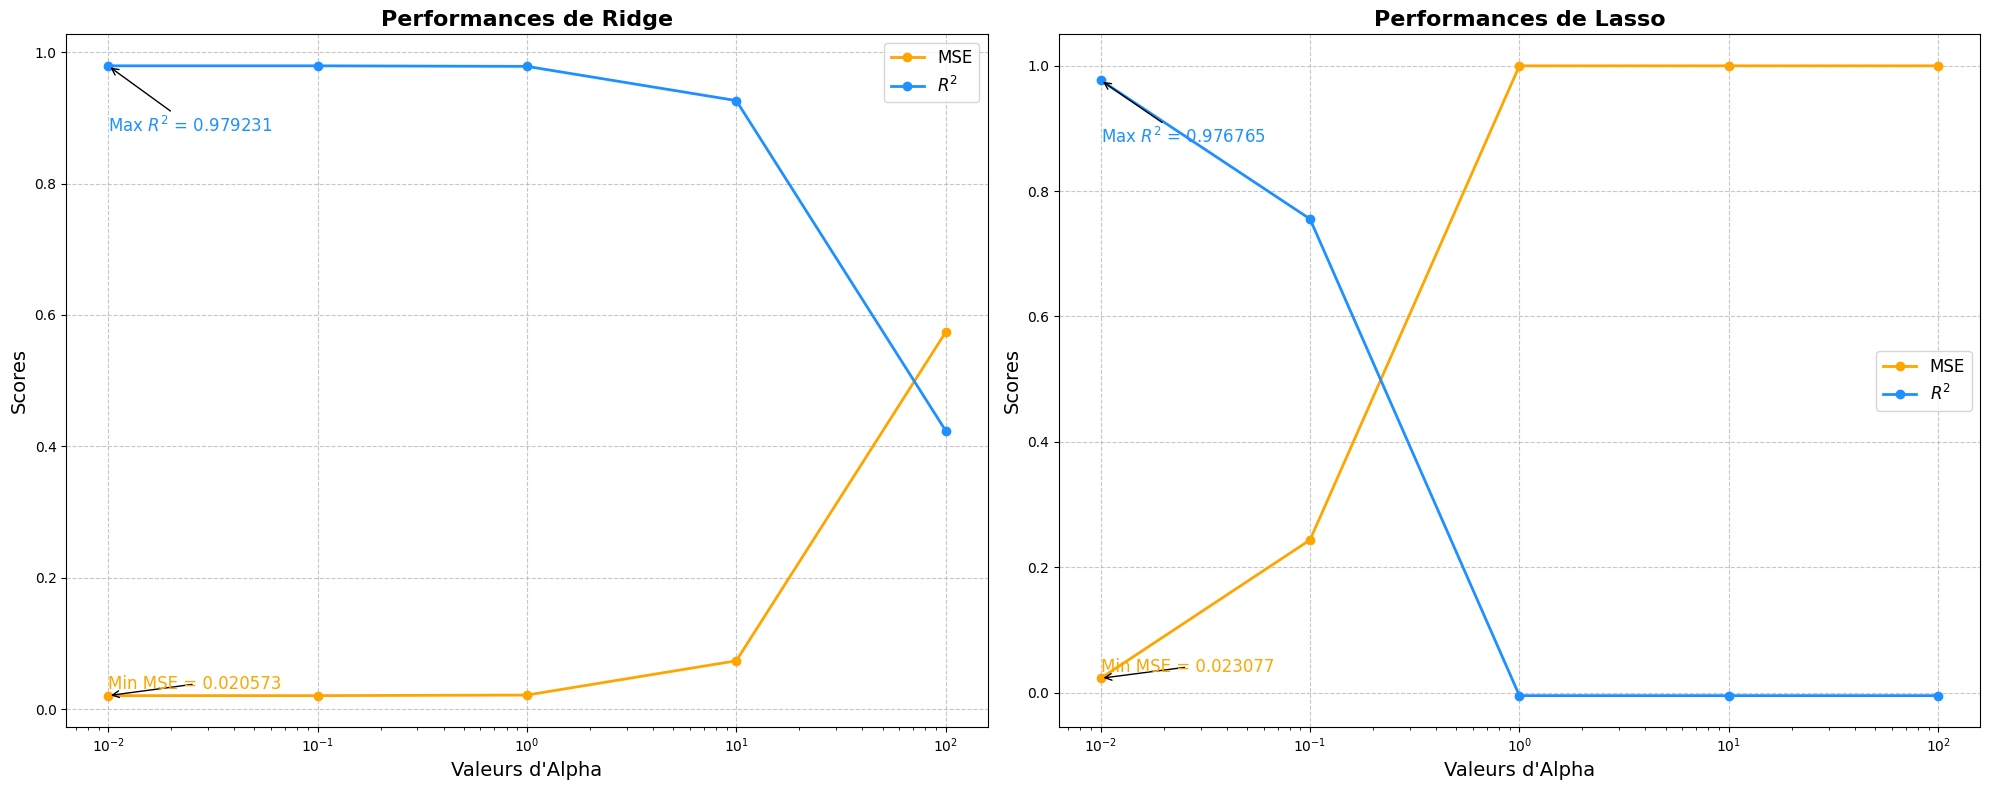

In [152]:


# Extraction des données
alphas_ridge = list(ridge_mse.keys())  # Alpha pour Ridge
alphas_lasso = list(lasso_mse.keys())  # Alpha pour Lasso

# Ridge
mse_ridge = list(ridge_mse.values())
r2_ridge = list(ridge_r2.values())

# Lasso
mse_lasso = list(lasso_mse.values())
r2_lasso = list(lasso_r2.values())

# Création des sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Graphique Ridge
axes[0].plot(alphas_ridge, mse_ridge, label='MSE', marker='o', color='orange', linewidth=2)
axes[0].plot(alphas_ridge, r2_ridge, label='$R^2$', marker='o', color='dodgerblue', linewidth=2)
axes[0].set_title("Performances de Ridge", fontsize=16, fontweight='bold')
axes[0].set_xlabel("Valeurs d'Alpha", fontsize=14)
axes[0].set_ylabel("Scores", fontsize=14)
axes[0].set_xscale('log')  # Échelle logarithmique pour les valeurs d'alpha
axes[0].legend(fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].annotate(f"Min MSE = {min(mse_ridge):.6f}", xy=(alphas_ridge[np.argmin(mse_ridge)], min(mse_ridge)),
                 xytext=(alphas_ridge[np.argmin(mse_ridge)], min(mse_ridge) + 0.01),
                 arrowprops=dict(facecolor='orange', arrowstyle='->'), fontsize=12, color='orange')
axes[0].annotate(f"Max $R^2$ = {max(r2_ridge):.6f}", xy=(alphas_ridge[np.argmax(r2_ridge)], max(r2_ridge)),
                 xytext=(alphas_ridge[np.argmax(r2_ridge)], max(r2_ridge) - 0.1),
                 arrowprops=dict(facecolor='blue', arrowstyle='->'), fontsize=12, color='dodgerblue')

# Graphique Lasso
axes[1].plot(alphas_lasso, mse_lasso, label='MSE', marker='o', color='orange', linewidth=2)
axes[1].plot(alphas_lasso, r2_lasso, label='$R^2$', marker='o', color='dodgerblue', linewidth=2)
axes[1].set_title("Performances de Lasso", fontsize=16, fontweight='bold')
axes[1].set_xlabel("Valeurs d'Alpha", fontsize=14)
axes[1].set_ylabel("Scores", fontsize=14)
axes[1].set_xscale('log')  # Échelle logarithmique pour les valeurs d'alpha
axes[1].legend(fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].annotate(f"Min MSE = {min(mse_lasso):.6f}", xy=(alphas_lasso[np.argmin(mse_lasso)], min(mse_lasso)),
                 xytext=(alphas_lasso[np.argmin(mse_lasso)], min(mse_lasso) + 0.01),
                 arrowprops=dict(facecolor='orange', arrowstyle='->'), fontsize=12, color='orange')
axes[1].annotate(f"Max $R^2$ = {max(r2_lasso):.6f}", xy=(alphas_lasso[np.argmax(r2_lasso)], max(r2_lasso)),
                 xytext=(alphas_lasso[np.argmax(r2_lasso)], max(r2_lasso) - 0.1),
                 arrowprops=dict(facecolor='blue', arrowstyle='->'), fontsize=12, color='dodgerblue')

# Ajustement de l'affichage
plt.tight_layout()
plt.show()


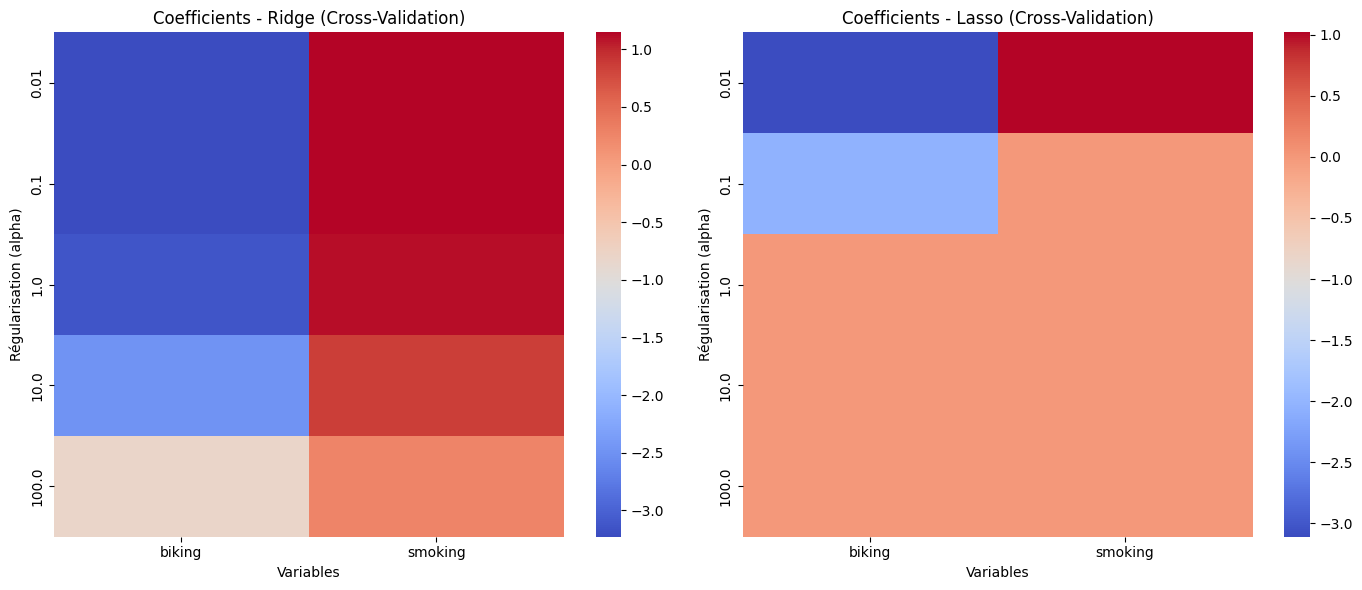

In [153]:


# Configuration des paramètres
kf = KFold(n_splits=5, shuffle=True, random_state=42)
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]  # Valeurs de régularisation
feature_names = ['biking', 'smoking']  # Noms des colonnes de vos variables explicatives

# Initialisation des listes pour stocker les coefficients
ridge_coefs = []
lasso_coefs = []

# Validation croisée pour chaque valeur de alpha
for alpha in alphas:
    ridge_cv_coefs = []
    lasso_cv_coefs = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Modèle Ridge
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_train, y_train)
        ridge_cv_coefs.append(ridge.coef_)
        
        # Modèle Lasso
        lasso = Lasso(alpha=alpha, max_iter=10000)
        lasso.fit(X_train, y_train)
        lasso_cv_coefs.append(lasso.coef_)
    
    # Moyenne des coefficients pour cette valeur de alpha
    ridge_coefs.append(np.mean(ridge_cv_coefs, axis=0))
    lasso_coefs.append(np.mean(lasso_cv_coefs, axis=0))

# Convertir en matrices pour les heatmaps
ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

# Visualisation des coefficients avec un heatmap
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(ridge_coefs, cmap="coolwarm", ax=axes[0], xticklabels=feature_names, yticklabels=alphas)
axes[0].set_title("Coefficients - Ridge (Cross-Validation)")
axes[0].set_xlabel("Variables")
axes[0].set_ylabel("Régularisation (alpha)")

sns.heatmap(lasso_coefs, cmap="coolwarm", ax=axes[1], xticklabels=feature_names, yticklabels=alphas)
axes[1].set_title("Coefficients - Lasso (Cross-Validation)")
axes[1].set_xlabel("Variables")
axes[1].set_ylabel("Régularisation (alpha)")

plt.tight_layout()
plt.show()


1. Ridge Regression (à gauche) :

Effet de la régularisation (alpha) :
Pour de petites valeurs de alpha (0.01, 0.1), les coefficients de "biking" et "smoking" restent élevés, ce qui signifie que la régularisation a peu d'impact.

À mesure que alpha augmente (10.0, 100.0), les coefficients diminuent progressivement, mais ils ne deviennent jamais exactement 0. Cela montre que Ridge impose une pénalisation sur la taille des coefficients, réduisant leur influence sans les éliminer.

Interprétation :
Ridge conserve les deux variables ("biking" et "smoking"), mais leur influence diminue avec l'augmentation de alpha.
Les coefficients se rapprochent de 0, mais les variables restent présentes dans le modèle.

2. Lasso Regression (à droite) :

Effet de la régularisation (alpha) :
Pour de petites valeurs de alpha (0.01), les coefficients de "biking" et "smoking" restent élevés, similaire à Ridge.

Dès que alpha augmente (1.0, 10.0), Lasso élimine progressivement certains coefficients. Par exemple, "biking" devient nulle à partir de alpha = 1.0, tandis que "smoking" conserve une valeur.

Interprétation :
Lasso effectue une sélection de variables en mettant certains coefficients exactement à 0. Dans ce cas, "biking" est éliminée du modèle à mesure que alpha augmente.
Seule la variable "smoking" reste significative à des valeurs élevées de alpha.


# evaluation 

In [154]:
def complexity_linear_simple(n):
    # Complexité en O(n), avec n le nombre de points de données
    return n


La régression linéaire simple consiste à ajuster une droite (1 caractéristique indépendante) aux données.

La complexité est en 𝑂(𝑛), car chaque point est parcouru une fois pour calculer les coefficients.

In [155]:

def complexity_linear_multiple(n, p):
    # Complexité en O(np^2), ou O(p^3) pour la résolution du système
    return n * (p ** 2)


Dans la régression linéaire multiple, la résolution du système d'équations normales a une complexité de 
𝑂
(
𝑝
3
)
 mais comme nous devons également calculer la matrice 
𝑋
𝑇
𝑋
(avec 
𝑛
observations et 
p variables), cela donne 
𝑂
(
𝑛
⋅
𝑝
2
)


In [156]:

def complexity_polynomial_simple(n, d):
    # Complexité en O(n * d), avec d le degré du polynôme
    return n * d

Une régression polynomiale est équivalente à une régression linéaire sur des caractéristiques augmentées (ex. 
𝑥
,
𝑥
2
,
.
.
.
,
𝑥
𝑑
x,x 
2
 ,...,x 
d
 ).

Si 
𝑑
est le degré du polynôme, la complexité devient 
𝑂
(
𝑛
⋅
𝑑
)
 car chaque donnée doit être transformée pour inclure les puissances jusqu'à 
𝑑


In [157]:
def complexity_ridge(n, p):
    return (p ** 3) + (n * (p ** 2))

Ridge Regression implique une régularisation et la résolution d'un système matriciel.

La complexité pour former la matrice normale est 
𝑂
(
𝑛
⋅
𝑝
2
)


La résolution du système matriciel (inversion) est 
𝑂
(
𝑝
3
)


La complexité totale est donc 
𝑂
(
𝑝
3
+
𝑛
⋅
𝑝
2
)


In [158]:


def complexity_lasso(n, p, max_iter=10):
    # Complexité pour Lasso regression (coordinate descent : O(n * p * max_iter))
    return n * p * max_iter


La méthode Lasso utilise un algorithme de descente par coordonnées.
Chaque itération met à jour les coefficients, avec une complexité 
𝑂
(
𝑛
⋅
𝑝
)

Si le nombre maximal d'itérations est 
𝑚
𝑎
𝑥
_
𝑖
𝑡
𝑒
𝑟
 la complexité devient 
𝑂
(
𝑛
⋅
𝑝
⋅
𝑚
𝑎
𝑥
_
𝑖
𝑡
𝑒
𝑟
)


In [159]:
# Calcul de n : nombre d'observations (lignes)
n = df.shape[0]

# Calcul de p : nombre de caractéristiques (colonnes, excluant la cible)
p = df.shape[1] - 1  # On suppose que la dernière colonne est la cible

# Degré du polynôme (d) : à définir par l'utilisateur selon le modèle
d = min_mse_degree
# Calcul des complexités
complexity_lin_simple = complexity_linear_simple(n)
complexity_lin_multiple = complexity_linear_multiple(n, p)
complexity_poly_simple = complexity_polynomial_simple(n, d)
complexity_ridge_model = complexity_ridge(n, p)
complexity_lasso_model = complexity_lasso(n, p)

# Affichage des résultats
print(f"Complexité du modèle Linéaire Simple : ({complexity_lin_simple})")
print(f"Complexité du modèle Linéaire Multiple (p={p}) : ({complexity_lin_multiple})")
print(f"Complexité du modèle Polynômial Simple (d={d}) : ({complexity_poly_simple})")
print(f"Complexité du modèle Ridge : ({complexity_ridge_model})")
print(f"Complexité du modèle Lasso : ({complexity_lasso_model})")

Complexité du modèle Linéaire Simple : (498)
Complexité du modèle Linéaire Multiple (p=2) : (1992)
Complexité du modèle Polynômial Simple (d=1) : (498)
Complexité du modèle Ridge : (2000)
Complexité du modèle Lasso : (9960)


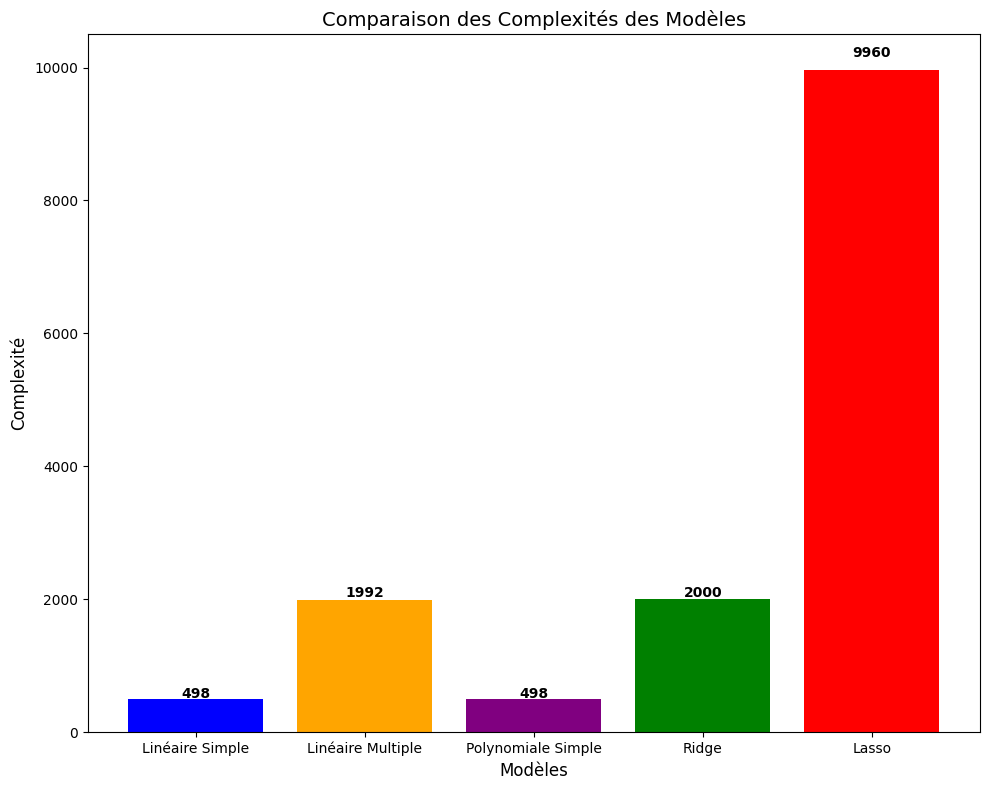

In [160]:
# Calcul des complexités
complexities = [
    complexity_lin_simple, 
    complexity_lin_multiple, 
    complexity_poly_simple, 
    complexity_ridge_model,  # Ajout de Ridge
    complexity_lasso_model   # Ajout de Lasso
]
models = [
    'Linéaire Simple', 
    'Linéaire Multiple', 
    'Polynomiale Simple', 
    'Ridge', 
    'Lasso'
]

# Création du graphique
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.bar(models, complexities, color=['blue', 'orange', 'purple', 'green', 'red'])

# Ajustement de l'échelle de l'axe y
y_min = 0
y_max = 10500 # 10% de marge au-dessus de la plus grande complexité
ax.set_ylim(y_min, y_max)

# Ajouter les valeurs sur les barres avec un espacement supplémentaire
for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() + (bar.get_height() * 0.02),  
        f'{int(bar.get_height())}', 
        ha='center', 
        fontsize=10, 
        fontweight='bold'
    )

# Titres et labels
ax.set_xlabel('Modèles', fontsize=12)
ax.set_ylabel('Complexité', fontsize=12)
ax.set_title('Comparaison des Complexités des Modèles', fontsize=14)

# Affichage du graphique
plt.tight_layout()
plt.show()


In [161]:
# Données calculées pour les métriques 
mse_totale = [mean_mse_simple, mean_mse_lm, min_mse_simple,ridge_mse[mse_Ridge],lasso_mse[mse_lasso_min_alpha]] 
r2_totale= [mean_r2_simple, mean_r2_lm,max_r2_simple,ridge_r2[r2_Ridge],lasso_r2[r2_lasso_max_alpha]] 
mae_totale= [mean_mae_simple,  mean_mae_lm,min_mae_simple,ridge_mae[mae_Ridge],lasso_mae[mae_lasso_min_alpha]]  
rmse_totale = [mean_rmse_simple, mean_rmse_lm,min_rmse_simple,ridge_rmse[rmse_Ridge],lasso_rmse[rmse_lasso_min_alpha]]  


In [162]:
print("MSE Total: ", mse_totale)
print("R² Total: ", r2_totale)
print("MAE Total: ", mae_totale)
print("RMSE Total: ", rmse_totale)

MSE Total:  [0.125293618395381, 0.020572559913157158, 0.125293618395381, 0.020572785113373016, 0.02307720282051315]
R² Total:  [0.8735022688593446, 0.9792306880311121, 0.8735022688593446, 0.9792309344862844, 0.9767648608766505]
MAE Total:  [0.2954506149539055, 0.11331870843012823, 0.2954506149539055, 0.11321243220022045, 0.11958477505721617]
RMSE Total:  [0.3536476291604966, 0.1430820318775054, 0.3536476291604966, 0.37803548290598404, 0.15144843749765735]


In [163]:
# Création du DataFrame avec les colonnes demandées
data = {
    "Metric": ["MSE", "R²", "MAE", "RMSE"],
    "Régression linéaire Simple": [mean_mse_simple, mean_r2_simple, mean_mae_simple, mean_rmse_simple],
    "Régression linéaire multiple": [mean_mse_lm, mean_r2_lm, mean_mae_lm, mean_rmse_lm],
    "Régression polynomiale": [min_mse_simple, max_r2_simple, min_mae_simple, min_rmse_simple],
    "Ridge": [ridge_mse[mse_Ridge], ridge_r2[r2_Ridge], ridge_mae[mae_Ridge], ridge_rmse[rmse_Ridge]],
    "Lasso": [lasso_mse[mse_lasso_min_alpha], lasso_r2[r2_lasso_max_alpha], lasso_mae[mae_lasso_min_alpha], lasso_rmse[rmse_lasso_min_alpha]]
}

df_scores = pd.DataFrame(data)
pd.options.display.float_format = '{:.6f}'.format
df_scores = df_scores.set_index("Metric").T
df_scores


Metric                            MSE       R²      MAE     RMSE
Régression linéaire Simple   0.125294 0.873502 0.295451 0.353648
Régression linéaire multiple 0.020573 0.979231 0.113319 0.143082
Régression polynomiale       0.125294 0.873502 0.295451 0.353648
Ridge                        0.020573 0.979231 0.113212 0.378035
Lasso                        0.023077 0.976765 0.119585 0.151448

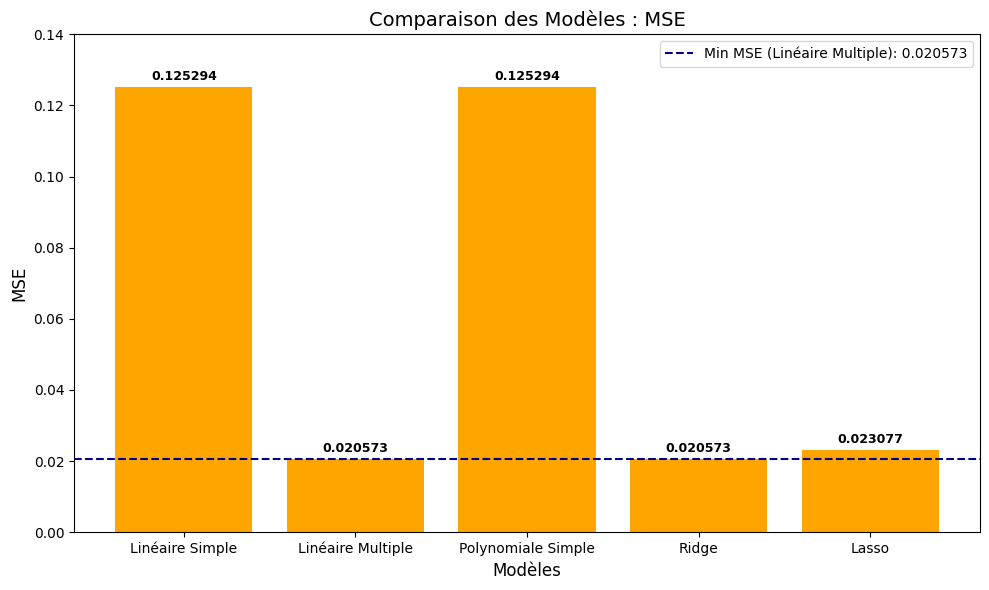

In [164]:
# Modèles et MSE pour chaque modèle
models = ['Linéaire Simple', 'Linéaire Multiple', 'Polynomiale Simple', 'Ridge', 'Lasso']

# Création du graphique pour MSE
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(models, mse_totale, color='orange')

# Ajouter une ligne horizontale correspondant à la valeur minimale de MSE
min_mse = min(mse_totale)  # Utiliser mse_totale_6_decimal pour trouver le MSE minimum
min_mse_model = models[mse_totale.index(min_mse)]  # Trouver le modèle correspondant à la valeur minimale


ax.axhline(min_mse, color='darkblue', linestyle='--', label=f'Min MSE ({min_mse_model}): {min_mse:.6f}')

# Titres et labels
ax.set_xlabel('Modèles', fontsize=12)
ax.set_ylabel('MSE', fontsize=12)
ax.set_title('Comparaison des Modèles : MSE', fontsize=14)
ax.set_ylim(0, 0.14)
ax.legend()

# Ajouter les valeurs sur les barres
for bar in bars:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.002,
            f'{bar.get_height():.6f}', ha='center', fontsize=9, fontweight='bold')

# Affichage du graphique
plt.tight_layout()
plt.show()


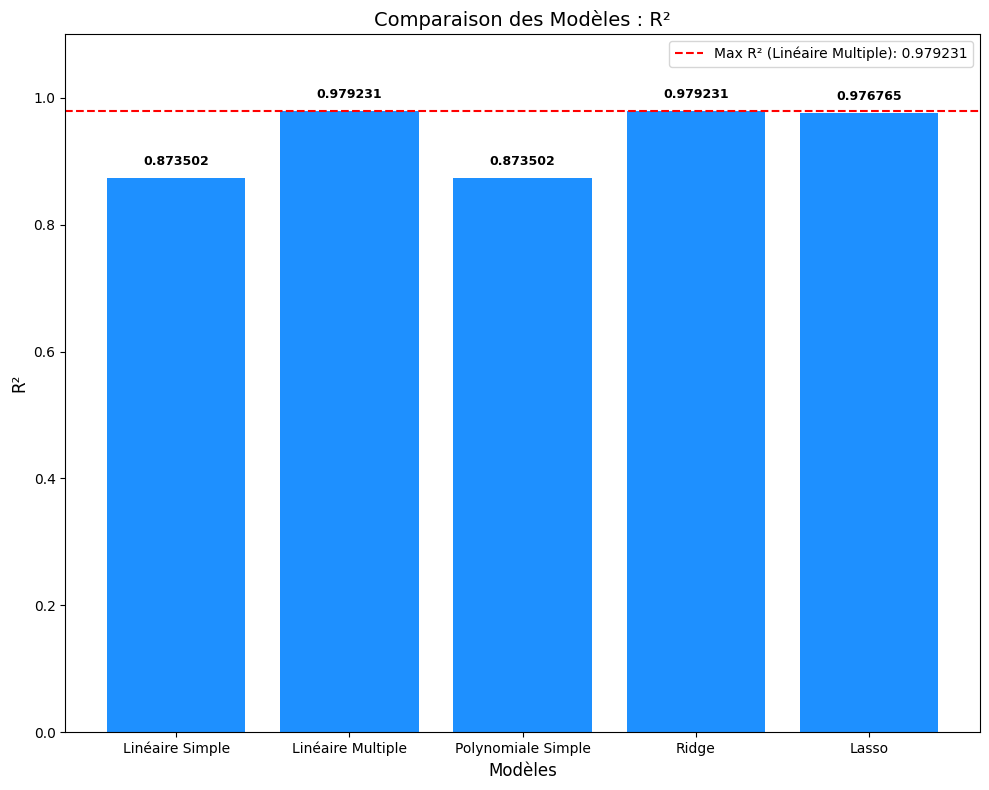

In [165]:
# Arrondir les valeurs de R² à 6 décimales
r2_totale_rounded = [round(r, 6) for r in r2_totale]

# Liste des modèles et R² pour chaque modèle
models = ['Linéaire Simple', 'Linéaire Multiple', 'Polynomiale Simple', 'Ridge', 'Lasso']

# Création du graphique pour R²
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.bar(models, r2_totale_rounded, color='dodgerblue')

# Ajouter une ligne horizontale correspondant à la valeur maximale de R²
max_r2 = max(r2_totale_rounded)
max_r2_model = models[r2_totale_rounded.index(max_r2)]  # Trouver le modèle correspondant à la valeur maximale
ax.axhline(max_r2, color='red', linestyle='--', label=f'Max R² ({max_r2_model}): {max_r2:.6f}')

# Titres et labels
ax.set_xlabel('Modèles', fontsize=12)
ax.set_ylabel('R²', fontsize=12)
ax.set_title('Comparaison des Modèles : R²', fontsize=14)
ax.legend()

# Ajouter les valeurs sur les barres
for bar, value in zip(bars, r2_totale_rounded):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
            f'{value:.6f}', ha='center', fontsize=9, fontweight='bold')

# Ajuster l'échelle de l'axe Y
ax.set_ylim(0, 1.1)

# Affichage du graphique
plt.tight_layout()
plt.show()


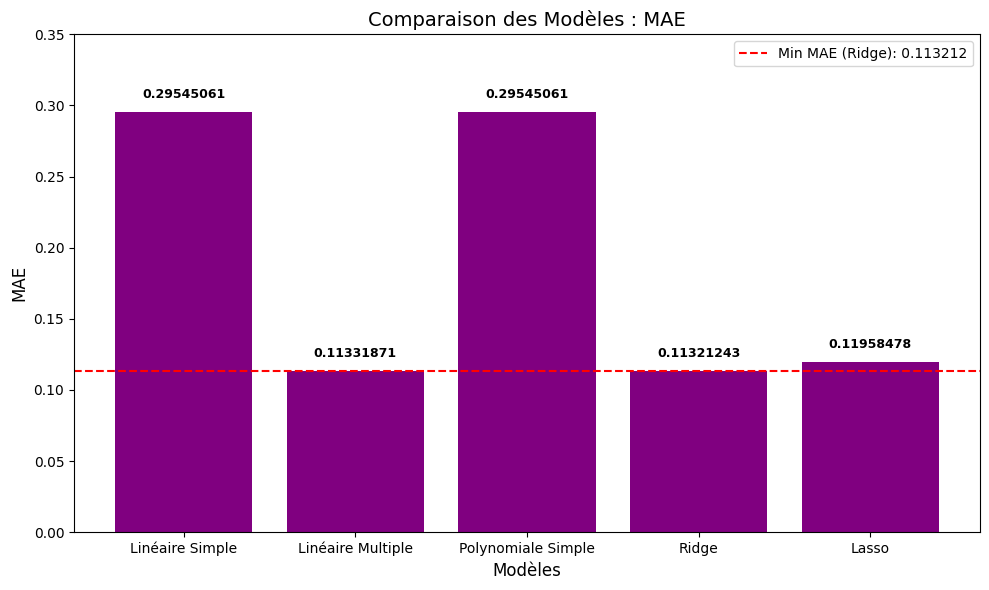

In [166]:

# Liste des modèles et des valeurs MAE
models = ['Linéaire Simple', 'Linéaire Multiple', 'Polynomiale Simple', 'Ridge', 'Lasso']

# Création du graphique pour MAE
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(models, mae_totale, color='purple')

# Ajouter une ligne horizontale correspondant à la valeur minimale de MAE
min_mae = min(mae_totale)
min_mae_model = models[mae_totale.index(min_mae)]  # Trouver le modèle correspondant à la valeur minimale
ax.axhline(min_mae, color='red', linestyle='--', label=f'Min MAE ({min_mae_model}): {min_mae:.6f}')

# Titres et labels
ax.set_xlabel('Modèles', fontsize=12)
ax.set_ylabel('MAE', fontsize=12)
ax.set_title('Comparaison des Modèles : MAE', fontsize=14)
ax.set_ylim(0, 0.35)  # Ajuster cette valeur selon vos données

# Afficher la légende
ax.legend()

# Ajouter les valeurs sur les barres
for bar in bars:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
            f'{bar.get_height():.8f}', ha='center', fontsize=9, fontweight='bold')

# Affichage du graphique
plt.tight_layout()
plt.show()


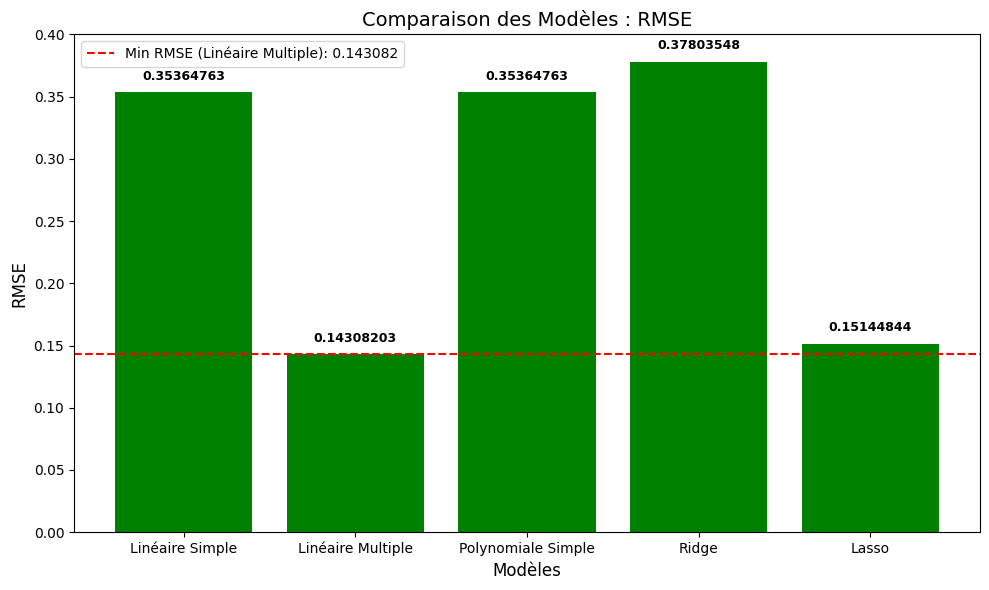

In [167]:

# Liste des modèles et des valeurs RMSE
models = ['Linéaire Simple', 'Linéaire Multiple', 'Polynomiale Simple', 'Ridge', 'Lasso']

# Création du graphique pour RMSE
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(models, rmse_totale, color='green')

# Ajouter une ligne horizontale correspondant à la valeur minimale de RMSE
min_rmse = min(rmse_totale)
min_rmse_model = models[rmse_totale.index(min_rmse)]  # Trouver le modèle correspondant à la valeur minimale
ax.axhline(min_rmse, color='red', linestyle='--', label=f'Min RMSE ({min_rmse_model}): {min_rmse:.6f}')

# Titres et labels
ax.set_xlabel('Modèles', fontsize=12)
ax.set_ylabel('RMSE', fontsize=12)
ax.set_ylim(0, 0.4)  # Ajuster cette valeur selon vos données
ax.set_title('Comparaison des Modèles : RMSE', fontsize=14)
ax.legend()

# Ajouter les valeurs sur les barres
for bar in bars:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
            f'{bar.get_height():.8f}', ha='center', fontsize=9, fontweight='bold')

# Affichage du graphique
plt.tight_layout()
plt.show()


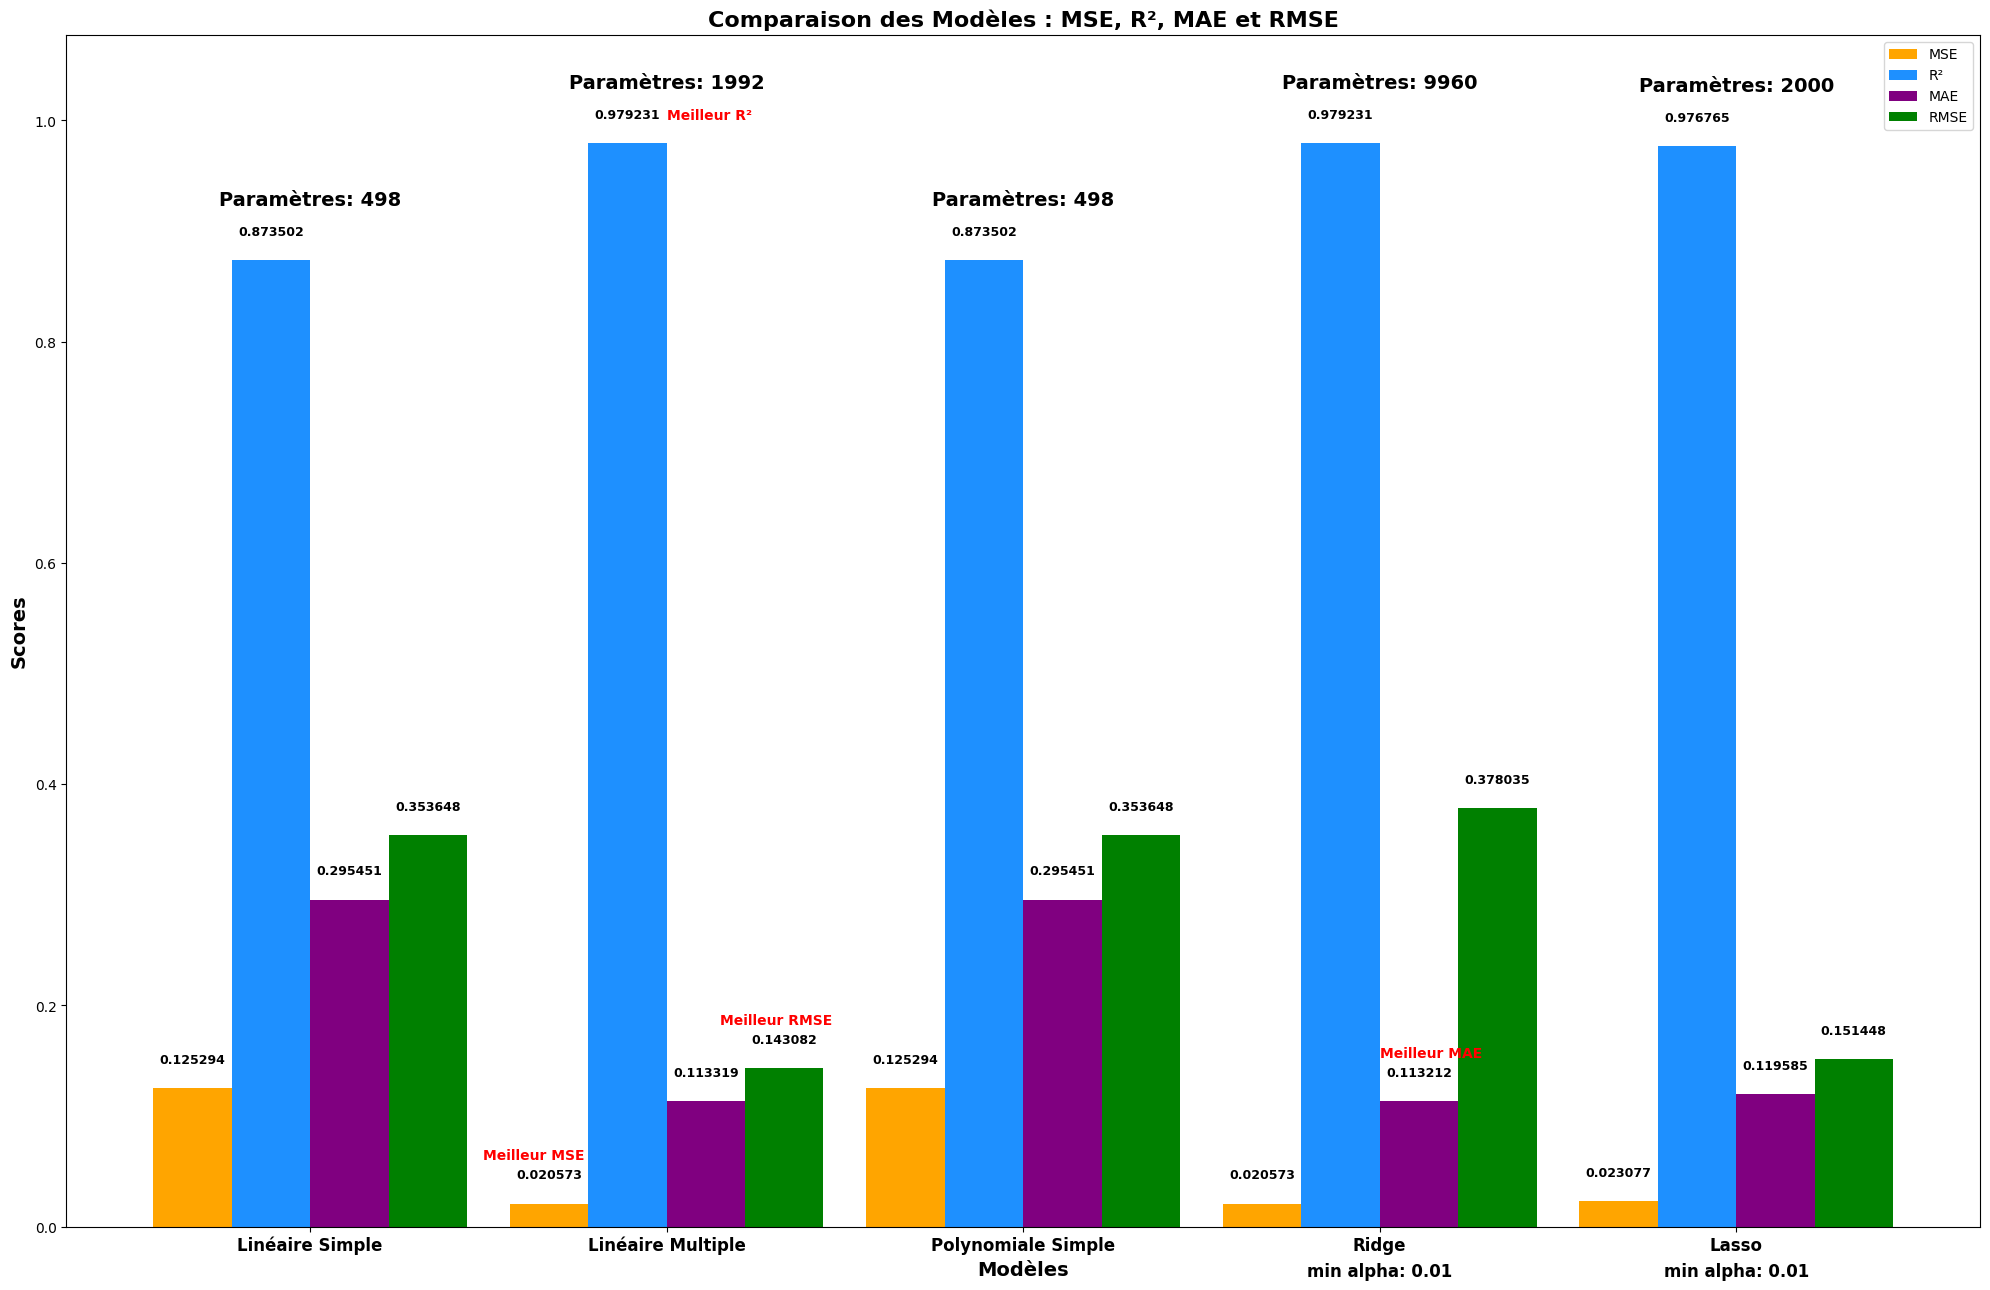

In [168]:

# Données des scores
mse_totale = [mean_mse_simple, mean_mse_lm, min_mse_simple, ridge_mse[mse_Ridge], lasso_mse[mse_lasso_min_alpha]]
r2_totale = [mean_r2_simple, mean_r2_lm, max_r2_simple, ridge_r2[r2_Ridge], lasso_r2[r2_lasso_max_alpha]]
mae_totale = [mean_mae_simple, mean_mae_lm, min_mae_simple, ridge_mae[mae_Ridge], lasso_mae[mae_lasso_min_alpha]]
rmse_totale = [mean_rmse_simple, mean_rmse_lm, min_rmse_simple, ridge_rmse[rmse_Ridge], lasso_rmse[rmse_lasso_min_alpha]]

# Complexité des modèles (nombre de paramètres)
complexity_scores = [complexity_lin_simple, complexity_lin_multiple, complexity_poly_simple, complexity_lasso_model, complexity_ridge_model]

# Modèles
models = ['Linéaire Simple', 'Linéaire Multiple', 'Polynomiale Simple', 'Ridge', 'Lasso']

# Valeur de min alpha pour Ridge
min_alpha_ridge = lasso_mse[mse_lasso_min_alpha]  # Remplacer cette ligne avec la vraie variable si nécessaire

# Configuration du graphique
fig, ax = plt.subplots(figsize=(20, 13))

# Positions des barres sur l'axe x
index = np.arange(len(models))
bar_width = 0.22

# Barres pour chaque critère
bar_mse = ax.bar(index - 1.5 * bar_width, mse_totale, bar_width, label='MSE', color='orange')
bar_r2 = ax.bar(index - 0.5 * bar_width, r2_totale, bar_width, label='R²', color='dodgerblue')
bar_mae = ax.bar(index + 0.5 * bar_width, mae_totale, bar_width, label='MAE', color='purple')
bar_rmse = ax.bar(index + 1.5 * bar_width, rmse_totale, bar_width, label='RMSE', color='green')

# Titres et labels
ax.set_xlabel('Modèles', fontsize=14, fontweight='bold')
ax.set_ylabel('Scores', fontsize=14, fontweight='bold')
ax.set_title('Comparaison des Modèles : MSE, R², MAE et RMSE', fontsize=16, fontweight='bold')
ax.set_xticks(index)
ax.set_xticklabels(models, fontsize=12, fontweight='bold')

# Ajouter une légende
ax.legend(fontsize=10)

# Ajouter les valeurs sur les barres horizontalement
for i in range(len(models)):
    ax.text(bar_mse[i].get_x() + bar_mse[i].get_width() / 2, bar_mse[i].get_height() + 0.02,
            f'{mse_totale[i]:.6f}', ha='center', va='bottom', fontsize=9, fontweight='bold', rotation=0)
    ax.text(bar_r2[i].get_x() + bar_r2[i].get_width() / 2, bar_r2[i].get_height() + 0.02,
            f'{r2_totale[i]:.6f}', ha='center', va='bottom', fontsize=9, fontweight='bold', rotation=0)
    ax.text(bar_mae[i].get_x() + bar_mae[i].get_width() / 2, bar_mae[i].get_height() + 0.02,
            f'{mae_totale[i]:.6f}', ha='center', va='bottom', fontsize=9, fontweight='bold', rotation=0)
    ax.text(bar_rmse[i].get_x() + bar_rmse[i].get_width() / 2, bar_rmse[i].get_height() + 0.02,
            f'{rmse_totale[i]:.6f}', ha='center', va='bottom', fontsize=9, fontweight='bold', rotation=0)

# Affichage de la complexité du modèle (nombre de paramètres) en haut des barres
for i, complexity in enumerate(complexity_scores):
    ax.text(index[i], max(mse_totale[i], r2_totale[i], mae_totale[i], rmse_totale[i]) + 0.05, 
            f'Paramètres: {complexity}', ha='center', fontsize=14, fontweight='bold', color='black')

# Arrondir les métriques à 6 chiffres après la virgule
mse_totale_rounded = np.round(mse_totale, 6)
rmse_totale_rounded = np.round(rmse_totale, 6)
mae_totale_rounded = np.round(mae_totale, 6)
r2_totale_rounded = np.round(r2_totale, 6)

# Trouver les meilleurs indices par critère
best_mse_index = np.argmin(mse_totale_rounded)
best_rmse_index = np.argmin(rmse_totale_rounded)
best_mae_index = np.argmin(mae_totale_rounded)
best_r2_index = np.argmax(r2_totale_rounded)


# Afficher les annotations pour les meilleurs modèles
ax.text(index[best_mse_index]-0.23, mse_totale[best_mse_index] + 0.04, 'Meilleur MSE', ha='right', color='red', fontweight='bold')
ax.text(index[best_rmse_index] + 0.15, rmse_totale[best_rmse_index] + 0.04, 'Meilleur RMSE', ha='left', color='red', fontweight='bold')
ax.text(index[best_mae_index], mae_totale[best_mae_index] + 0.04, 'Meilleur MAE', ha='left', color='red', fontweight='bold')
ax.text(index[best_r2_index], r2_totale[best_r2_index] + 0.022, 'Meilleur R²', ha='left', color='red', fontweight='bold')

# Ajouter la valeur de "min alpha" pour Ridge
ax.text(index[3], max(mse_totale)-0.17 , f'min alpha: {mse_Ridge:.2f}', ha='center', fontsize=12, fontweight='bold', color='black')
ax.text(index[4], max(mse_totale)-0.17 , f'min alpha: {mse_lasso_min_alpha:.2f}', ha='center', fontsize=12, fontweight='bold', color='black')

# Ajuster l'axe Y
ax.set_ylim(0, 1.1 * max(max(mse_totale), max(r2_totale), max(mae_totale), max(rmse_totale)))

# Ajuster la mise en page pour éviter que le texte ne se chevauche
plt.tight_layout()

# Afficher le graphique
plt.show()


Le graphique compare cinq modèles différents (Linéaire Simple, Linéaire Multiple, Polynômiale Simple, Ridge, et Lasso) selon quatre métriques : MSE, 𝑅2, MAE, et RMSE. Voici une interprétation des résultats et une conclusion sur les meilleurs modèles selon chaque métrique :

Interprétation du graphique :

- MSE (Mean Squared Error) :

La plus faible valeur de MSE est obtenue par le modèle Linéaire Multiple avec un score de 0.020573.
Cela signifie que ce modèle minimise au mieux les erreurs quadratiques moyennes.

- 𝑅2(Coefficient de détermination) :

Le modèle Linéaire Multiple a le meilleur 𝑅2, égal à 0.979231.
Cela indique qu'il explique le mieux la variance des données.

- MAE (Mean Absolute Error) :

Le modèle Ridge a le plus faible MAE, égal à 0.113212.
Cela montre que Ridge a, en moyenne, les plus petites erreurs absolues.

- RMSE (Root Mean Squared Error) :

Le modèle Linéaire Multiple a le plus faible RMSE, égal à 0.143082.
Cela confirme son efficacité pour minimiser les erreurs au carré.

- Conclusion :
Meilleur modèle (MSE) : Linéaire Multiple
Meilleur modèle (RMSE) : Linéaire Multiple
Meilleur modèle (MAE) : Ridge
Meilleur modèle (𝑅2) : Linéaire Multiple

In [169]:
# Afficher les meilleurs modèles en fonction des critères
print(f"Meilleur modèle (MSE): {models[best_mse_index]}")
print(f"Meilleur modèle (RMSE): {models[best_rmse_index]}")
print(f"Meilleur modèle (MAE): {models[best_mae_index]}")
print(f"Meilleur modèle (R²): {models[best_r2_index]}")


Meilleur modèle (MSE): Linéaire Multiple
Meilleur modèle (RMSE): Linéaire Multiple
Meilleur modèle (MAE): Ridge
Meilleur modèle (R²): Linéaire Multiple


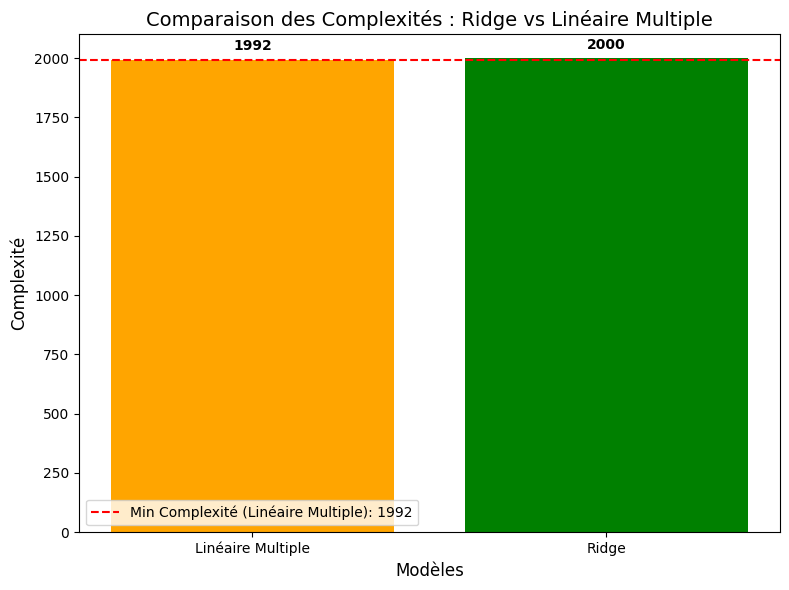

In [170]:
# Comparer les complexités entre Ridge et Régression Linéaire Multiple
complexities = [complexity_lin_multiple, complexity_ridge_model]
model_names = ['Linéaire Multiple', 'Ridge']

# Identifier le modèle avec la complexité minimale
min_complexity = min(complexities)
min_index = complexities.index(min_complexity)
min_model = model_names[min_index]

# Création du graphique
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(model_names, complexities, color=['orange', 'green'])

# Ajouter une ligne horizontale correspondant à la complexité minimale
ax.axhline(min_complexity, color='red', linestyle='--', label=f'Min Complexité ({min_model}): {int(min_complexity)}')

# Ajouter les valeurs sur les barres
for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() + (bar.get_height() * 0.02),  
        f'{int(bar.get_height())}', 
        ha='center', 
        fontsize=10, 
        fontweight='bold'
    )

# Titres et labels
ax.set_xlabel('Modèles', fontsize=12)
ax.set_ylabel('Complexité', fontsize=12)
ax.set_title('Comparaison des Complexités : Ridge vs Linéaire Multiple', fontsize=14)

# Légende
ax.legend()

# Ajustement des marges
plt.tight_layout()
plt.show()


In [171]:

# Comparer les complexités entre Ridge et Régression Linéaire Multiple
if complexity_ridge_model < complexity_lin_multiple:
    best_complexity_model = "Ridge"
    best_complexity_value = complexity_ridge_model
else:
    best_complexity_model = " Linéaire Multiple"
    best_complexity_value = complexity_lin_multiple


In [172]:

# Résultats des meilleurs modèles en fonction des critères
criteria = ['MSE', 'RMSE', 'MAE', 'R²', 'Complexité']
best_models = [
    models[best_mse_index],
    models[best_rmse_index],
    models[best_mae_index],
    models[best_r2_index],
    best_complexity_model
]

# Valeurs associées
values = [
    mse_totale[best_mse_index],
    rmse_totale[best_rmse_index],
    mae_totale[best_mae_index],
    r2_totale[best_r2_index],
    best_complexity_value
]

# Créer le tableau sous forme de DataFrame
results_table = pd.DataFrame({
    'Critère': criteria,
    'Meilleur Modèle': best_models,
    'Valeur': values
})

# Afficher le tableau
results_table

Critère     Meilleur Modèle      Valeur
0         MSE   Linéaire Multiple    0.020573
1        RMSE   Linéaire Multiple    0.143082
2         MAE               Ridge    0.113212
3          R²   Linéaire Multiple    0.979231
4  Complexité   Linéaire Multiple 1992.000000



1. Interprétation des critères :
- MSE et RMSE : Linéaire Multiple est le meilleur. Cela indique que ce modèle a une erreur quadratique moyenne plus faible et gère mieux les grandes erreurs.
- MAE : Ridge est légèrement meilleur, suggérant qu'il minimise les erreurs absolues moyennes.
- 𝑅2: Linéaire Multiple est le meilleur, expliquant 97.9% de la variance des données.
- Complexité : Le modèle Linéaire Multiple a une complexité raisonnable (1992 paramètres) par rapport à d'autres modèles (comme Polynômiale ou Ridge).

2. Analyse de compromis :
- Performance globale : Le modèle Linéaire Multiple est supérieur sur 3 des 4 métriques (MSE, RMSE, 𝑅2 ) tout en ayant une complexité raisonnable. Cela en fait un modèle performant et équilibré.
- MAE légèrement inférieur pour Ridge : Bien que Ridge ait un MAE plus faible, la différence (0.113212 contre 0.143082) est modérée. Le gain en précision moyenne est donc moins significatif par rapport à la meilleure performance globale du Linéaire Multiple.
- Complexité : Avec 1992 paramètres, Linéaire Multiple est simple à interpréter et à implémenter, tout en restant moins complexe que d'autres approches comme les modèles polynomiaux.

3. Conclusion : Choix du modèle
- Meilleur modèle global : Linéaire Multiple
   - Raisons : Meilleur MSE, RMSE,𝑅2 avec une complexité modérée.
- Pourquoi pas Ridge ?
   - Bien que Ridge ait un meilleur MAE, il est moins performant sur les autres métriques et n'offre pas d'avantages significatifs pour justifier un changement.
